# Installation and Set Up

In [1]:
!java -version

openjdk version "17.0.13" 2024-10-15 LTS
OpenJDK Runtime Environment Microsoft-10376486 (build 17.0.13+11-LTS)
OpenJDK 64-Bit Server VM Microsoft-10376486 (build 17.0.13+11-LTS, mixed mode, sharing)


In [2]:
%pip show h2o

Name: h2o
Version: 3.46.0.6
Summary: H2O, Fast Scalable Machine Learning, for python 
Home-page: https://github.com/h2oai/h2o-3.git
Author: H2O.ai
Author-email: support@h2o.ai
License: Apache v2
Location: d:\OneDrive\Repos\demo-project\.venv\Lib\site-packages
Requires: requests, tabulate
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
#installing the library
%pip install -r "../requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing relevant modules
import h2o
from h2o.automl import H2OAutoML
import time
import datetime

# Load Data

In [5]:
# Start the H2O cluster (locally)
h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("../data/processed/train_set.csv")
test = h2o.import_file("../data/processed/test_set.csv")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Microsoft-10376486 (build 17.0.13+11-LTS, mixed mode, sharing)
  Starting server from D:\OneDrive\Repos\demo-project\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\user\AppData\Local\Temp\tmpt07ycthh
  JVM stdout: C:\Users\user\AppData\Local\Temp\tmpt07ycthh\h2o_user_started_from_python.out
  JVM stderr: C:\Users\user\AppData\Local\Temp\tmpt07ycthh\h2o_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Asia/Kuala_Lumpur
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    4 months and 16 days
H2O_cluster_name:           H2O_from_python_user_pupqvl
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.971 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.9 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
# Filter integer columns
int_columns = [col for col, dtype in test.types.items() if dtype == "int"]

# Convert all integer columns to factors in training and testing dataset
for col in int_columns:
    test[col] = test[col].asfactor()
    train[col] = train[col].asfactor()

In [7]:
# Identify predictors and response
x = train.columns
y = "Attrition"
x.remove(y)

# AutoML

In [8]:
# Start timing AutoML training
start = time.time()

print("AutoML started at:"+datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))

# Run AutoML for 20 base models
aml = H2OAutoML(sort_metric="logloss",
                nfolds=5,
                seed=1,
                max_runtime_secs=0,
                max_models=70)
aml.train(x=x, y=y, training_frame=train)
# Documentation: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

print("AutoML completed at:"+datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))
# print the time used to train AutoML
print('Time used (seconds): ',time.time()-start)

AutoML started at:2025-03-18_16-05-24
AutoML progress: |
16:05:26.256: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
AutoML completed at:2025-03-18_17-18-05
Time used (seconds):  4360.898181676865


# CV performance

In [9]:
# View the AutoML Leaderboard based on CV performance
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id                                                   logloss       auc     aucpr    mean_per_class_error      rmse       mse
-------------------------------------------------------  ---------  --------  --------  ----------------------  --------  --------
StackedEnsemble_AllModels_1_AutoML_1_20250318_160526      0.352263  0.808818  0.592634                0.253259  0.323147  0.104424
StackedEnsemble_BestOfFamily_1_AutoML_1_20250318_160526   0.359755  0.803125  0.594088                0.271447  0.325006  0.105629
GLM_1_AutoML_1_20250318_160526                            0.362981  0.808216  0.575985                0.277591  0.32741   0.107197
GBM_grid_1_AutoML_1_20250318_160526_model_10              0.382066  0.772955  0.510877                0.305281  0.340289  0.115796
GBM_grid_1_AutoML_1_20250318_160526_model_4               0.384111  0.762122  0.511246                0.278828  0.340828  0.116164
GBM_grid_1_AutoML_1_20250318_160526_model_11              0.38421   0.765221  0.512208                0.313536  0.341312  0.116494
GBM_3_AutoML_1_20250318_160526                            0.384486  0.767674  0.516328                0.307636  0.340187  0.115727
DeepLearning_grid_3_AutoML_1_20250318_160526_model_14     0.385966  0.784236  0.533706                0.27767   0.335685  0.112685
GBM_grid_1_AutoML_1_20250318_160526_model_7               0.38608   0.773711  0.479511                0.303161  0.344584  0.118738
GBM_grid_1_AutoML_1_20250318_160526_model_2               0.387882  0.759482  0.487126                0.30586   0.343673  0.118111
GBM_grid_1_AutoML_1_20250318_160526_model_1               0.388052  0.770069  0.493855                0.288751  0.34429   0.118535
DeepLearning_grid_2_AutoML_1_20250318_160526_model_5      0.388288  0.764664  0.536313                0.260993  0.336126  0.112981
GBM_4_AutoML_1_20250318_160526                            0.38881   0.763068  0.502817                0.303926  0.342368  0.117216
GBM_grid_1_AutoML_1_20250318_160526_model_9               0.39011   0.754921  0.484597                0.301217  0.344882  0.118944
GBM_grid_1_AutoML_1_20250318_160526_model_5               0.390853  0.765296  0.484218                0.288928  0.343734  0.118153
GBM_grid_1_AutoML_1_20250318_160526_model_3               0.391307  0.762531  0.468248                0.316137  0.345698  0.119507
GBM_2_AutoML_1_20250318_160526                            0.391862  0.752879  0.498406                0.281174  0.343515  0.118003
GBM_grid_1_AutoML_1_20250318_160526_model_6               0.393623  0.768479  0.491674                0.299362  0.347614  0.120836
DeepLearning_grid_3_AutoML_1_20250318_160526_model_5      0.394101  0.773485  0.480789                0.280683  0.346774  0.120252
GBM_1_AutoML_1_20250318_160526                            0.394148  0.762665  0.48221                 0.306282  0.347829  0.120985
GBM_grid_1_AutoML_1_20250318_160526_model_12              0.397007  0.761919  0.472654                0.289183  0.347076  0.120462
GBM_5_AutoML_1_20250318_160526                            0.397826  0.756233  0.473383                0.307038  0.348414  0.121392
DeepLearning_grid_2_AutoML_1_20250318_160526_model_14     0.397964  0.774176  0.535381                0.265116  0.33574   0.112722
DeepLearning_1_AutoML_1_20250318_160526                   0.400044  0.779299  0.519641                0.293325  0.342429  0.117257
DeepLearning_grid_1_AutoML_1_20250318_160526_model_14     0.402248  0.791801  0.541871                0.301237  0.336441  0.113193
DeepLearning_grid_2_AutoML_1_20250318_160526_model_11     0.406744  0.767789  0.48789                 0.286406  0.344089  0.118397
DeepLearning_grid_3_AutoML_1_20250318_160526_model_9      0.407515  0.760552  0.48869                 0.295004  0.34371   0.118137
DeepLearning_grid_2_AutoML_1_20250318_160526_model_13     0.409718  0.801796  0.579743                0.262436  0.329681  0.108689
DeepLearning_grid_2_AutoML_1_20250318_160526_model_6      0.415451  0.

In [10]:
# Get the best model based on CV performance
cv_best_model = aml.leader
# Display training and CV performance
cv_best_model

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20250318_160526


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       13/70
# GBM base models (used / total)           5/18
# GLM base models (used / total)           0/1
# DeepLearning base models (used / total)  8/49
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.002993626851043434
RMSE: 0.05471404619513562
LogLoss: 0.02535055258641513
AUC: 1.0
AUCPR: 1.0
Gini: 1.0
Null degrees of freedom: 1028
Residual degrees of freedom: 1015
Null deviance: 954.116385669331
Residual deviance: 52.171437222842336
AIC: 80.17143722284234

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5620304254312251
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      849  0    0        (0.0/849.0)
1      0    180  0        (0.0/180.0)
Total  849  180  0        (0.0/1029.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.56203      1         161
max f2                       0.56203      1         161
max f0point5                 0.56203      1         161
max accuracy                 0.56203      1         161
max precision                0.99926      1         0
max recall                   0.56203      1         161
max specificity              0.99926      1         0
max absolute_mcc             0.56203      1         161
max min_per_class_accuracy   0.56203      1         161
max mean_per_class_accuracy  0.56203      1         161
max tns                      0.99926      849       0
max fns                      0.99926      179       0
max fps                      7.72939e-05  849       399
max tps                      0.56203      180       161
max tnr                      0.99926      1         0
max fnr                      0.99926      0.994444  0
max fpr                      7.72939e-05  1         399
max tpr                      0.56203      1         161

Gains/Lift Table: Avg response rate: 17.49 %, avg score: 16.77 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.01069                     0.99236            5.71667  5.71667            1                0.996459     1                           0.996459            0.0611111       0.0611111                  471.667  471.667            0.0611111
2        0.0204082                   0.987738           5.71667  5.71667            1                0.989369     1                           0.993083            0.0555556       0.116667                   471.667  471.667            0.116667
3        0.0301263                   0.982419           5.71667  5.71667            1                0.986337     1                           0.990907            0.0555556       0.172222                   471.667  471.667            0.172222
4        0.0408163                   0.972219           5.71667  5.71667            1                0.97767      1            

# Test Performance of Best Model from CV

In [11]:
# Get threshold at max f1 in CV
max_f1_threshold = cv_best_model.find_threshold_by_max_metric(xval=True, metric="f1")

# Check model performance on test data at threshold
perf = cv_best_model.model_performance(test_data=test)

# Print confusion matrix
perf.confusion_matrix(thresholds=max_f1_threshold)

Could not find exact threshold 0.29388008739515215; using closest threshold found 0.2951200734563538.


Confusion Matrix (Act/Pred) @ threshold = 0.2951200734563538
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      358  26   0.0677   (26.0/384.0)
1      21   36   0.3684   (21.0/57.0)
Total  379  62   0.1066   (47.0/441.0)

In [12]:
predictions = cv_best_model.predict(test)

# Apply your desired threshold
threshold = max_f1_threshold
predictions["custom_pred"] = (predictions["p1"] >= threshold).ifelse(1, 0)

predictions

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict        p0           p1    custom_pred
---------  --------  -----------  -------------
        1  0.019359  0.980641                 1
        0  0.986128  0.0138723                0
        0  0.840553  0.159447                 0
        0  0.991751  0.00824888               0
        0  0.993267  0.00673346               0
        0  0.999841  0.000158882              0
        1  0.524598  0.475402                 1
        0  0.999839  0.000160809              0
        0  0.999711  0.000289027              0
        0  0.964525  0.0354747                0
[441 rows x 4 columns]

In [13]:
# Print performance on test data
perf

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.07734423185344297
RMSE: 0.2781083095728047
LogLoss: 0.3184855607676084
AUC: 0.8423336988304094
AUCPR: 0.6381789756666943
Gini: 0.6846673976608189
Null degrees of freedom: 440
Residual degrees of freedom: 427
Null deviance: 346.41975691703306
Residual deviance: 280.90426459703053
AIC: 308.90426459703053

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2876534730907089
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      358  26   0.0677   (26.0/384.0)
1      20   37   0.3509   (20.0/57.0)
Total  378  63   0.1043   (46.0/441.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.287653     0.616667  62
max f2                       0.197152     0.674342  75
max f0point5                 0.733259     0.69697   26
max accuracy                 0.733259     0.913832  26
max precision                0.99698      1         0
max recall                   0.00030337   1         358
max specificity              0.99698      1         0
max absolute_mcc             0.197152     0.557975  75
max min_per_class_accuracy   0.0382669    0.736979  143
max mean_per_class_accuracy  0.197152     0.814076  75
max tns                      0.99698      384       0
max fns                      0.99698      56        0
max fps                      5.87765e-05  384       399
max tps                      0.00030337   57        358
max tnr                      0.99698      1         0
max fnr                      0.99698      0.982456  0
max fpr                      5.87765e-05  1         399
max tpr                      0.00030337   1         358

Gains/Lift Table: Avg response rate: 12.93 %, avg score: 12.19 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0113379                   0.991649           7.73684   7.73684            1                0.995249     1                           0.995249            0.0877193       0.0877193                  673.684   673.684            0.0877193
2        0.0204082                   0.980795           7.73684   7.73684            1                0.985342     1                           0.990846            0.0701754       0.157895                   673.684   673.684            0.157895
3        0.031746                    0.948865           7.73684   7.73684            1                0.960818     1                           0.980122            0.0877193       0.245614                   673.684   673.684            0.245614
4        0.0408163                   0.910912           5.80263   7.30702            0.75             0.924321     0.944444                    0.967721            0.0526316       0.298246                   480.263   630.702            0.295641
5        0.0521542                   0.849782           4.64211   6.72769            0.6              0.870745     0.869565                    0.94664             0.0526316       0.350877                   364.211   572.769            0.343065
6        0.102041                    0.448645           2.8134    4.81404            0.363636         0.632956     0.622222                    0.793283            0.140351        0.491228                   181.34    381.404            0.446957
7        0.151927                    0.274949           3.51675   4.38806            0.454545         0.33592      0.567164                    0.6431

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20250318_160526

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2876534730907089
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      358  26   0.0677   (26.0/384.0)
1      20   37   0.3509   (20.0/57.0)
Total  378  63   0.1043   (46.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

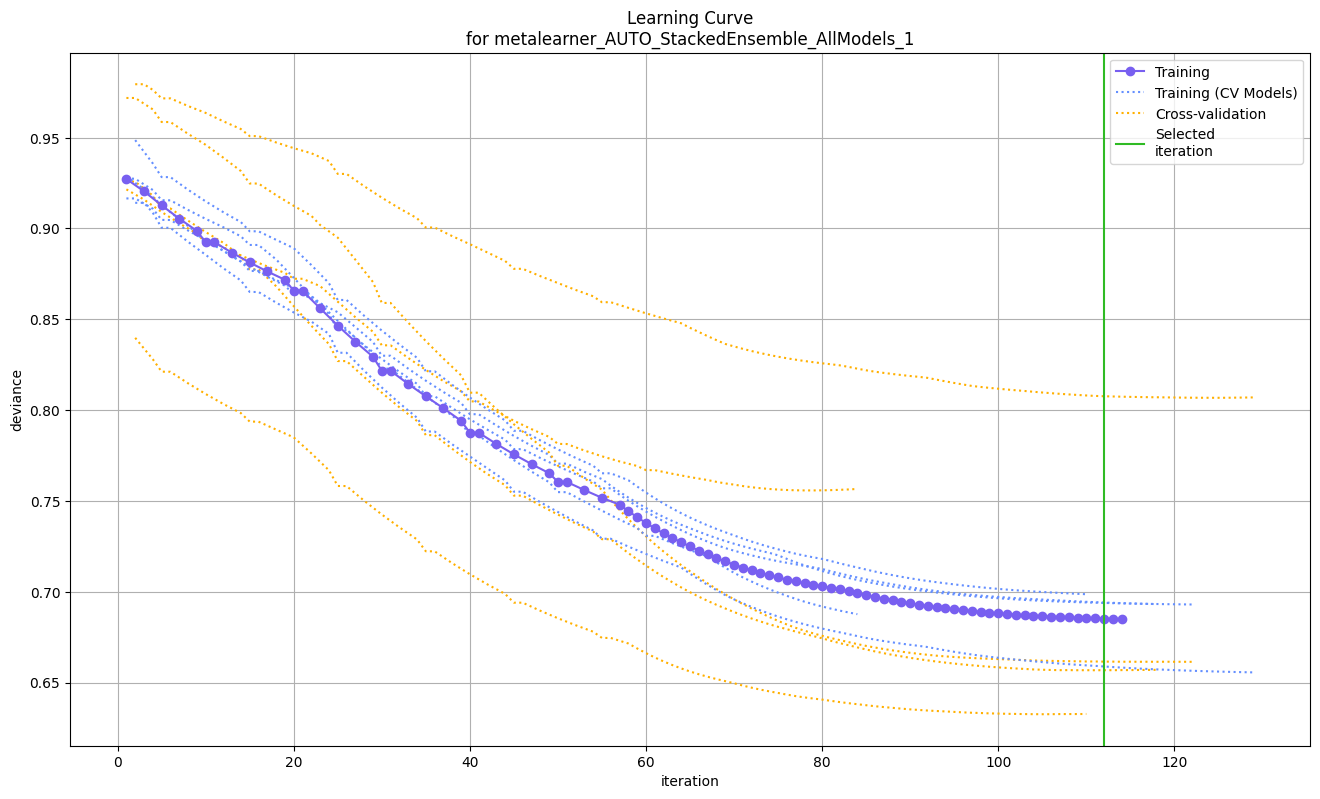

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

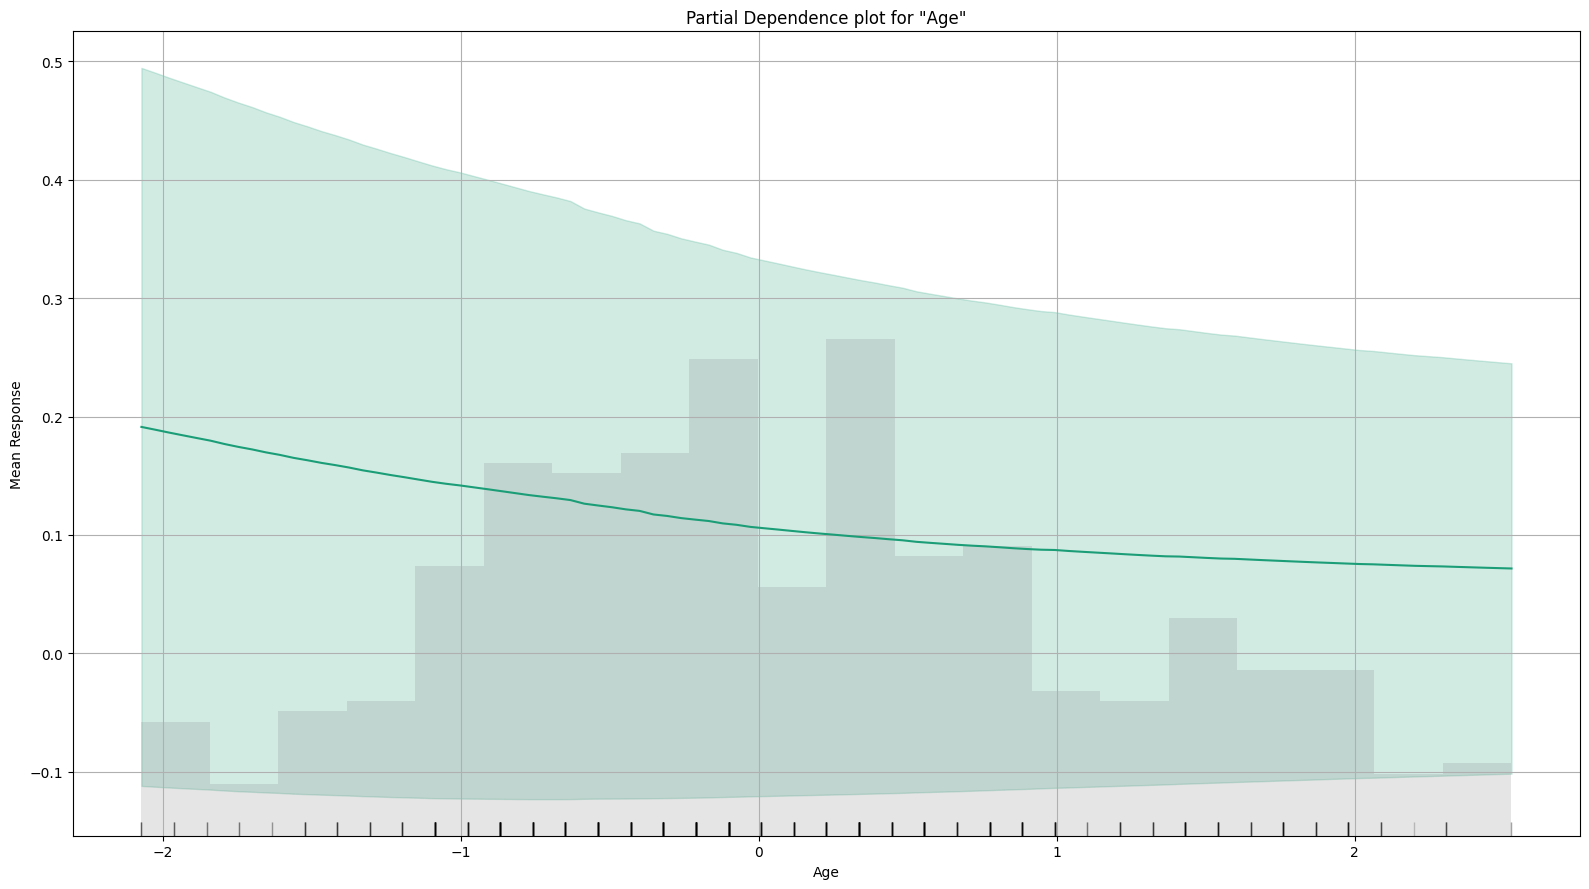

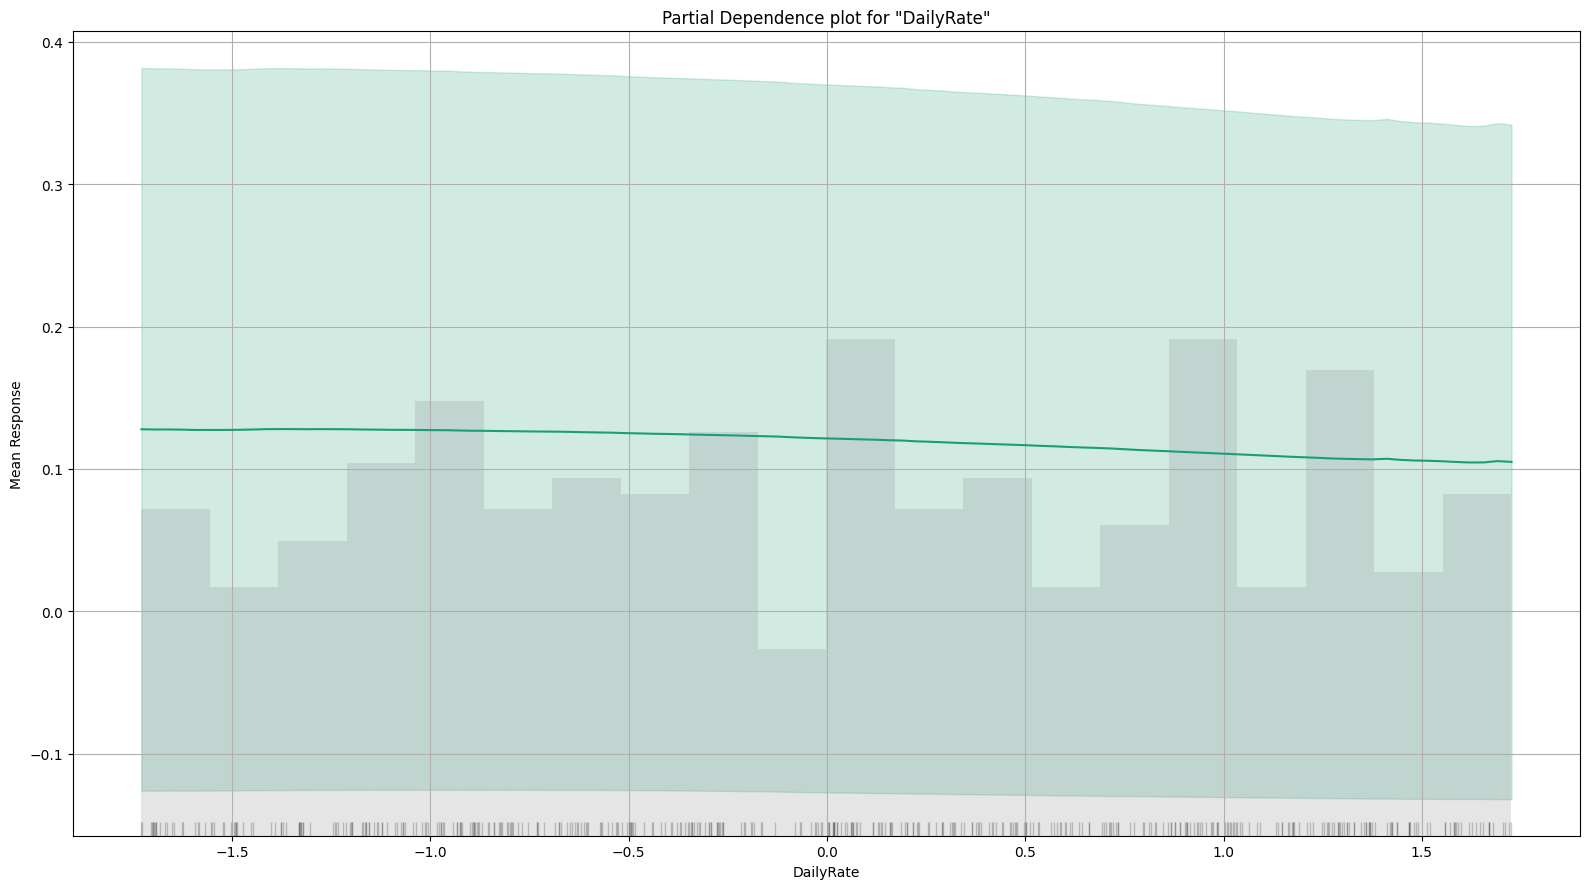

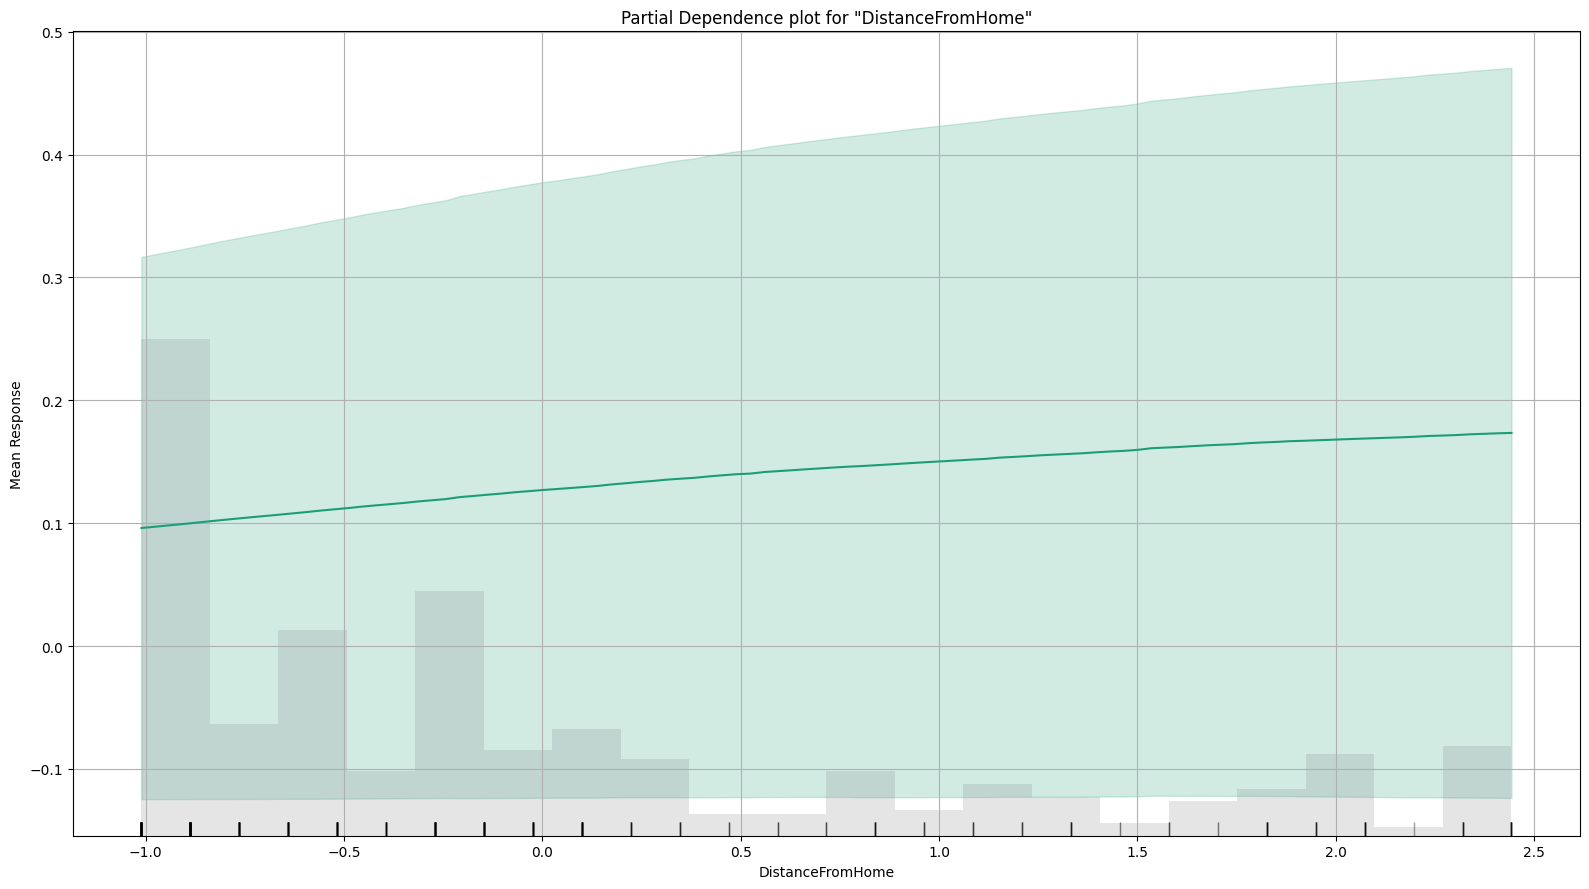

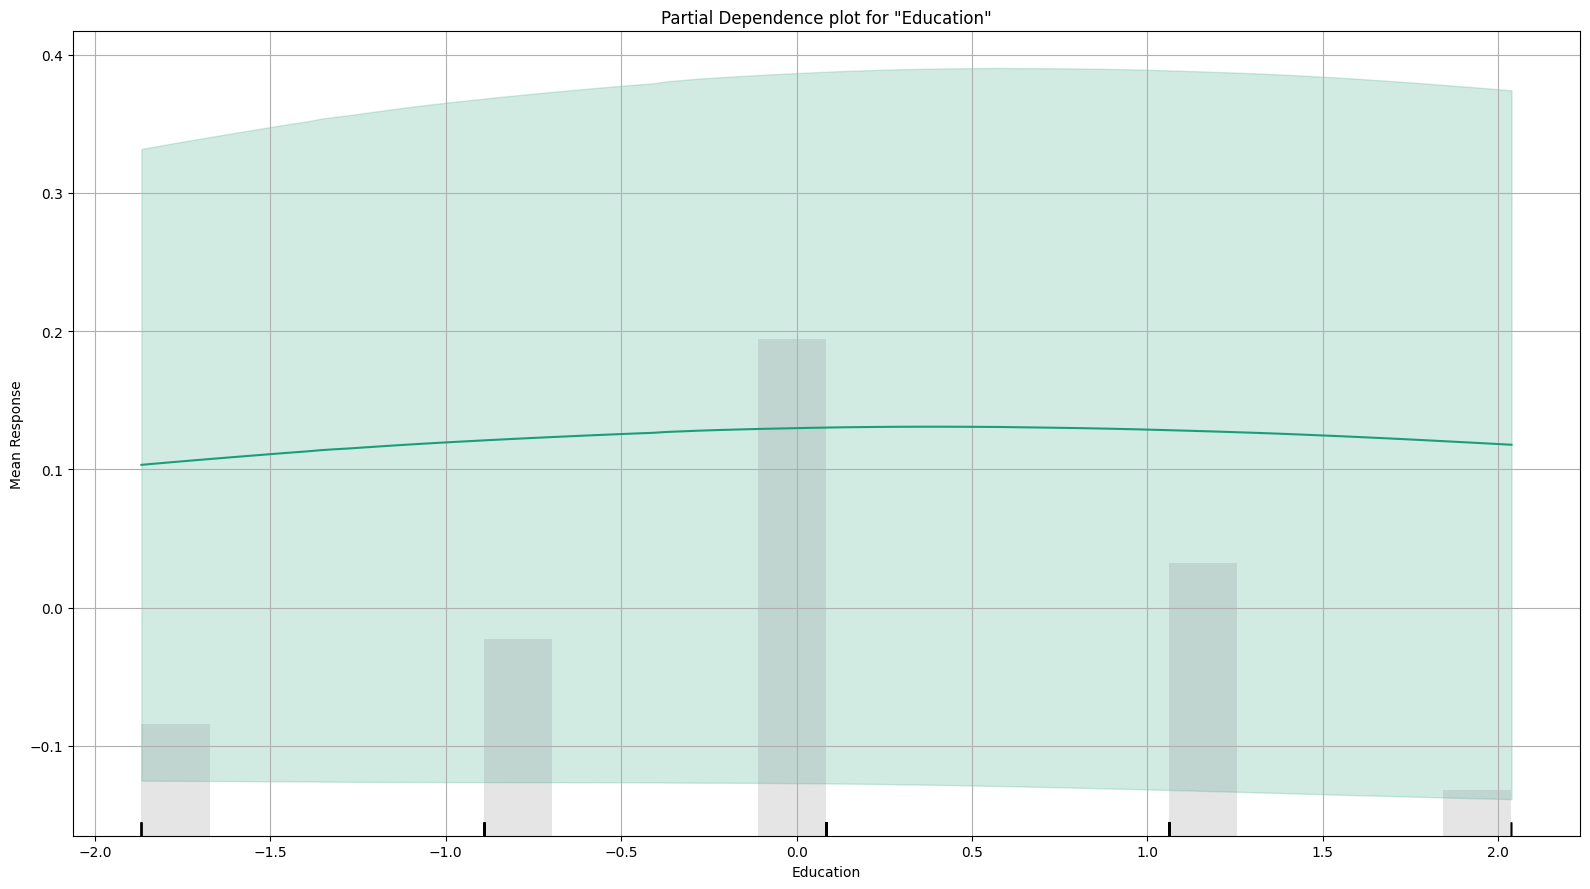

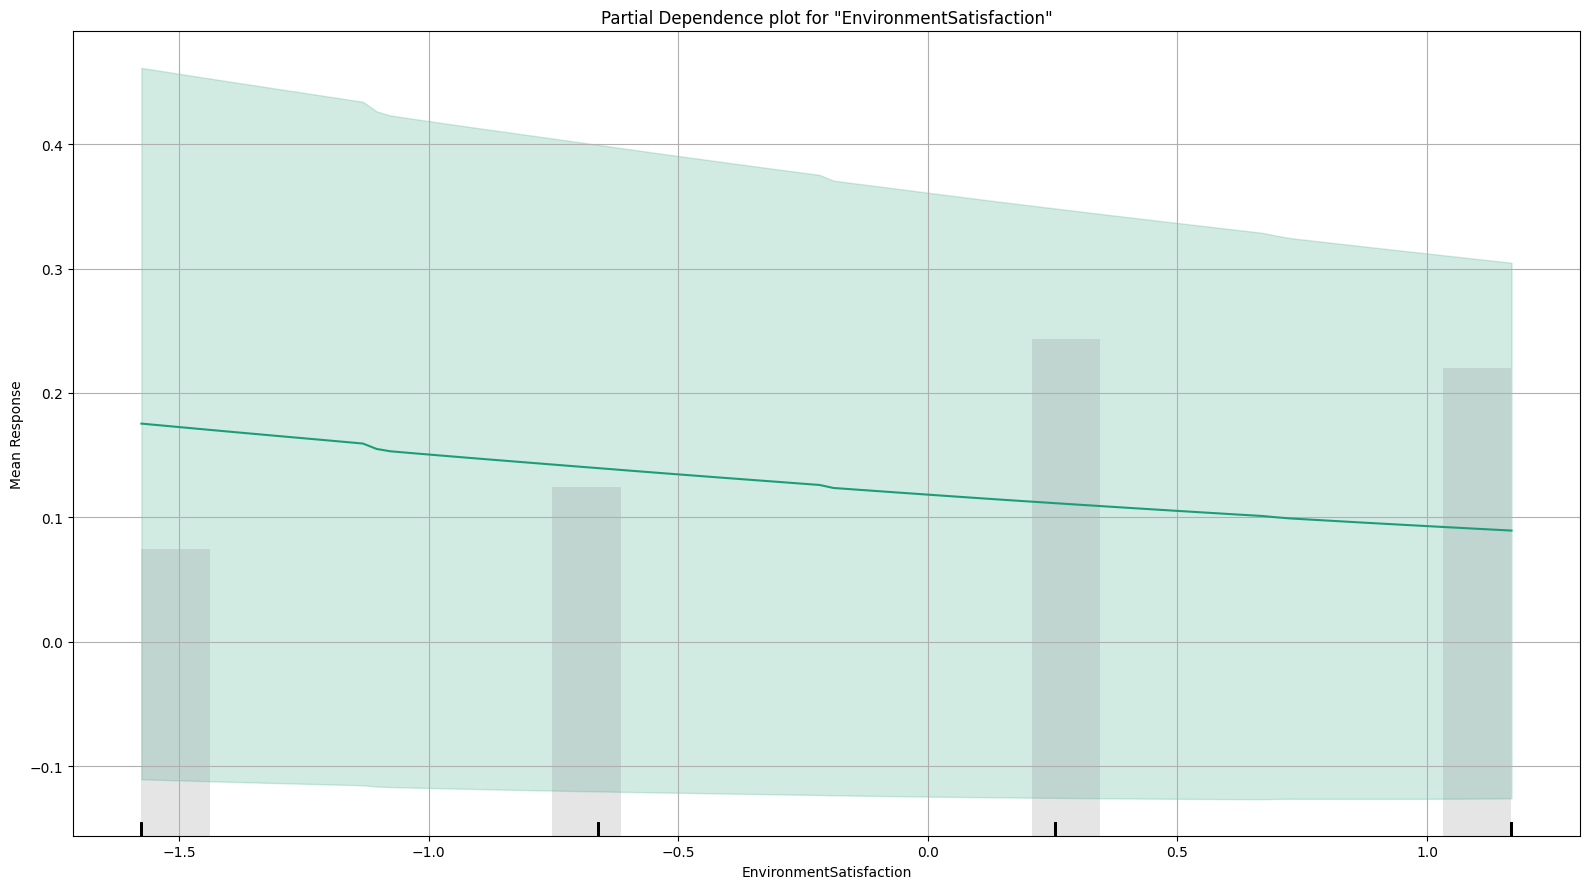

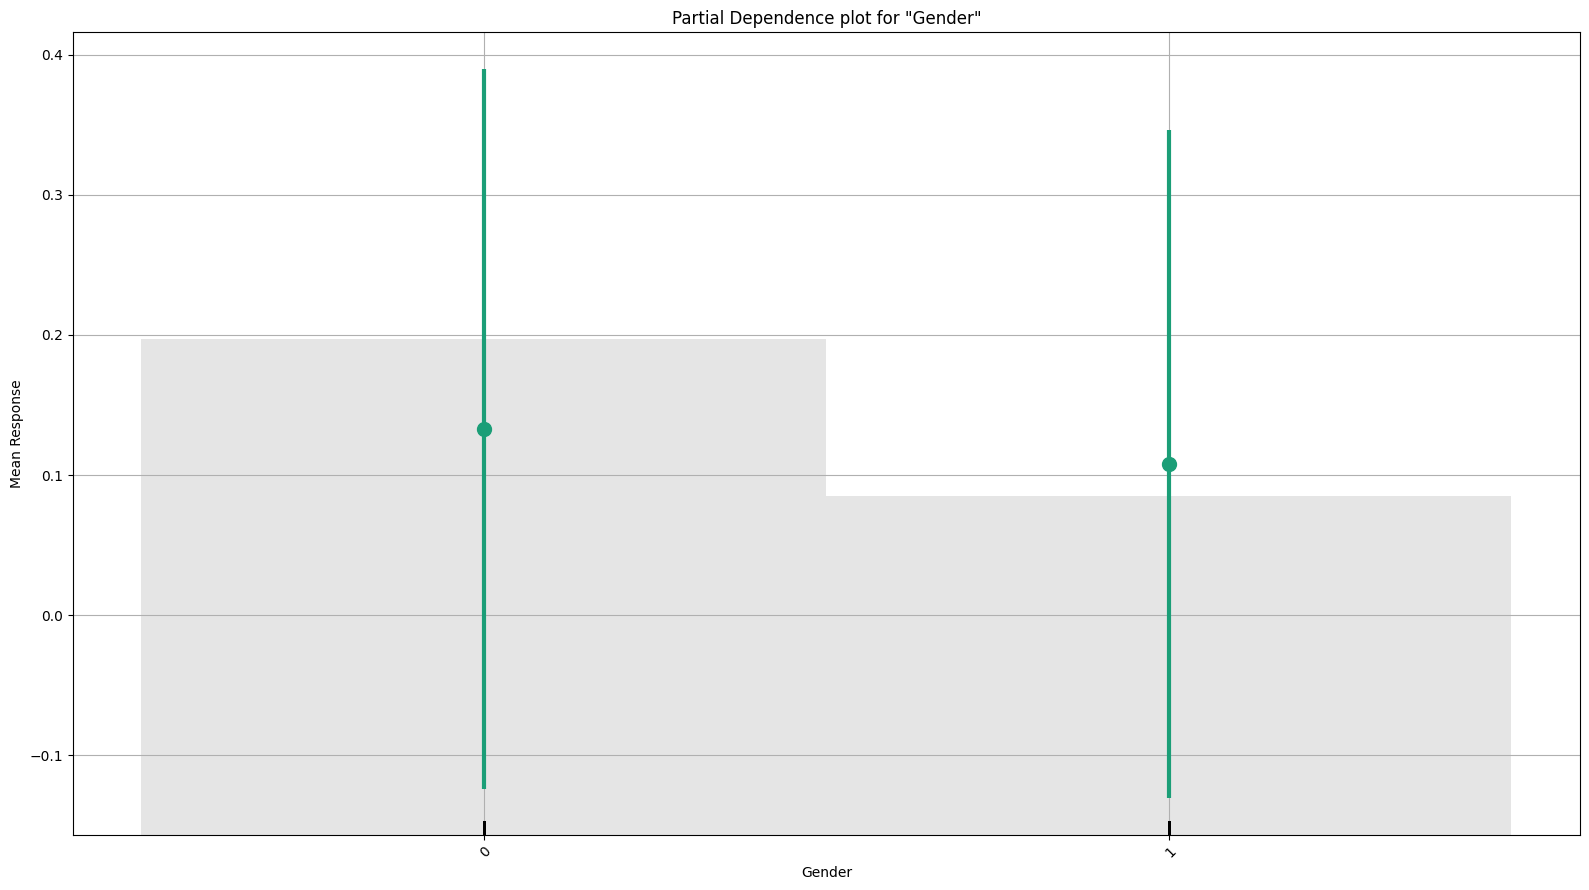

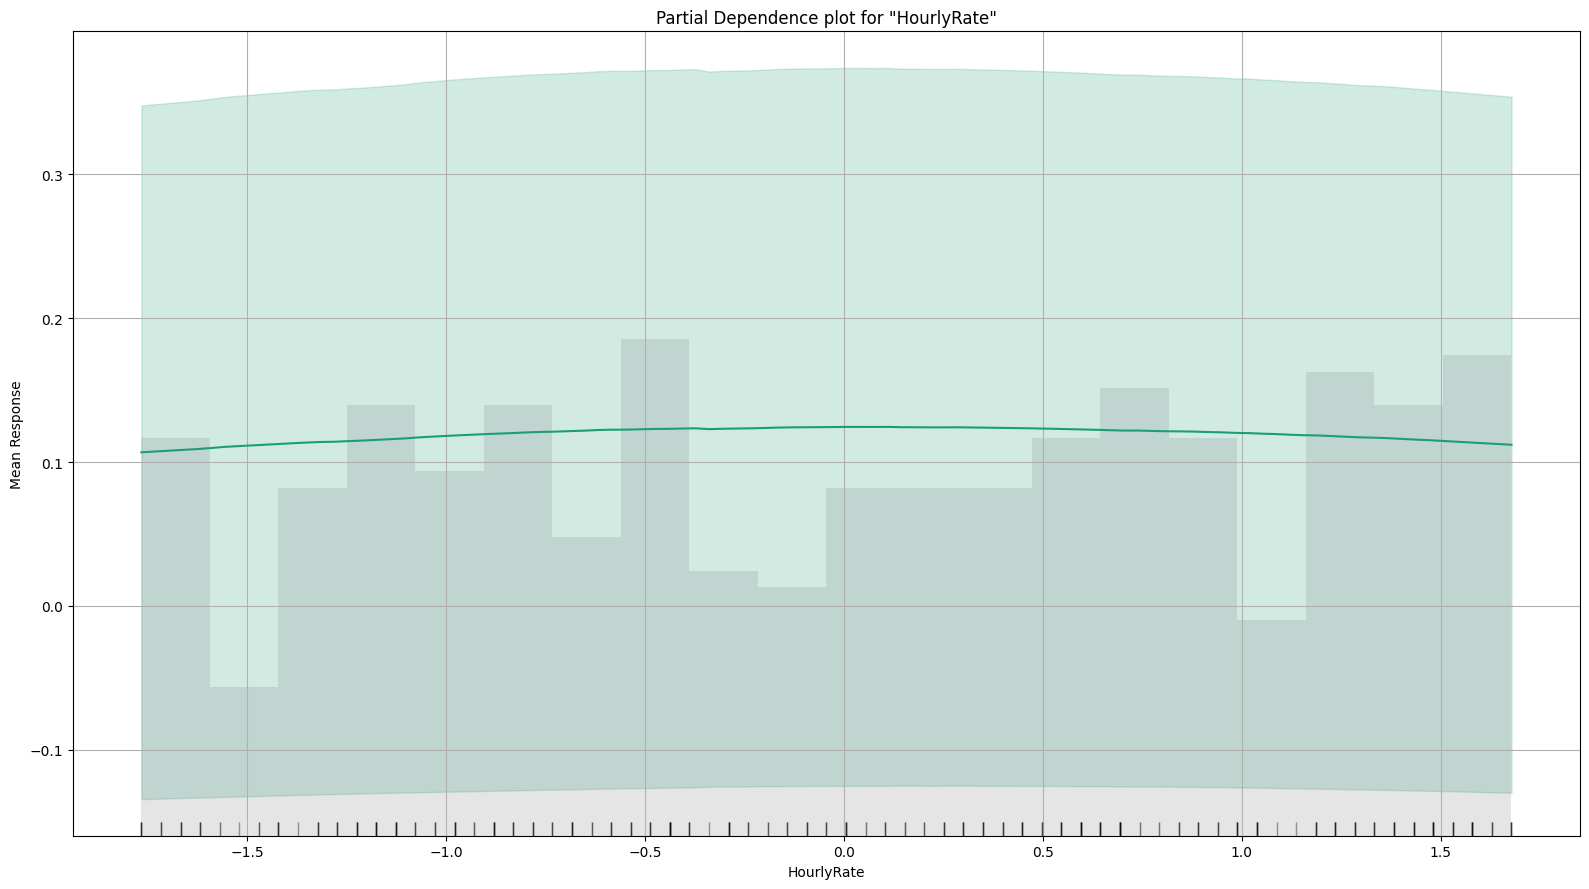

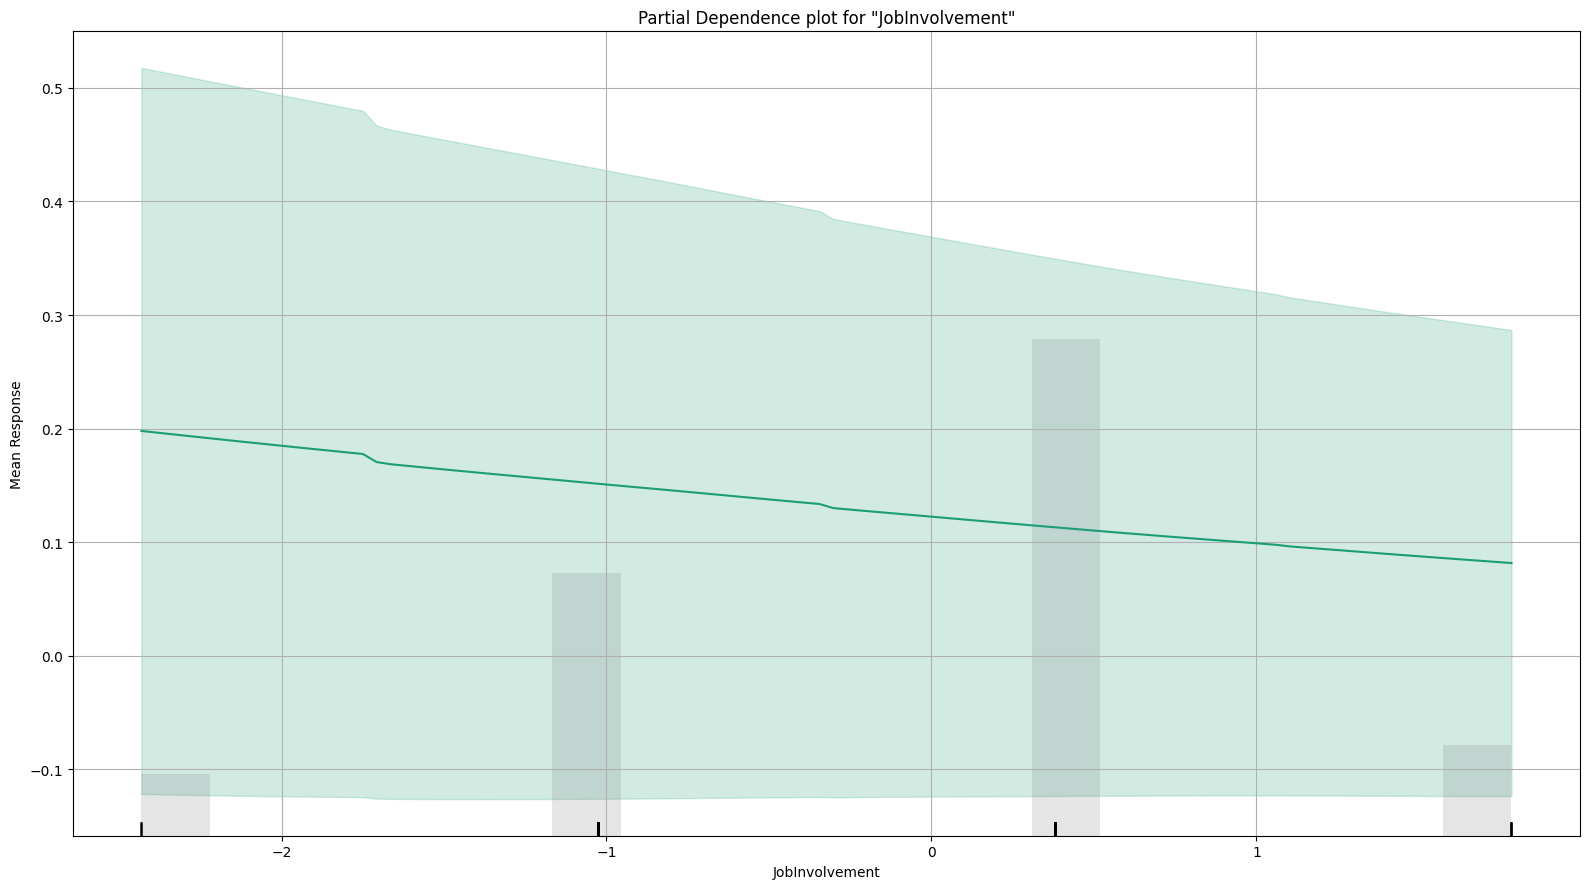

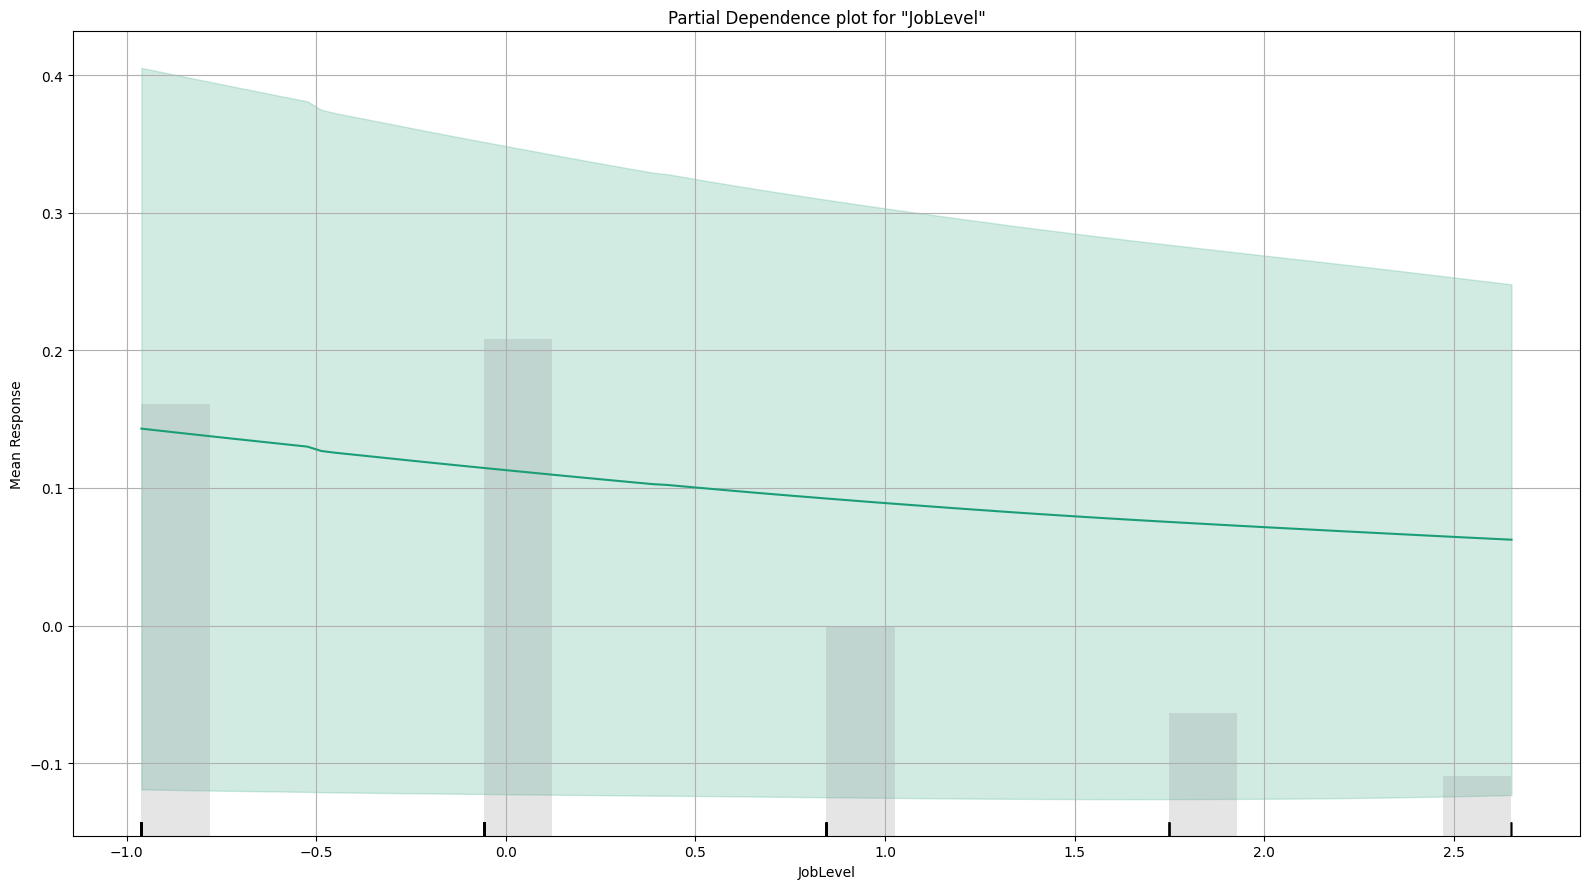

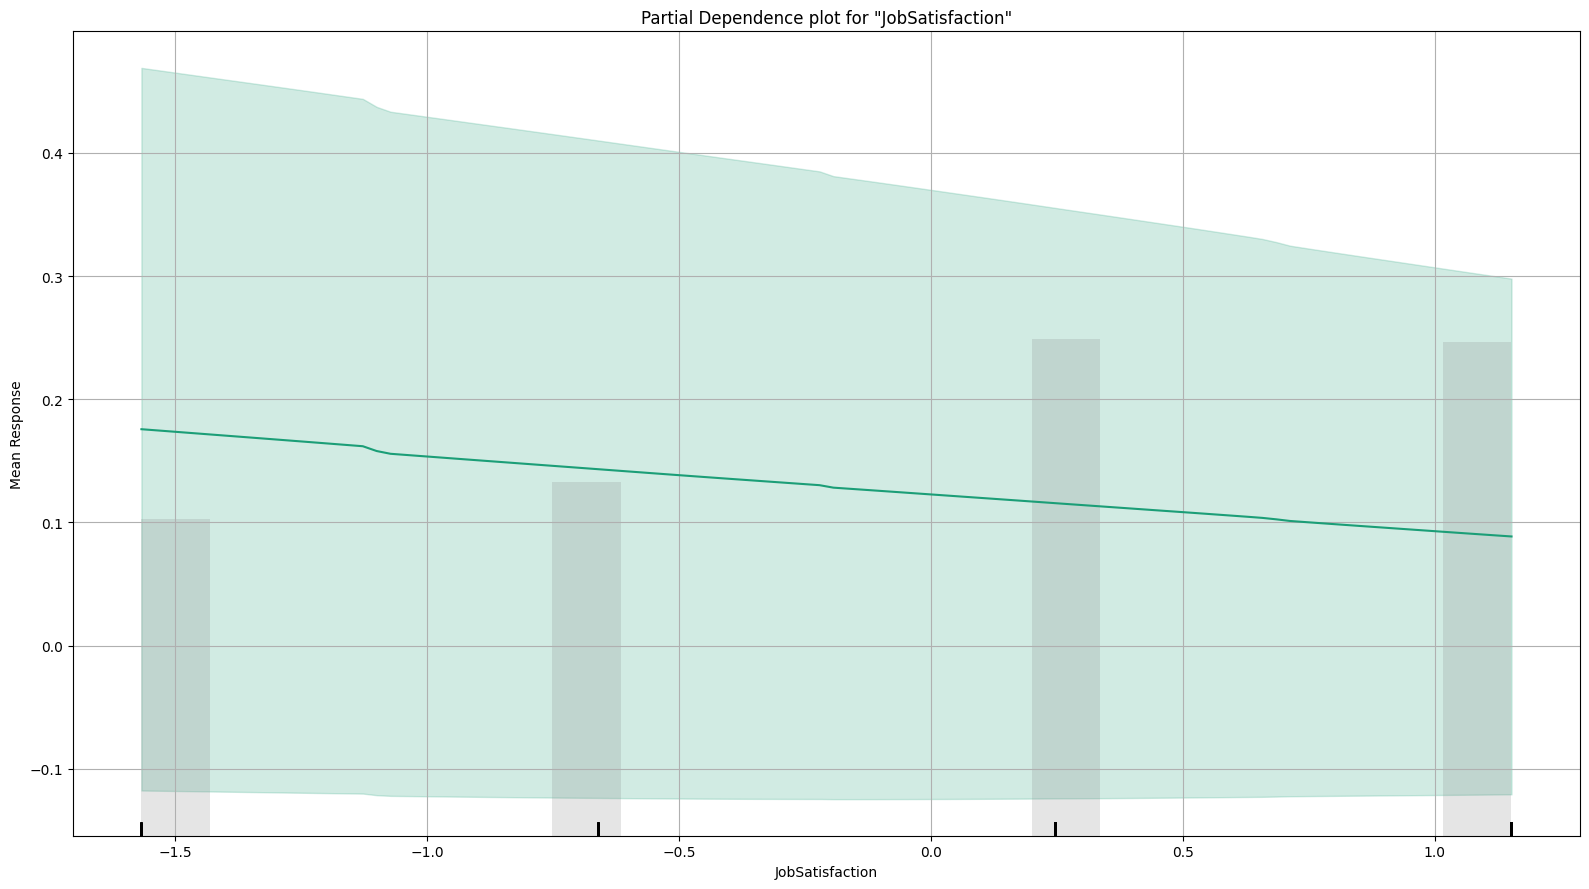

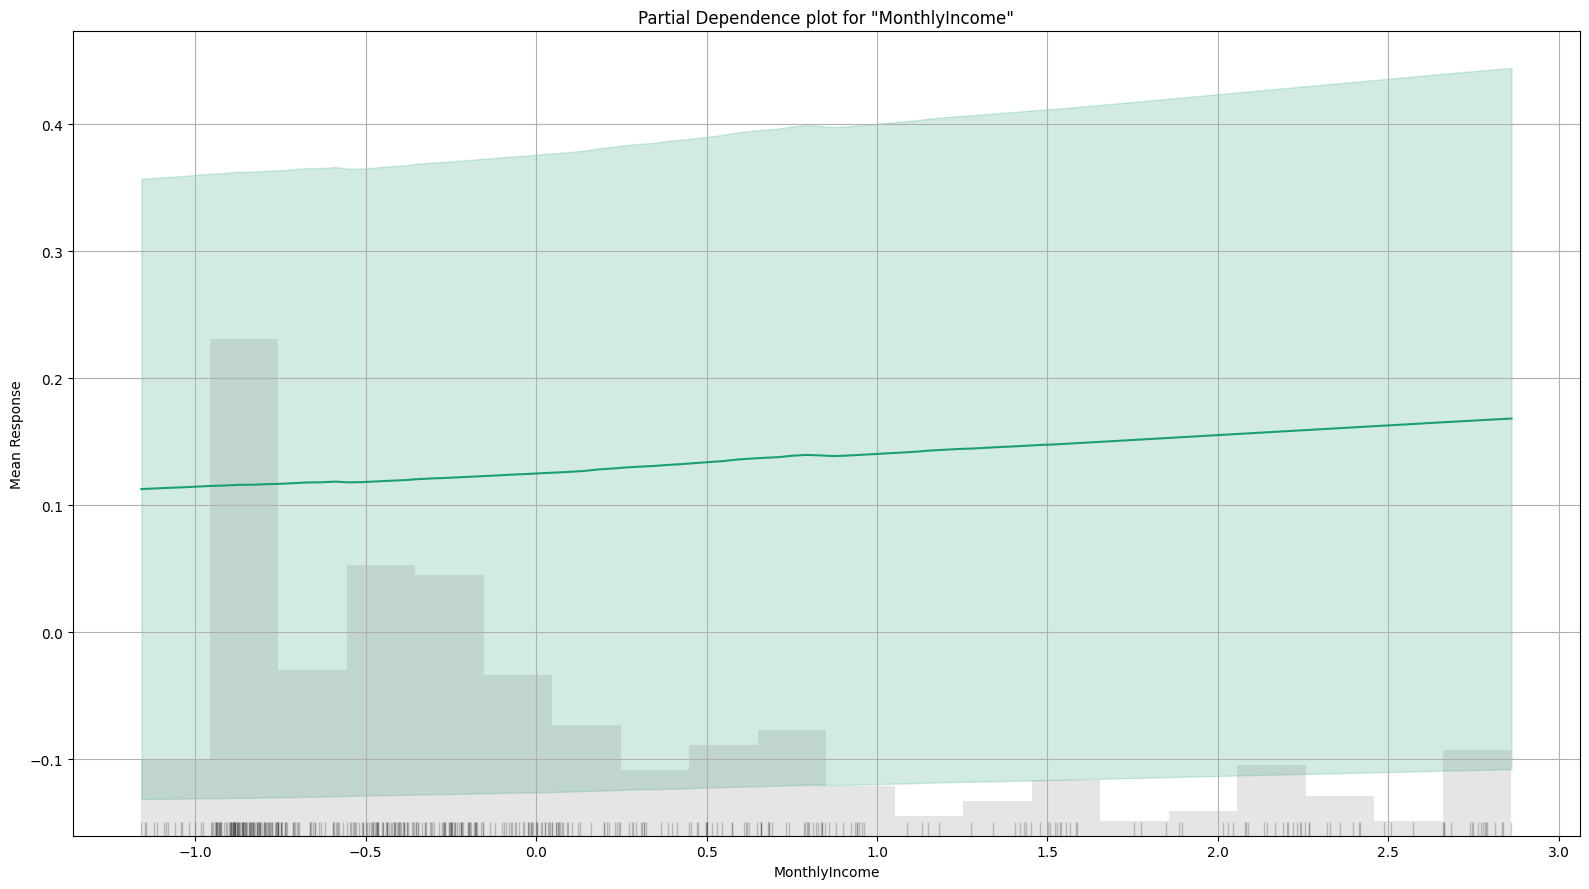

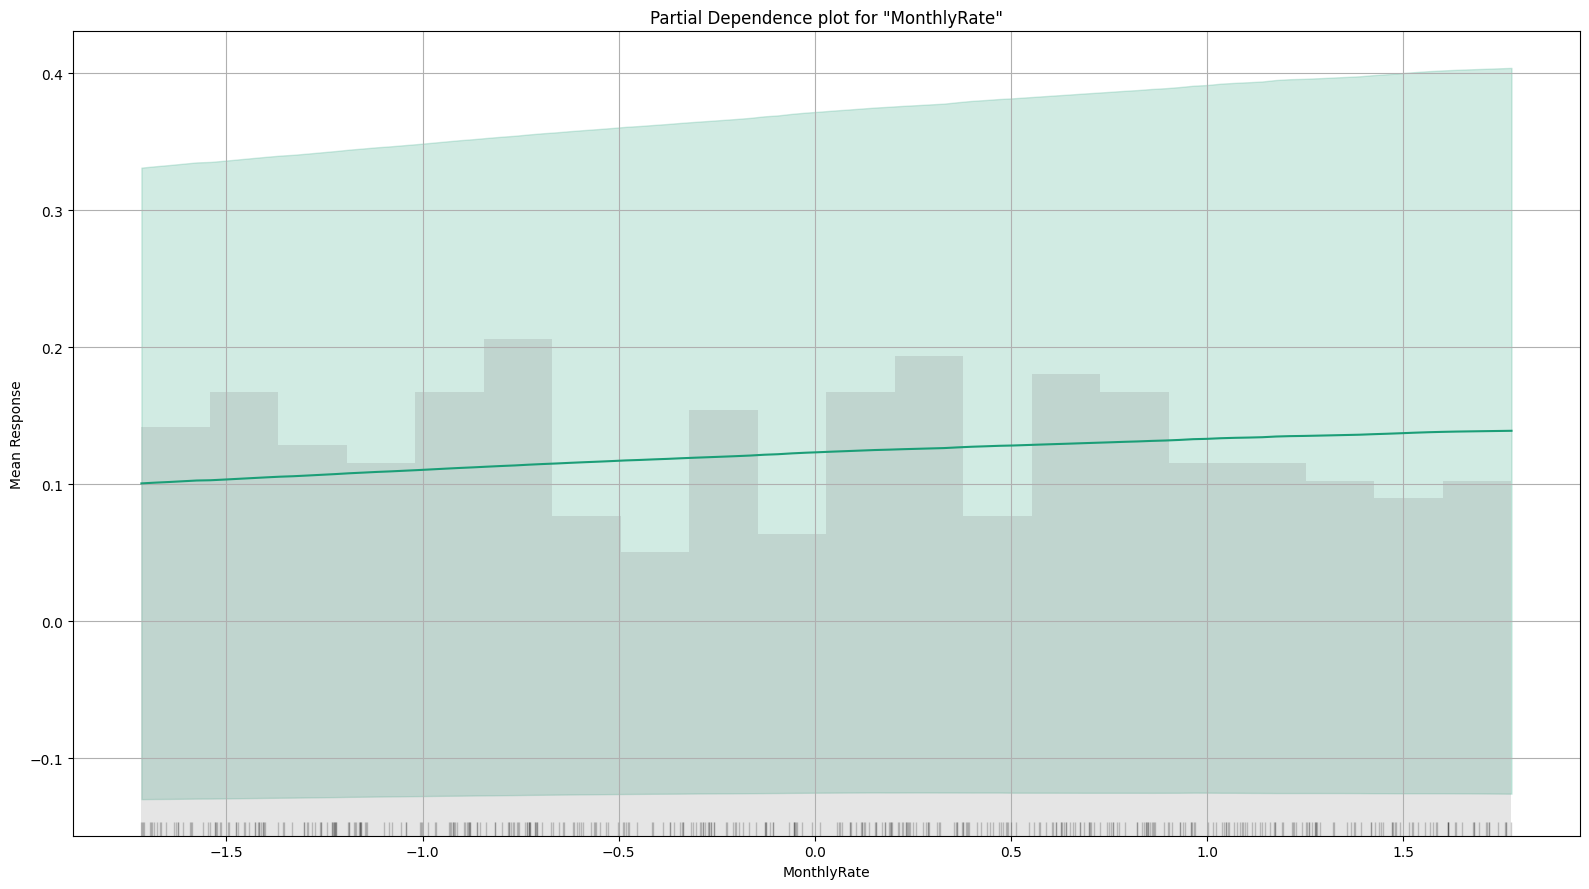

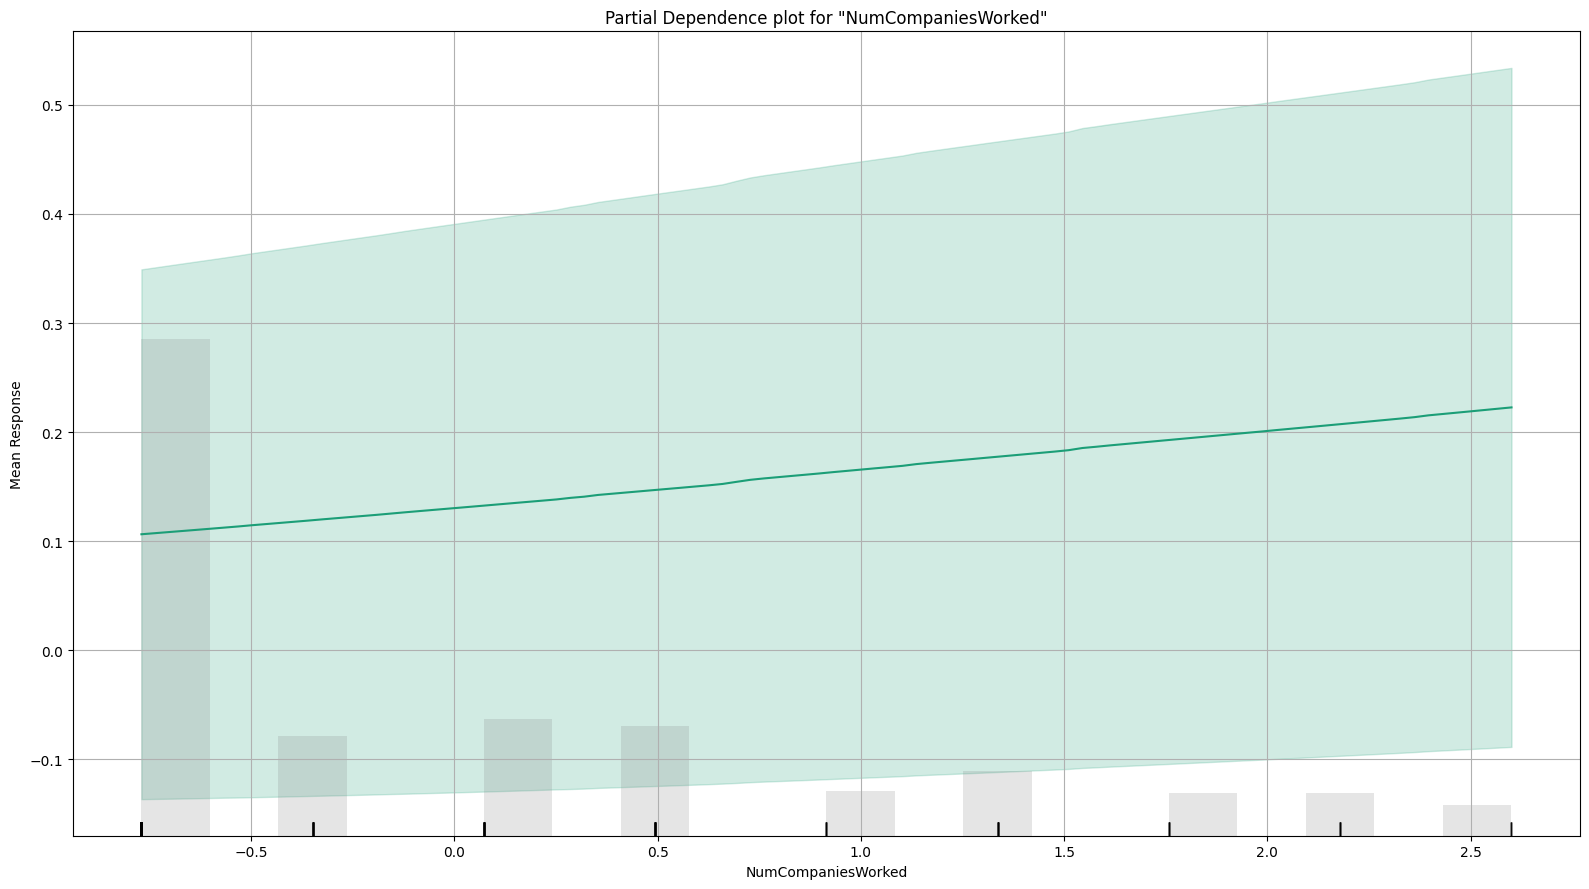

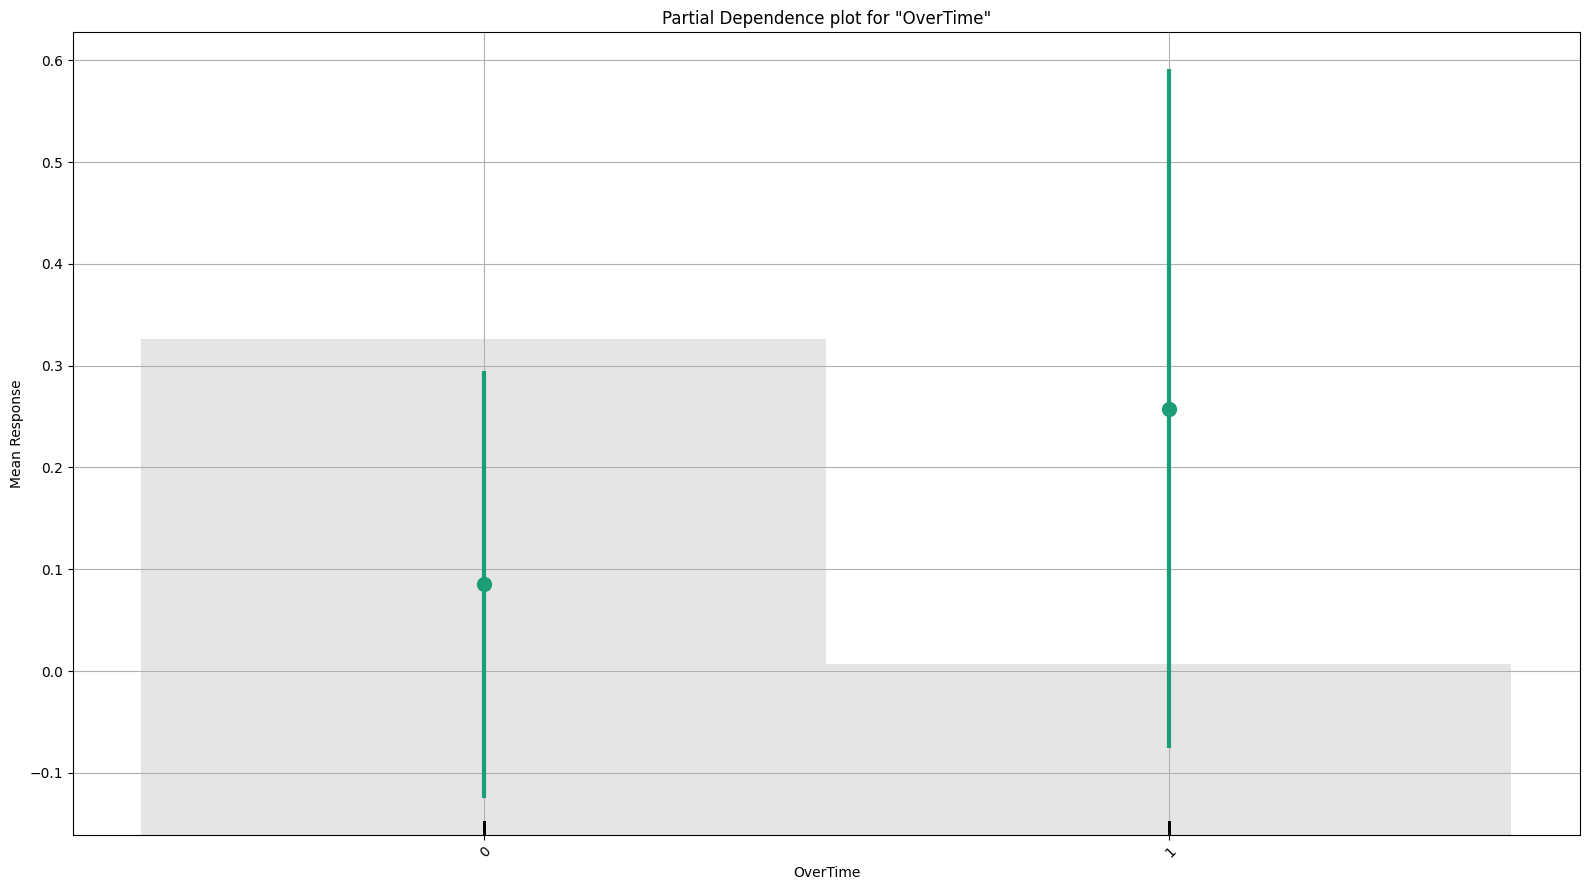

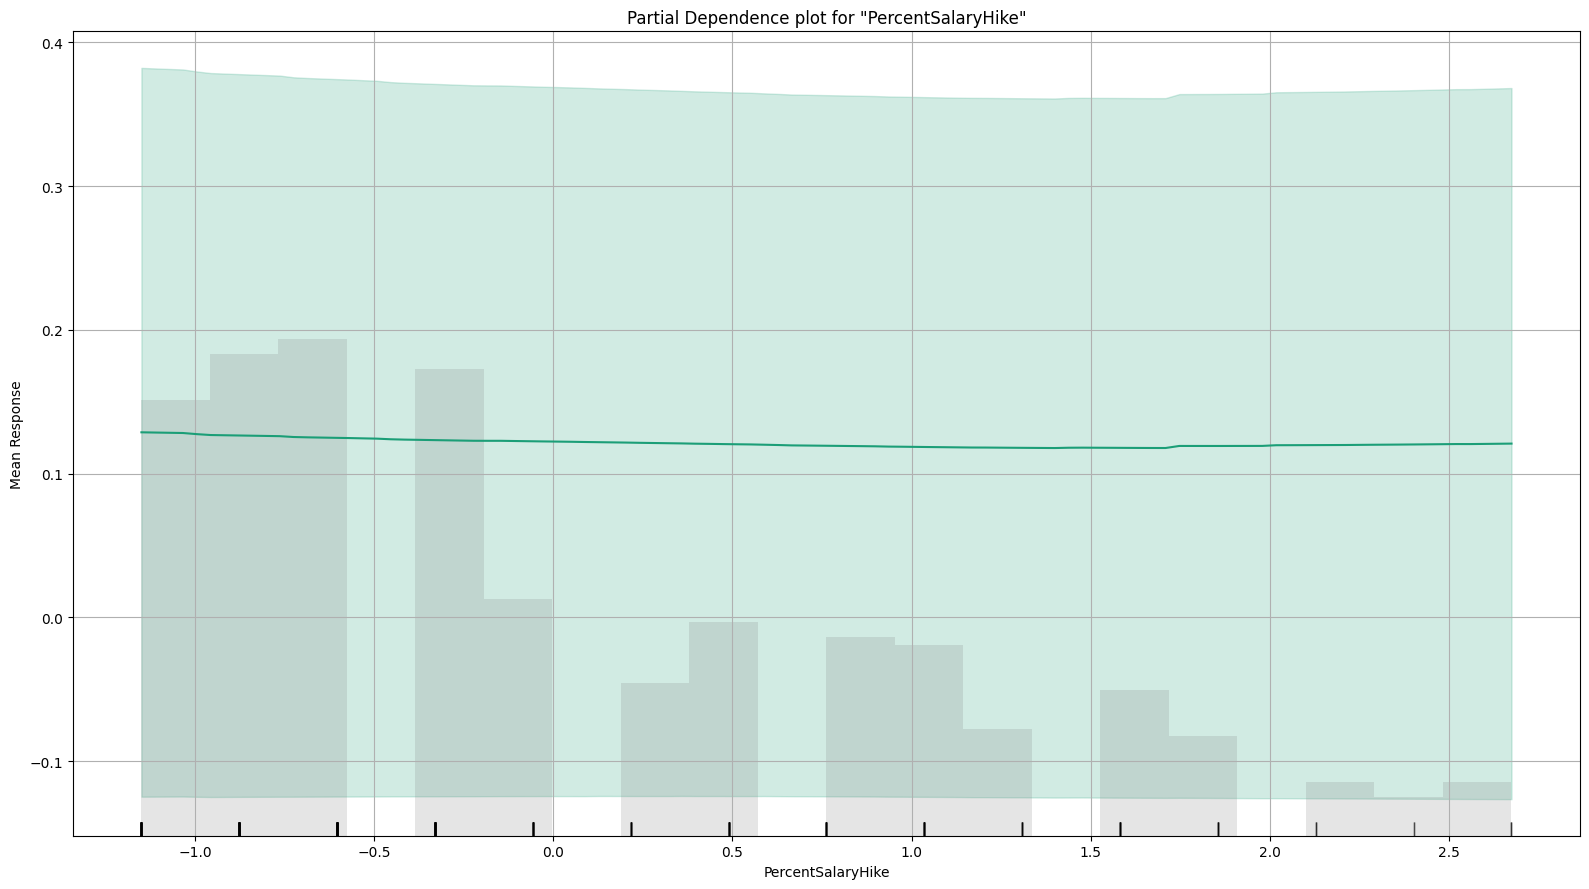

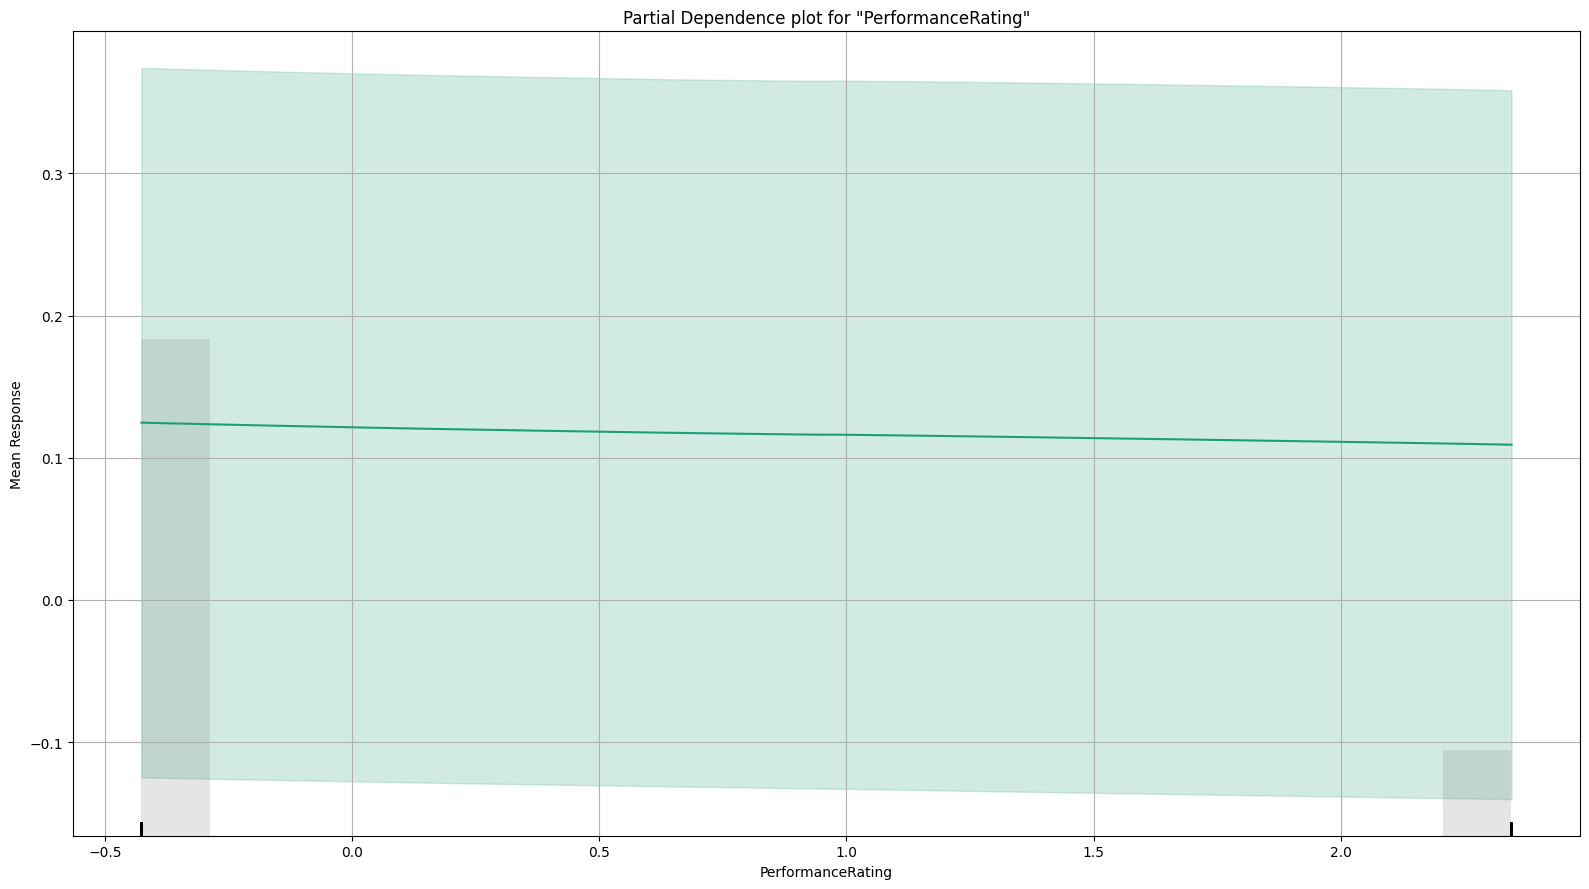

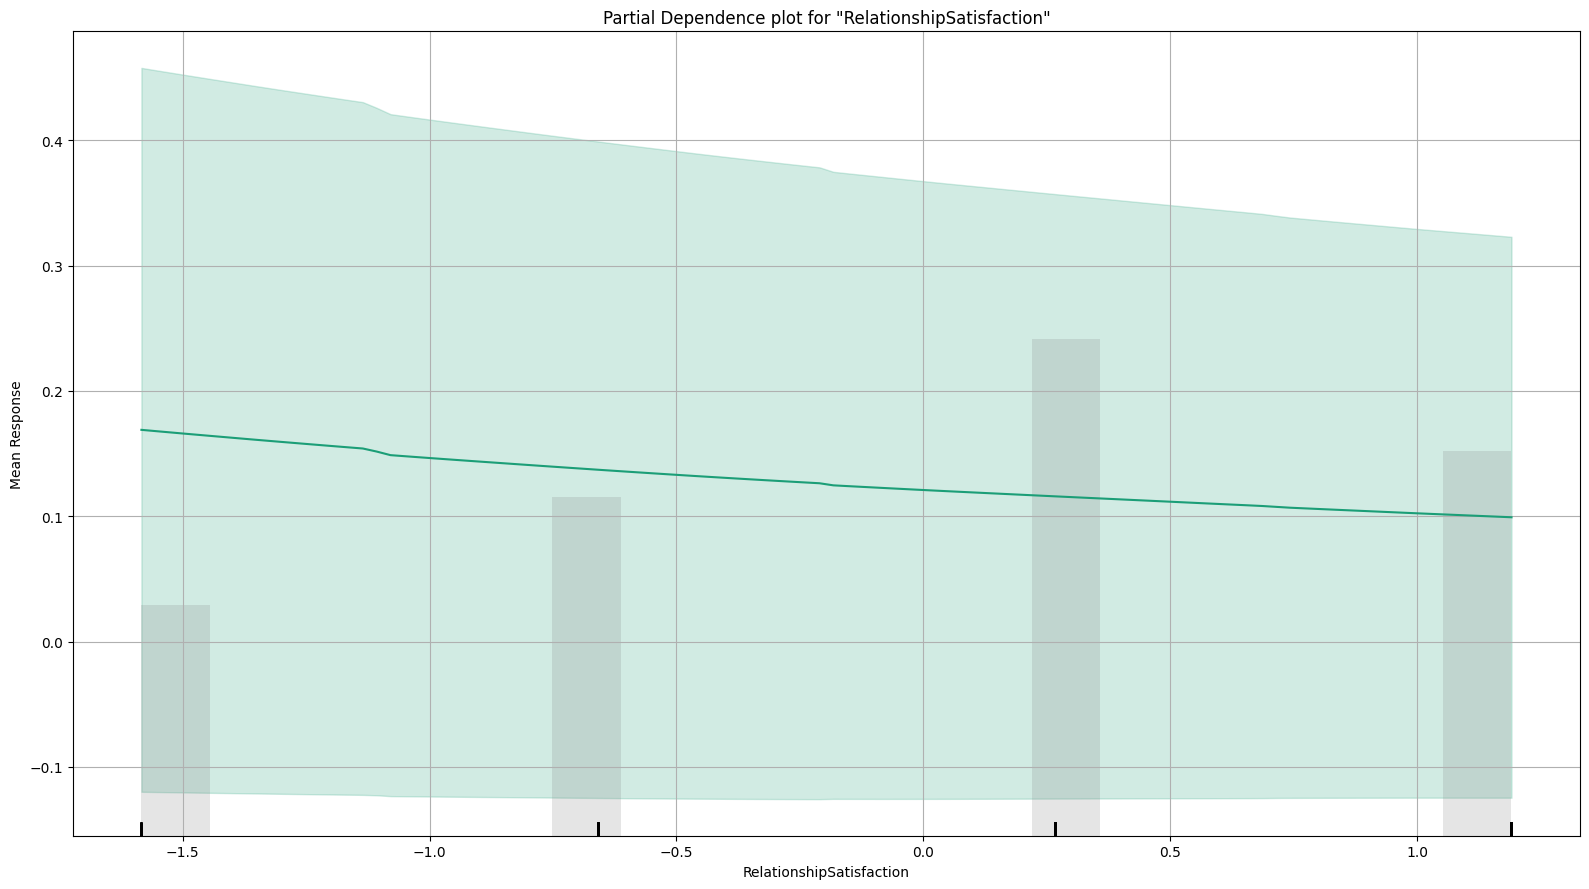

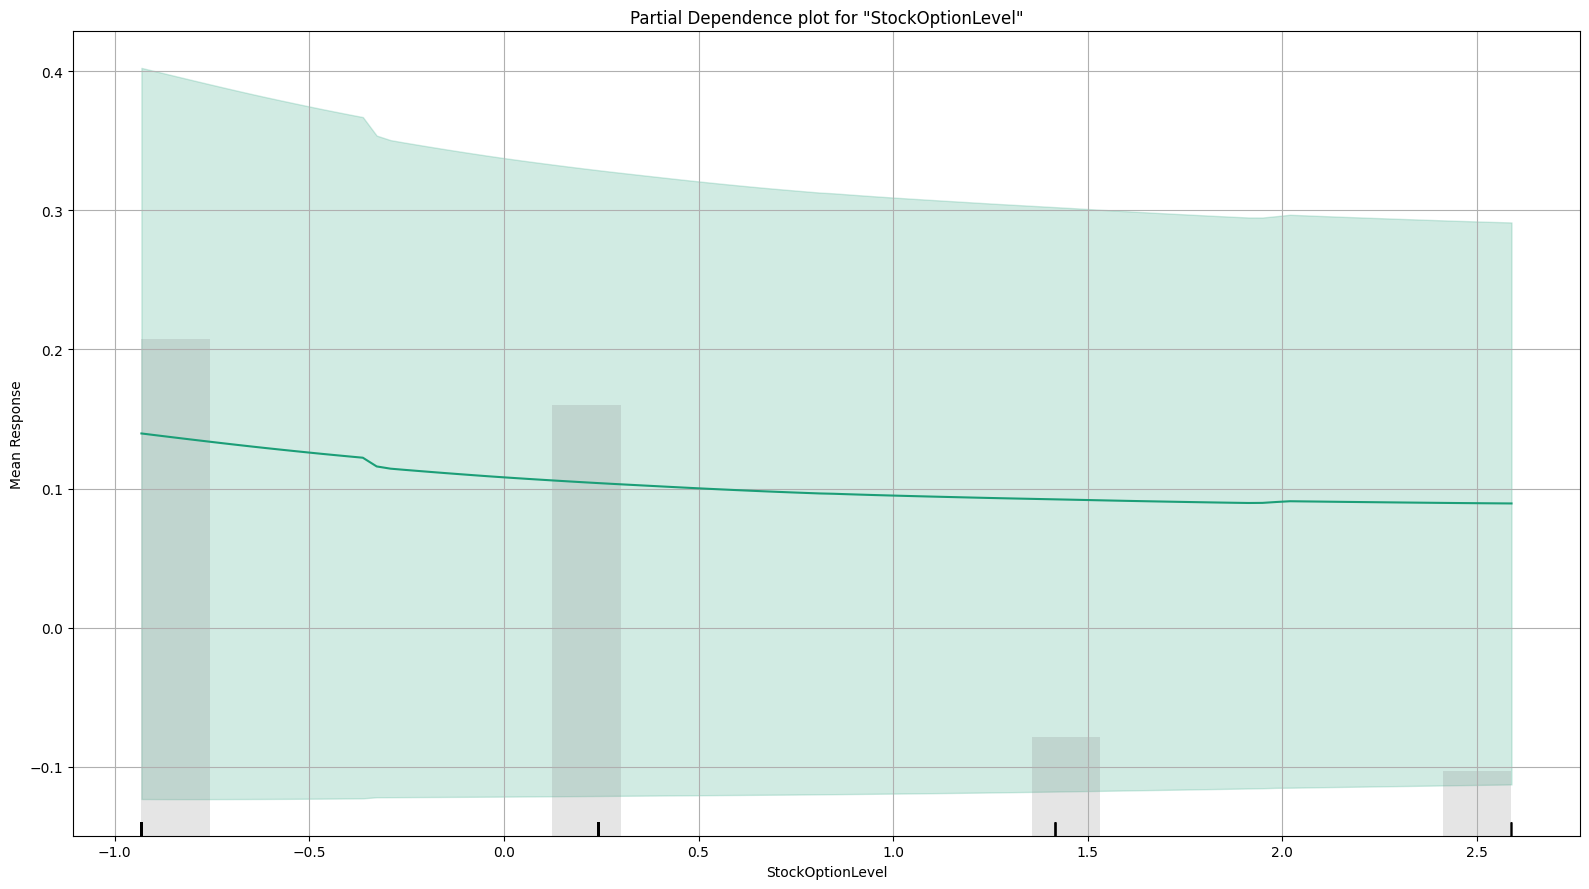

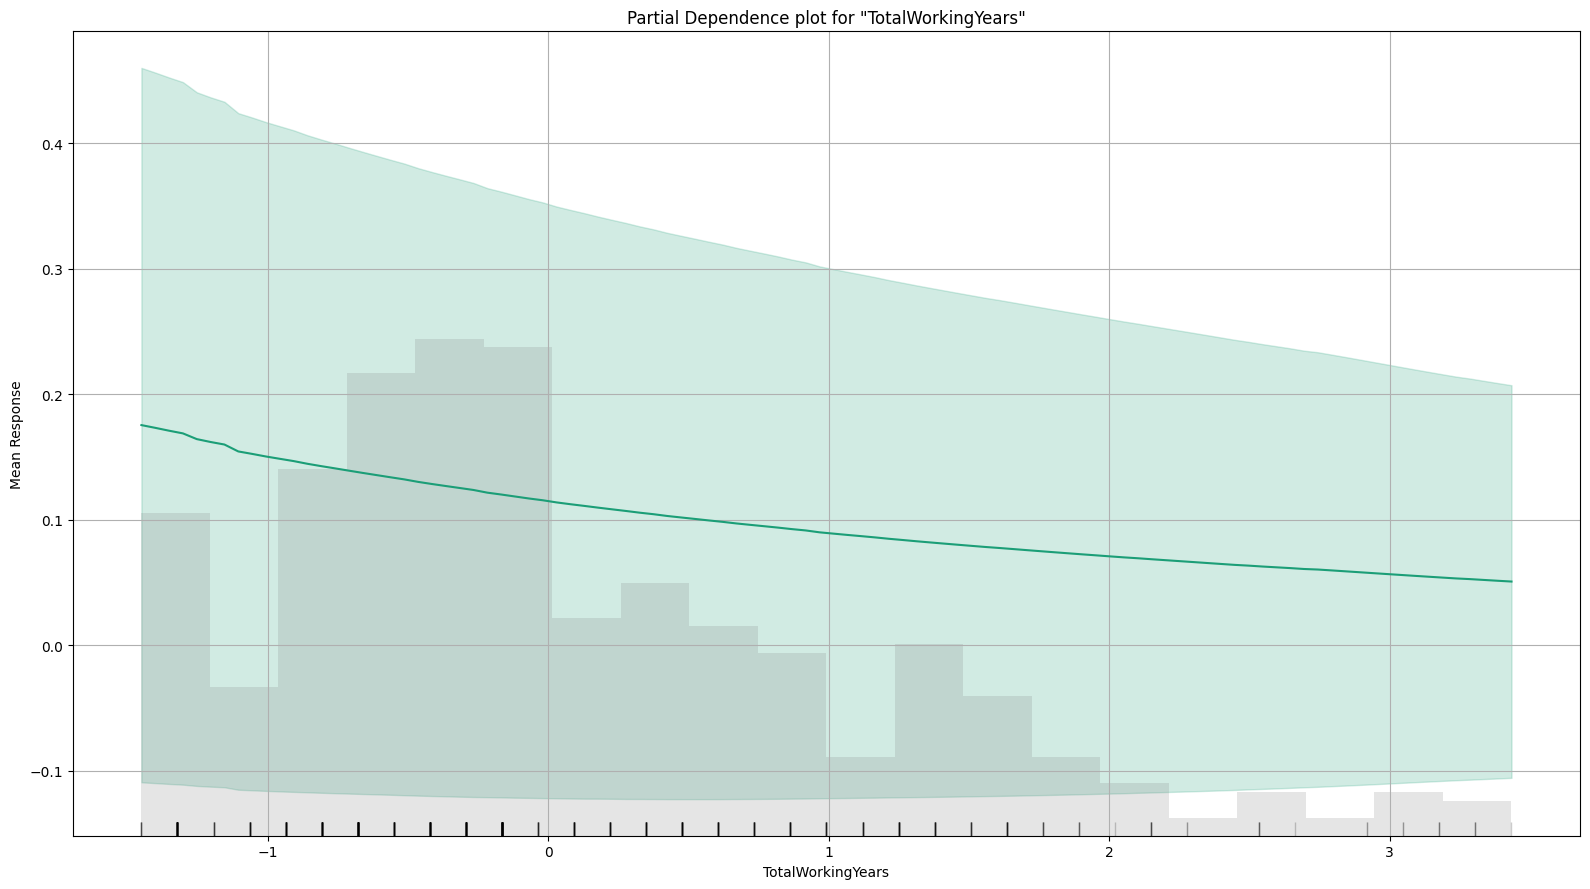

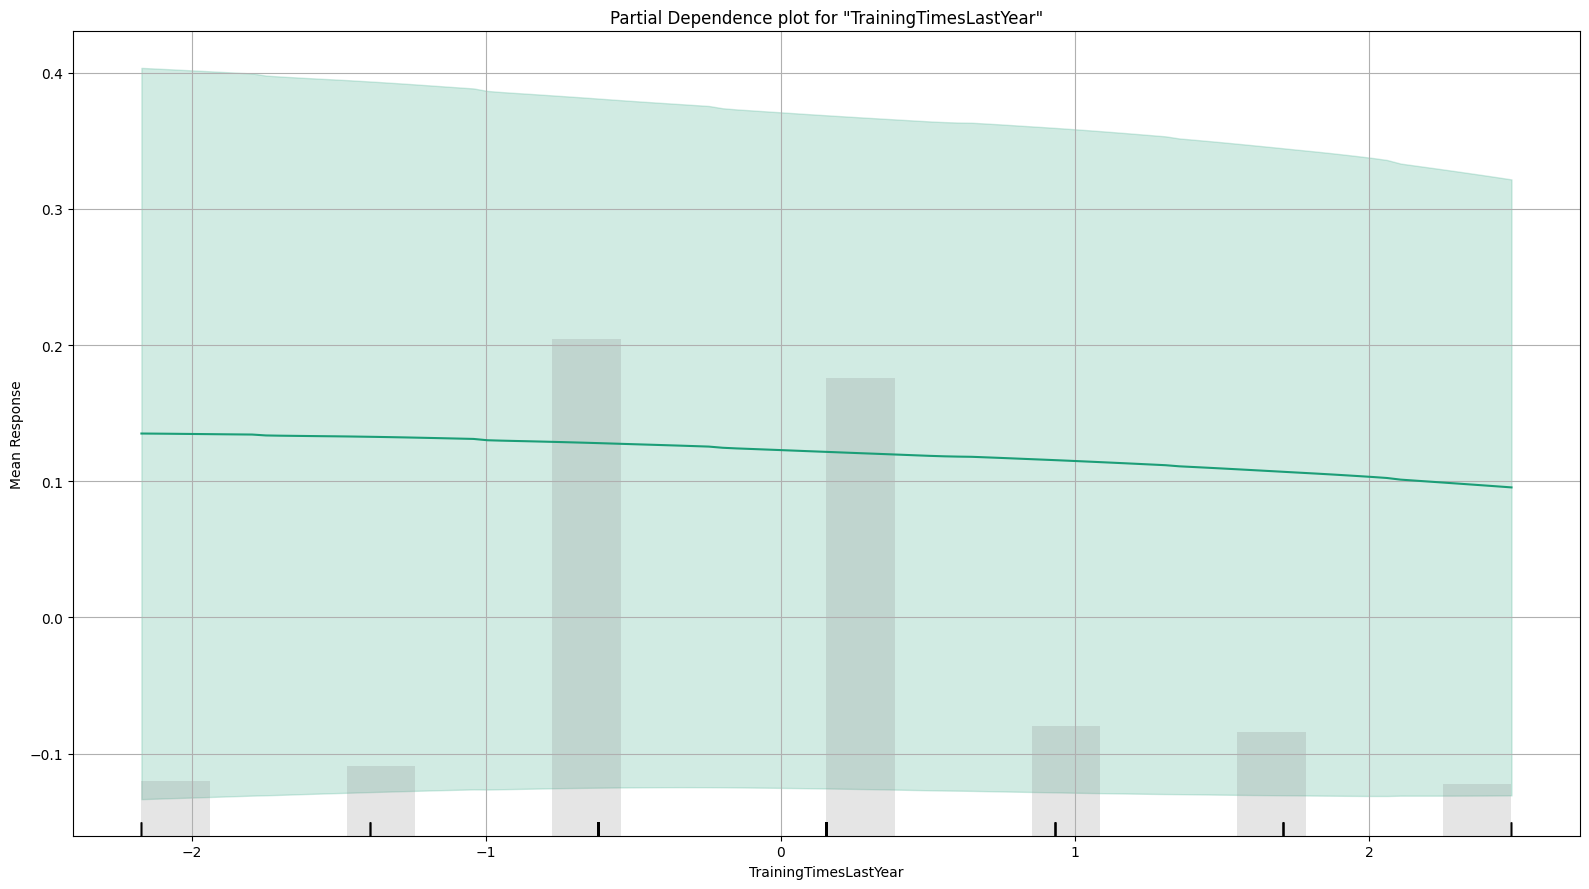

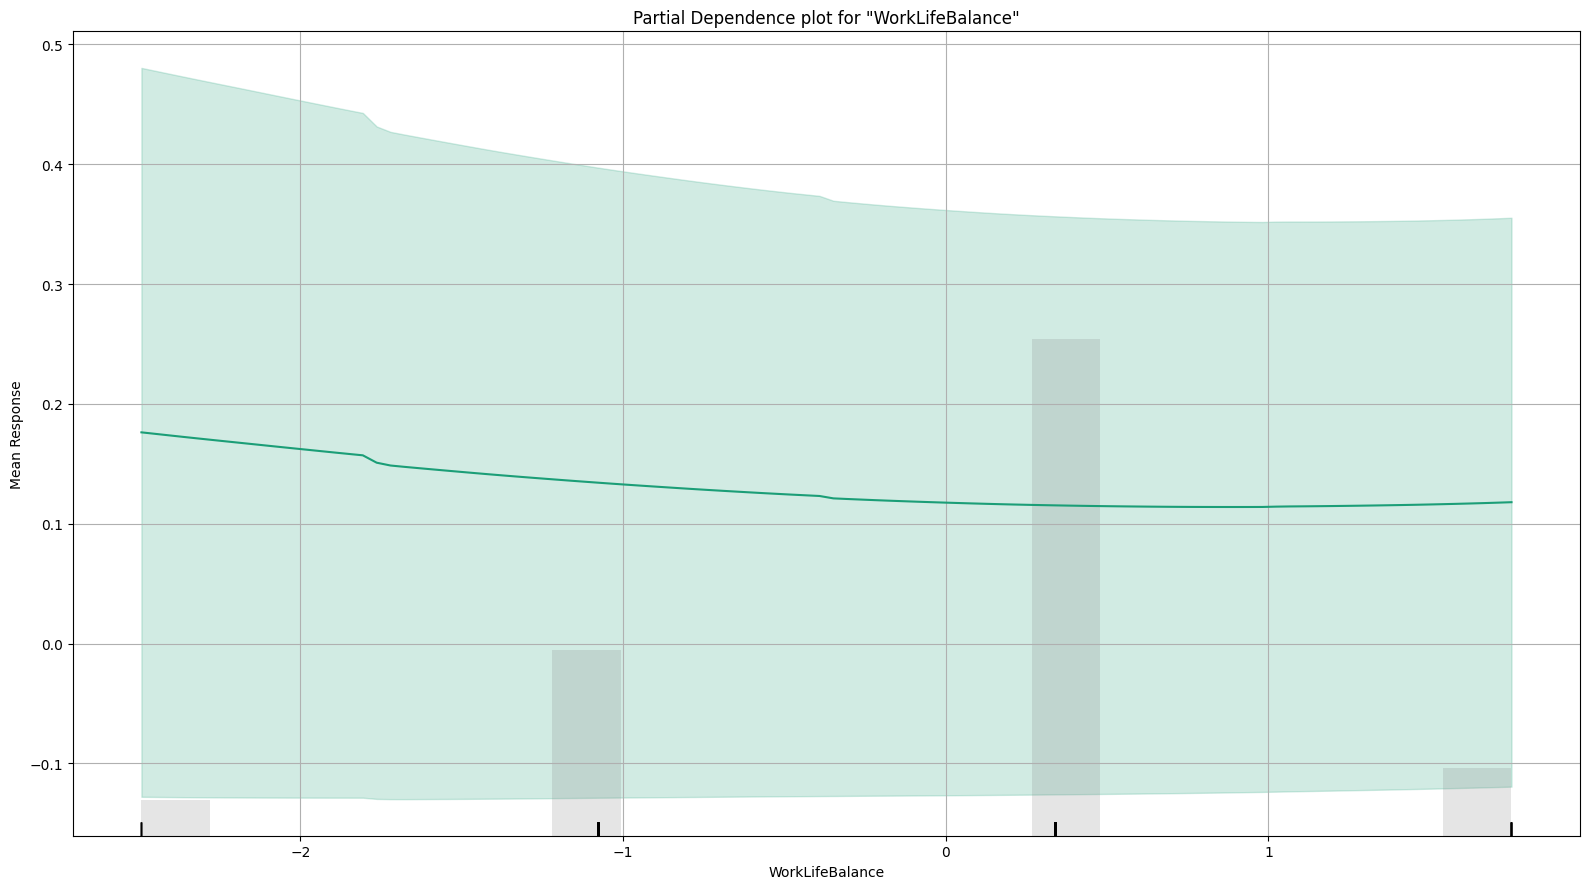

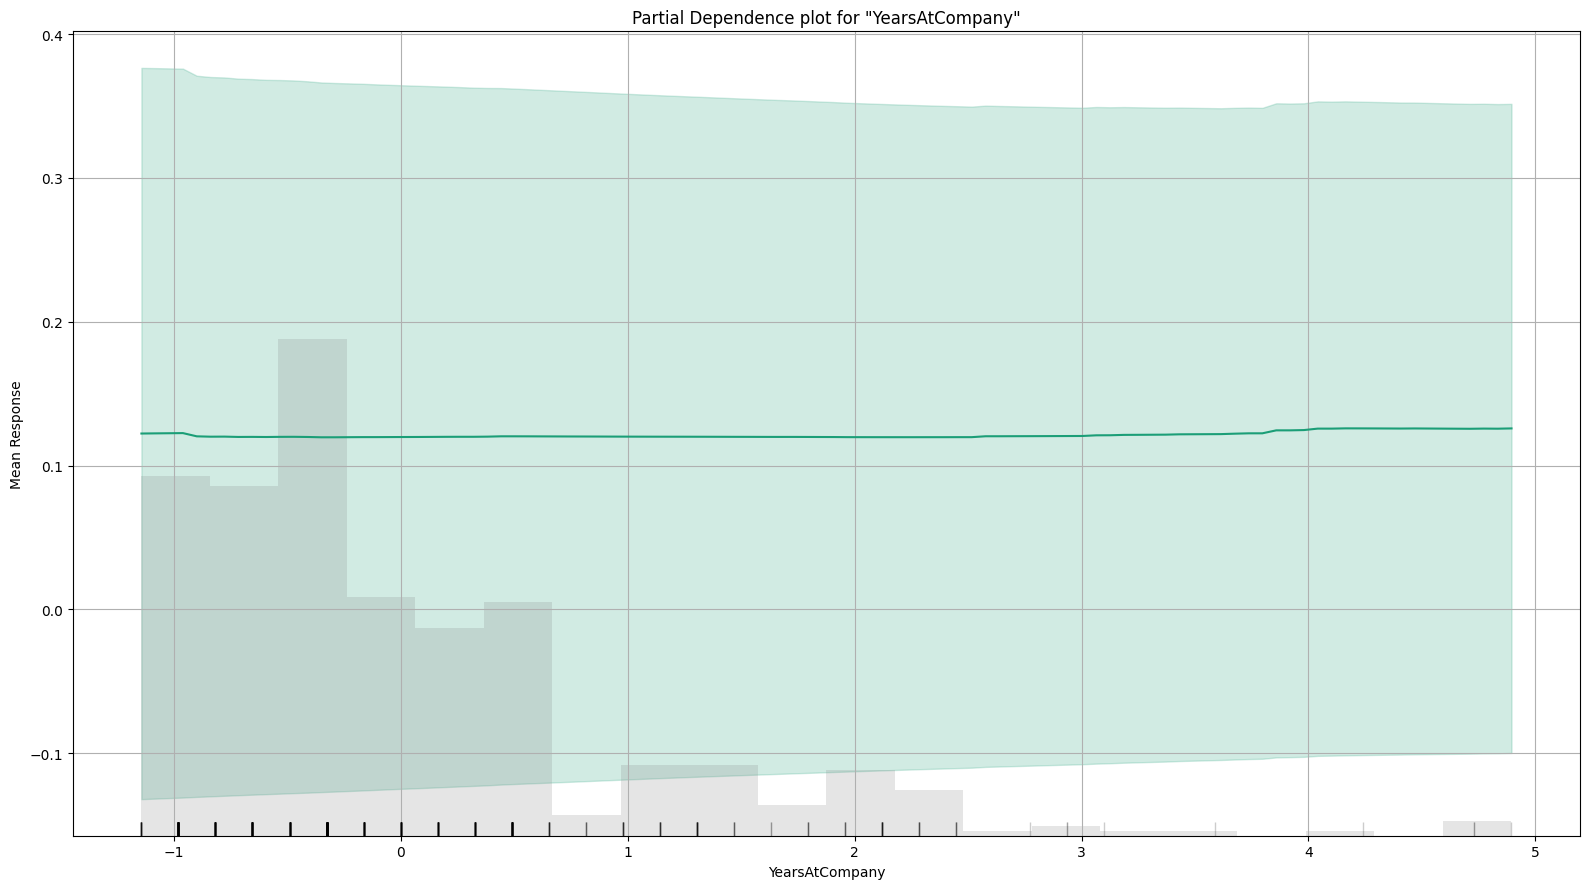

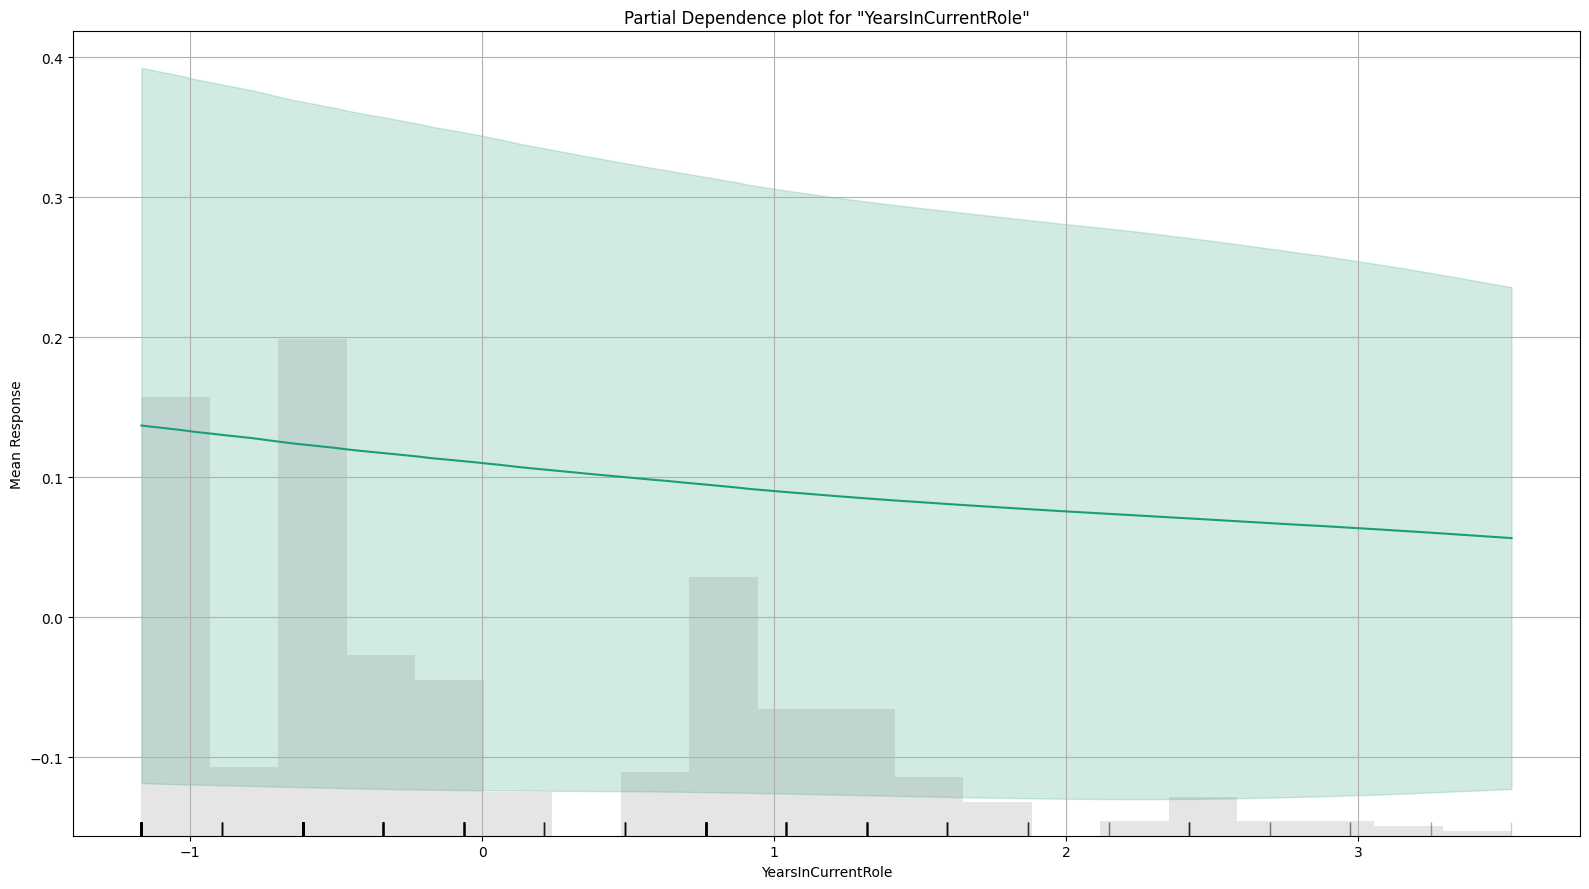

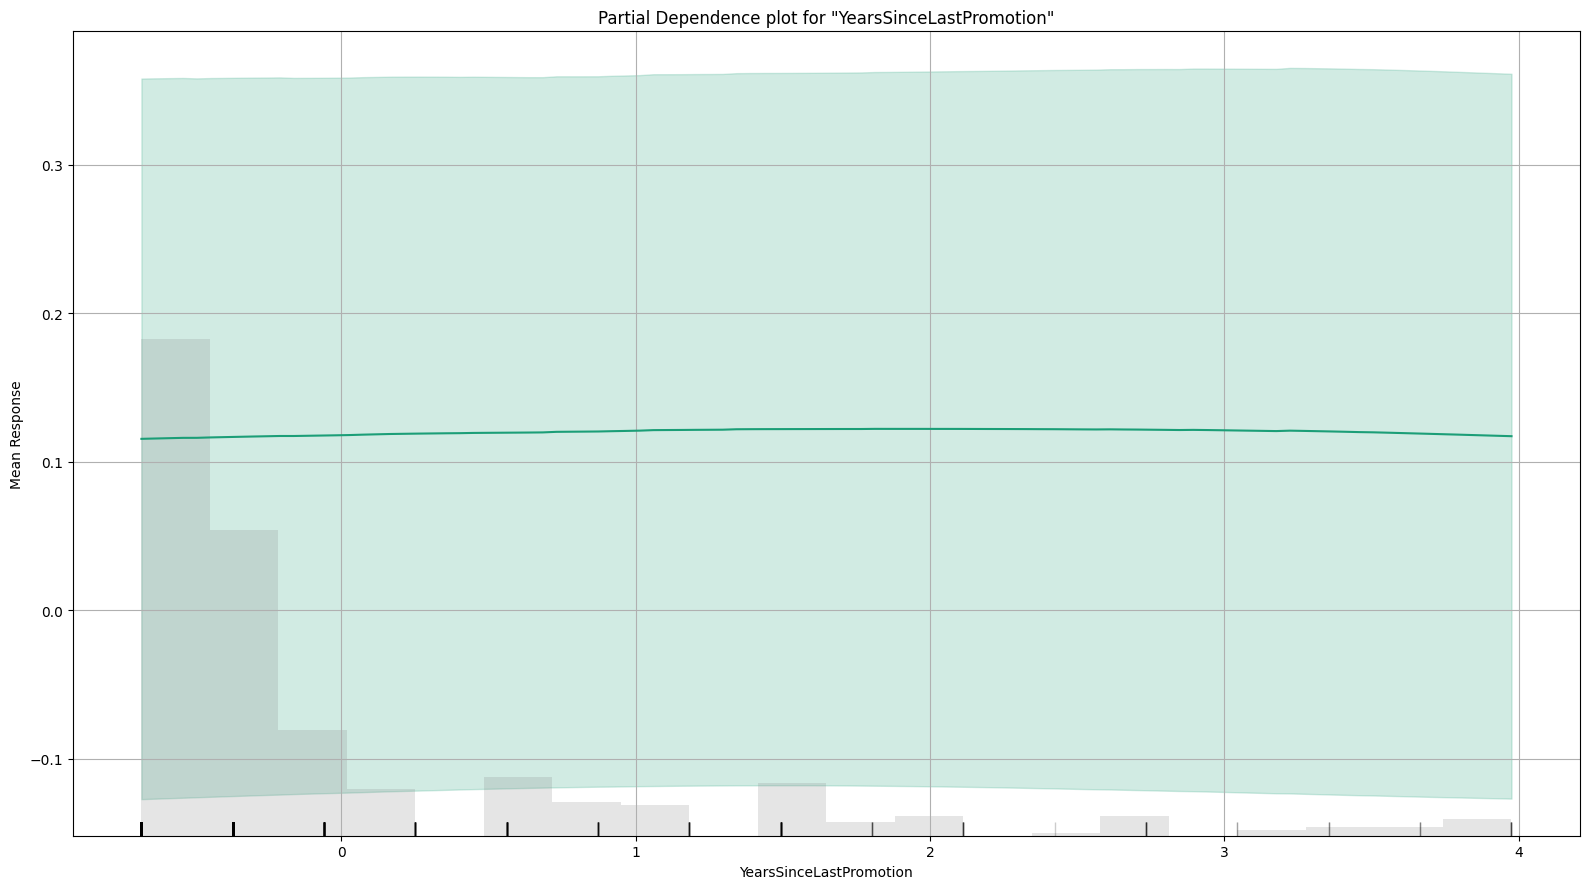

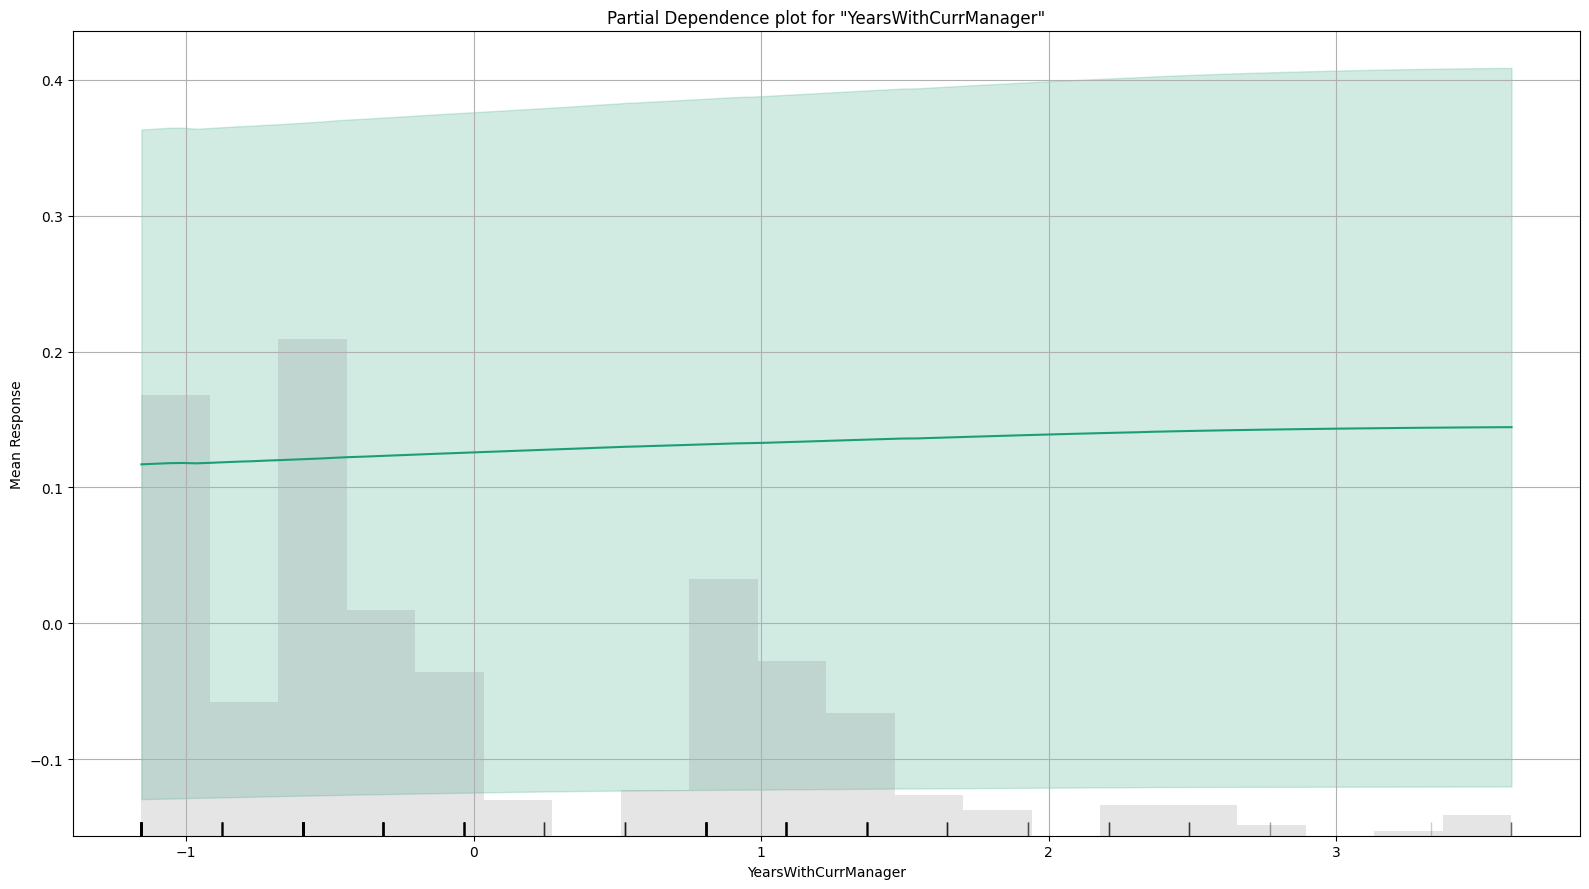

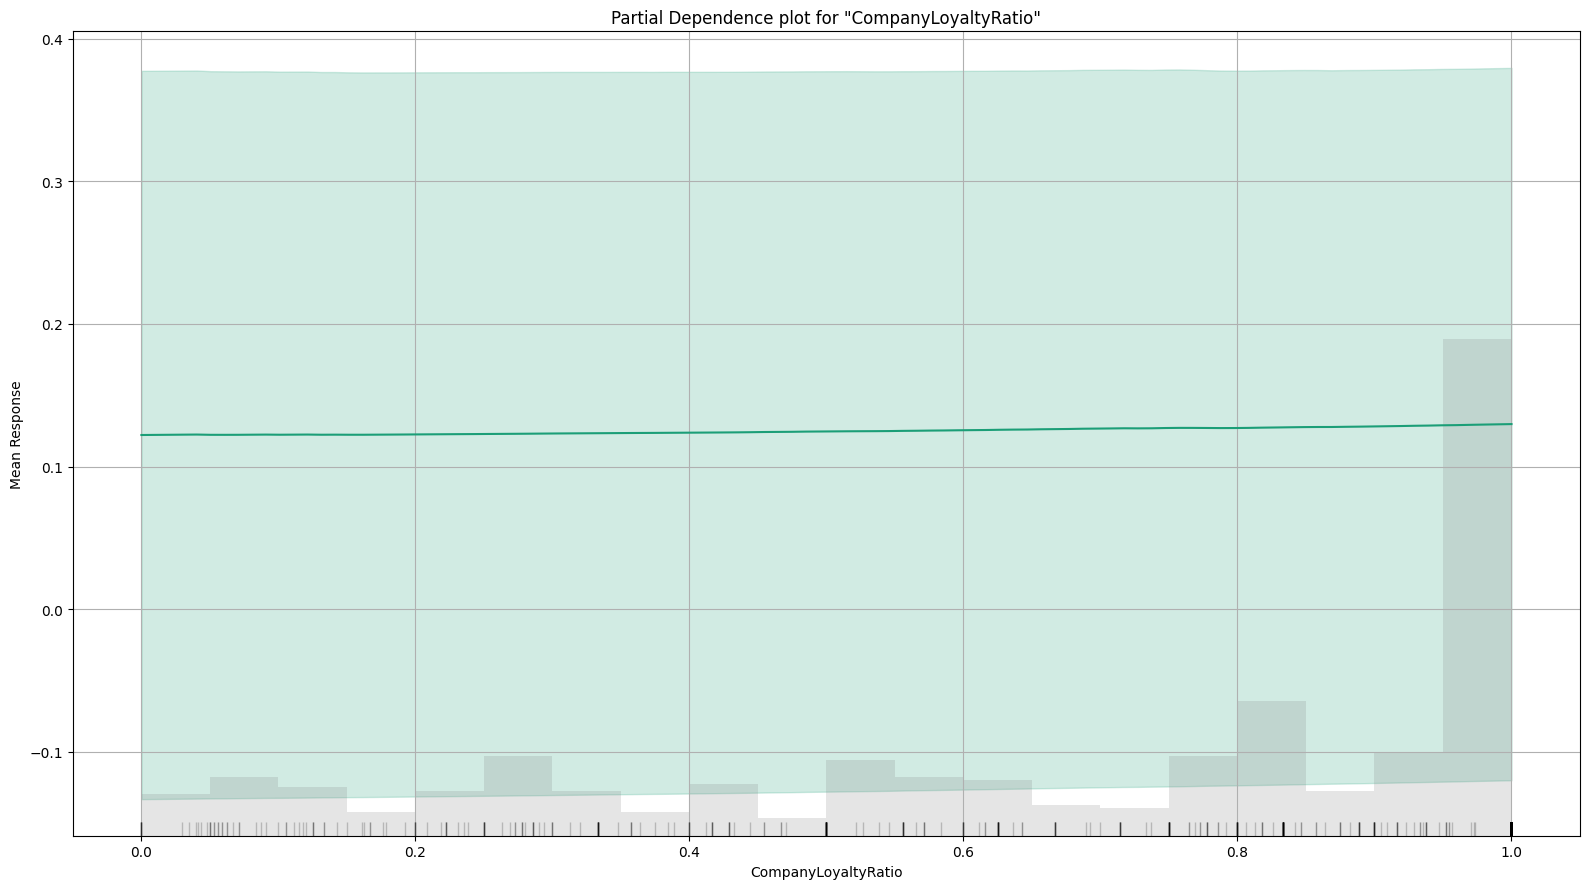

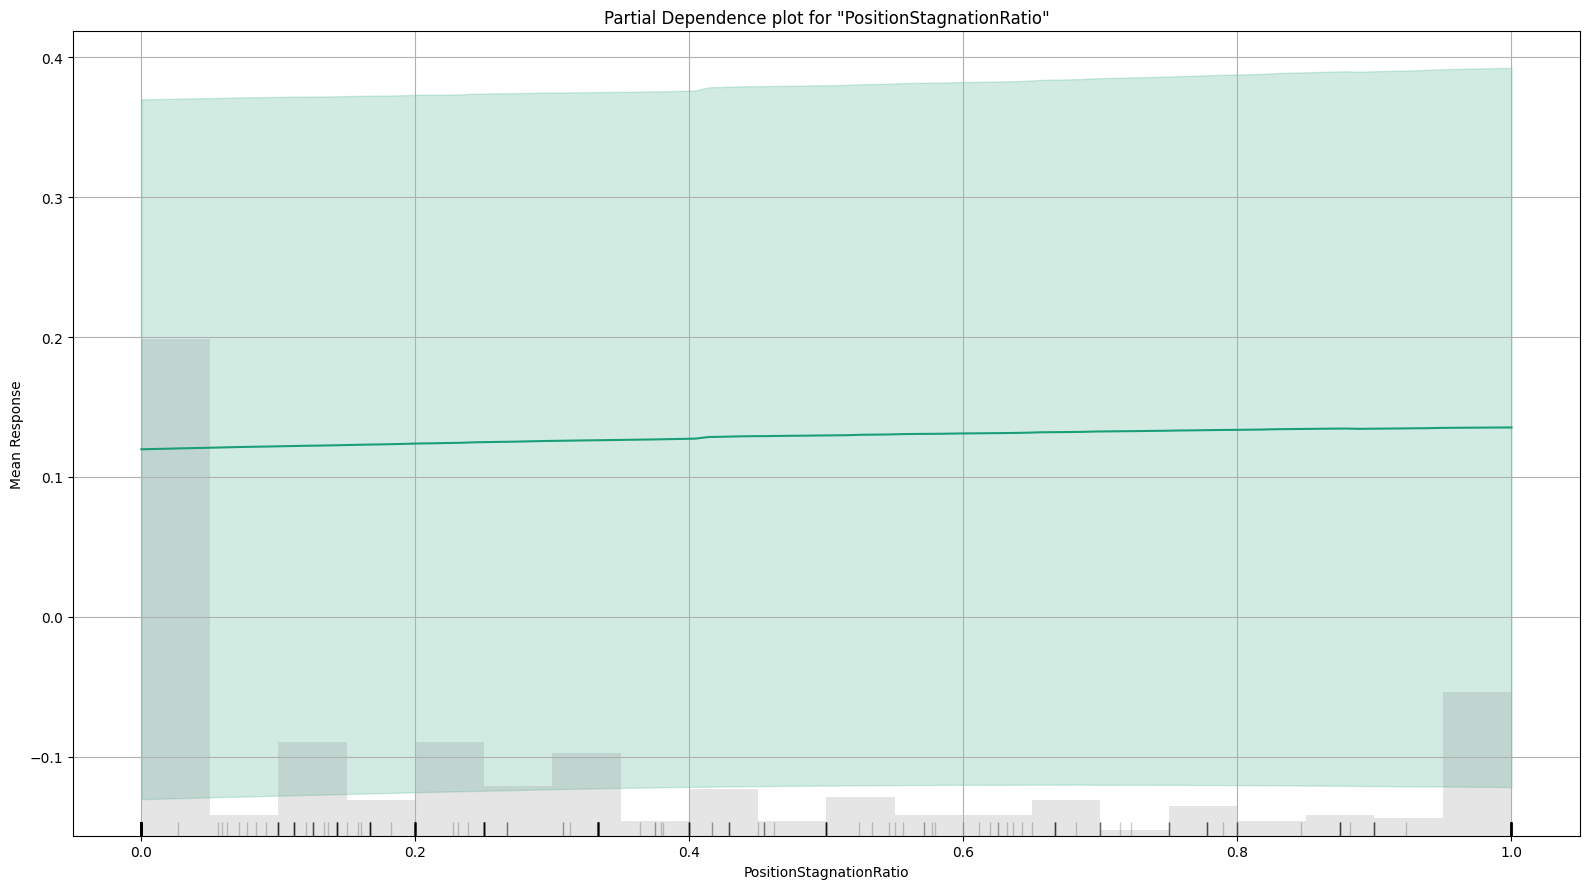

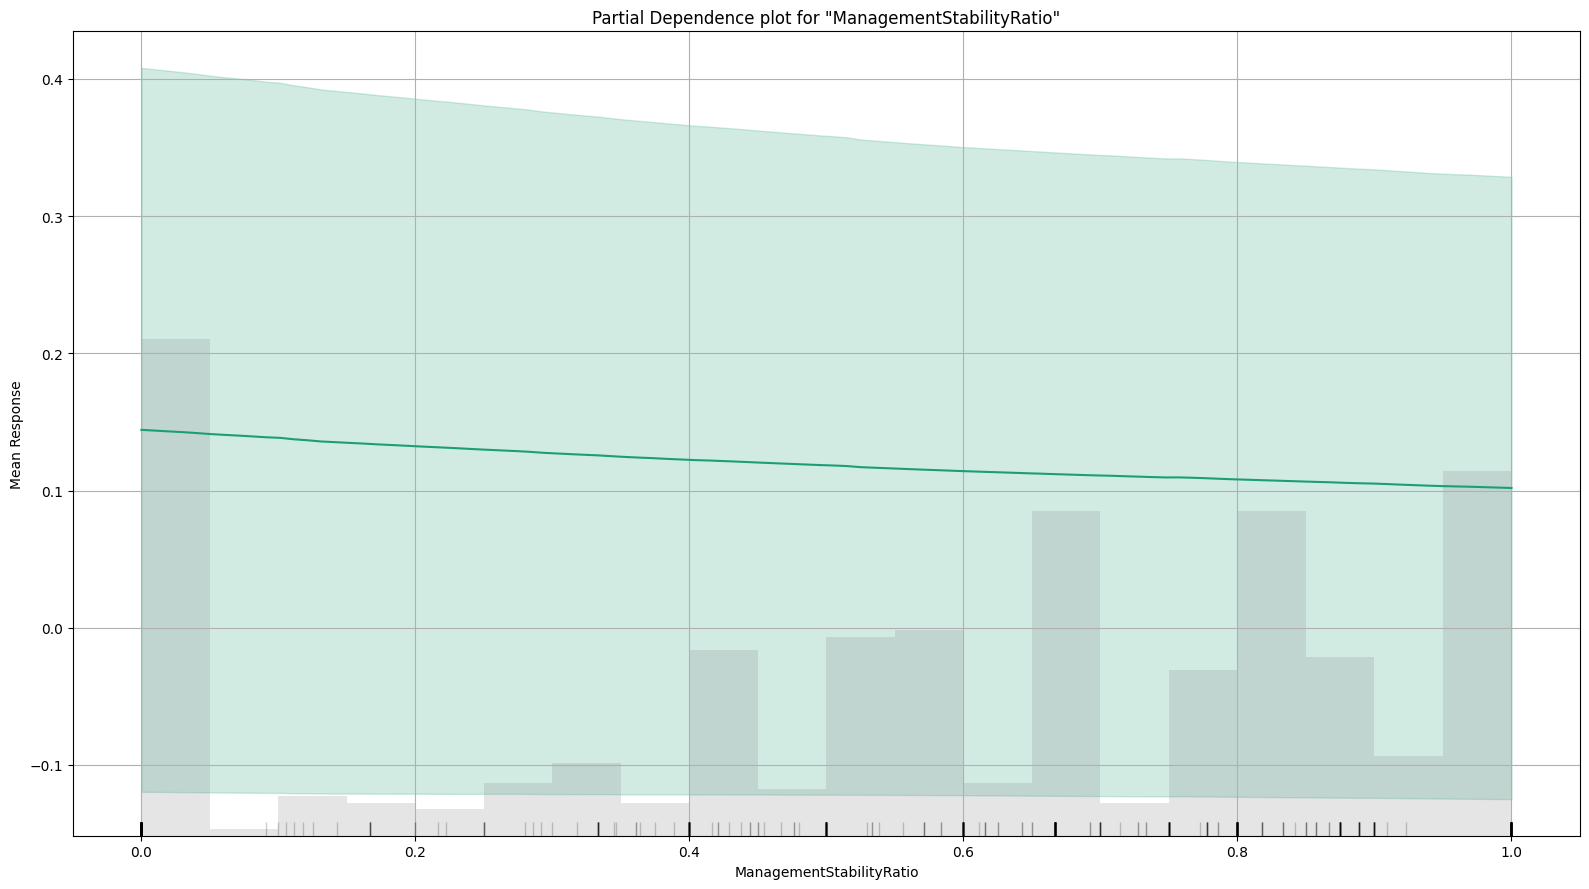

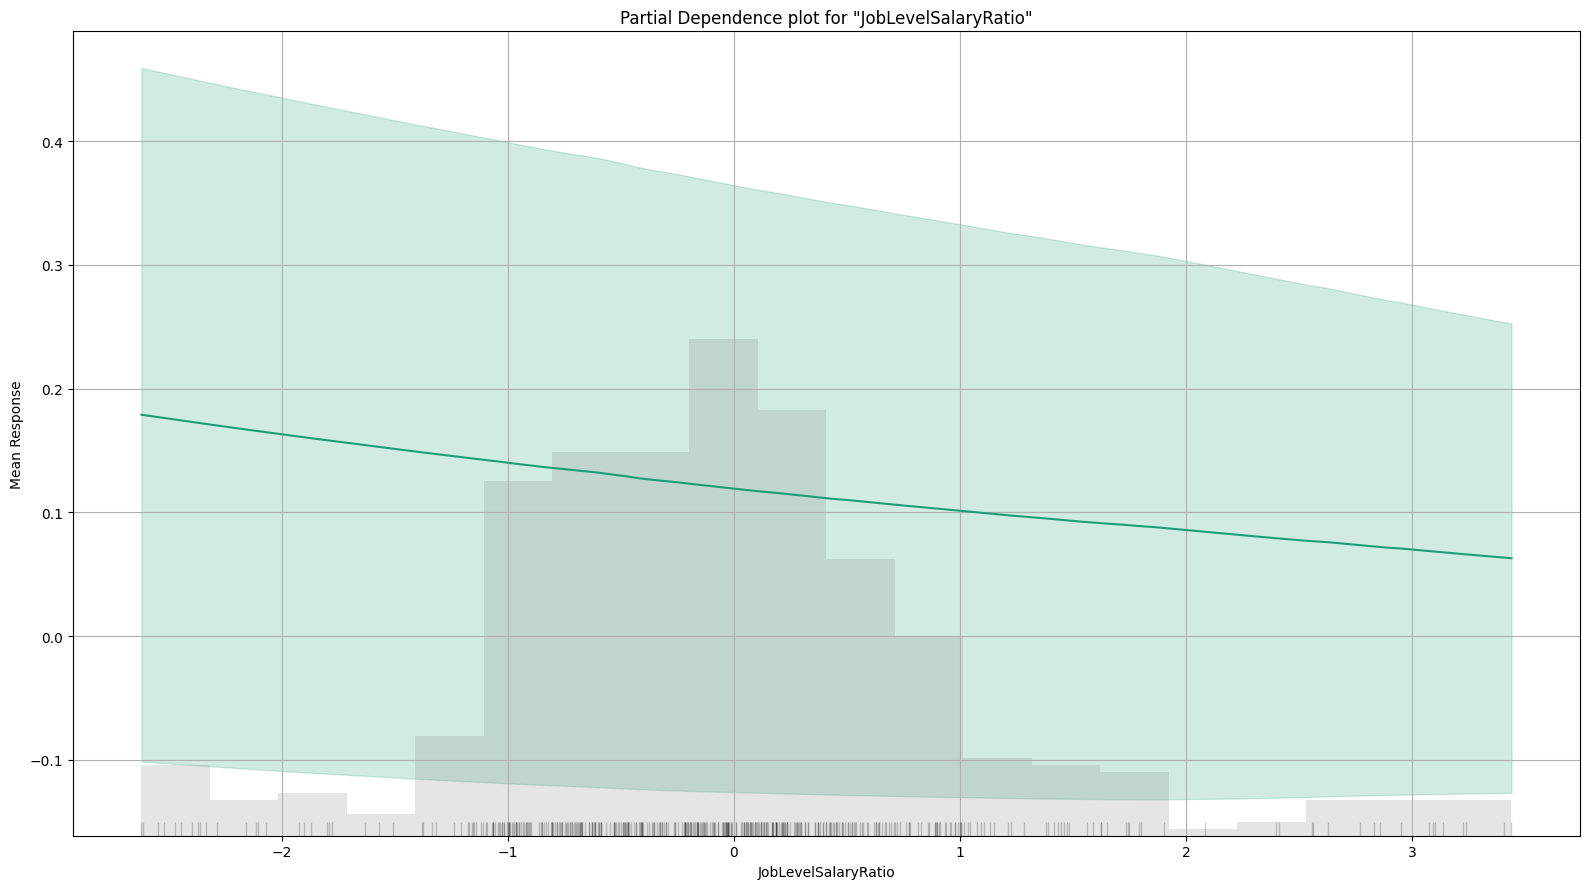

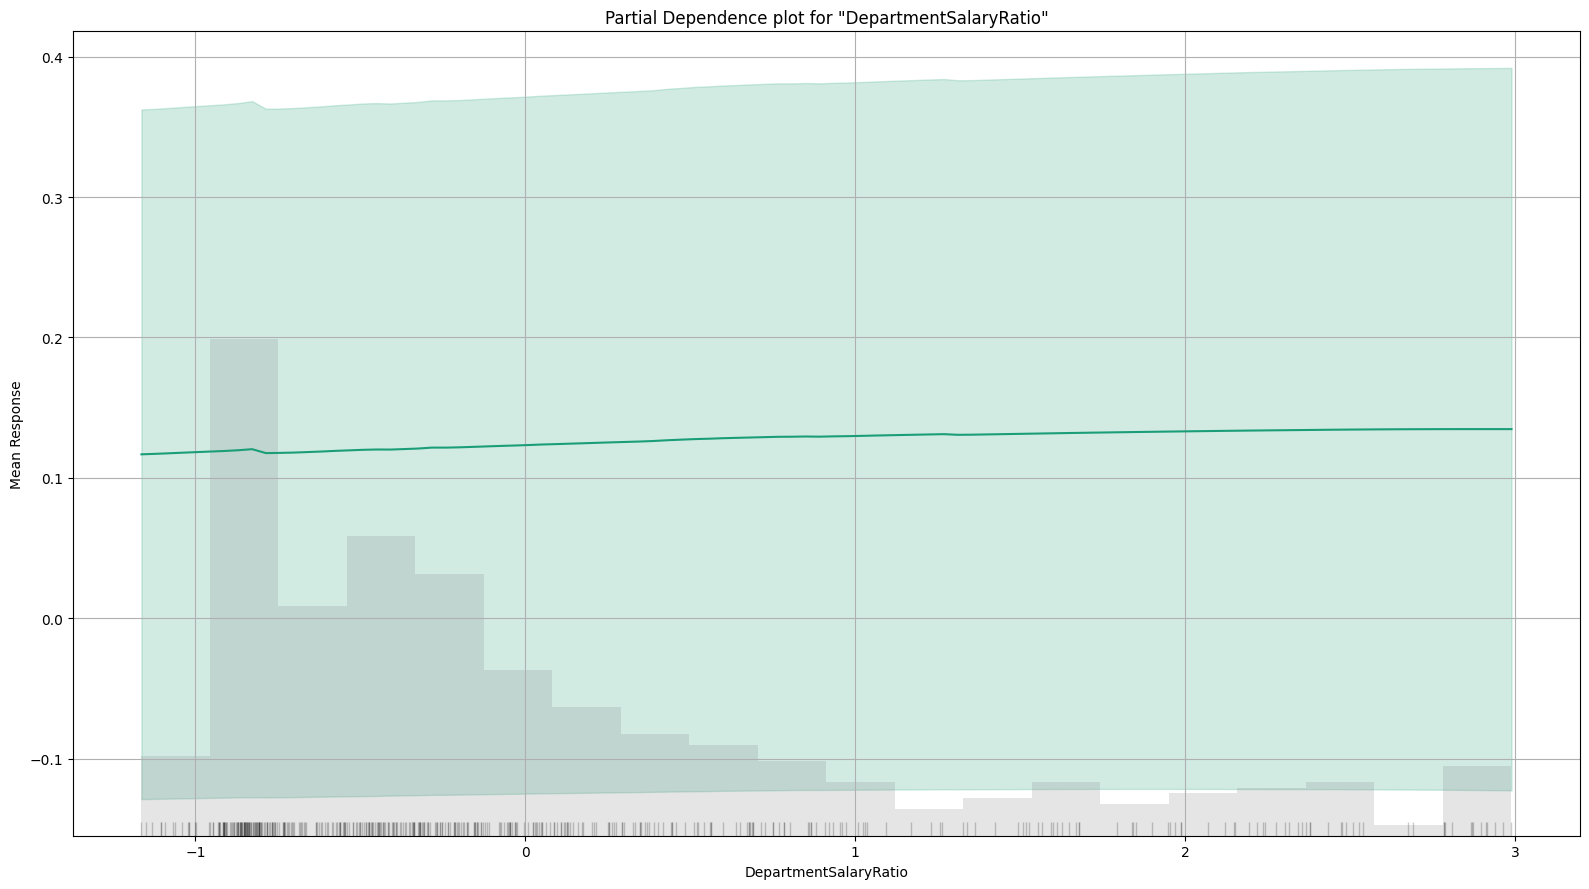

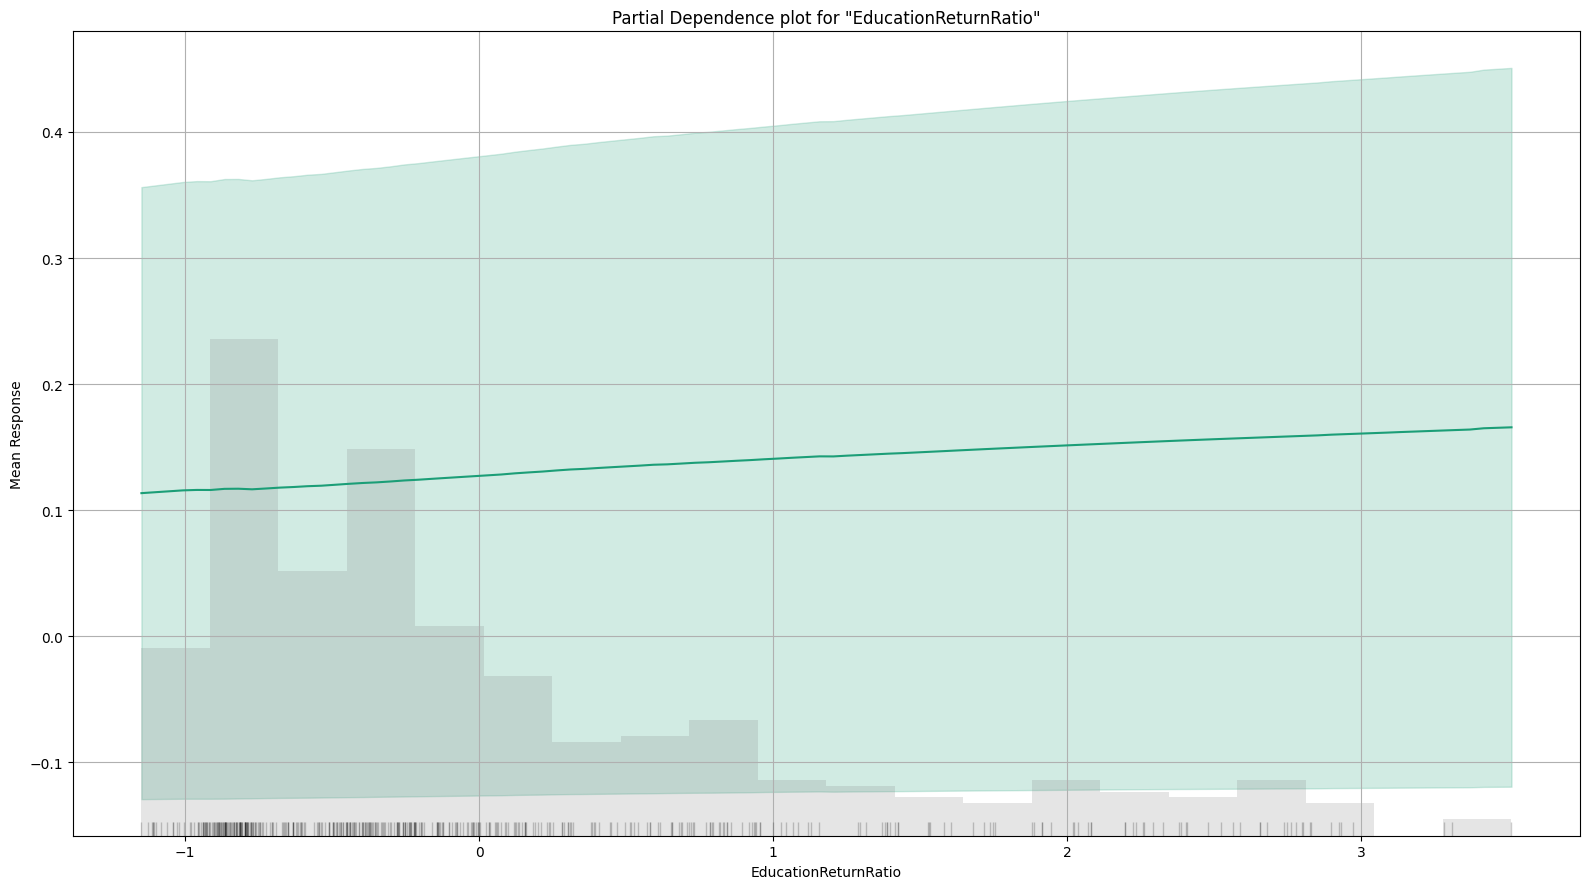

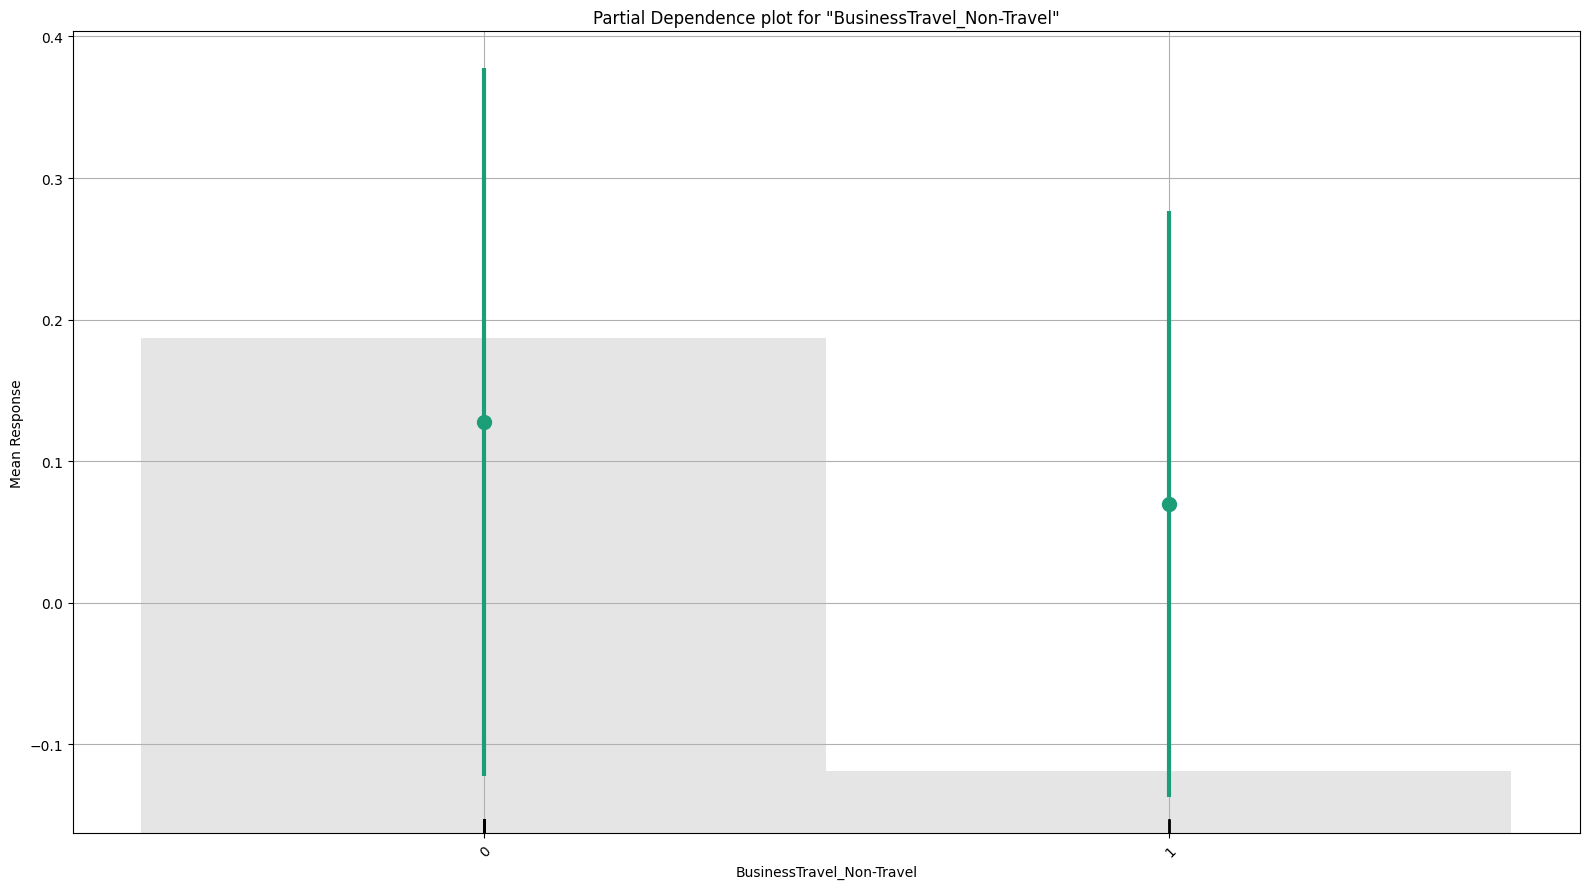

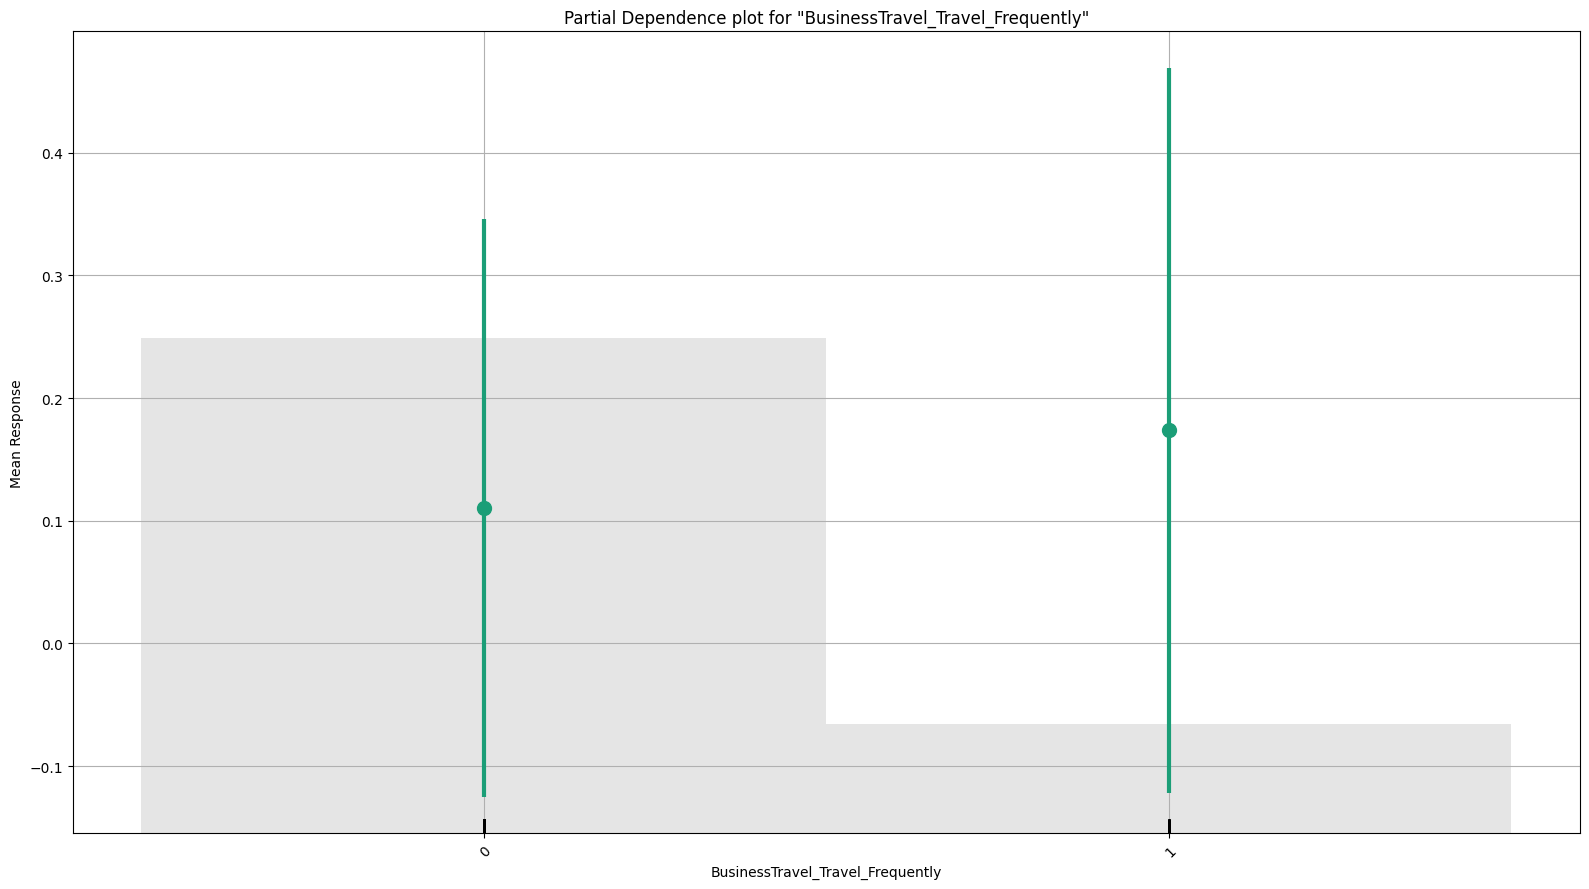

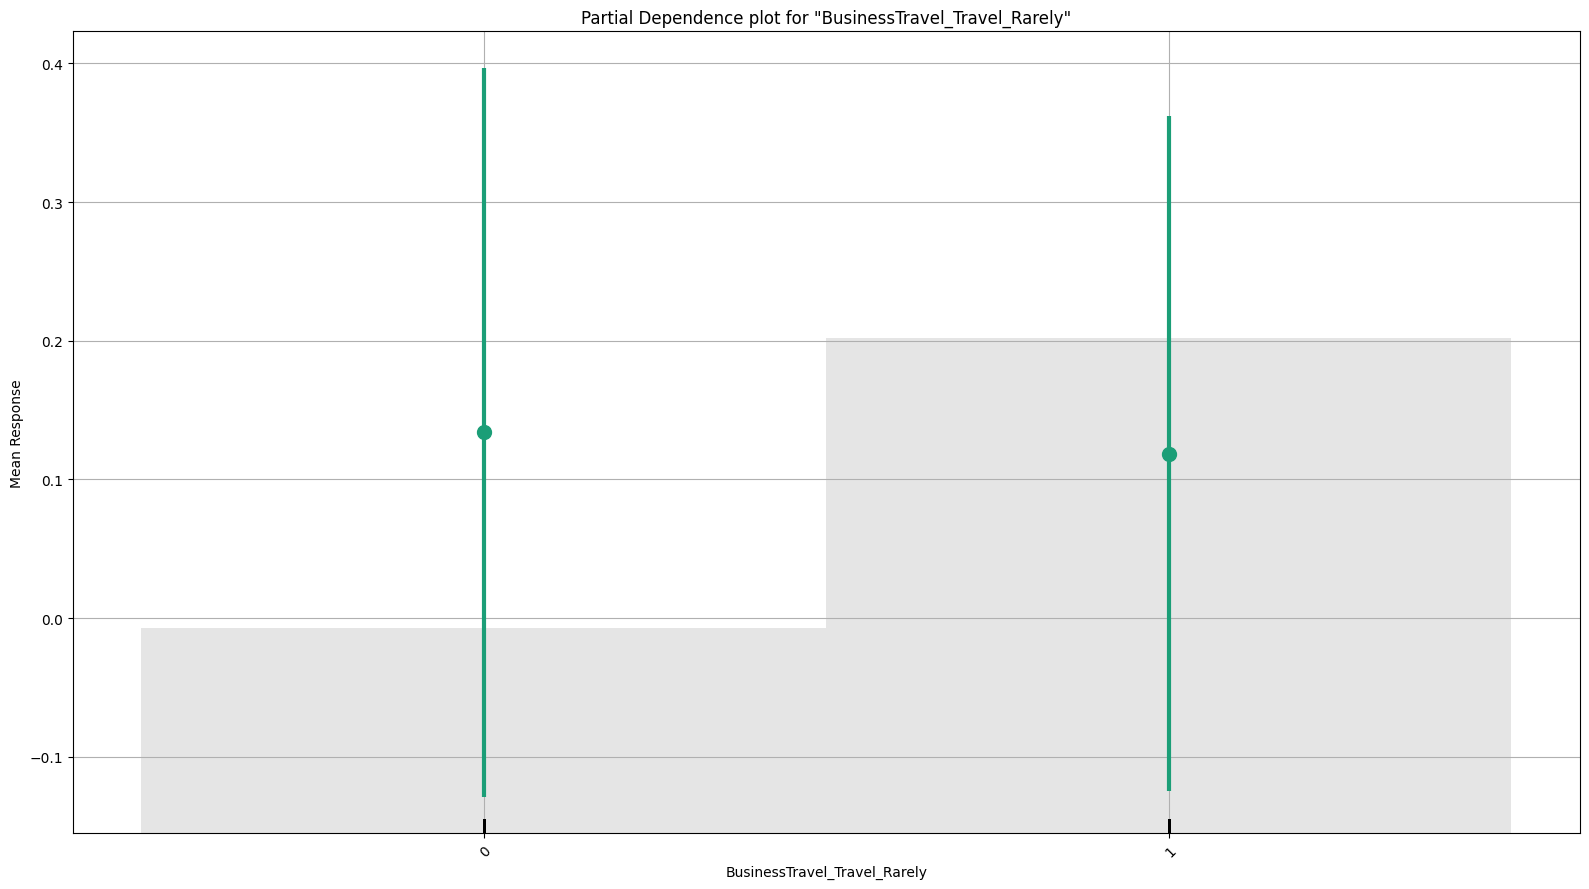

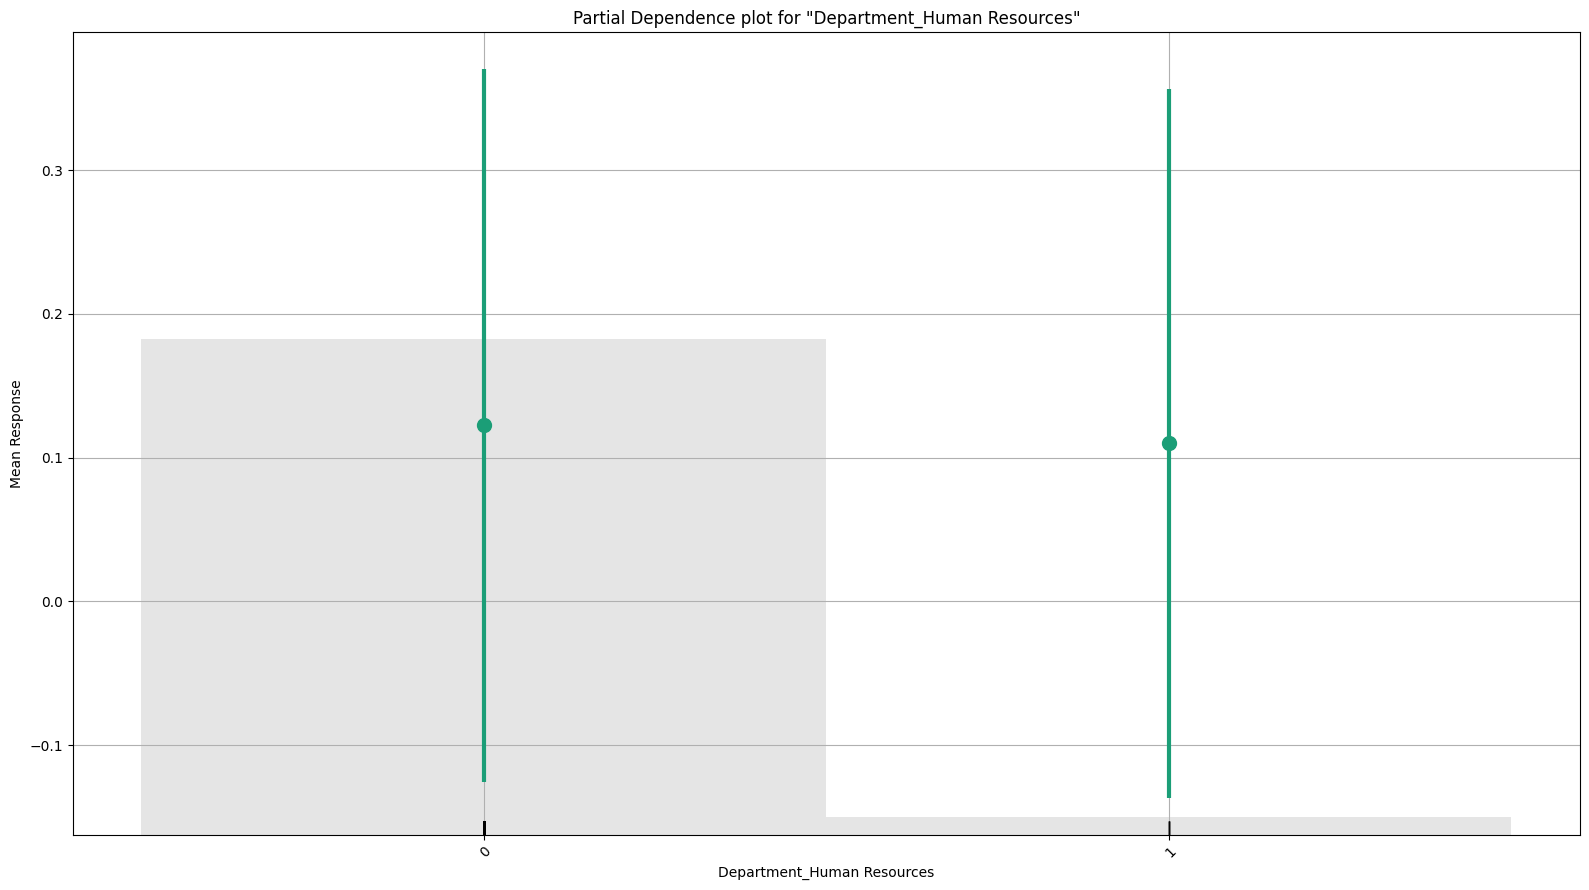

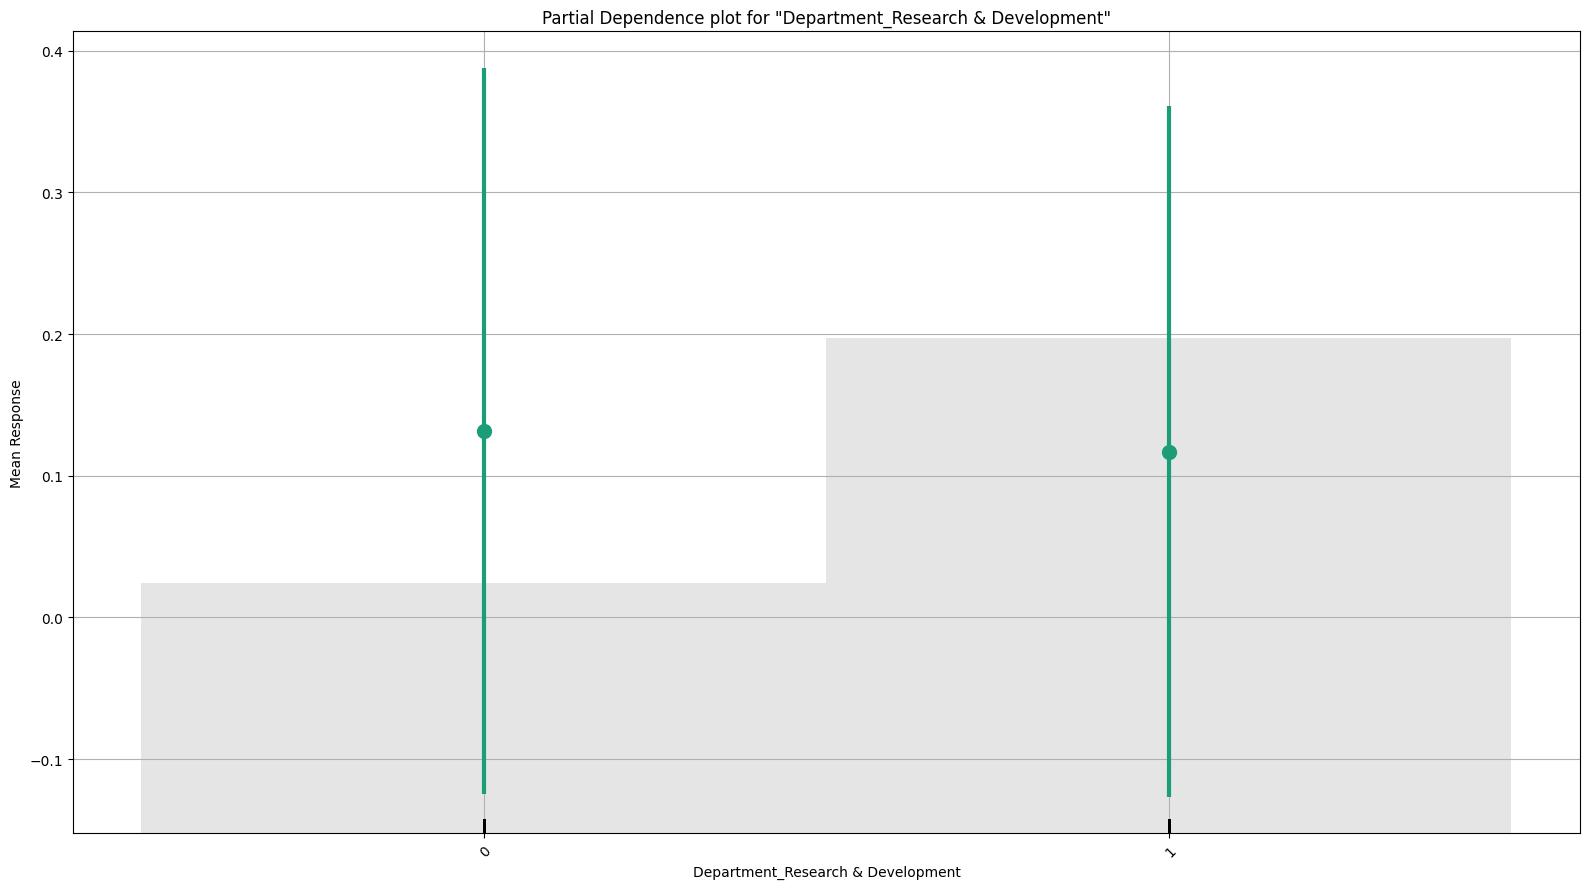

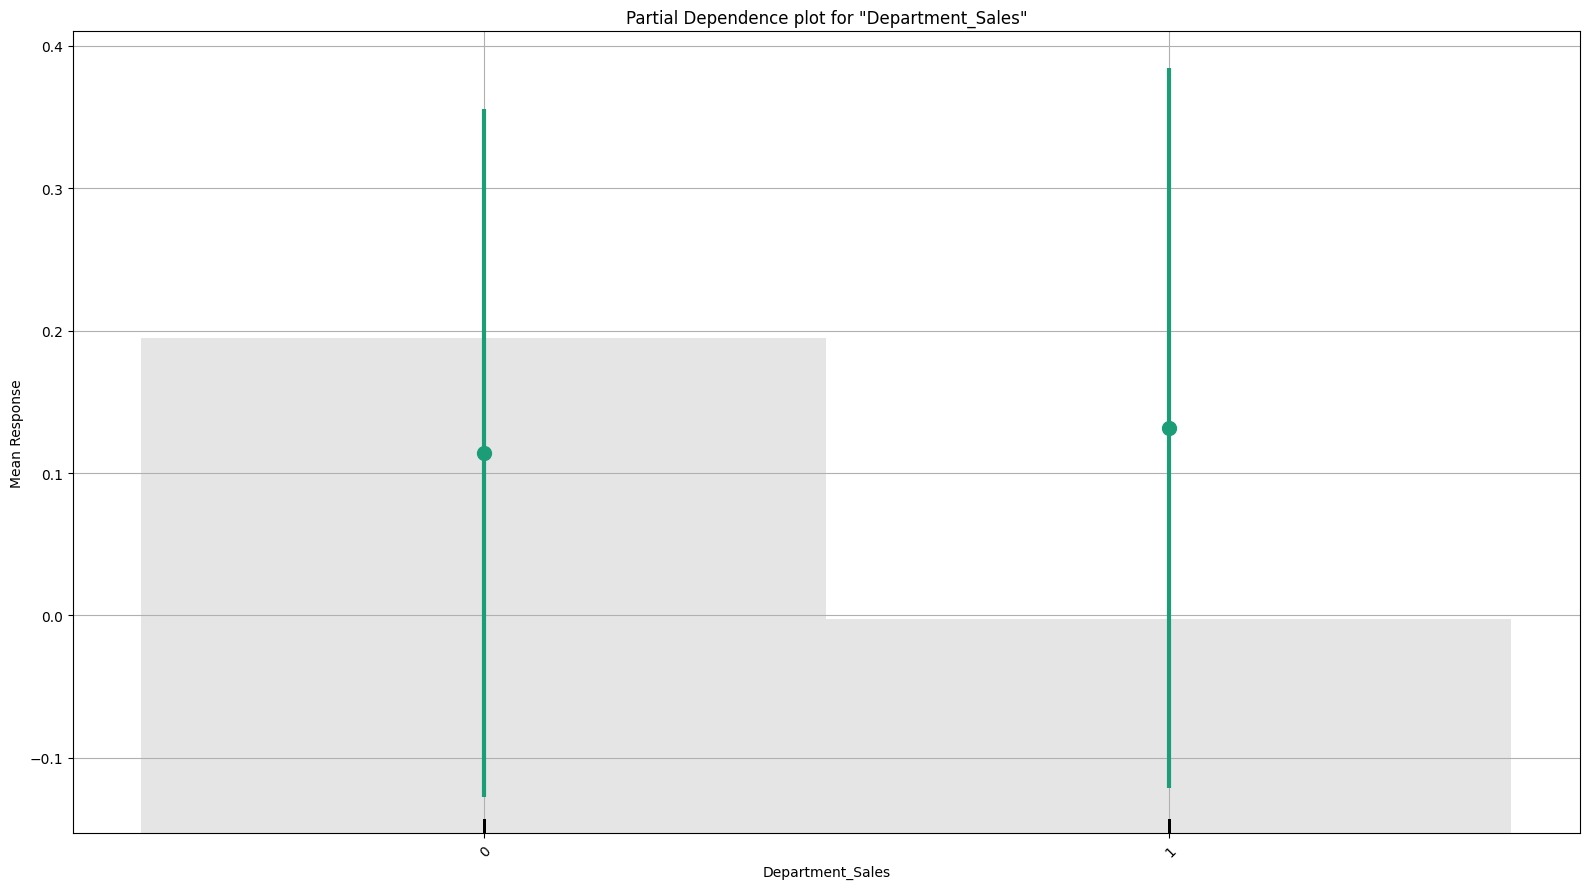

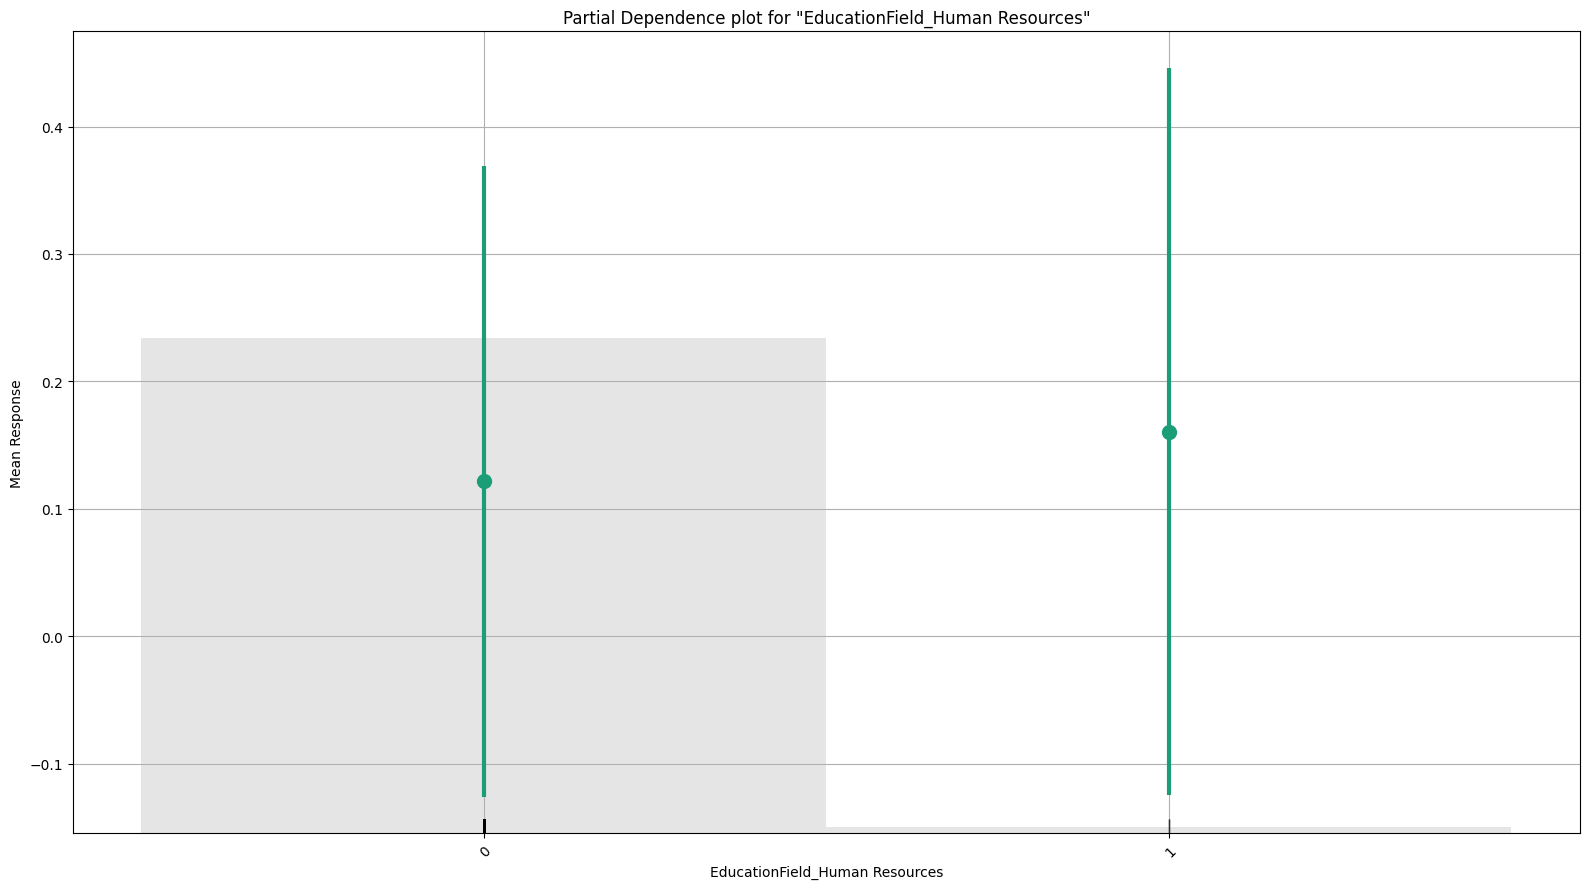

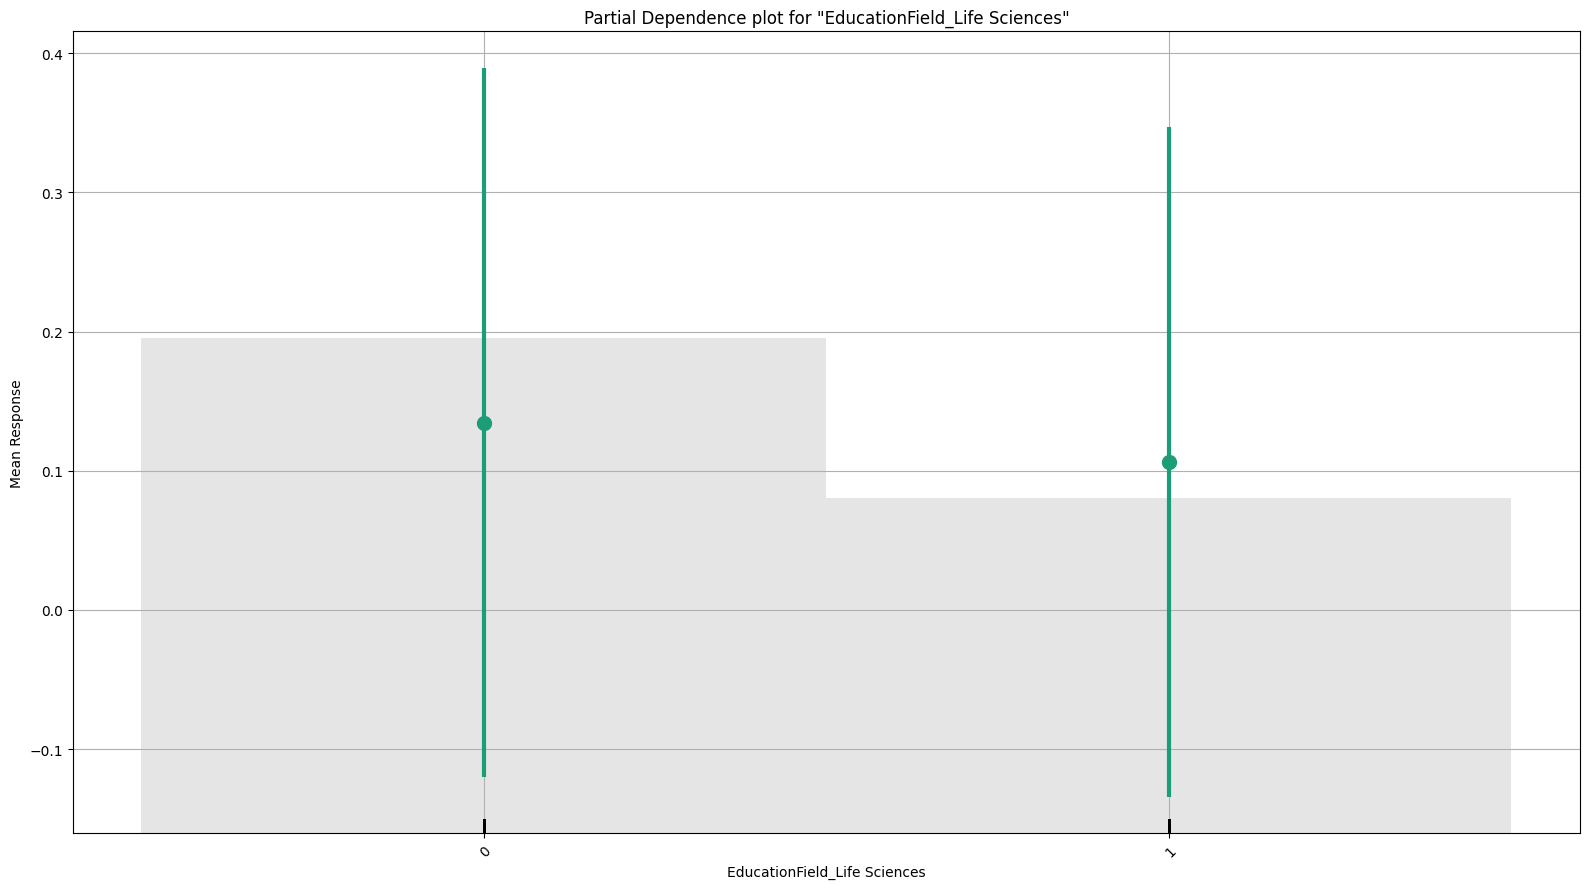

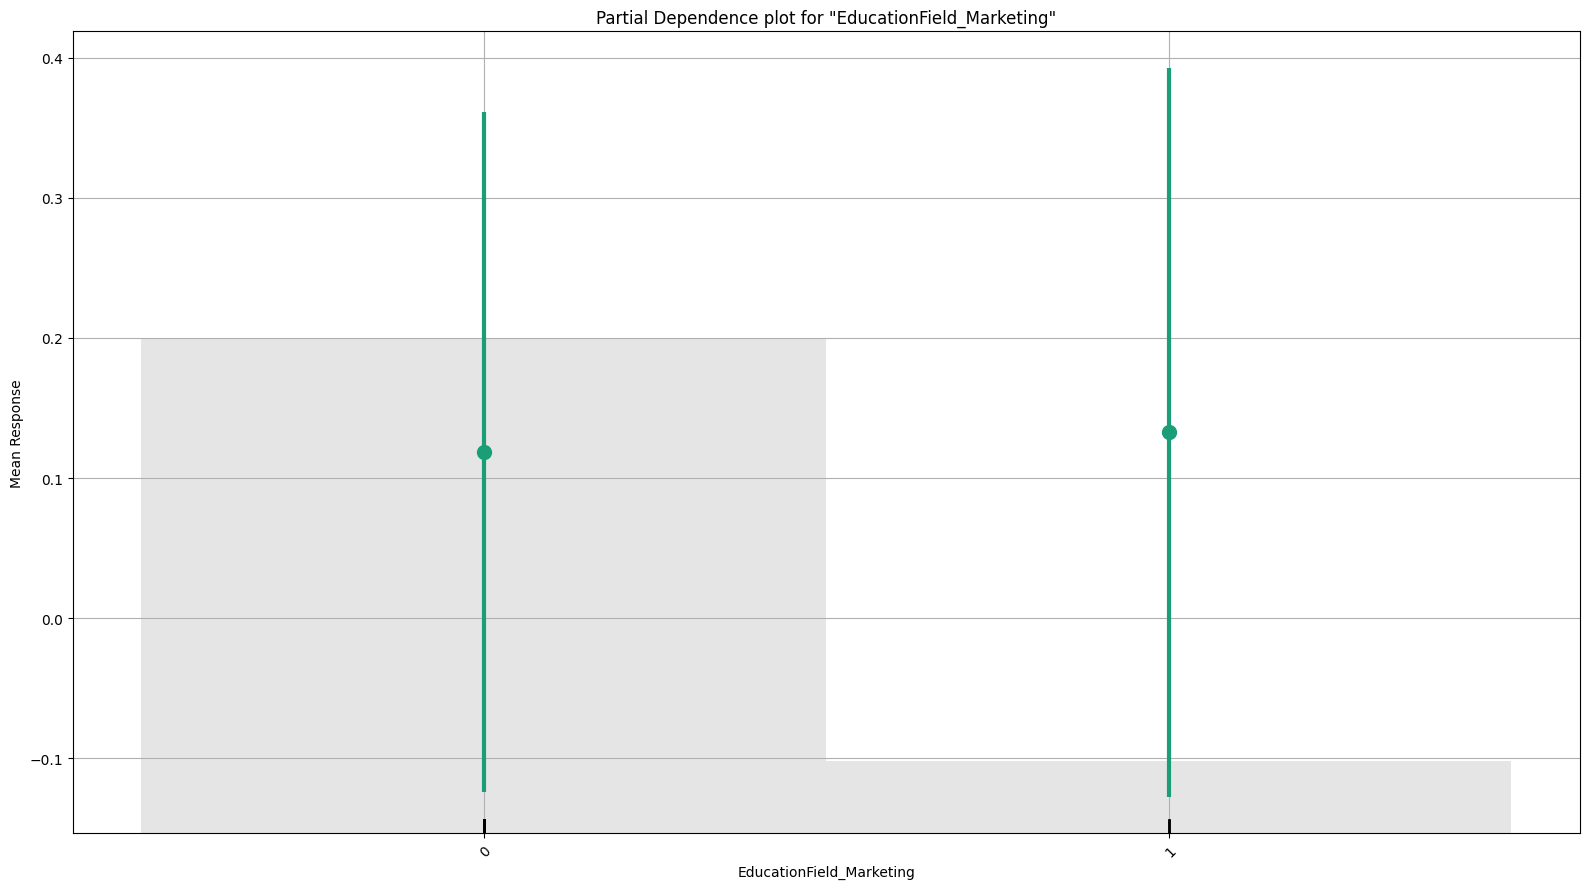

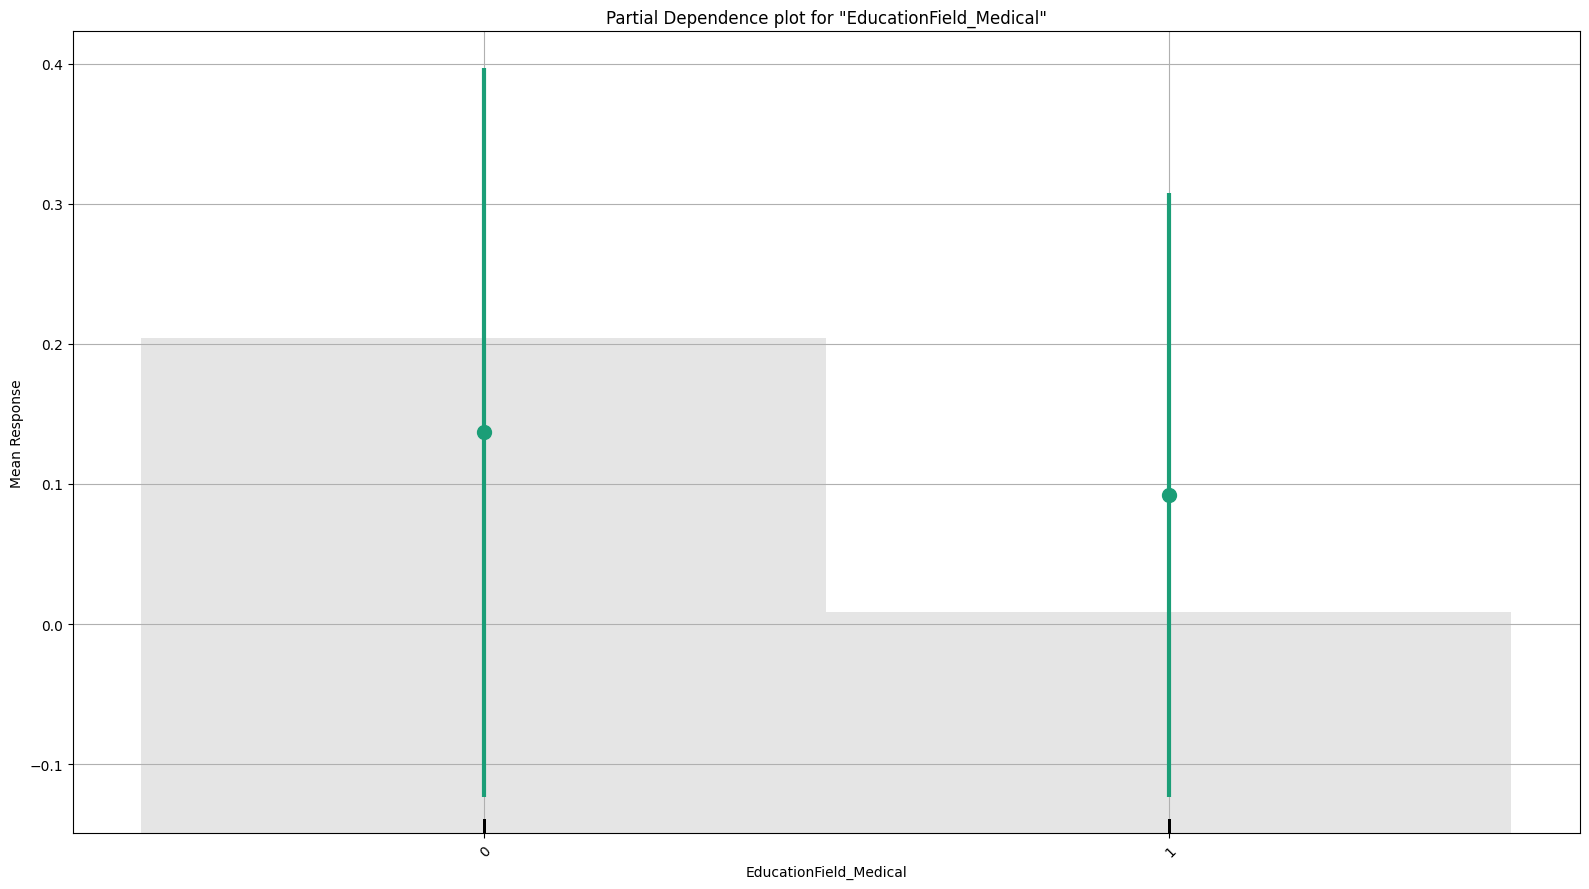

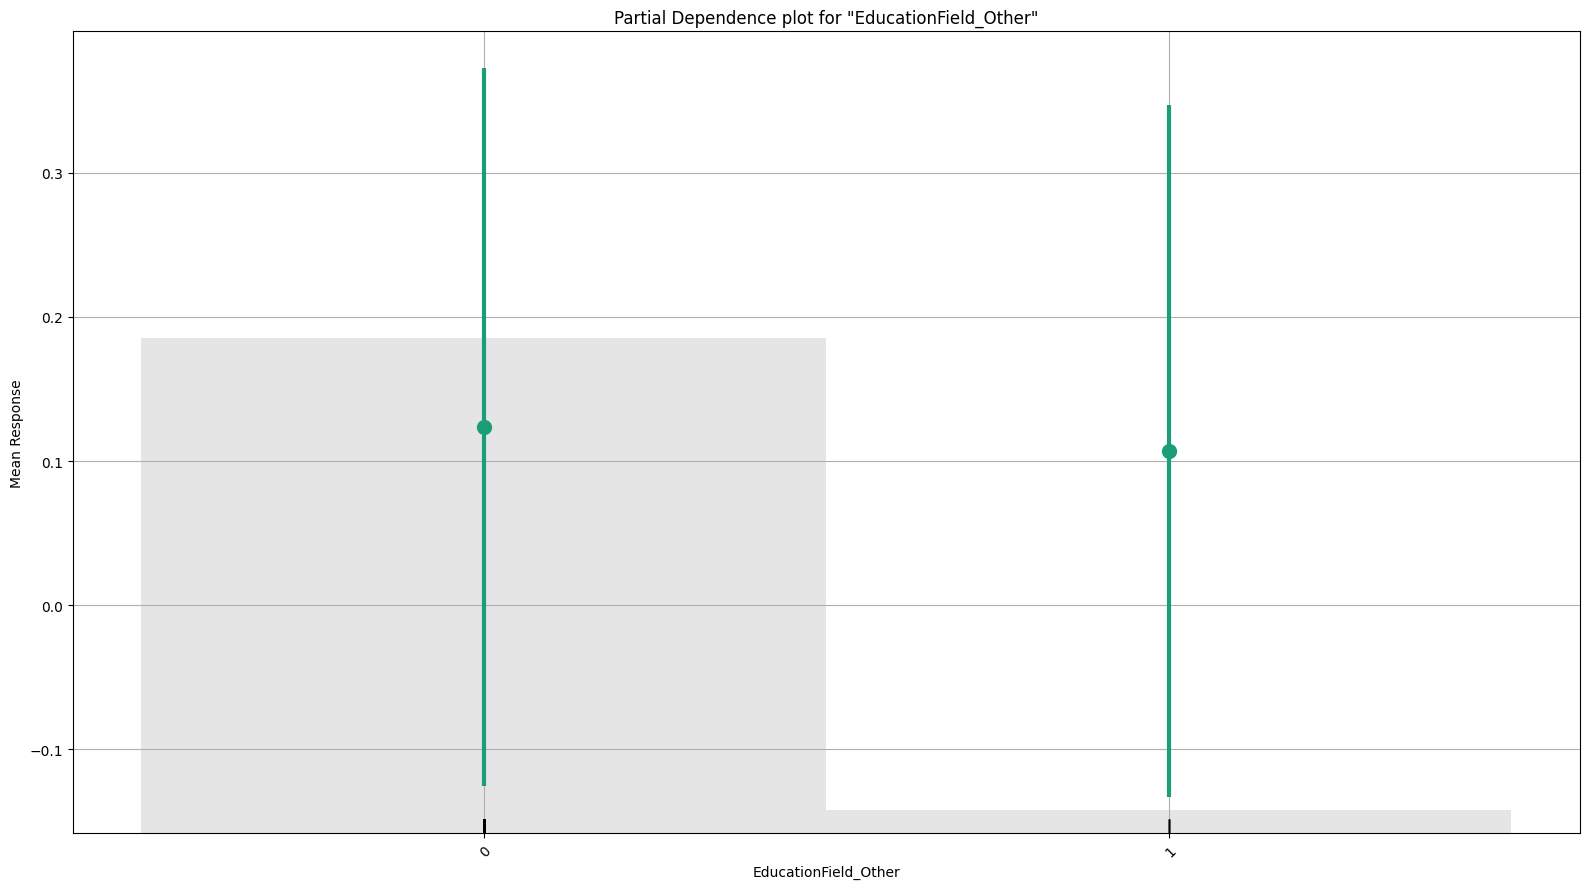

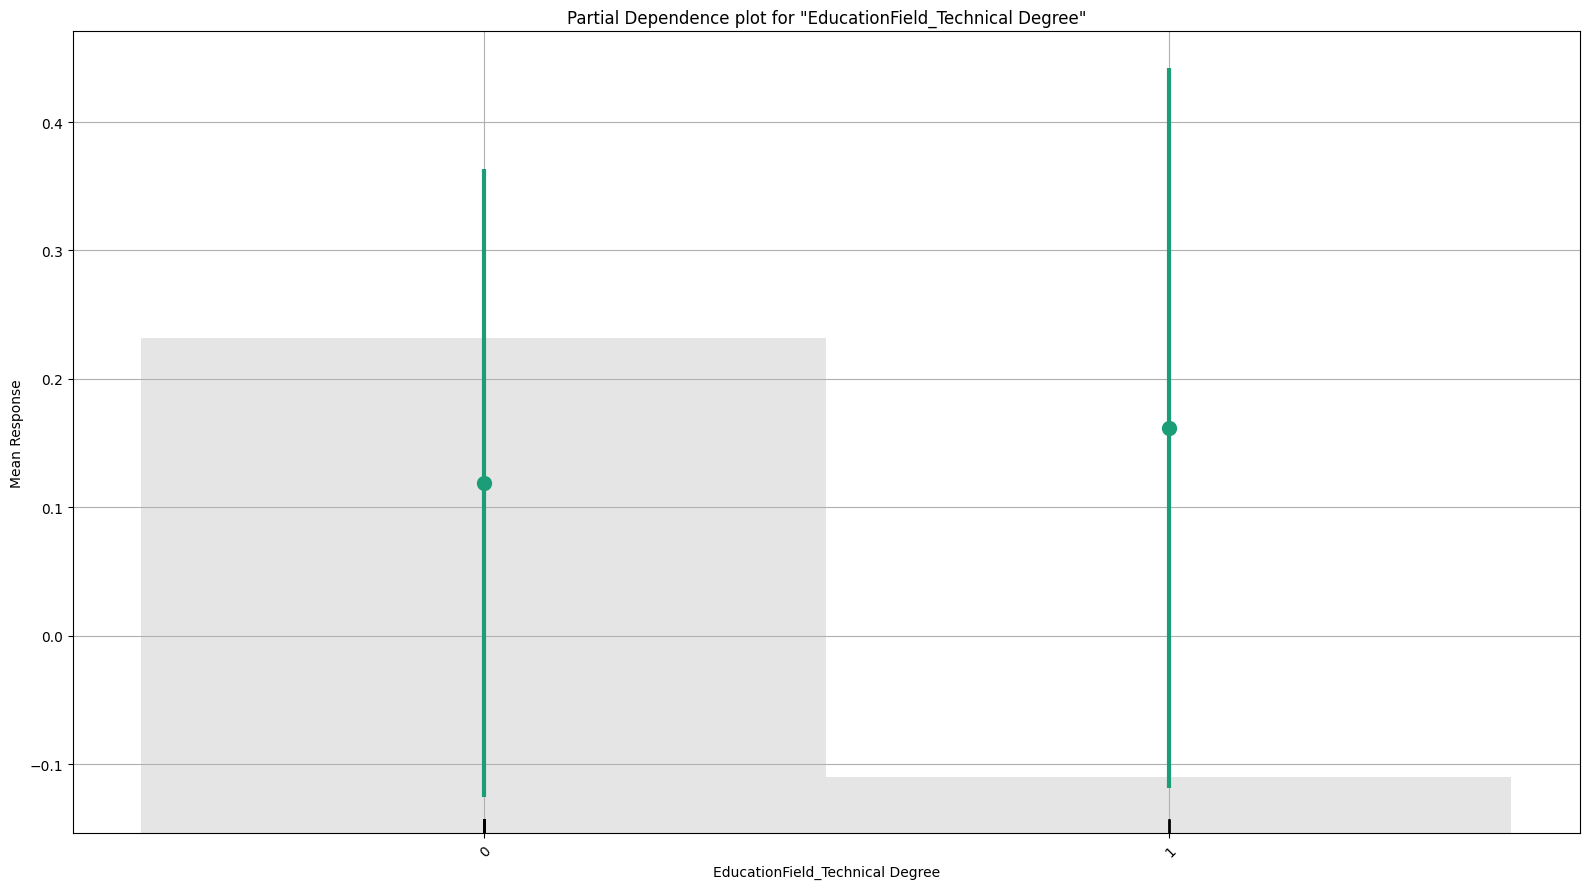

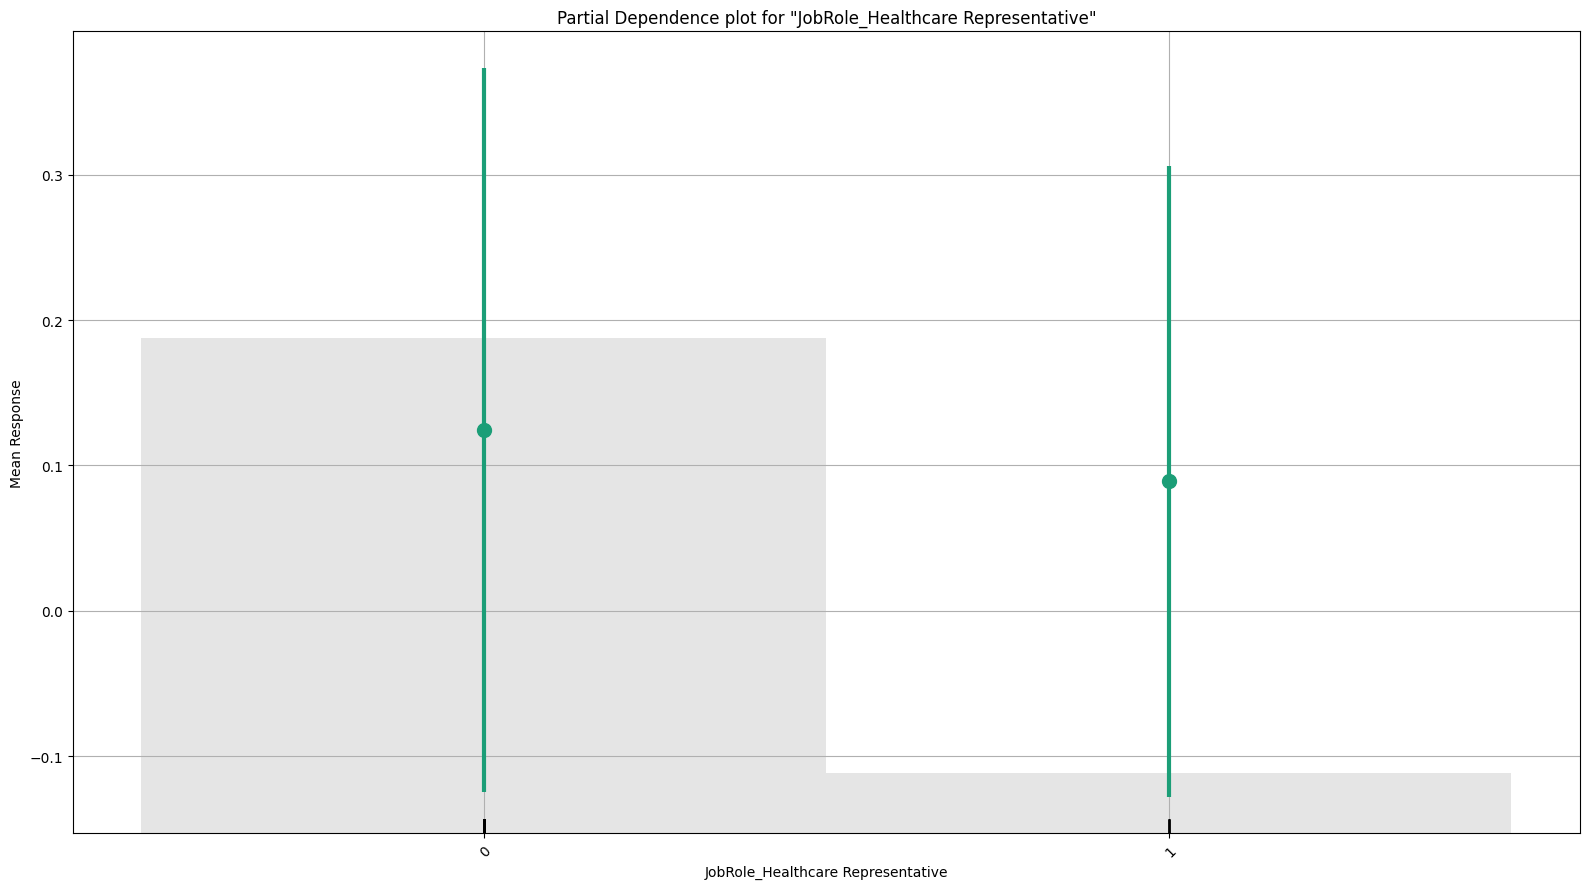

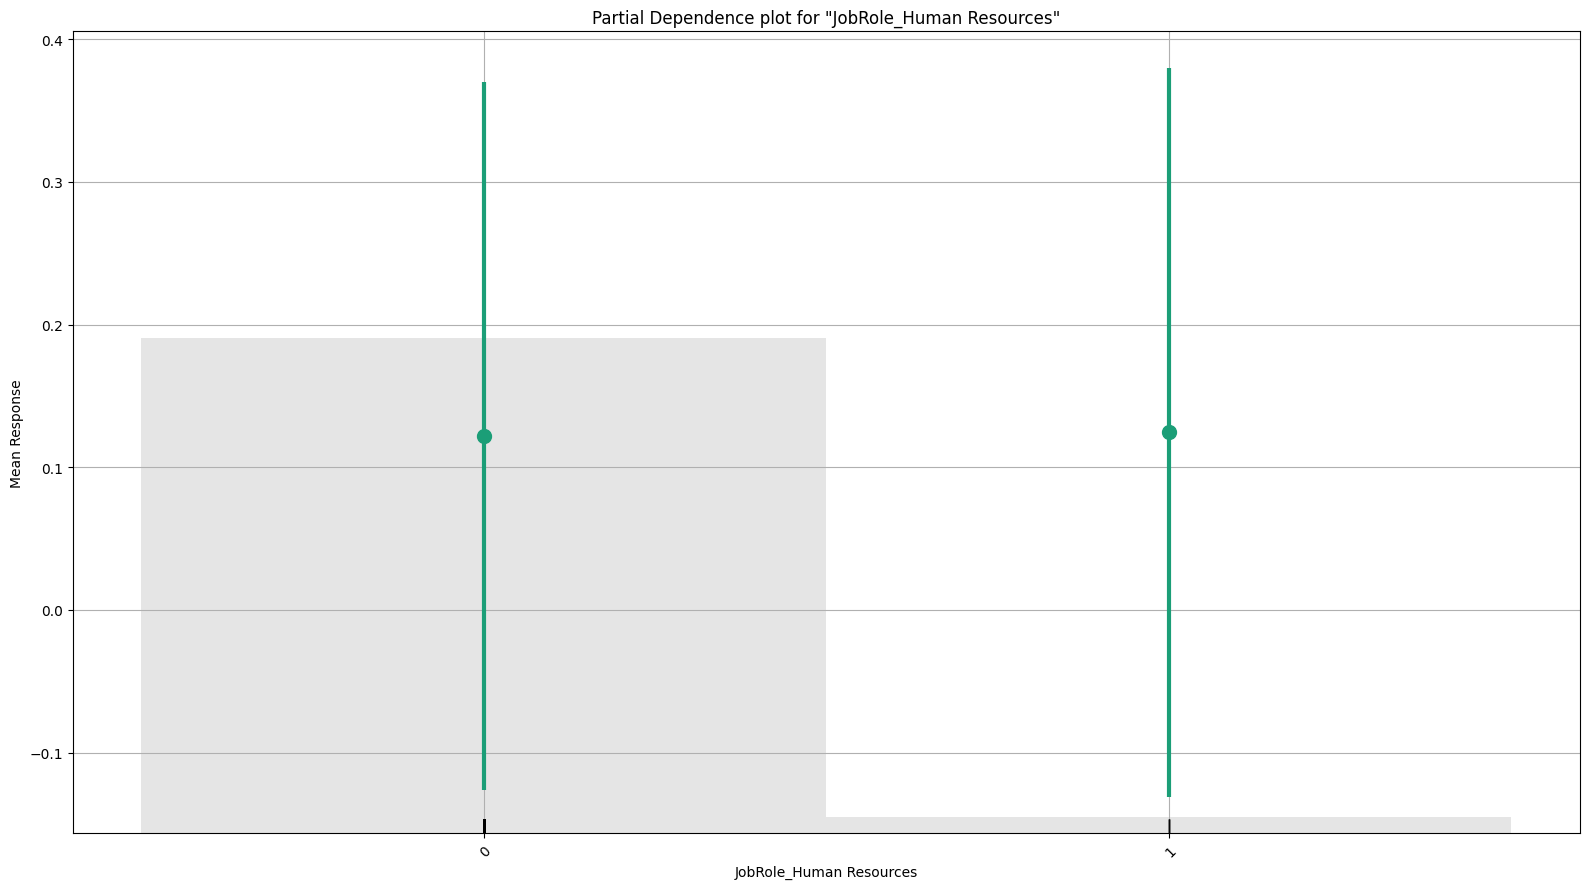

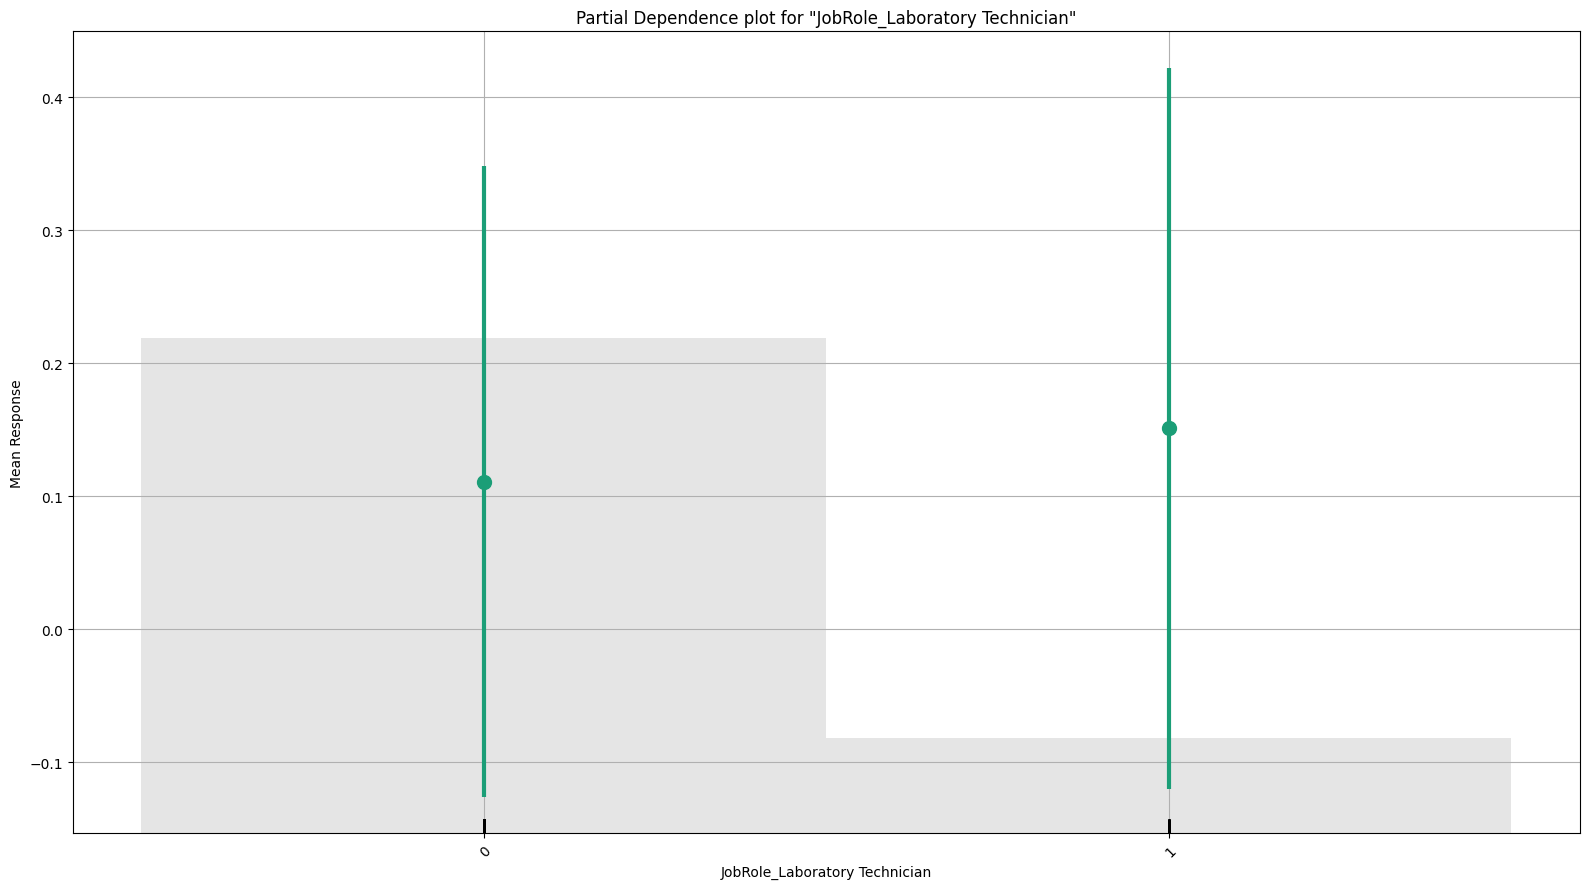

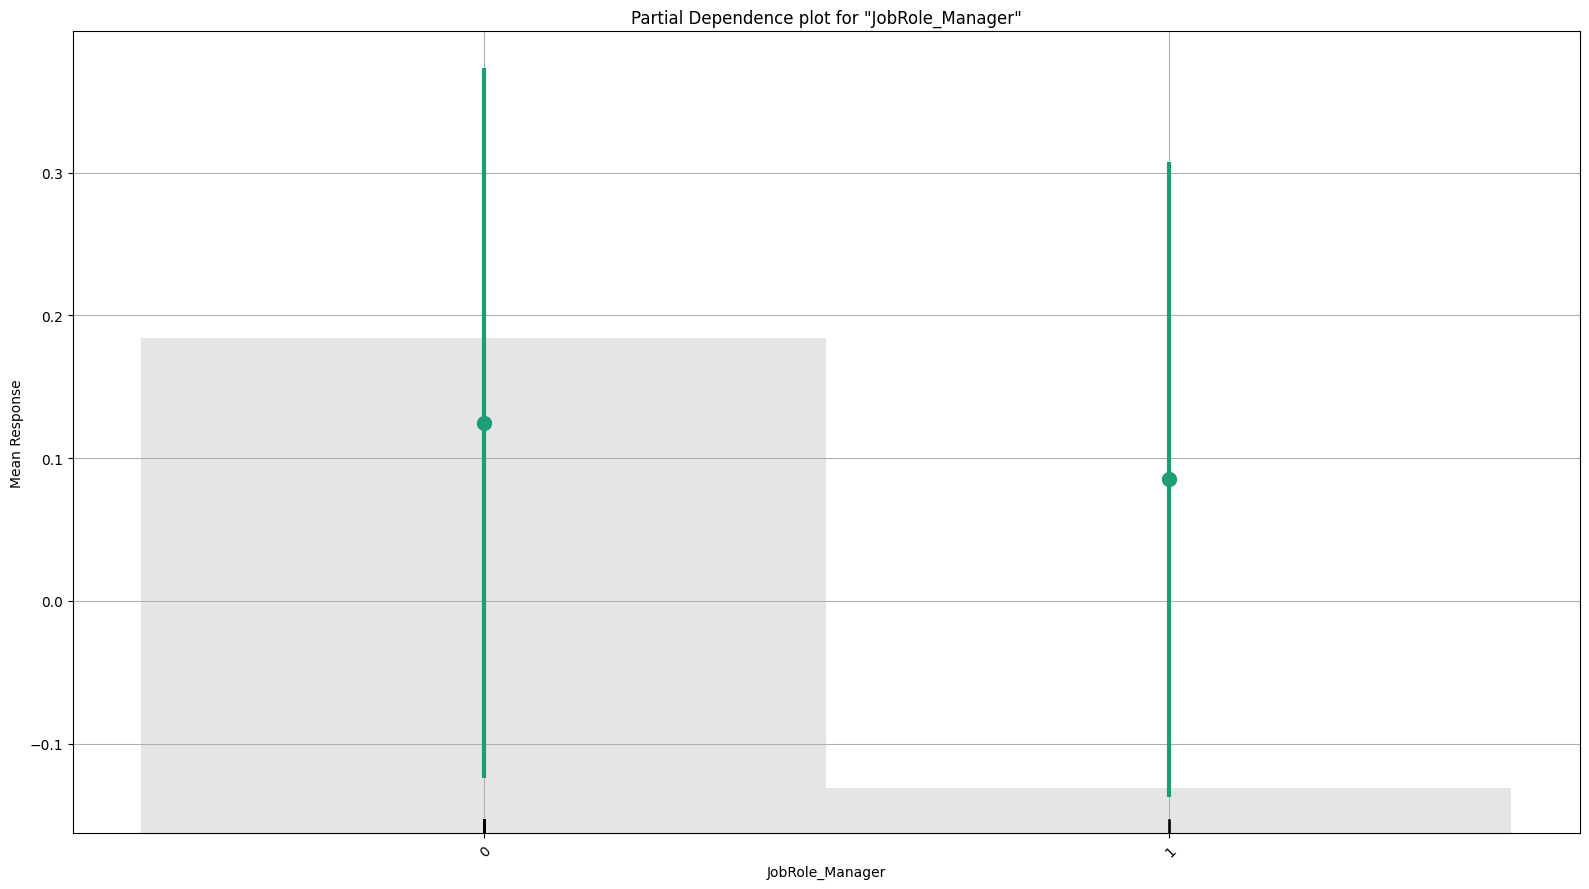

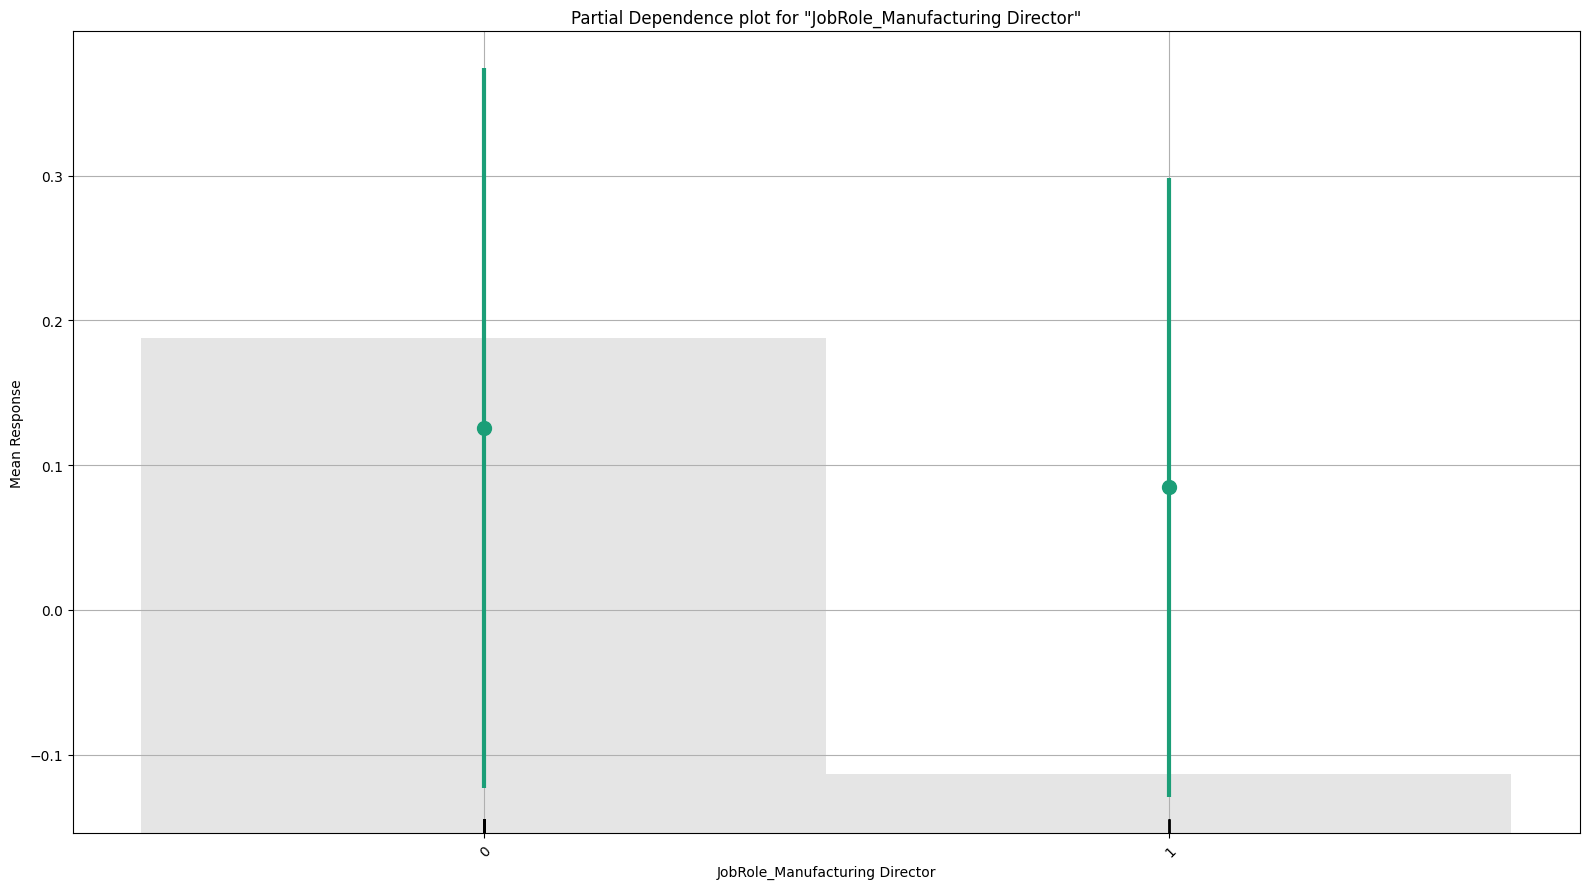

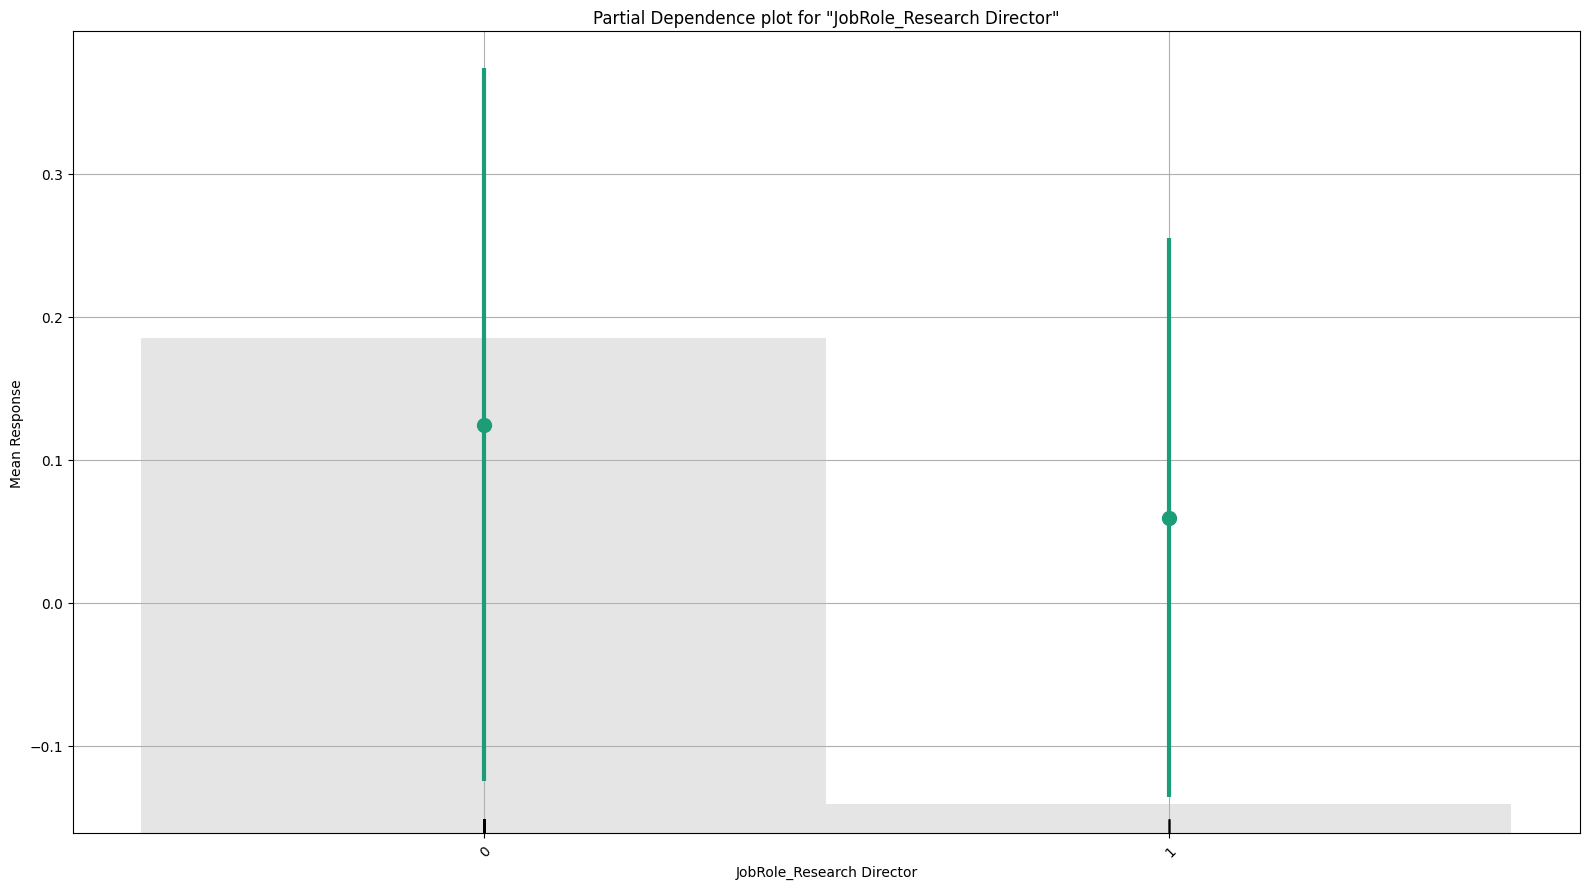

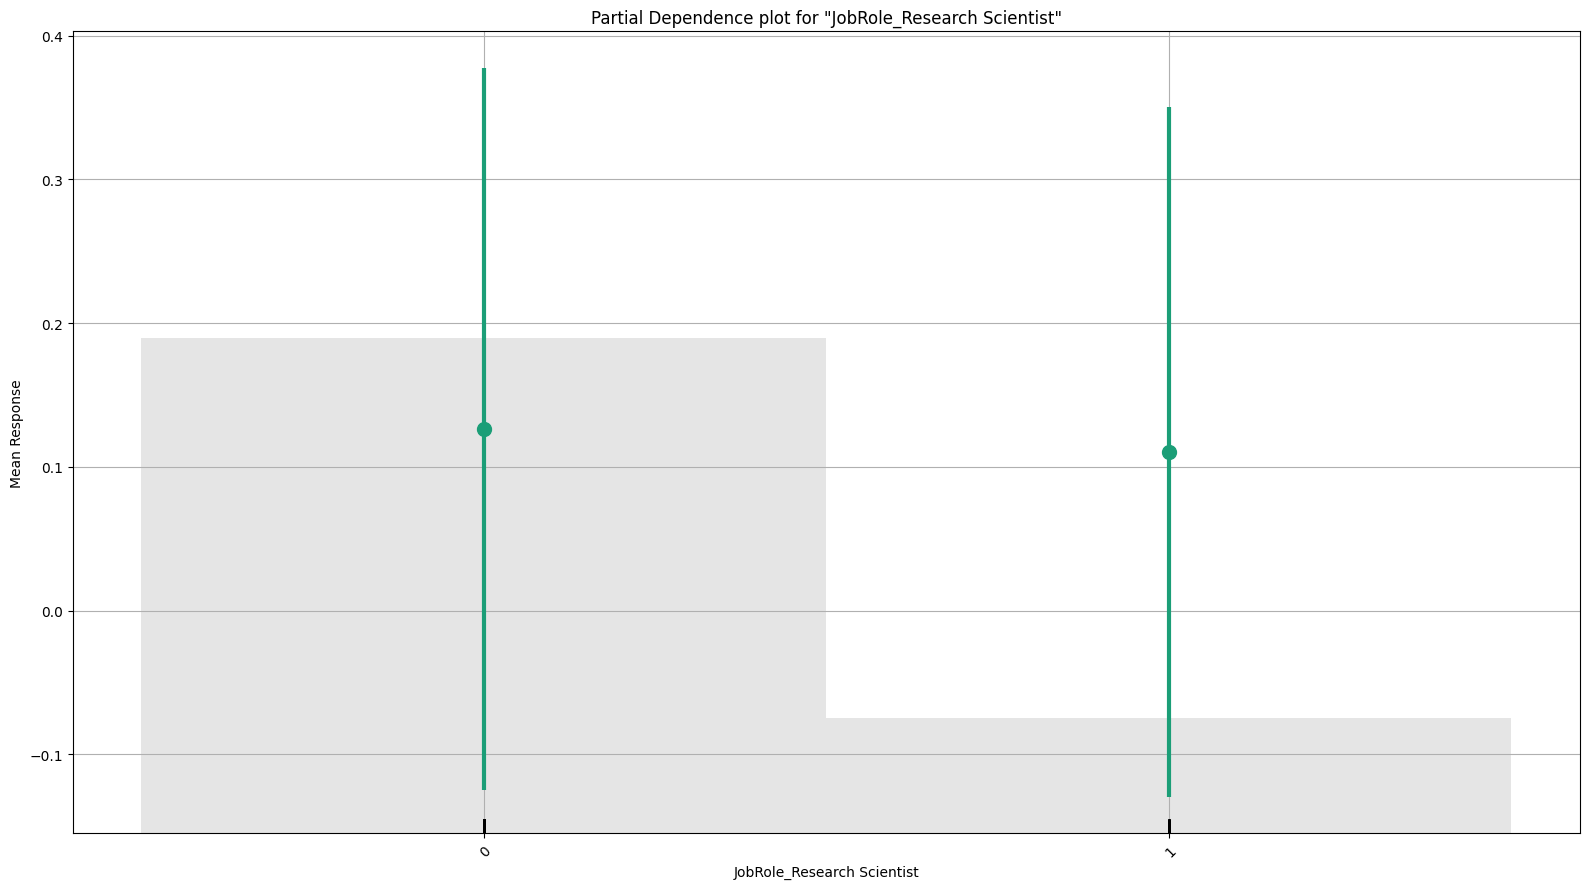

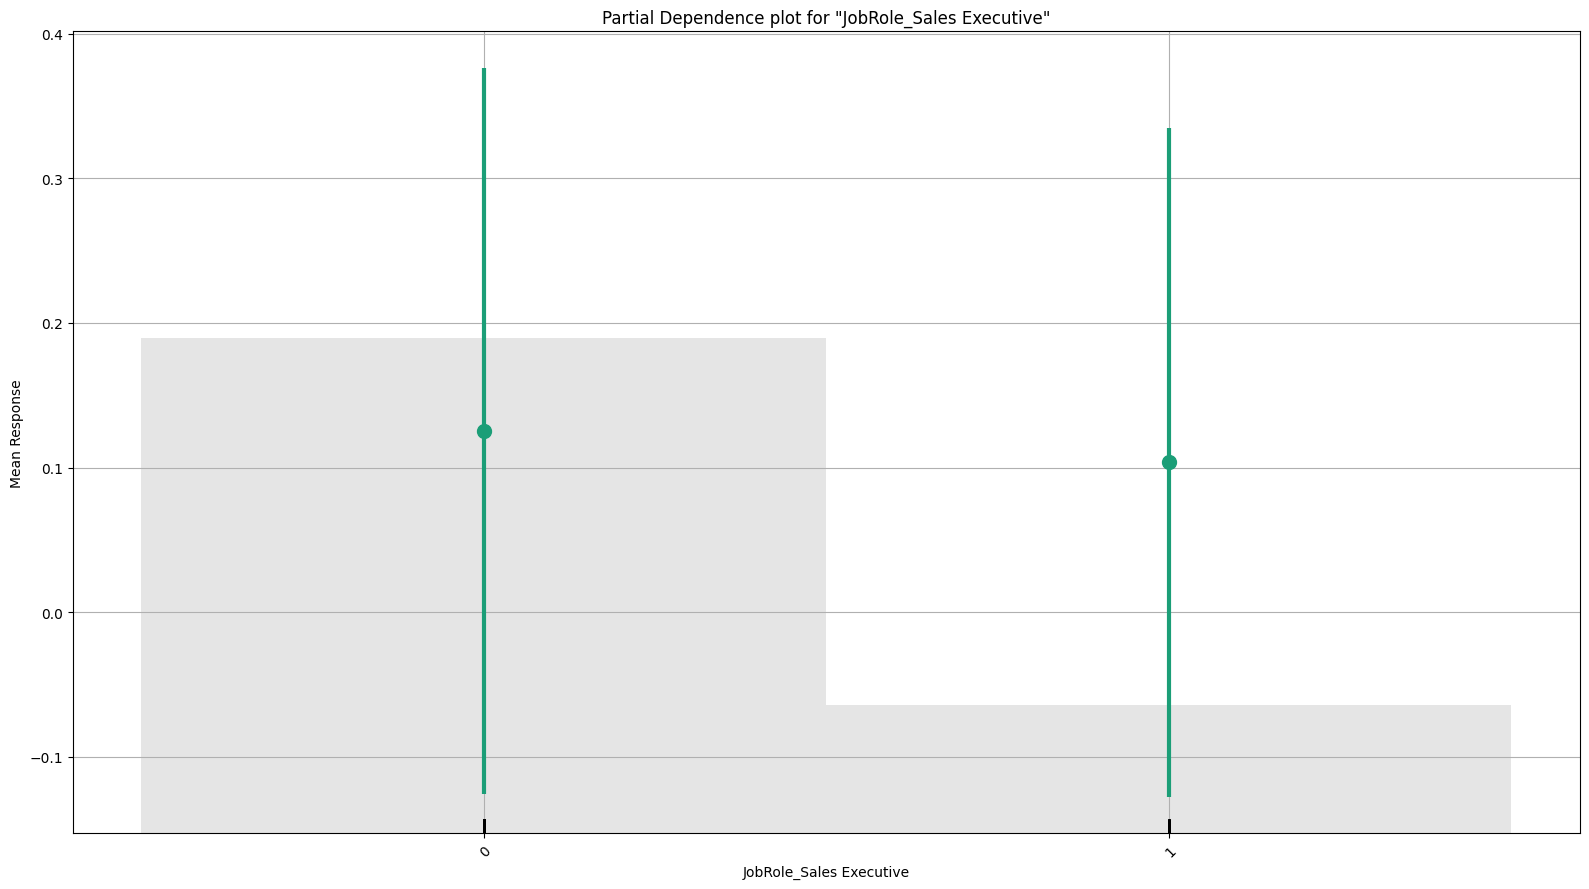

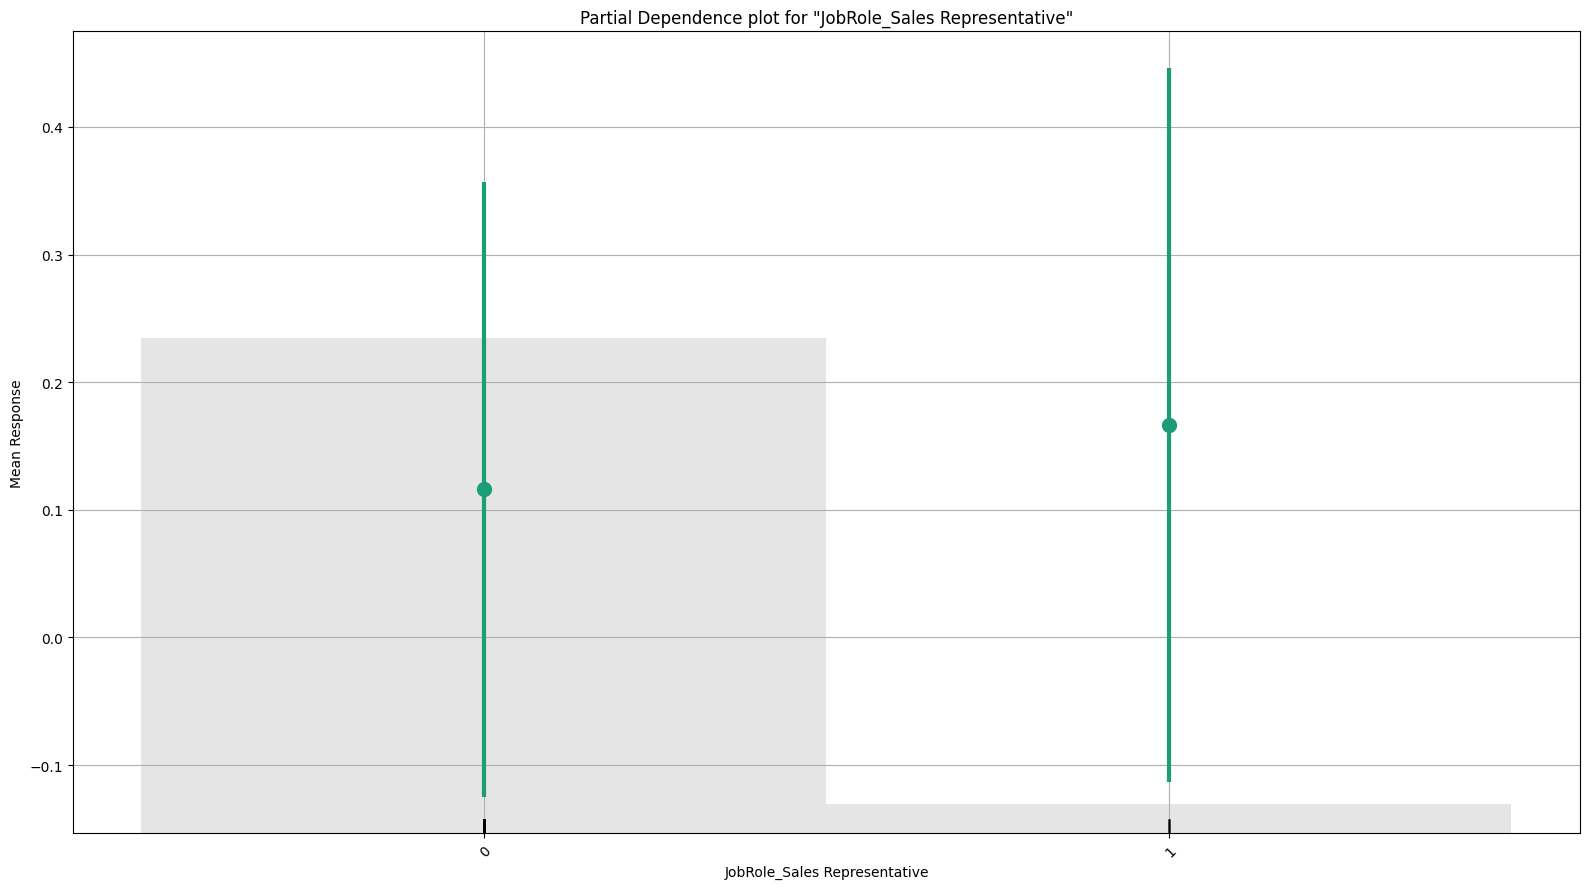

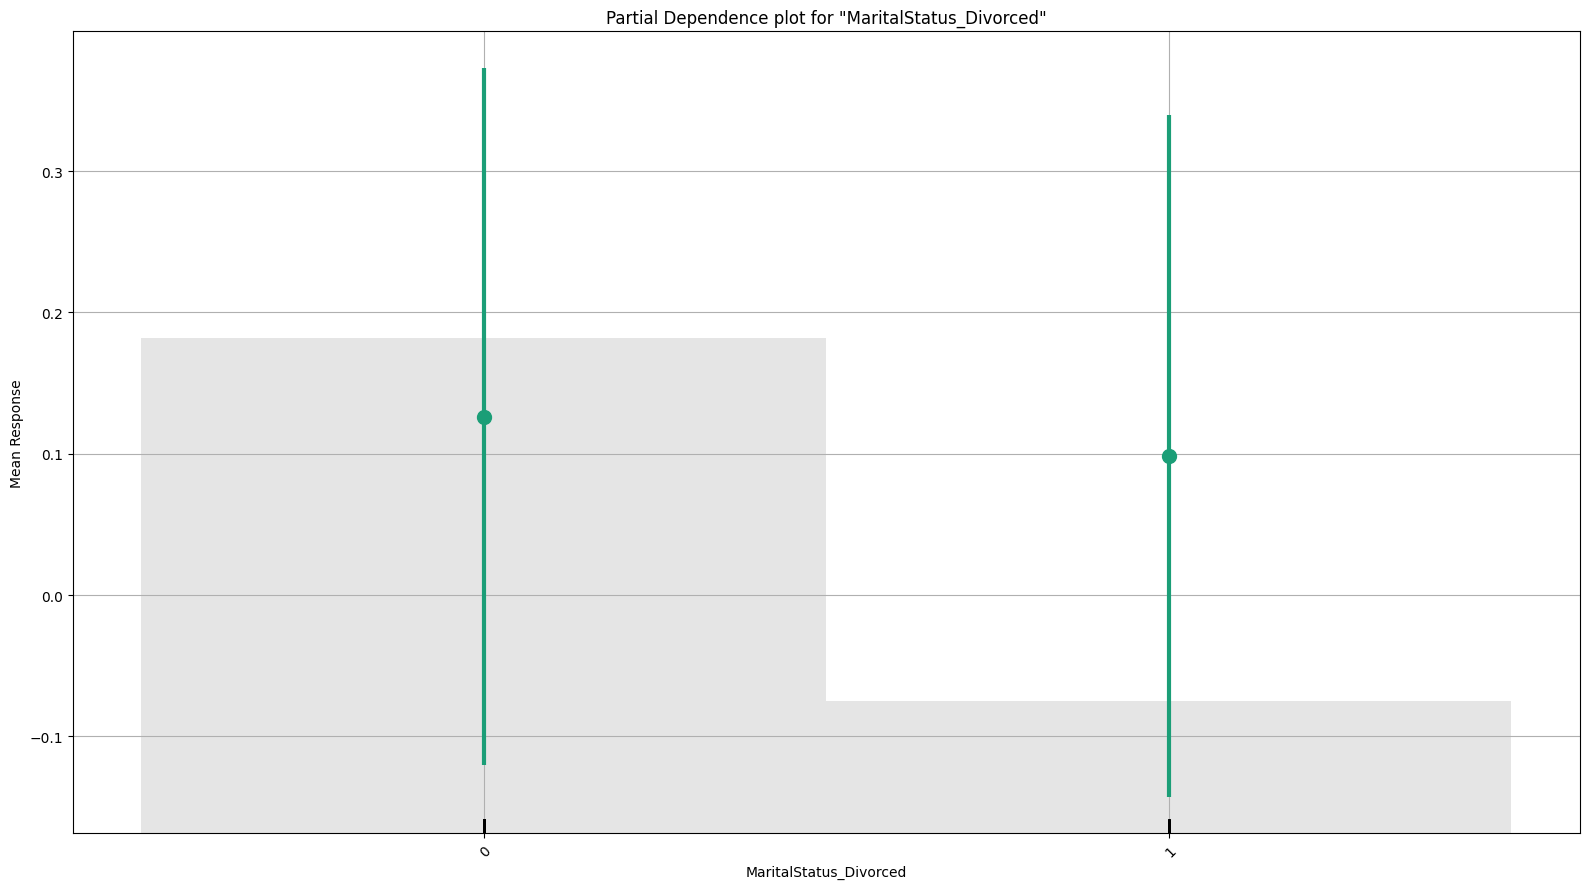

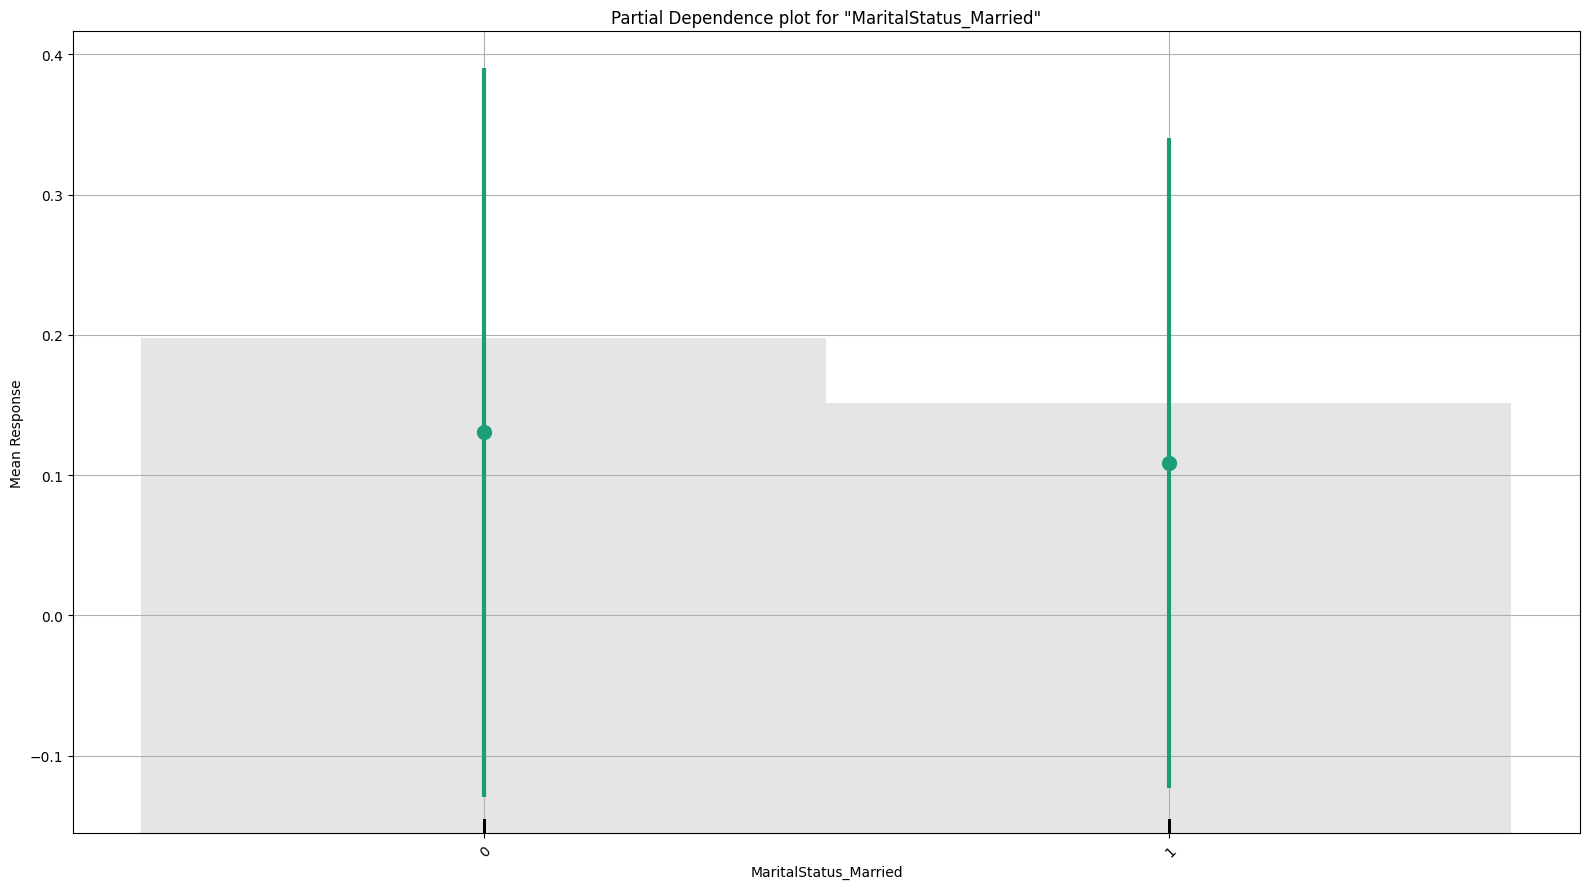

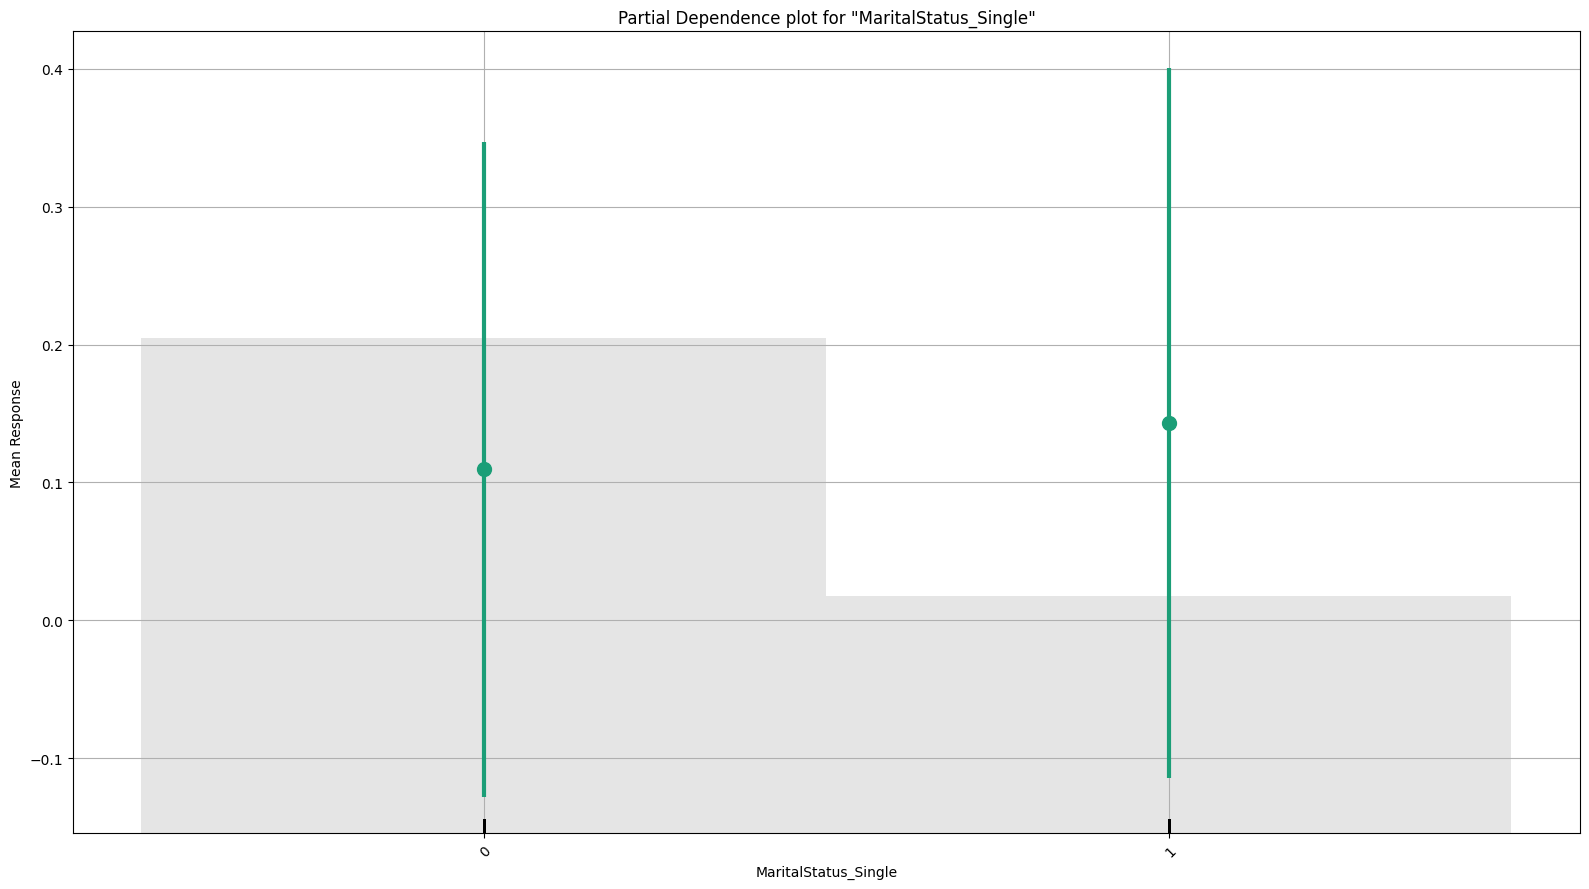

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20250318_160526

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2876534730907089
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      358  26   0.0677   (26.0/384.0)
1      20   37   0.3509   (20.0/57.0)
Total  378  63   0.1043   (46.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

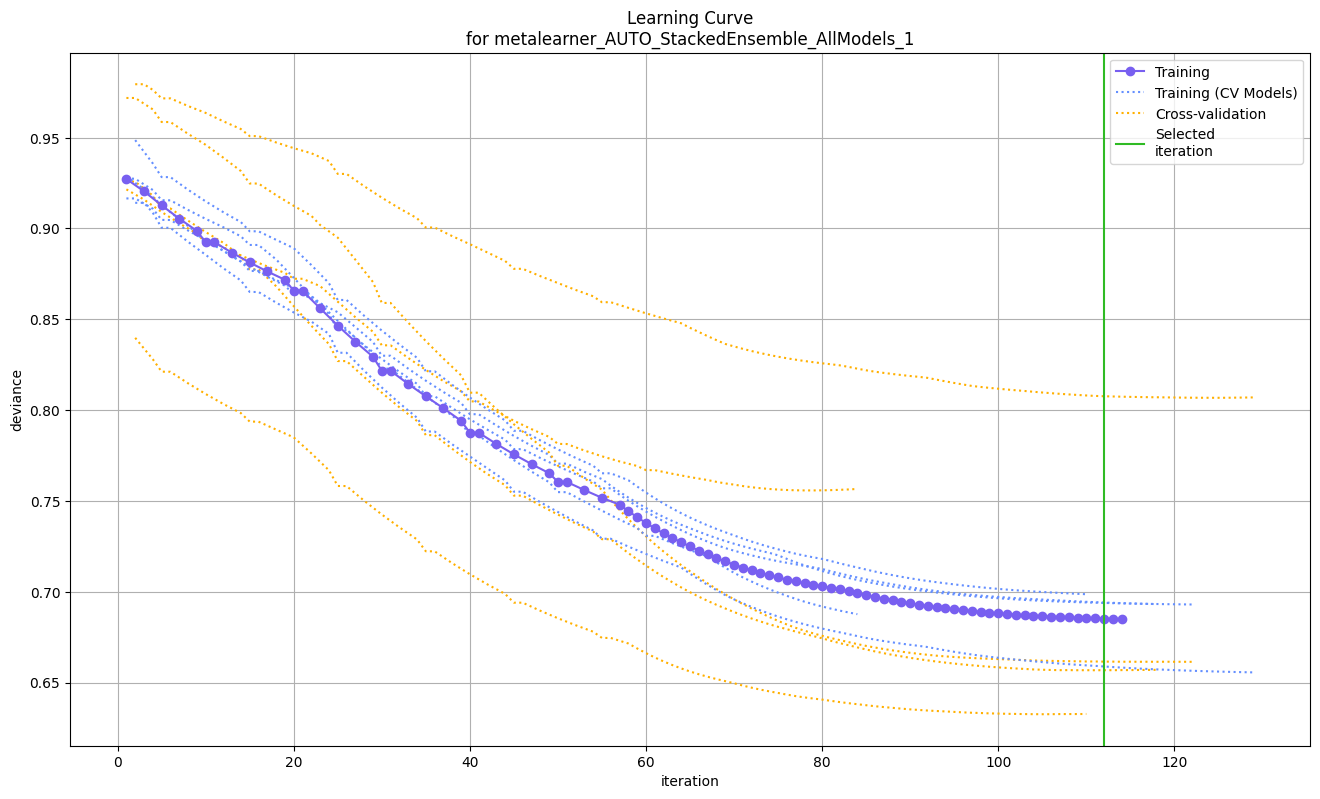

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

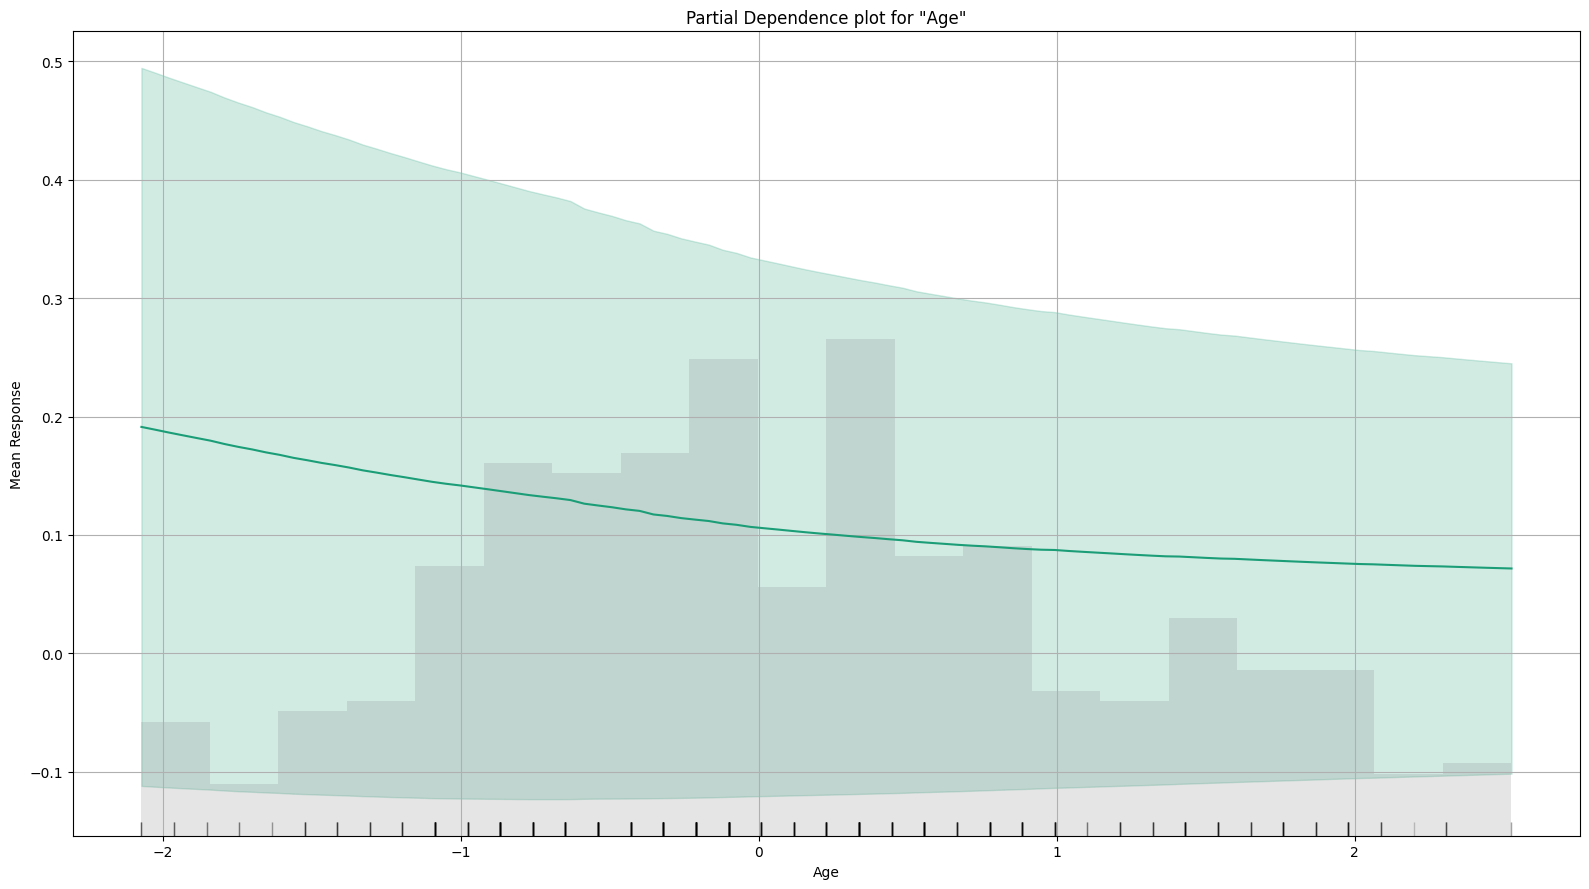

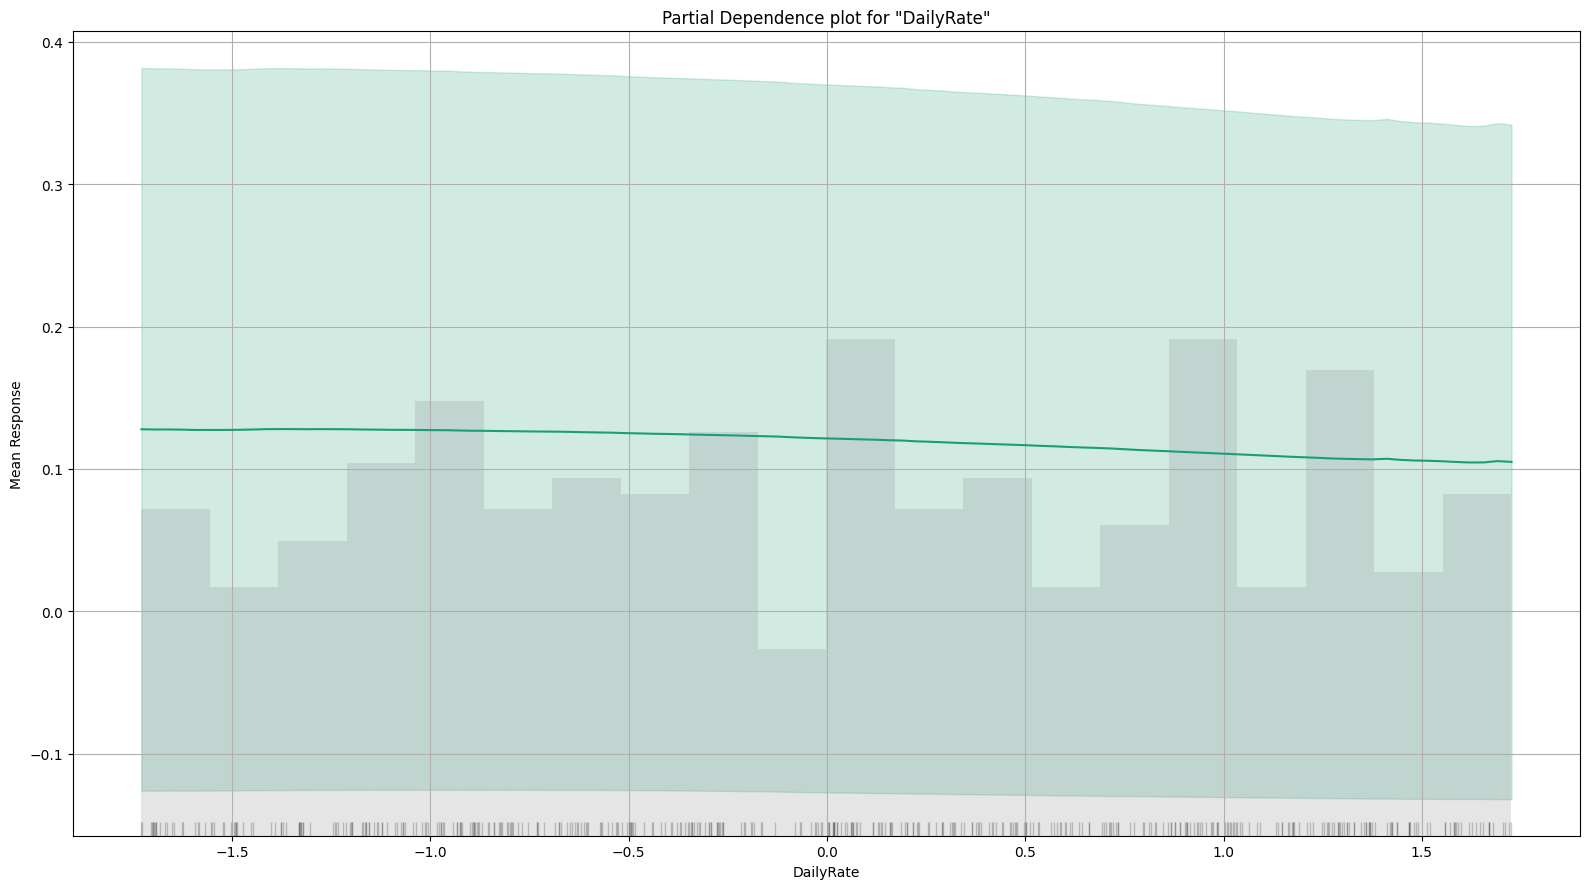

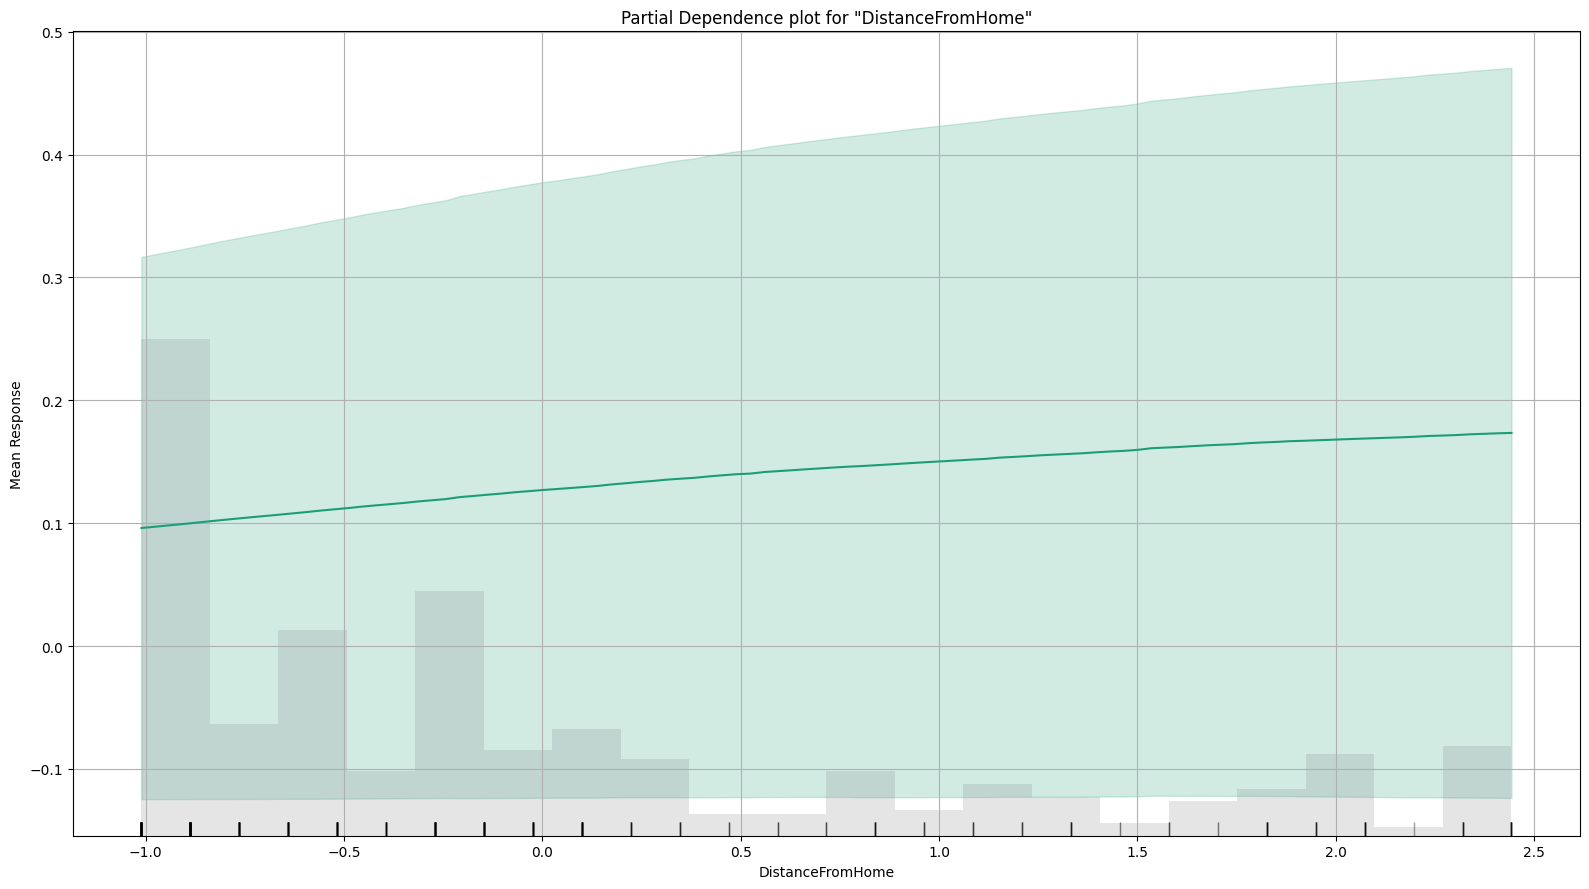

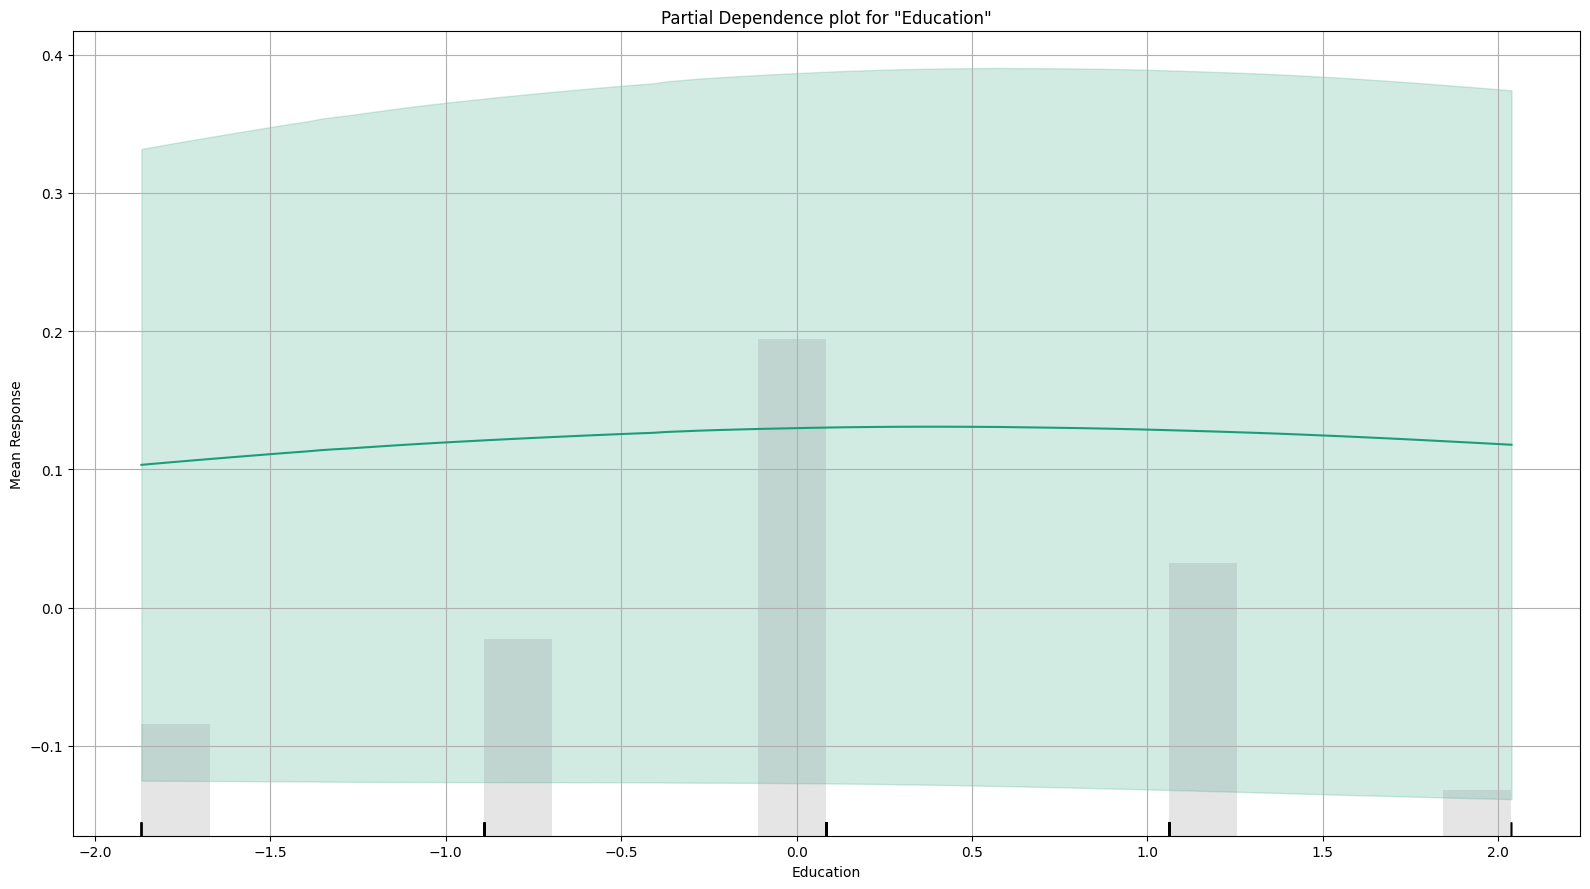

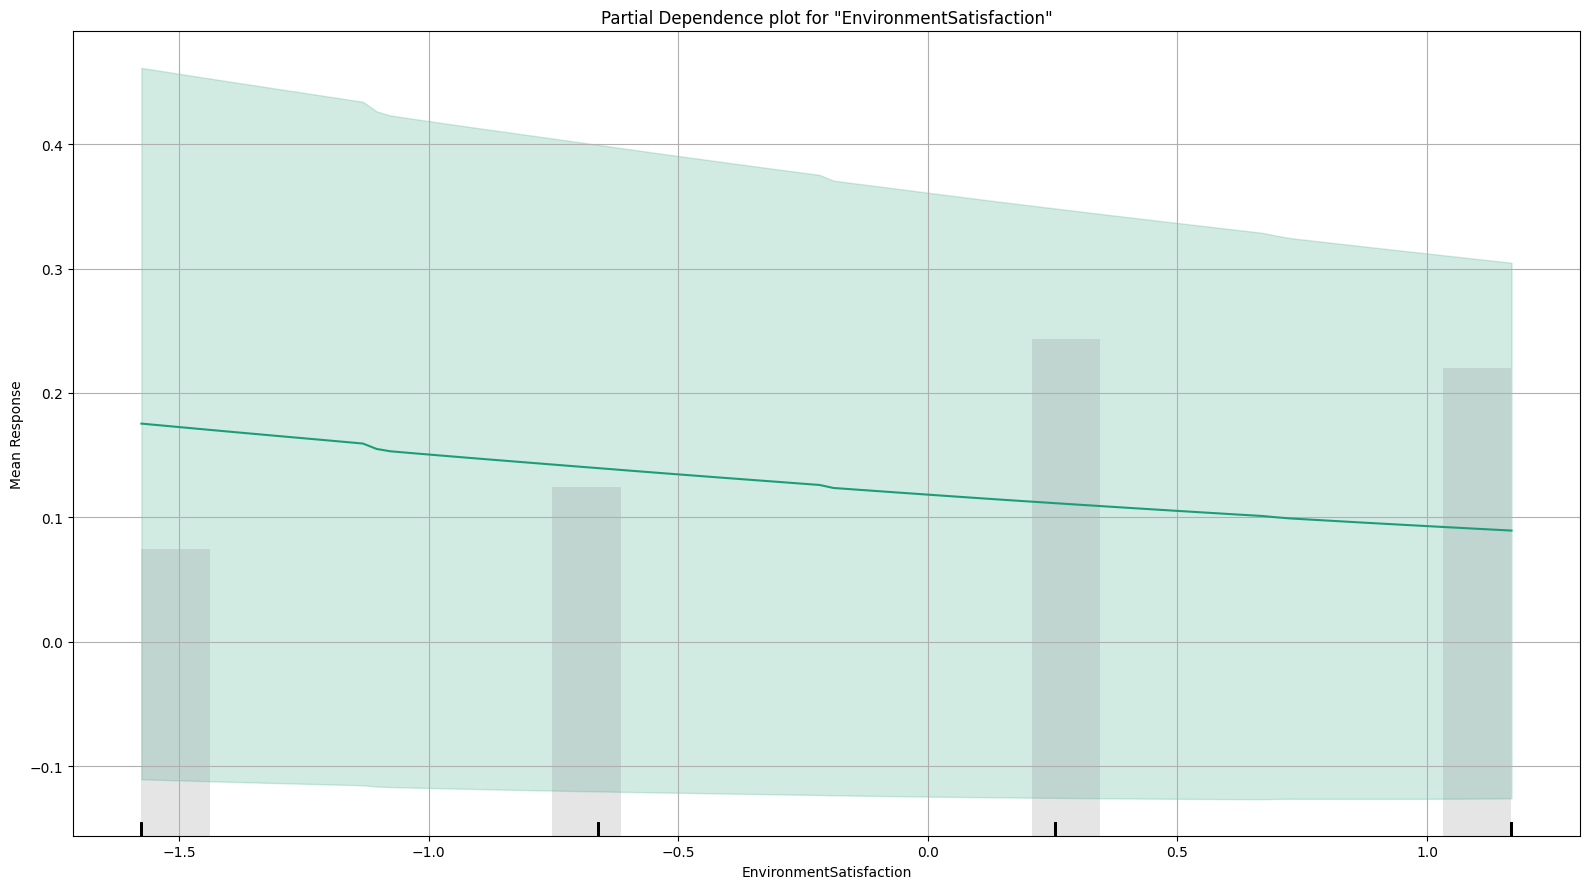

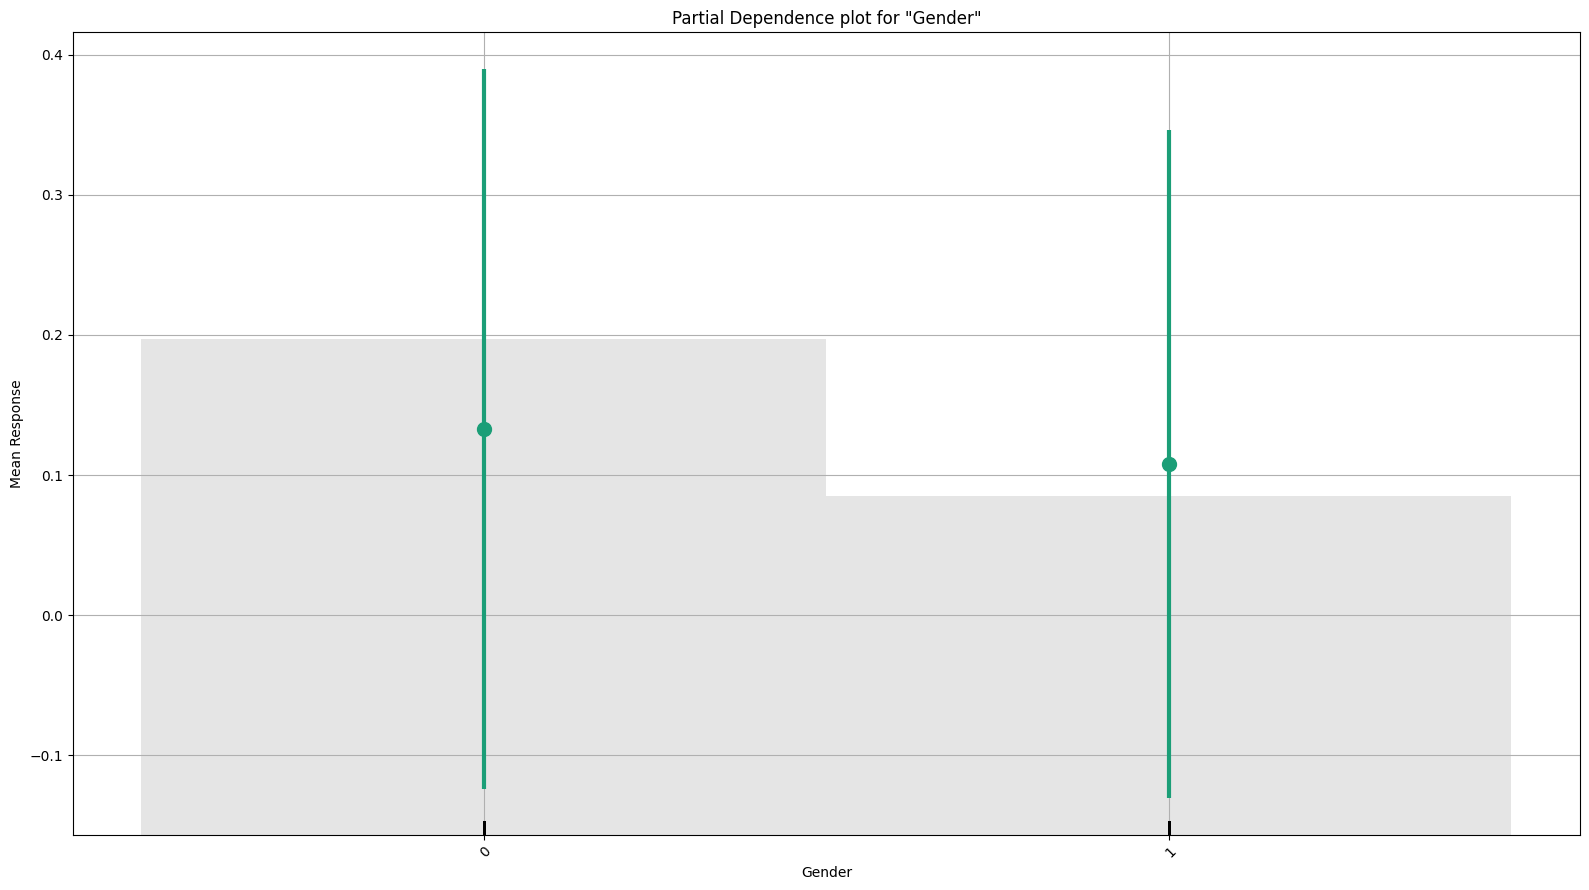

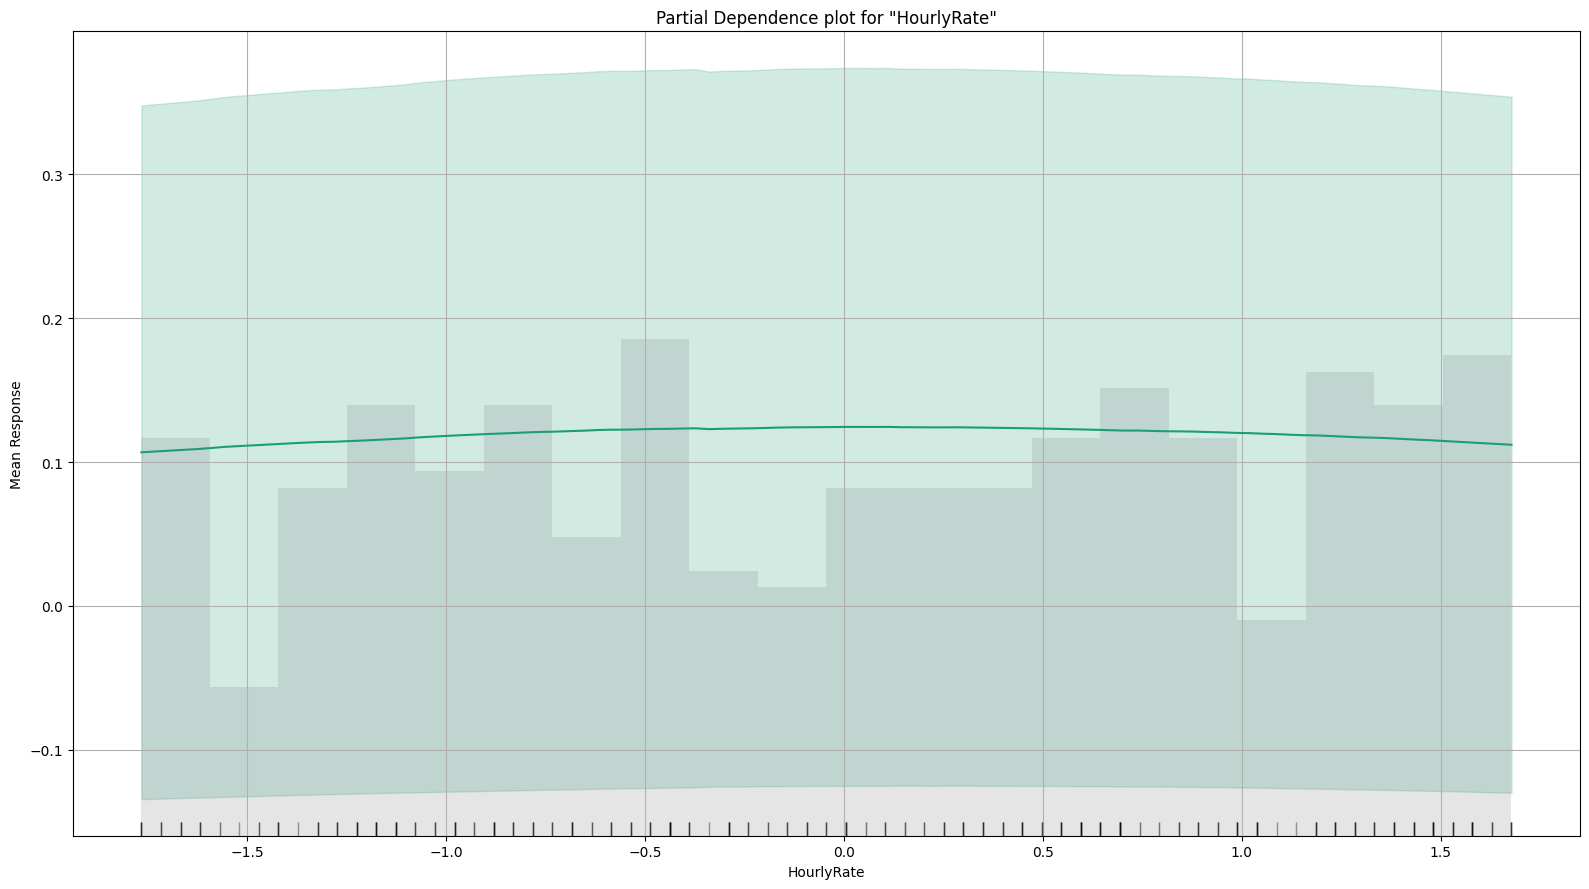

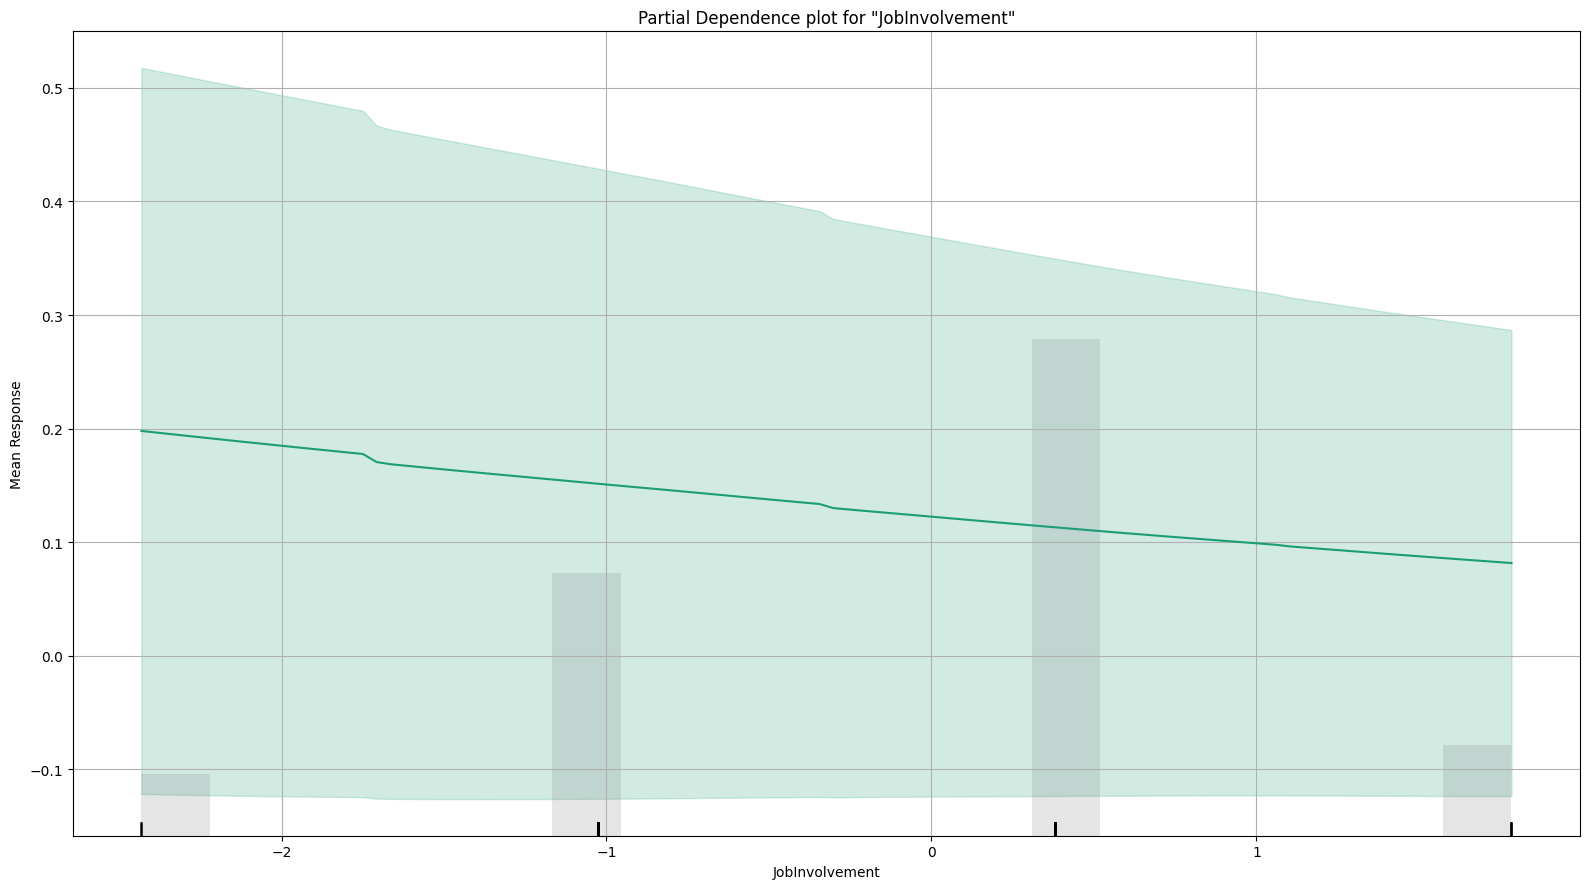

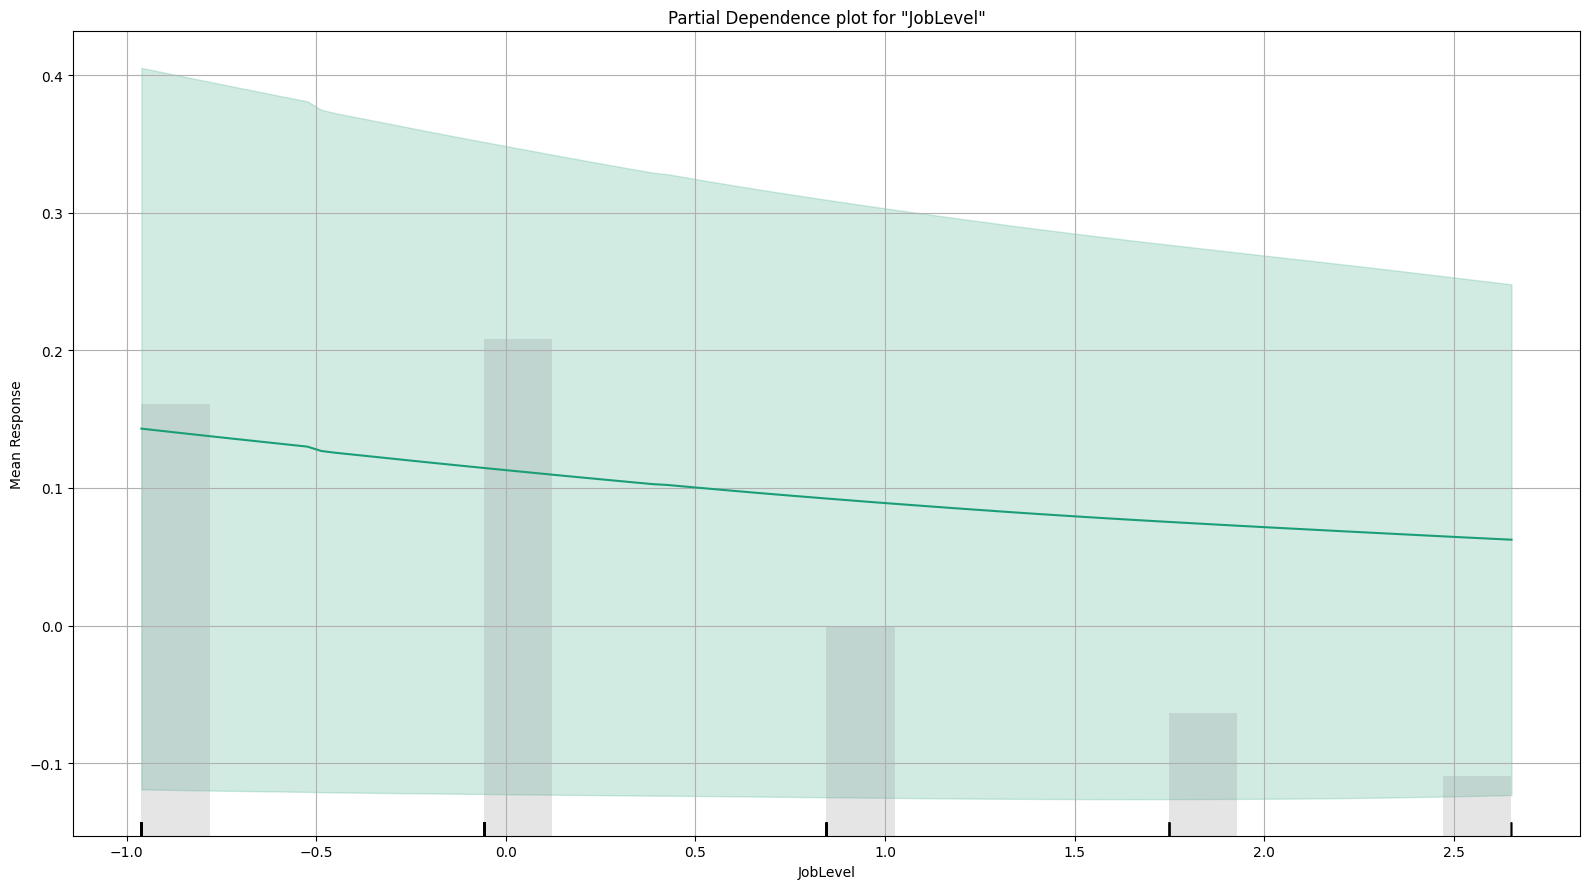

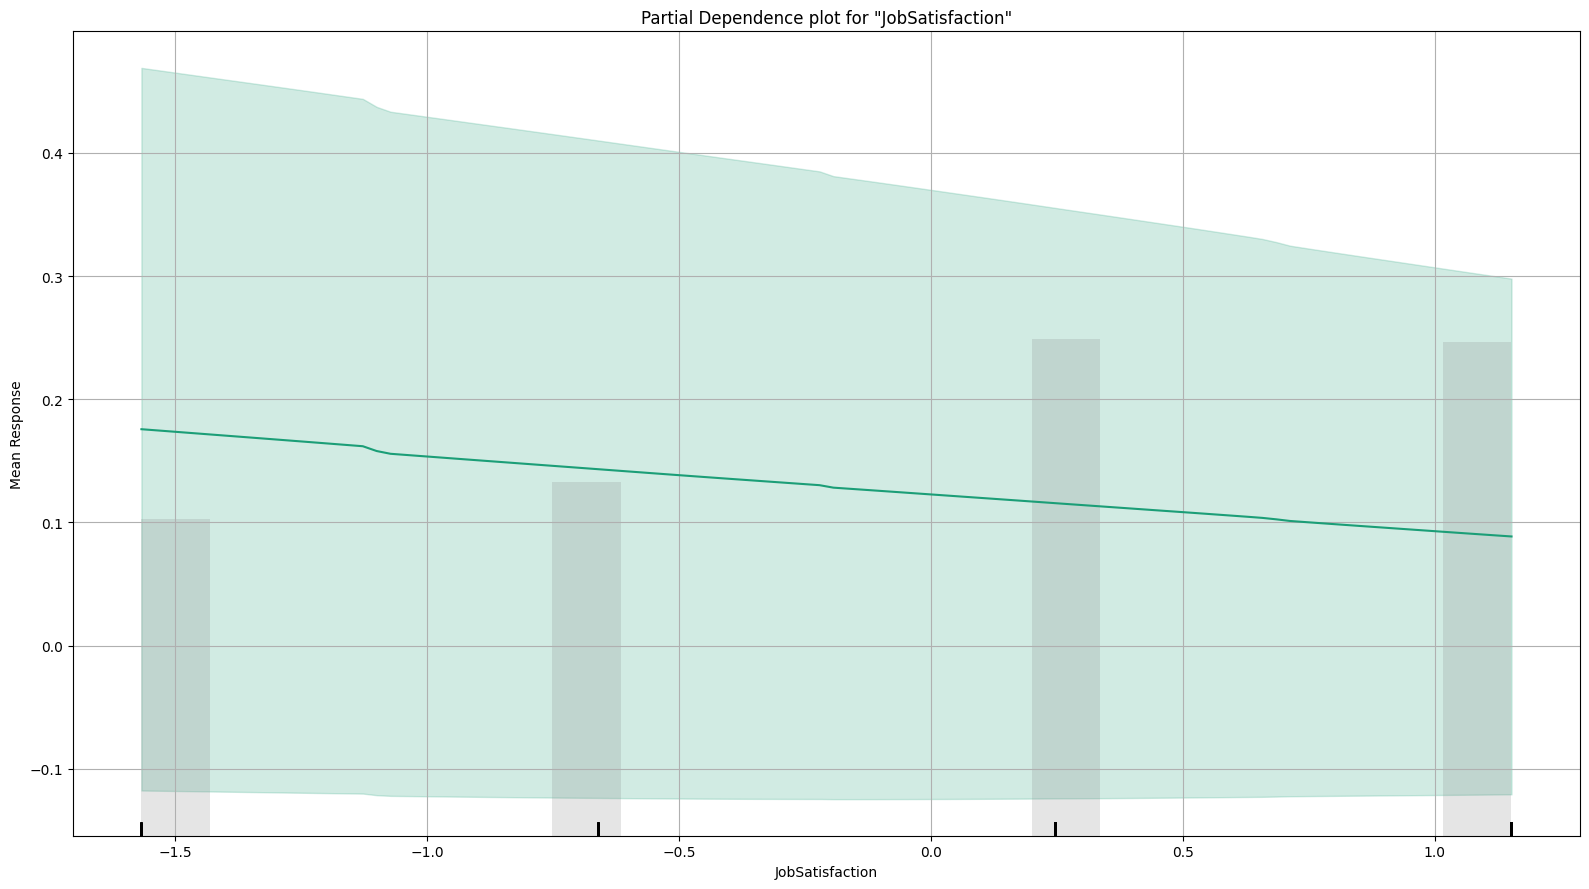

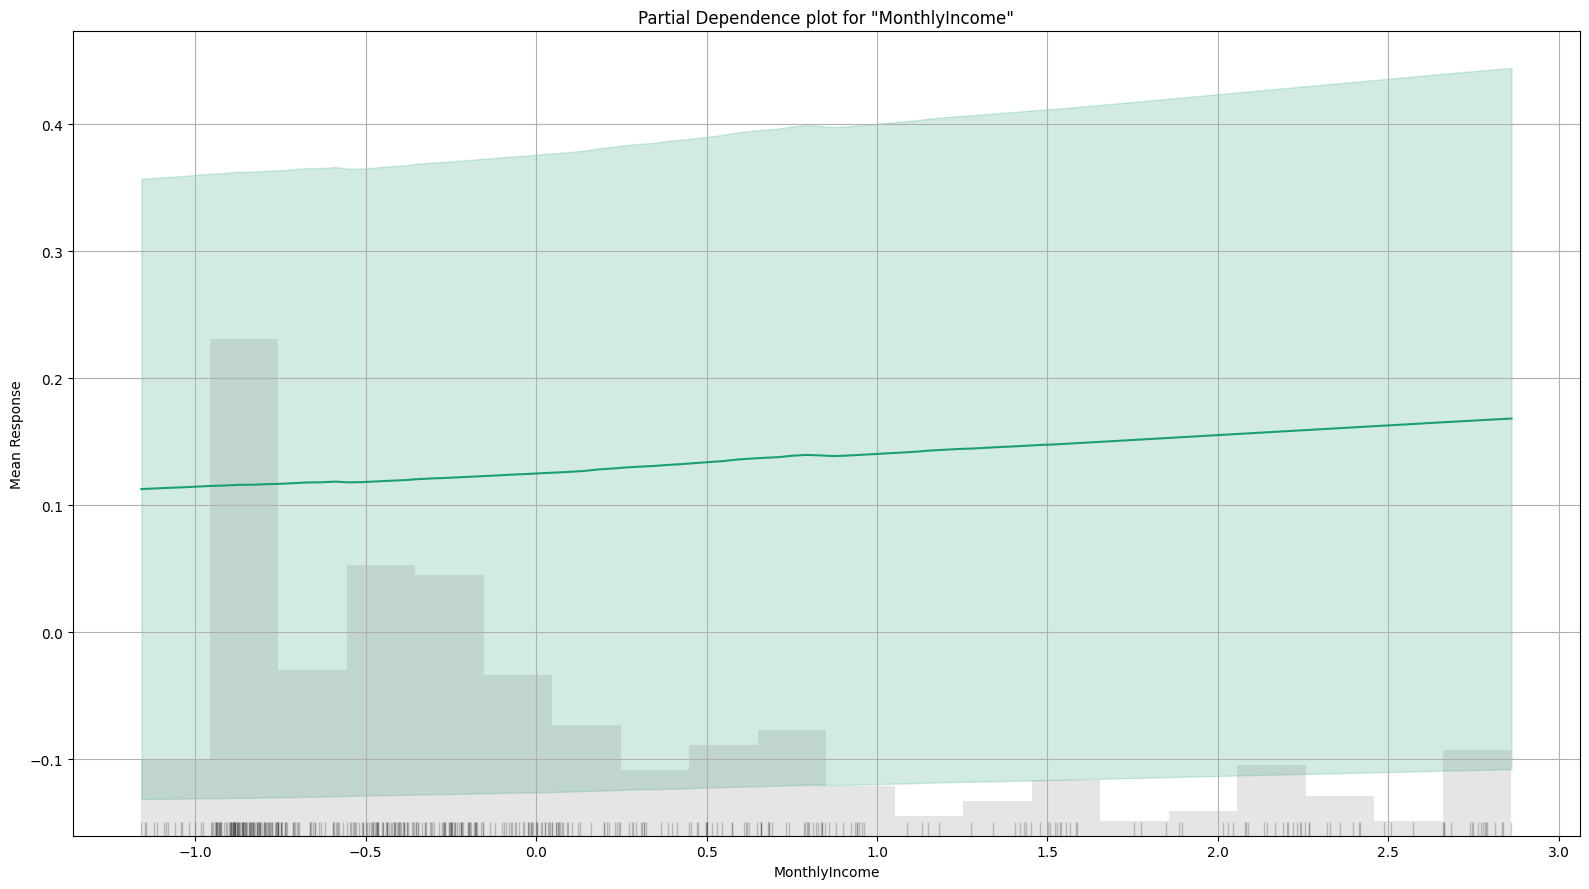

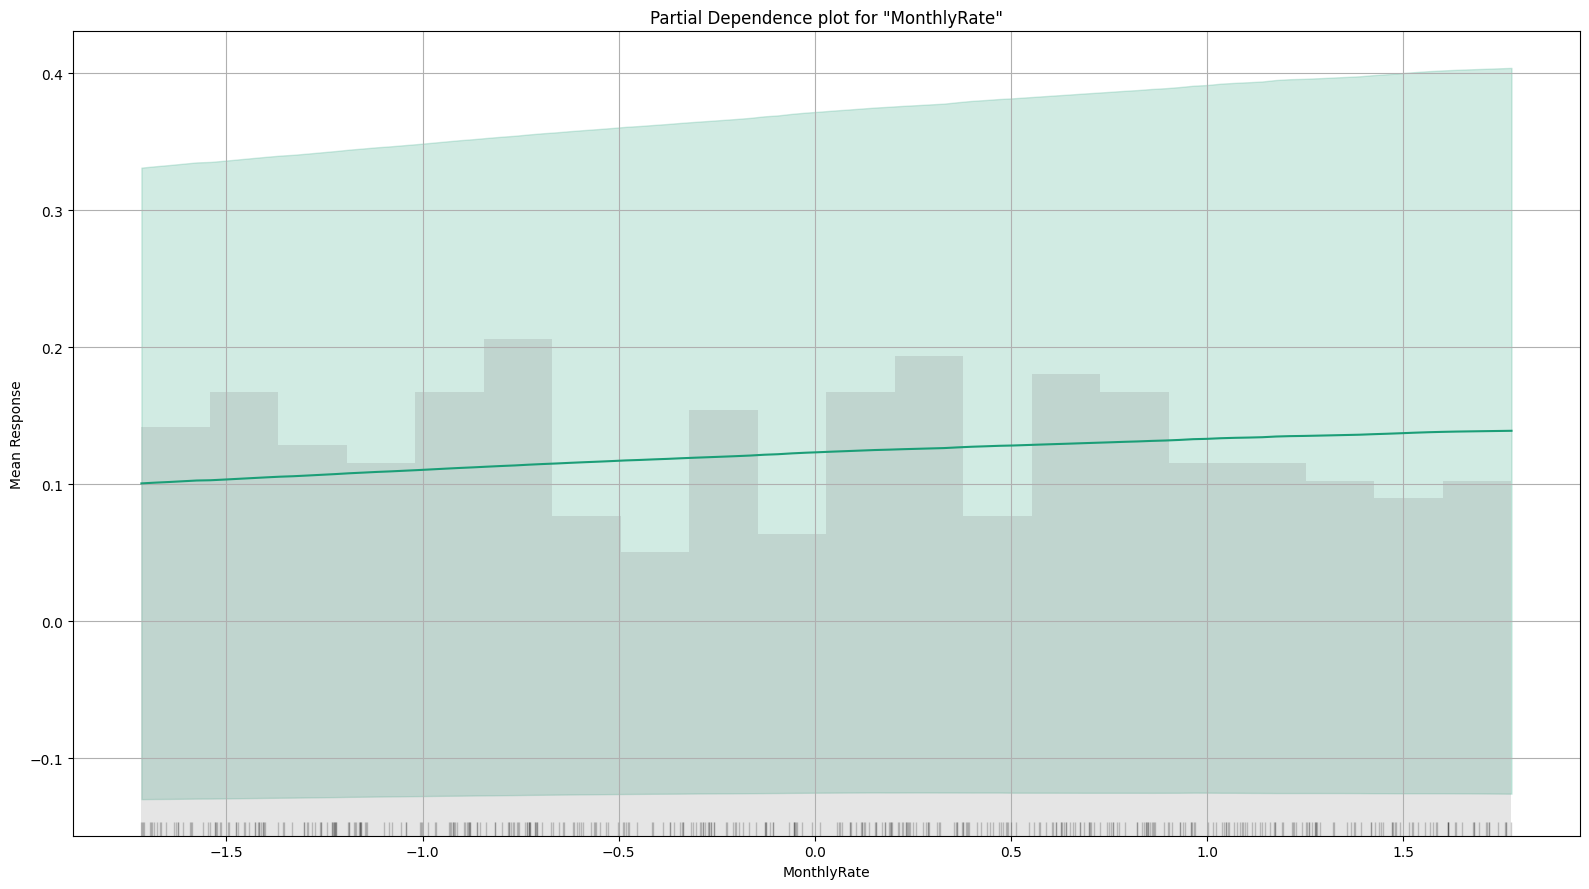

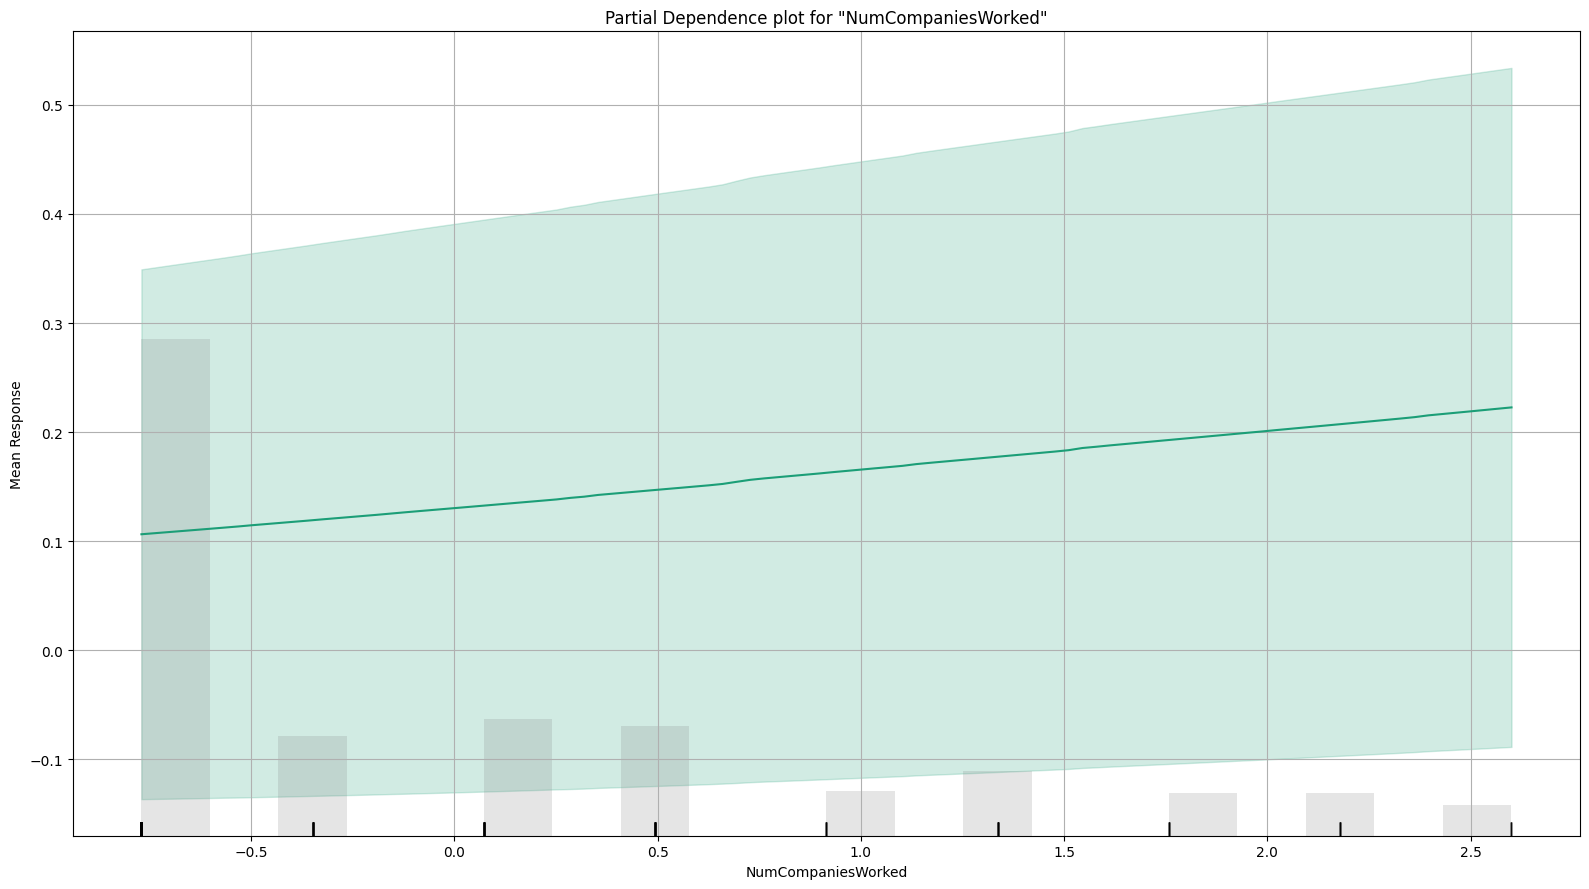

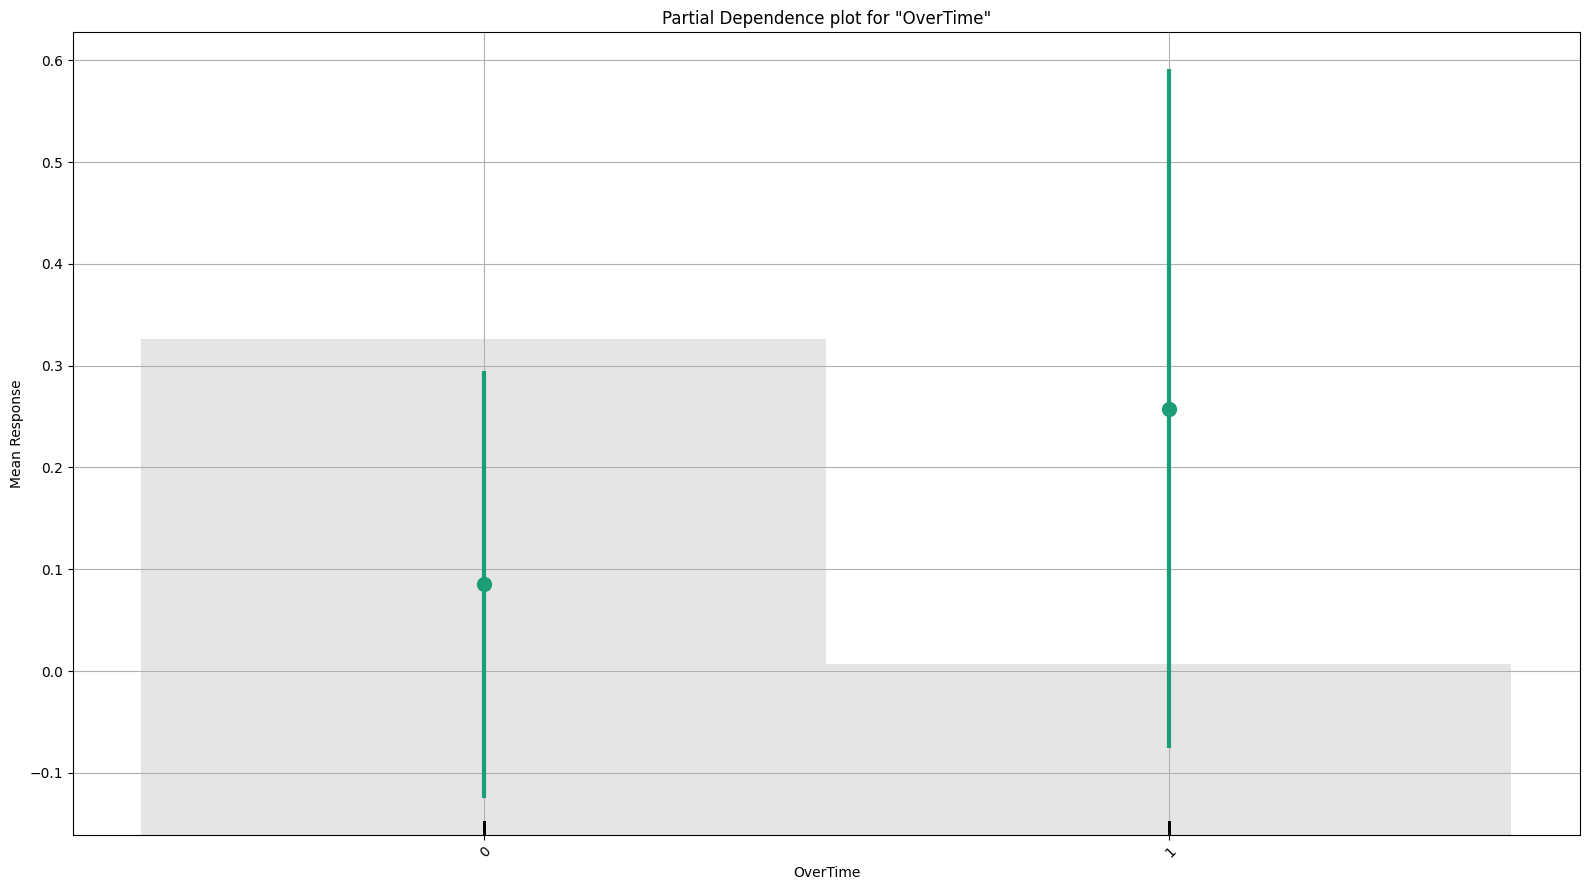

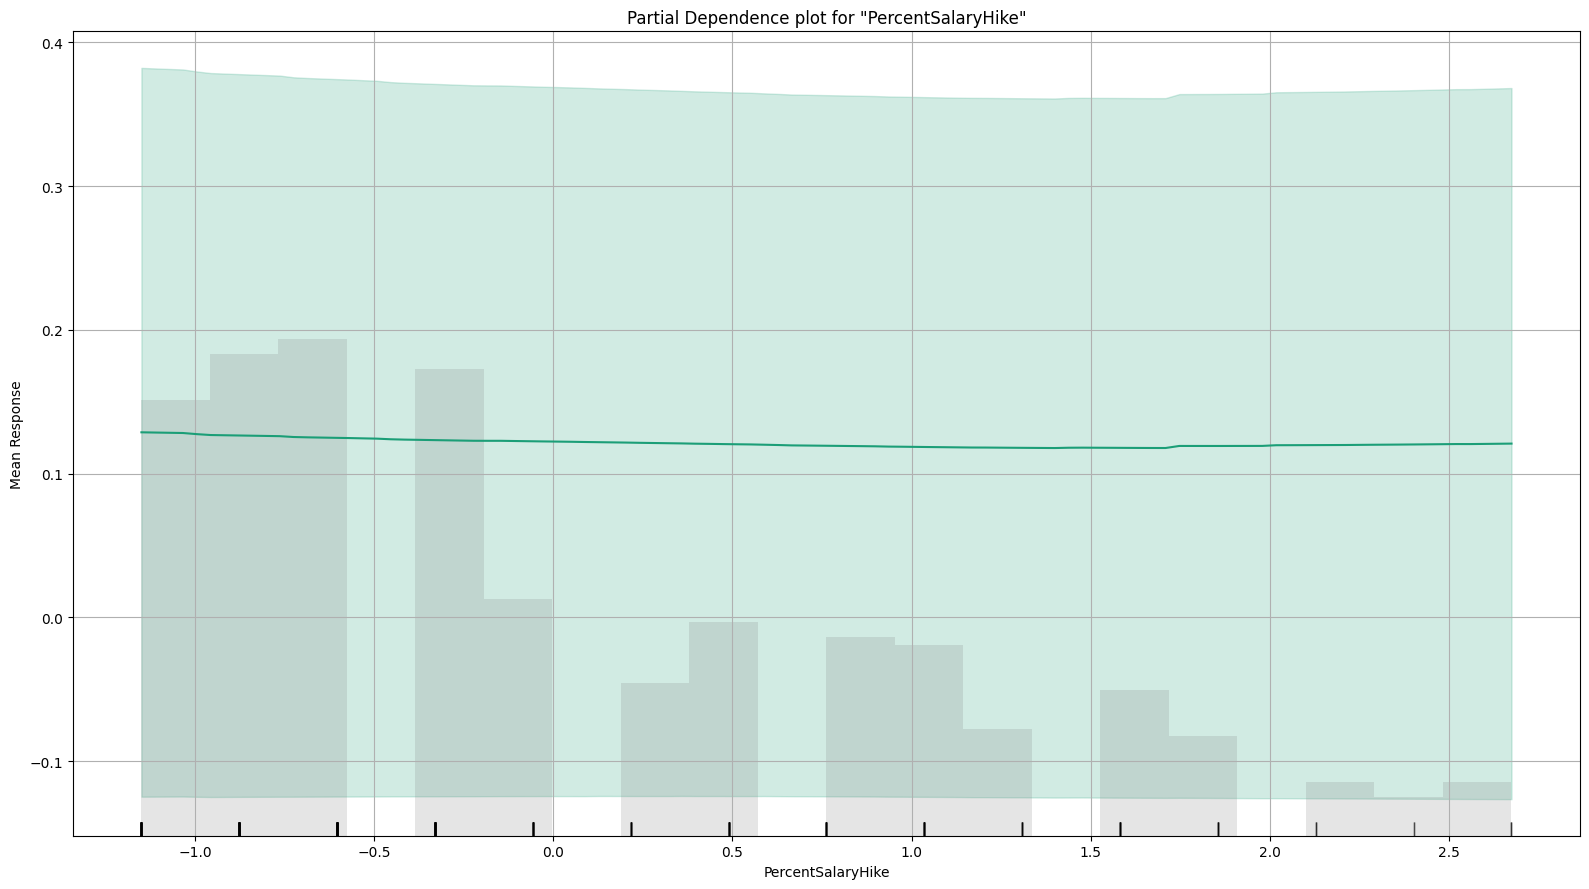

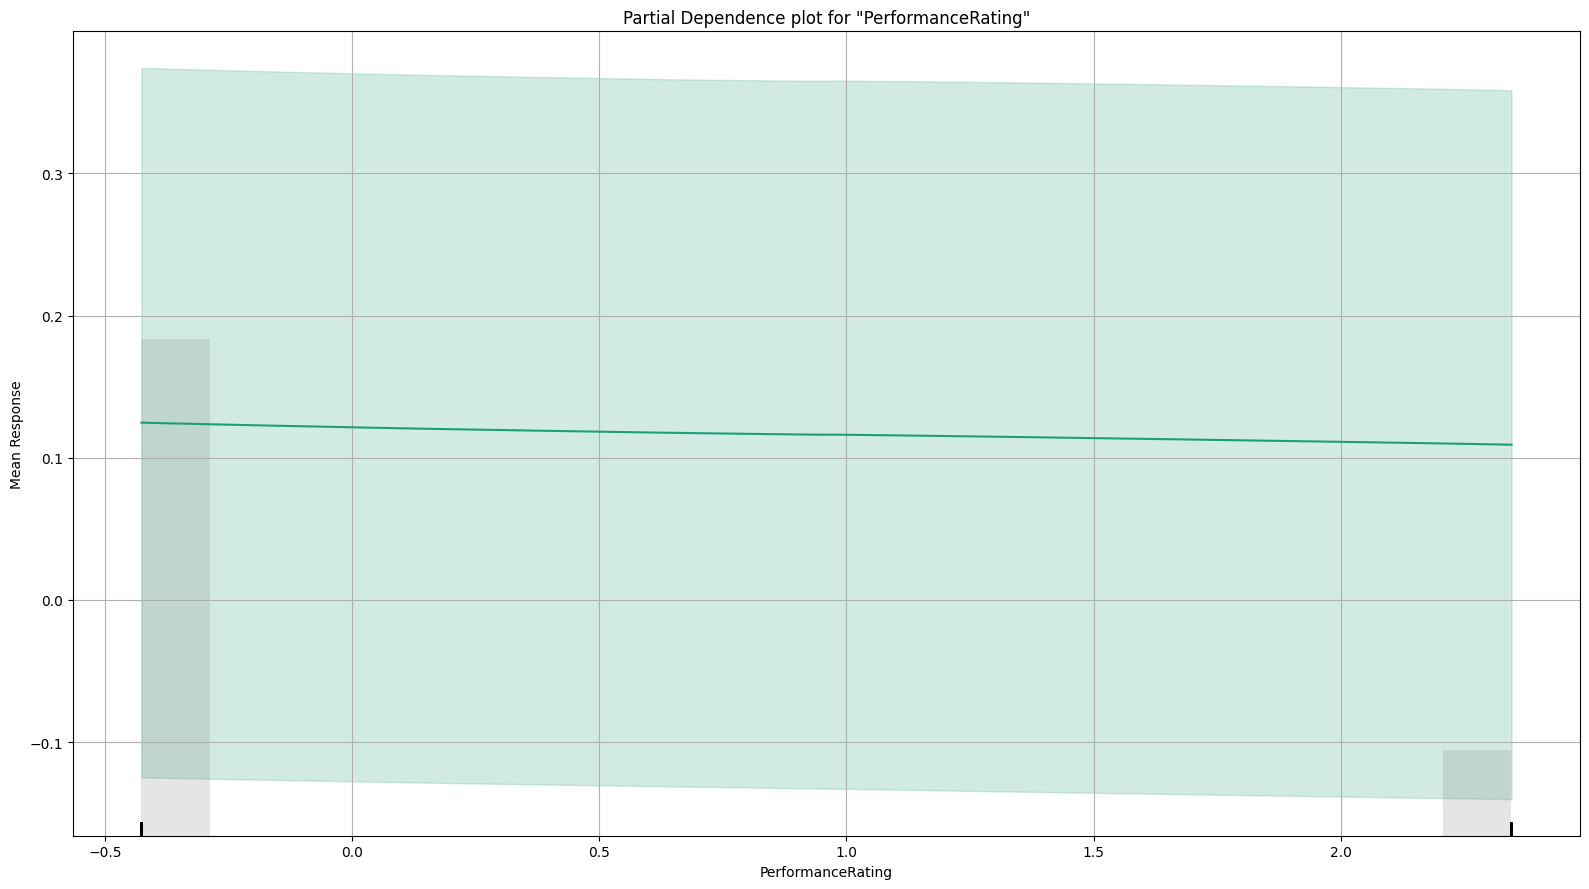

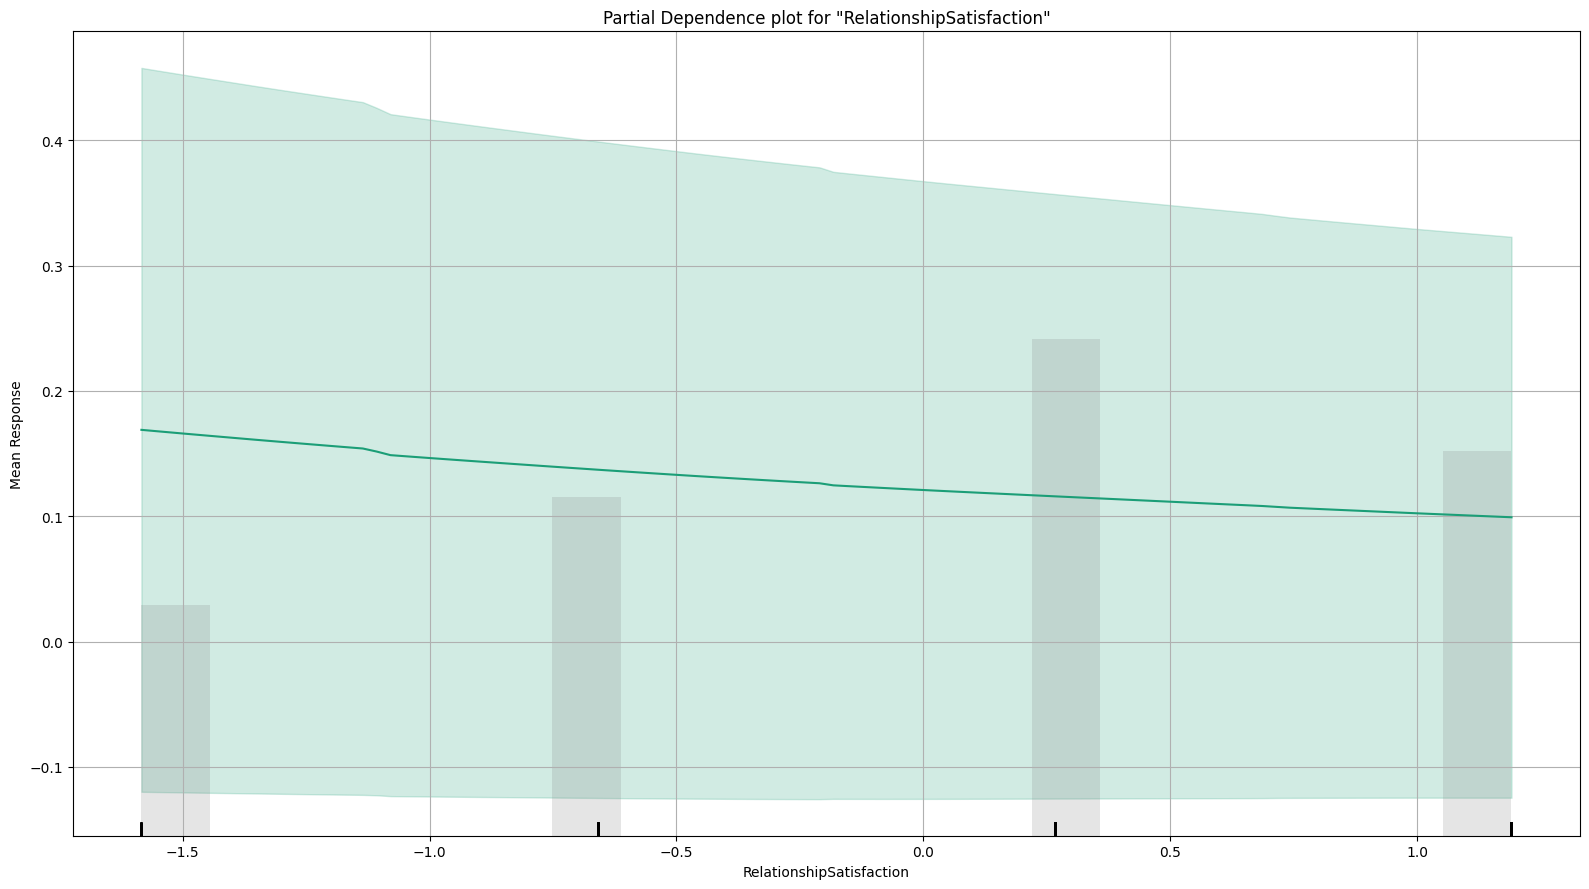

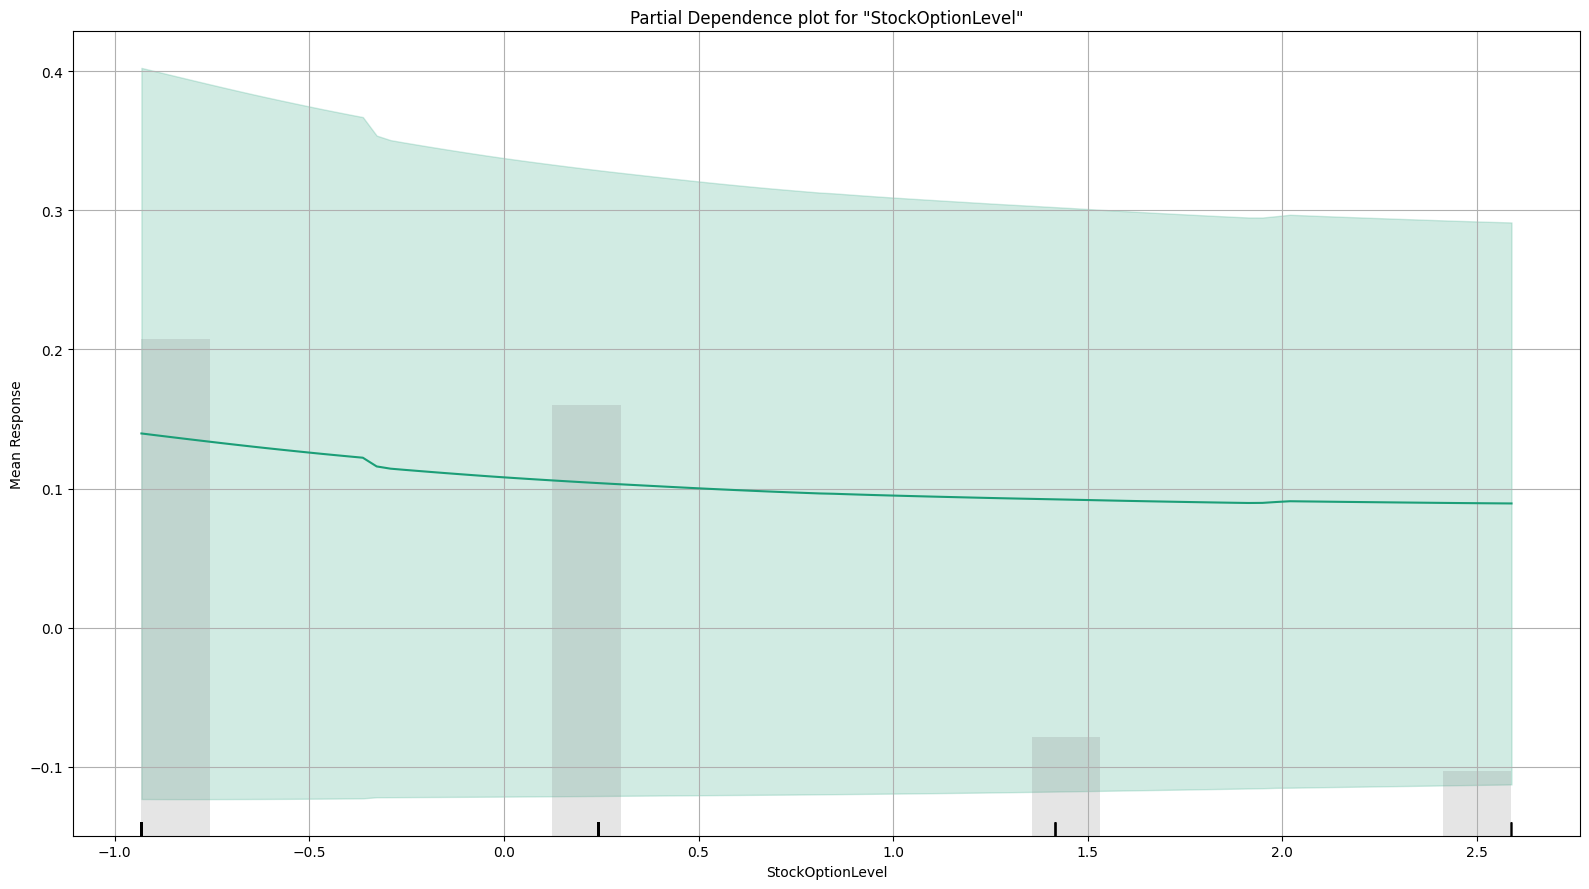

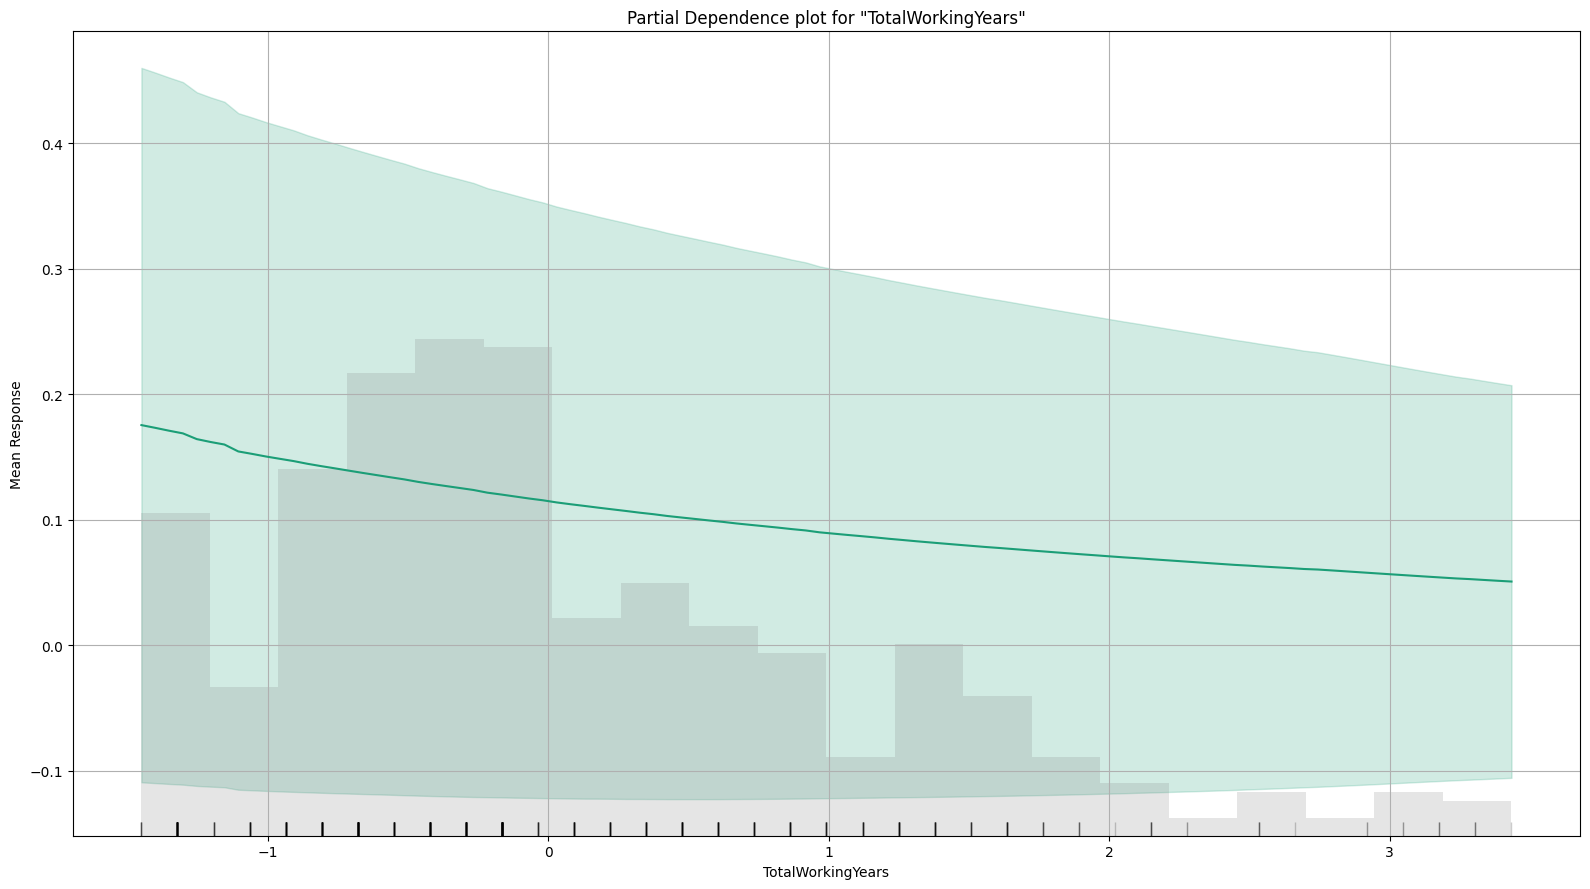

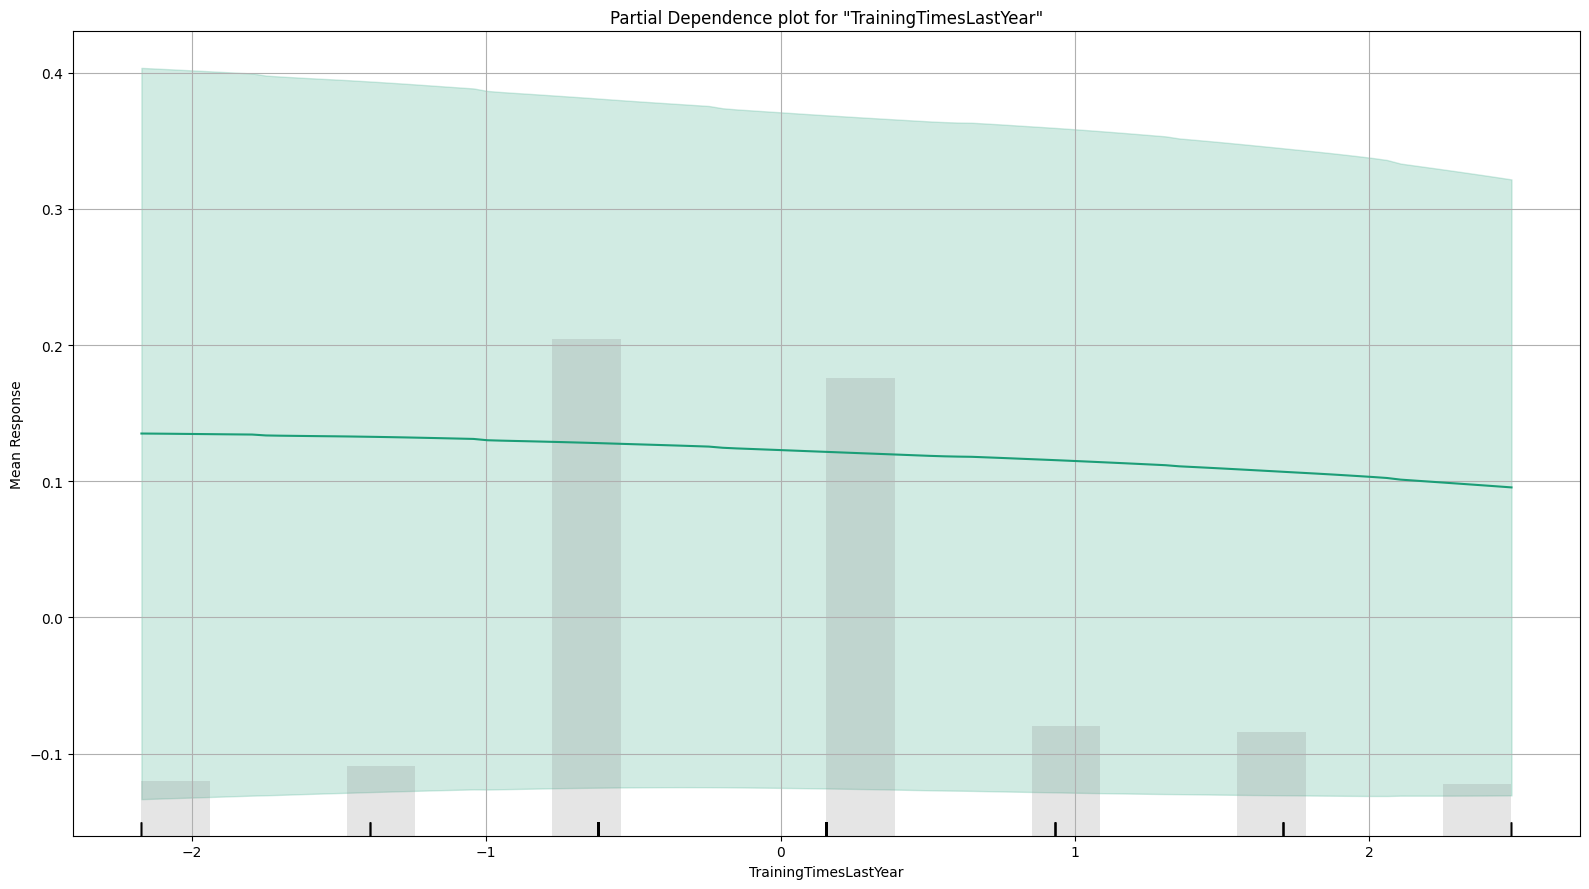

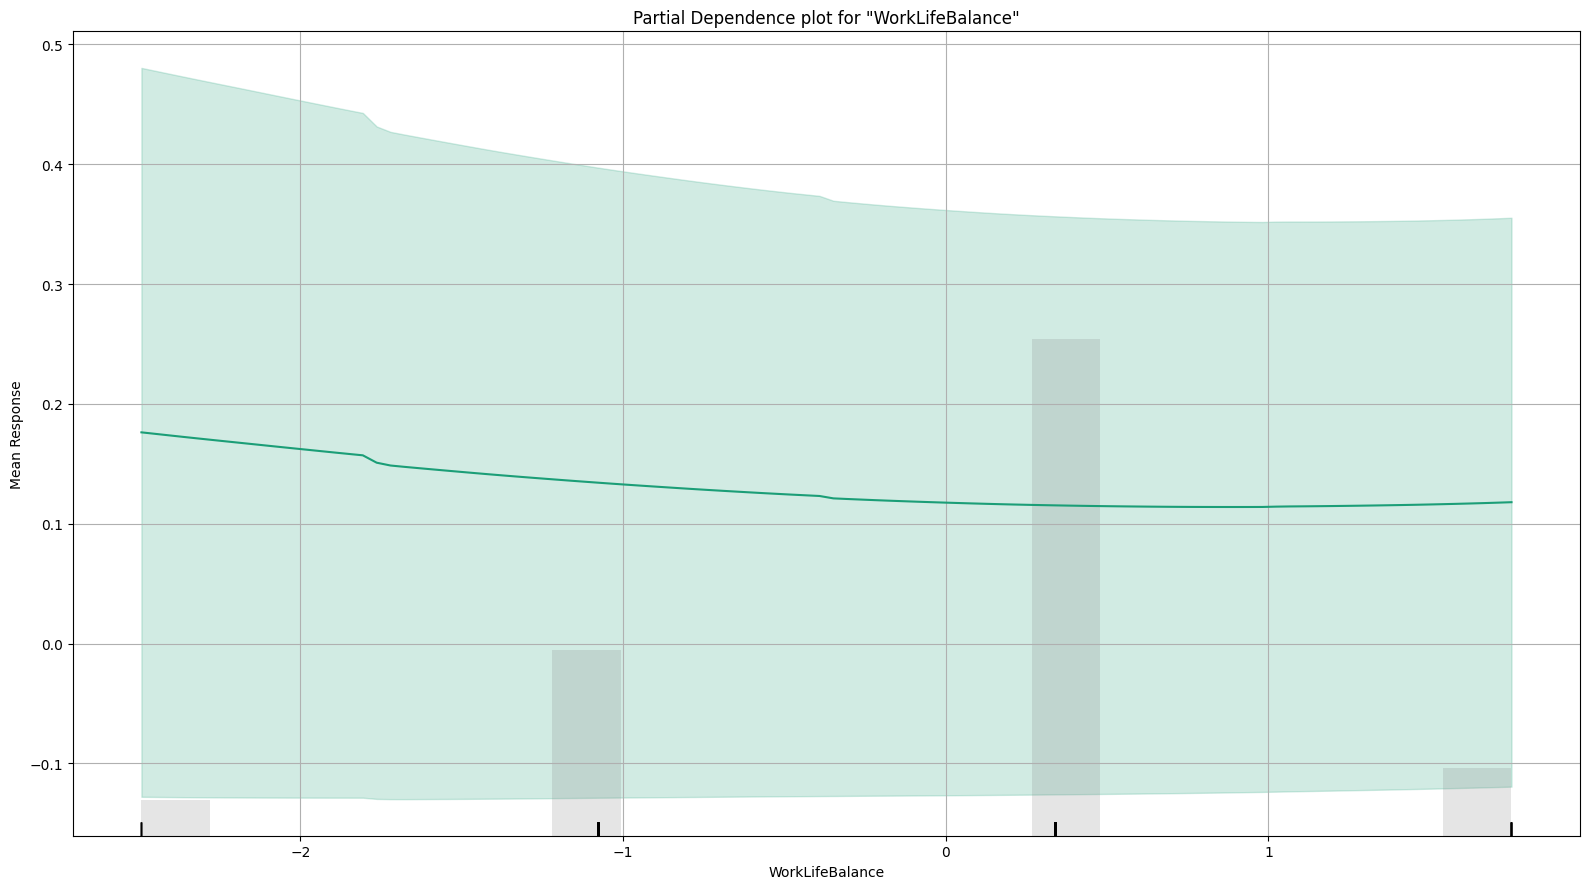

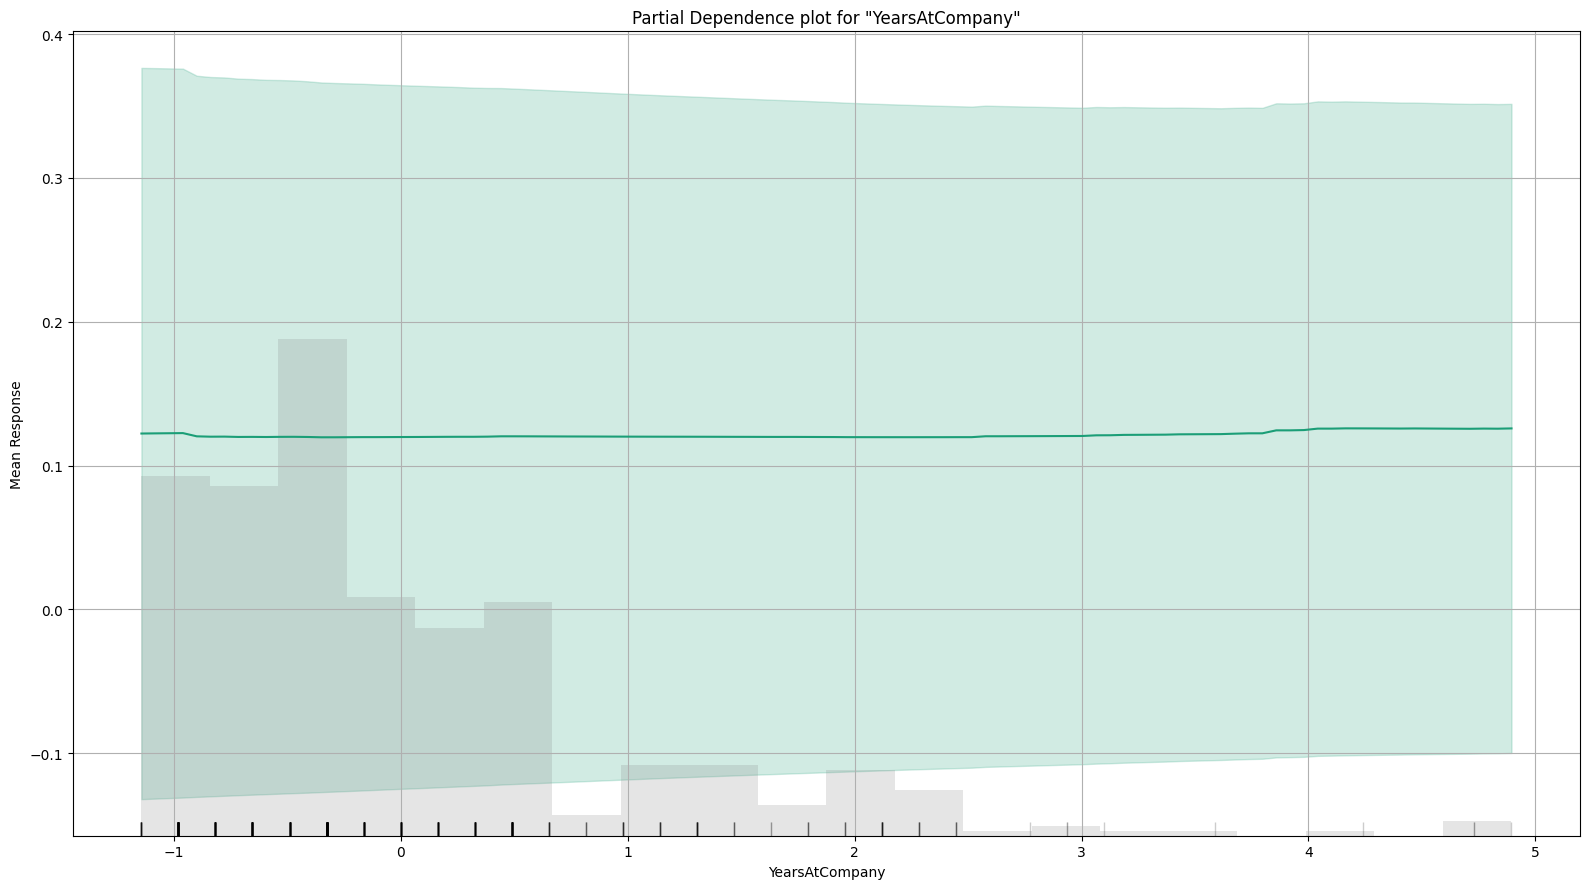

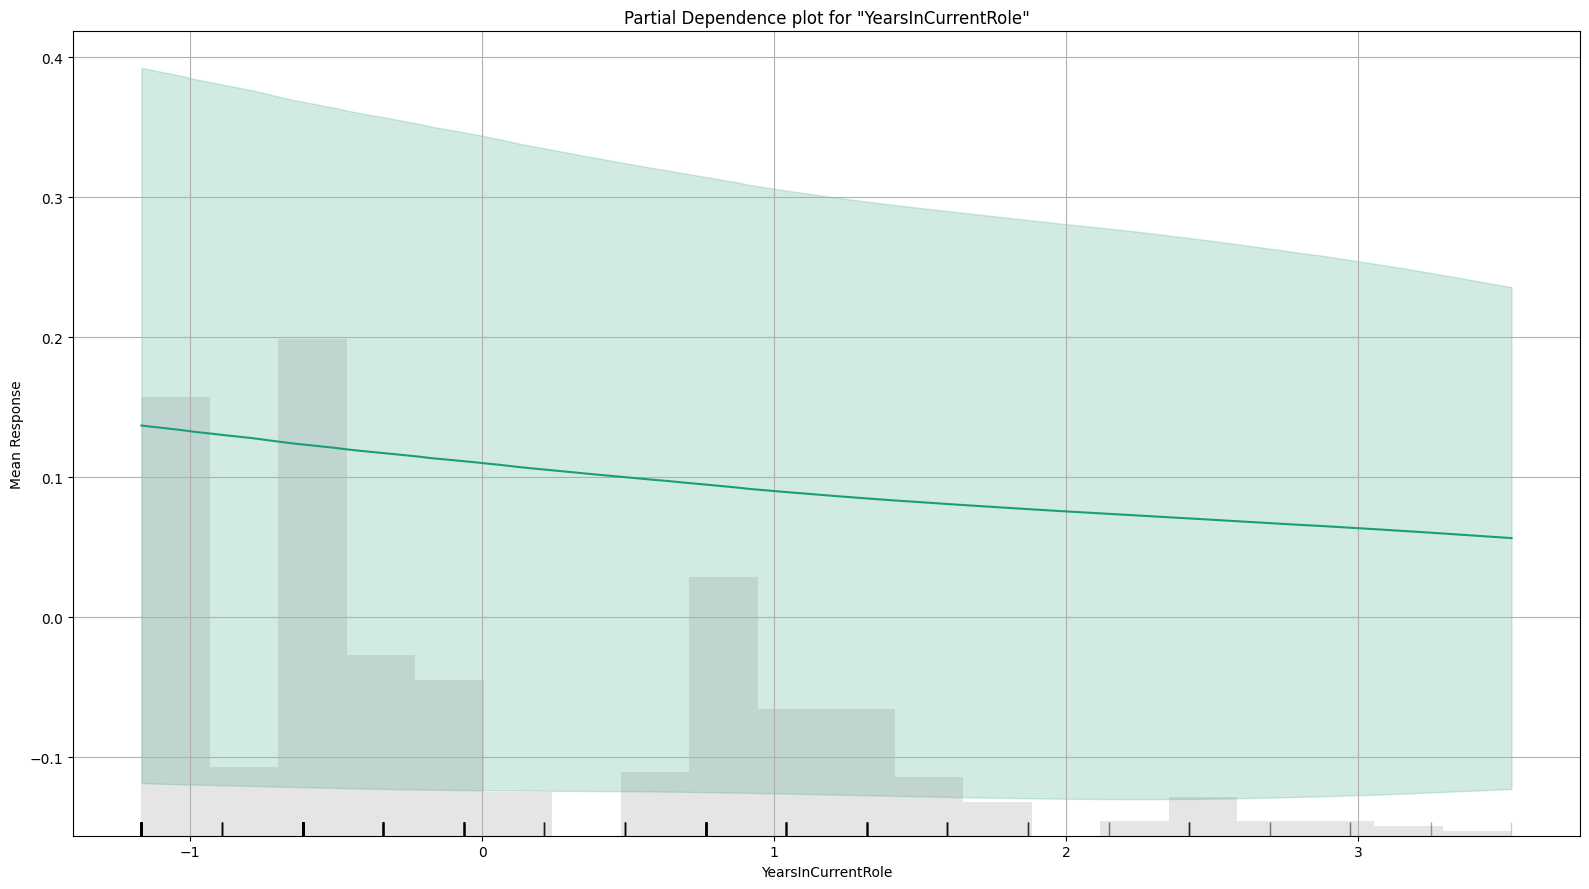

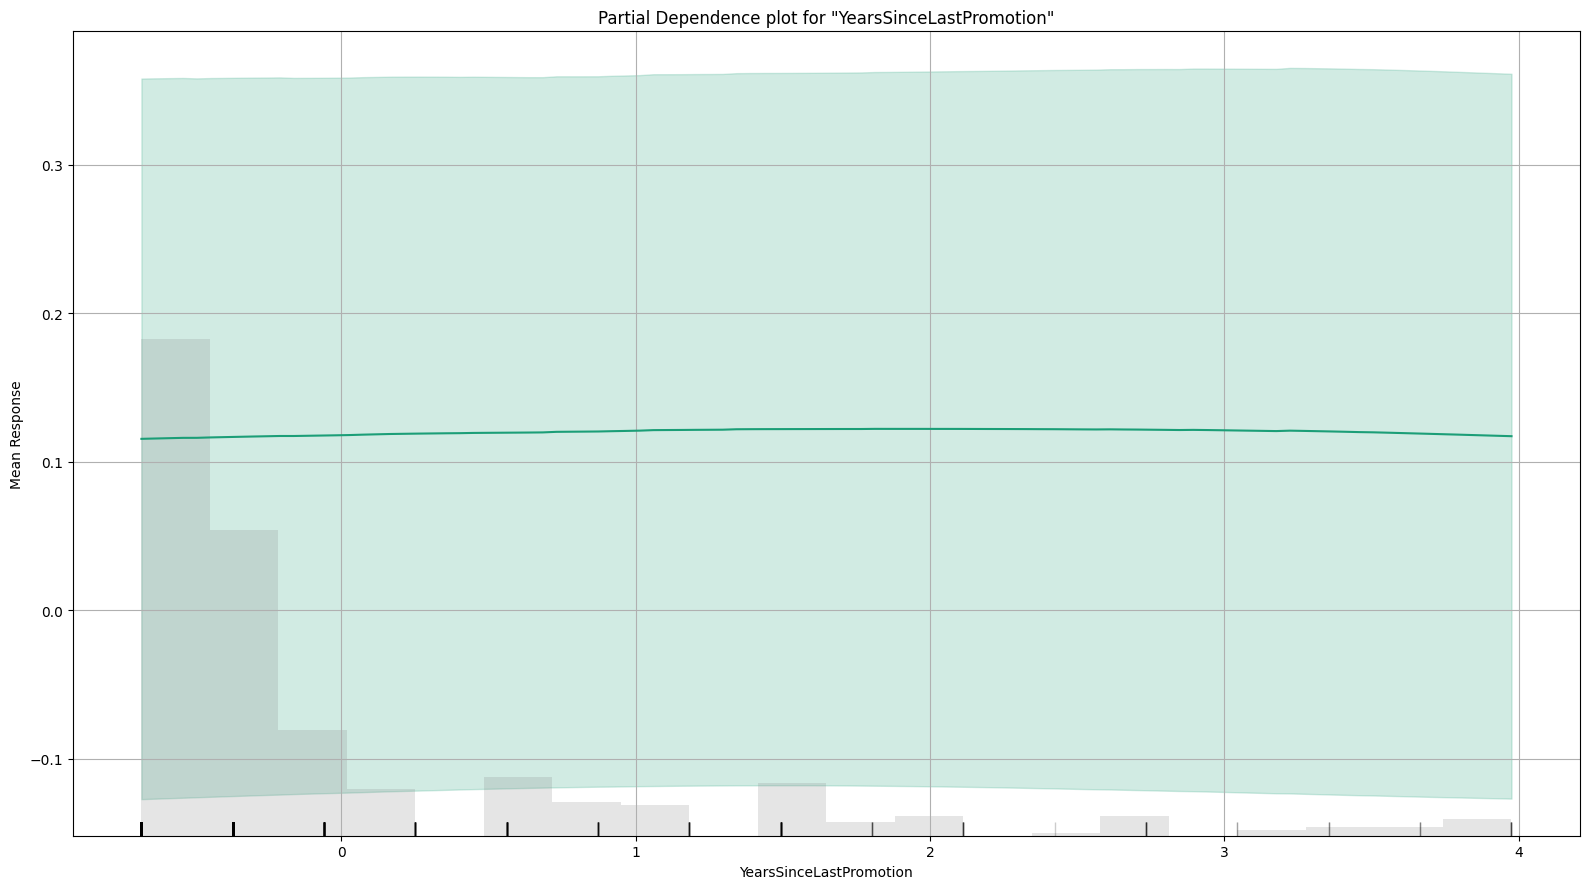

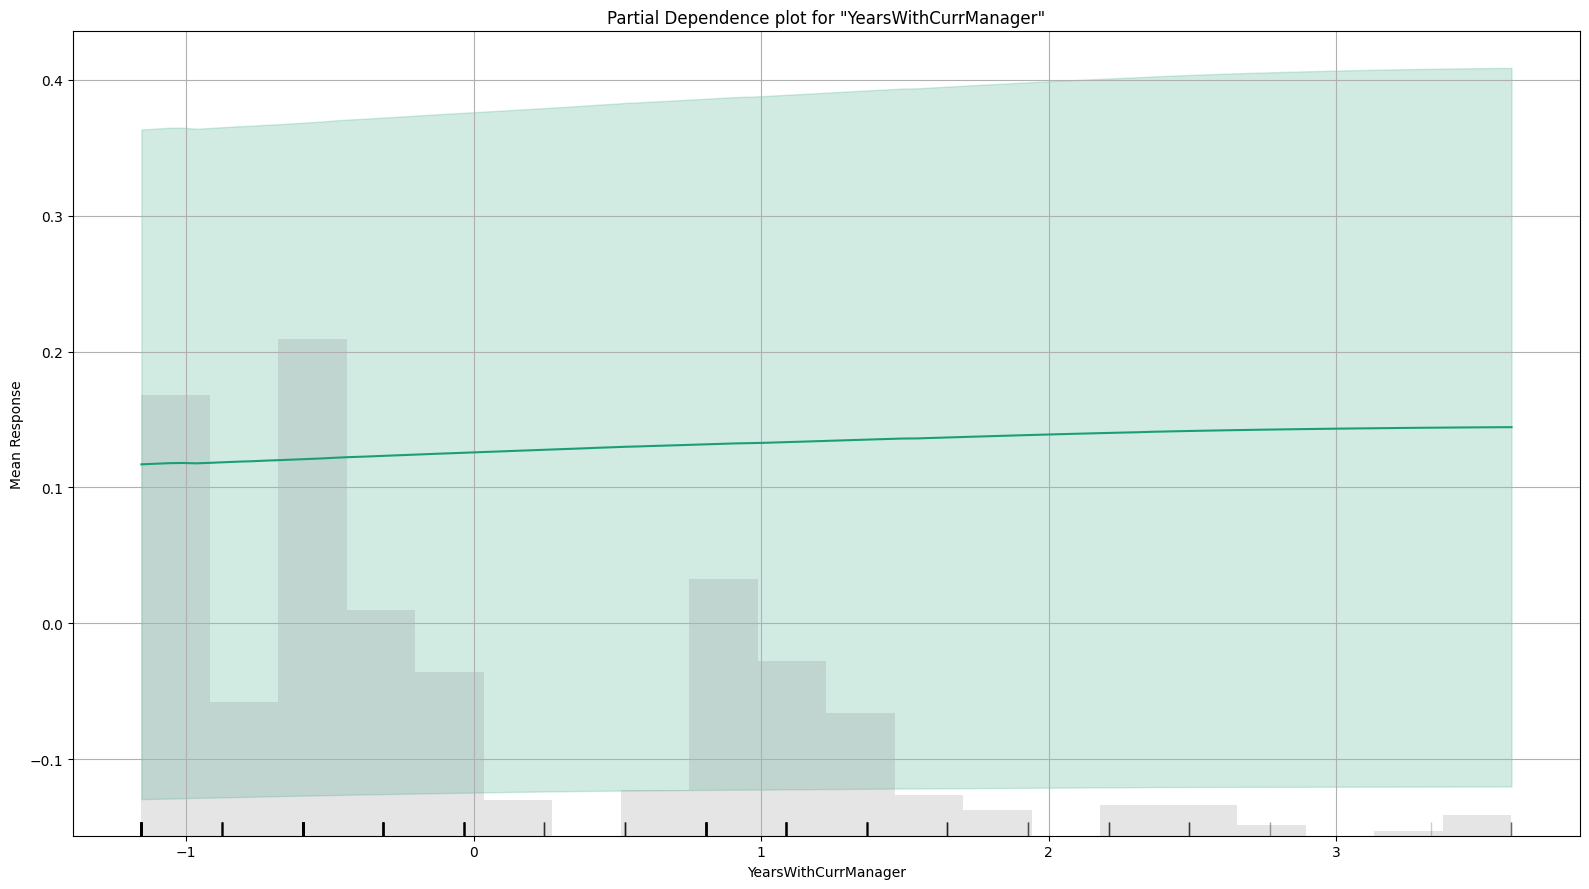

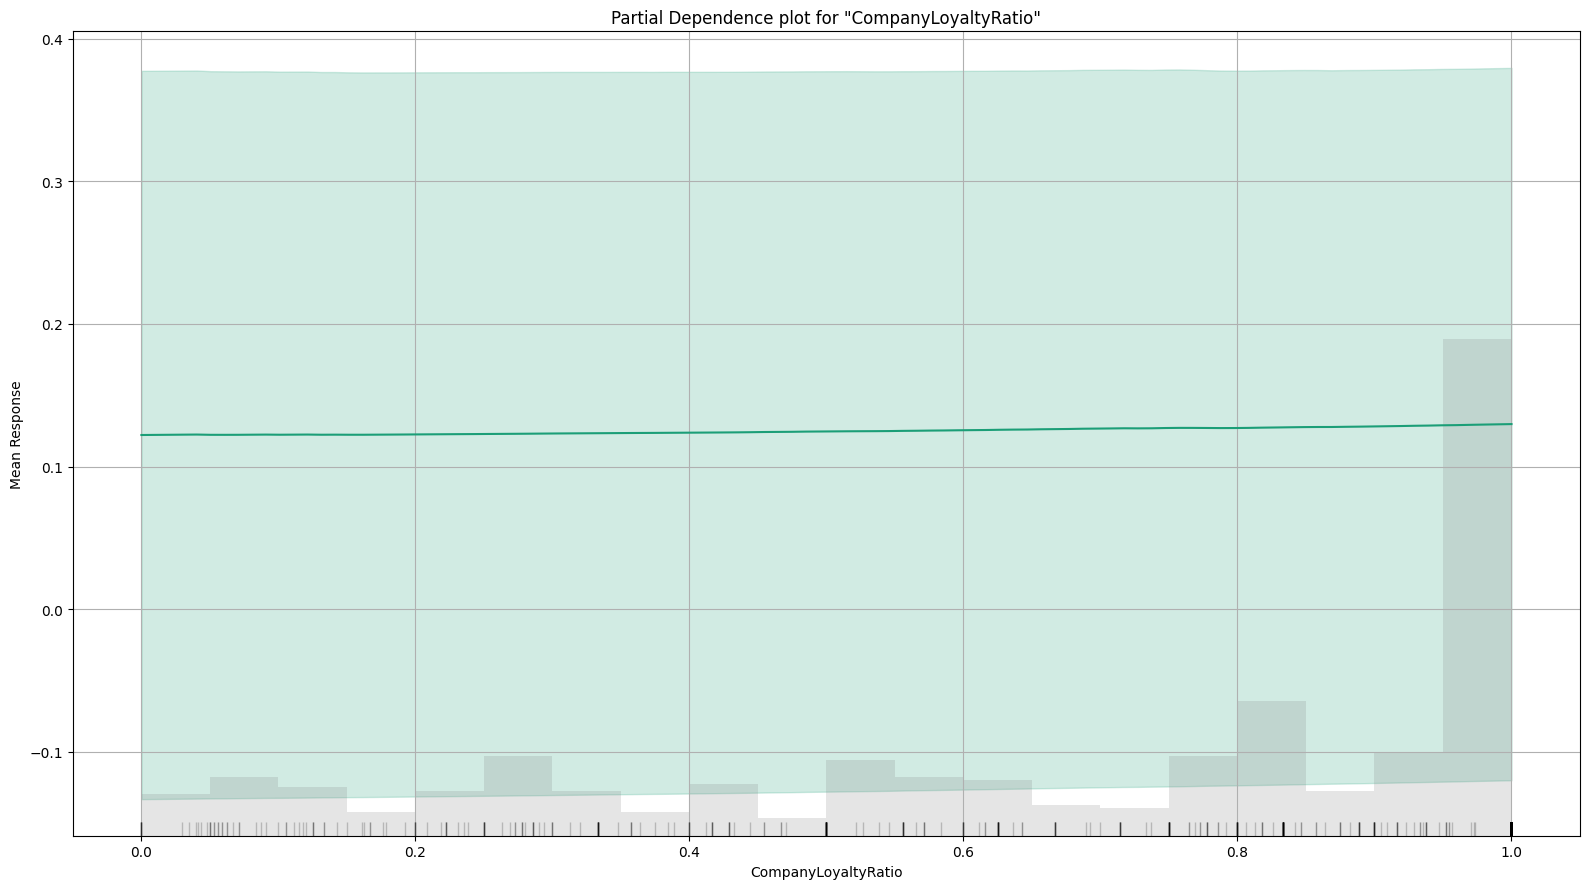

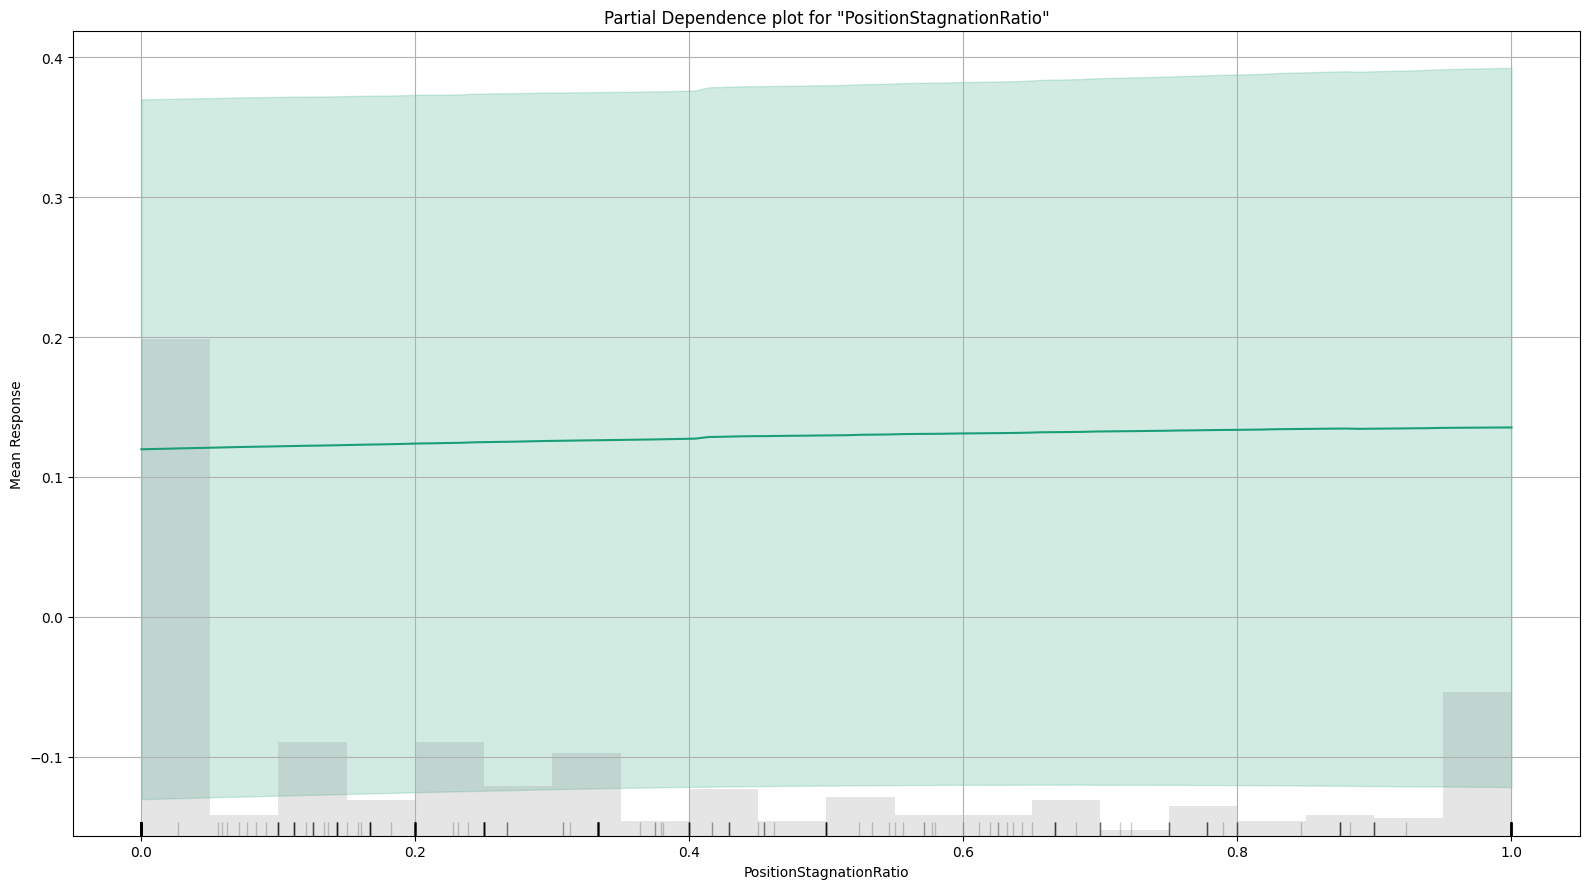

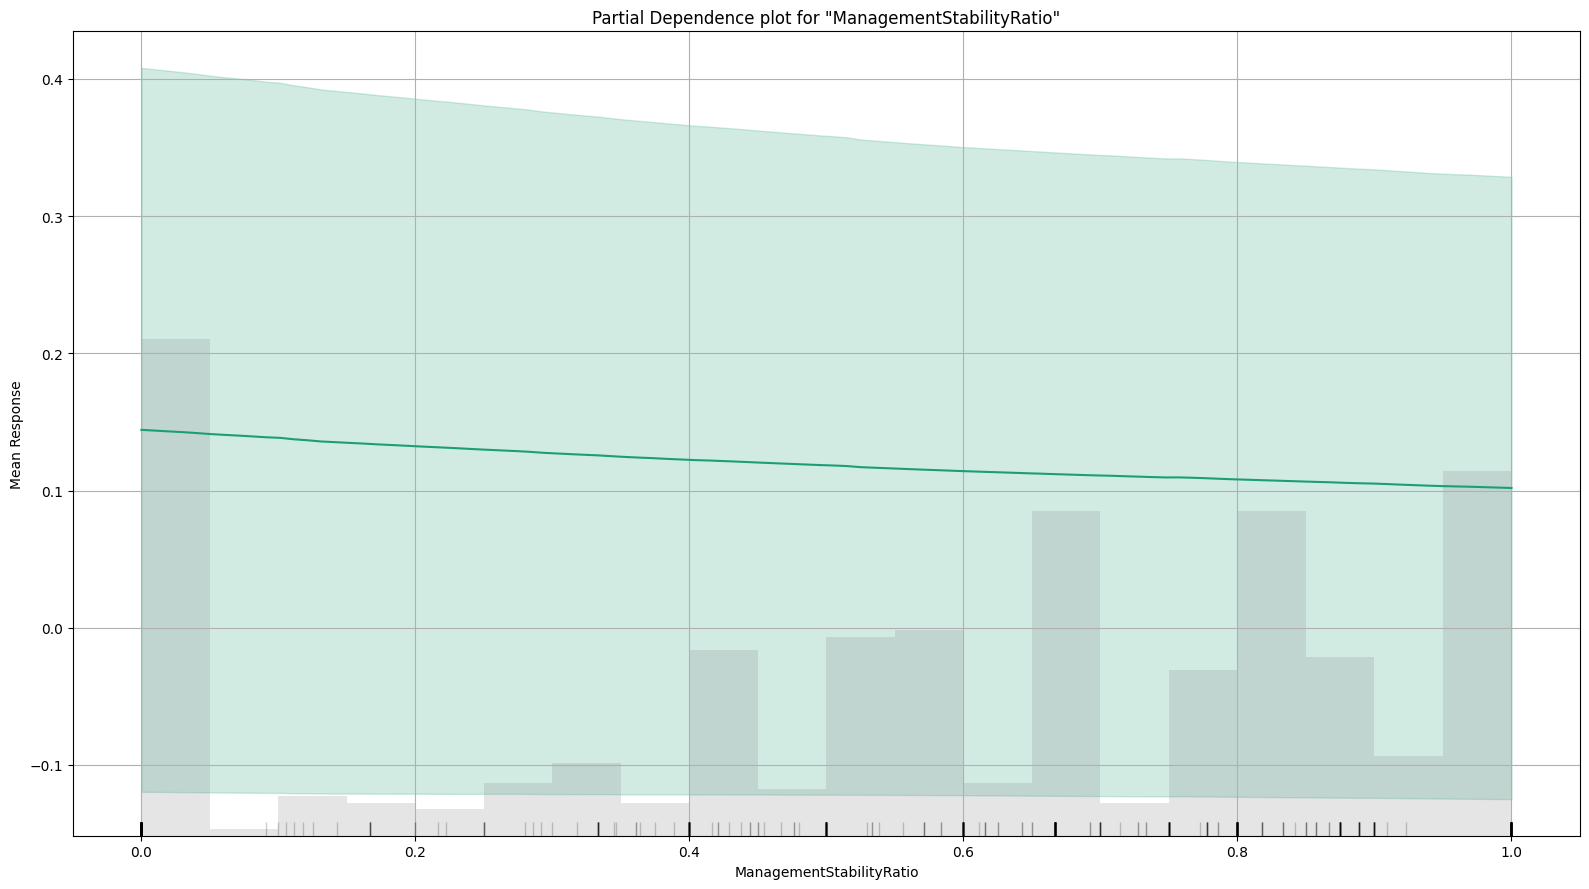

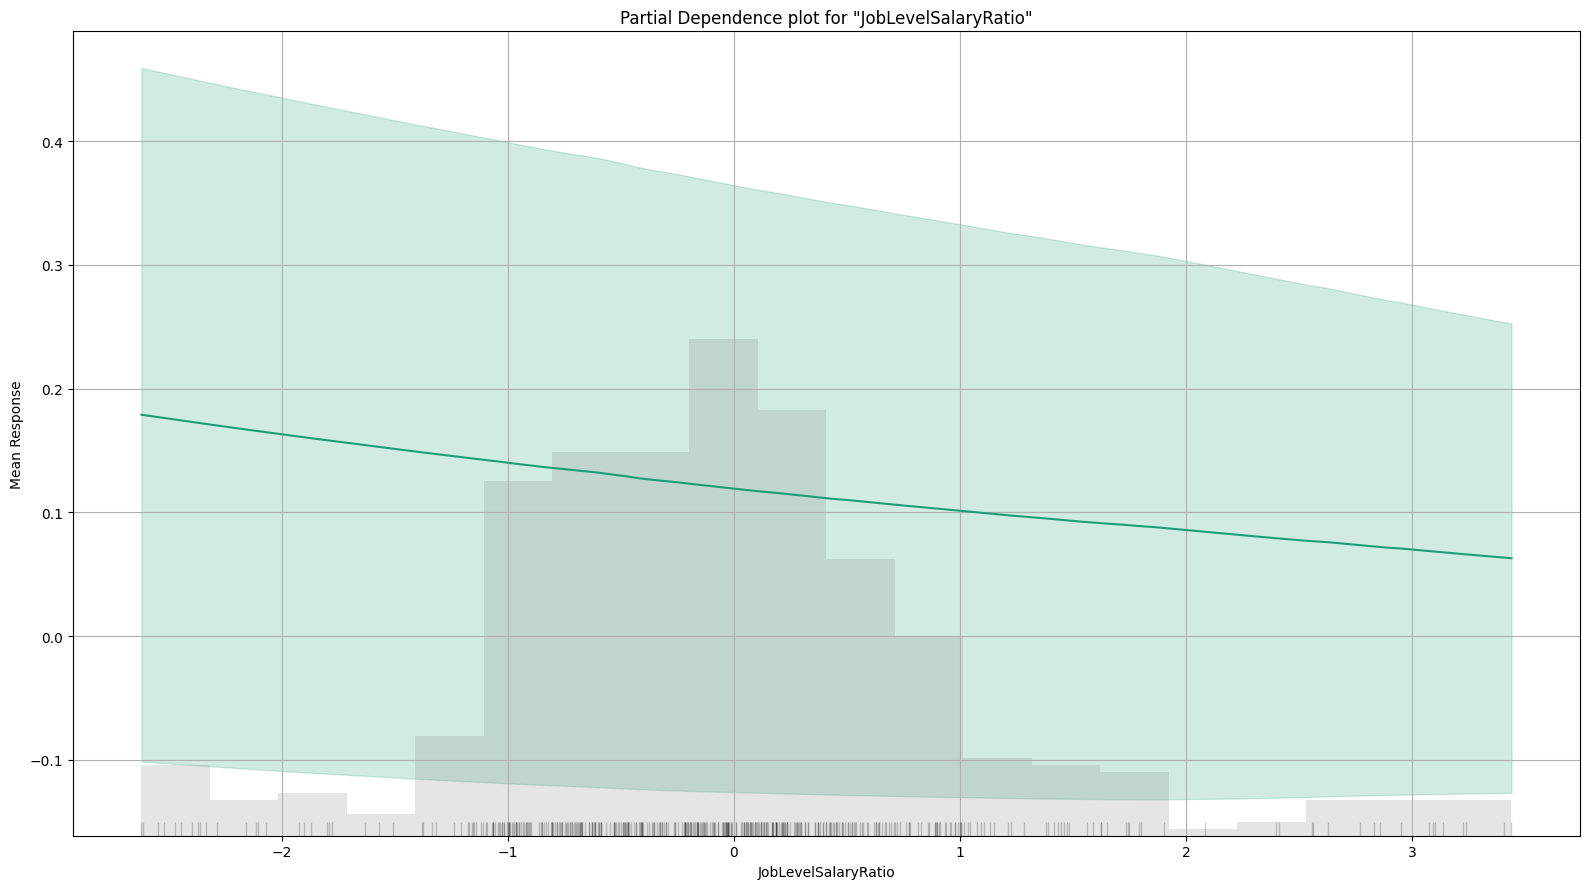

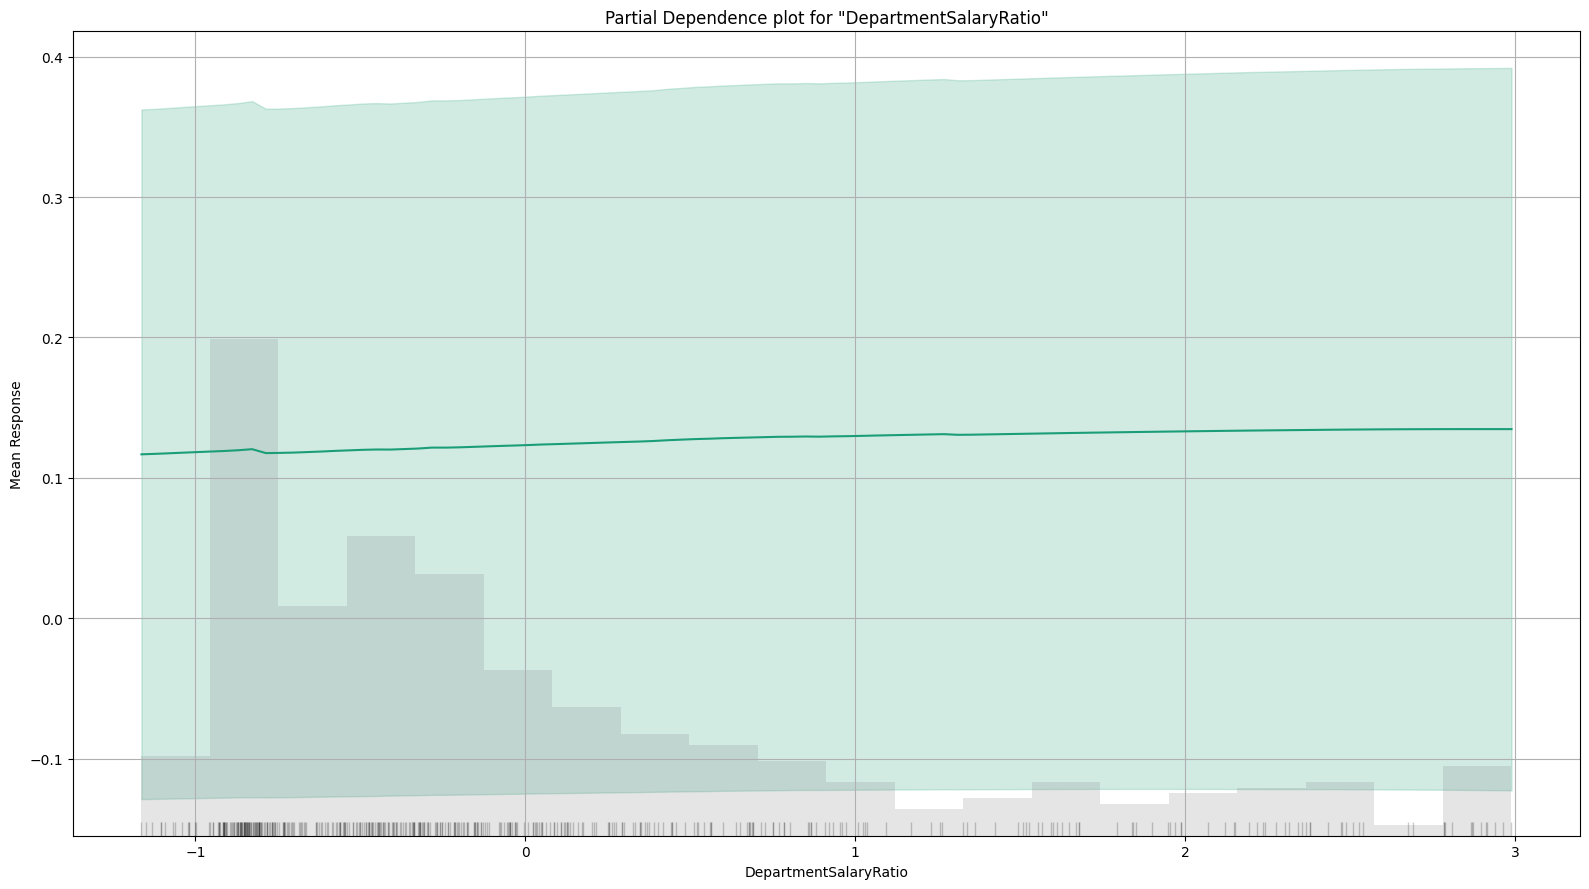

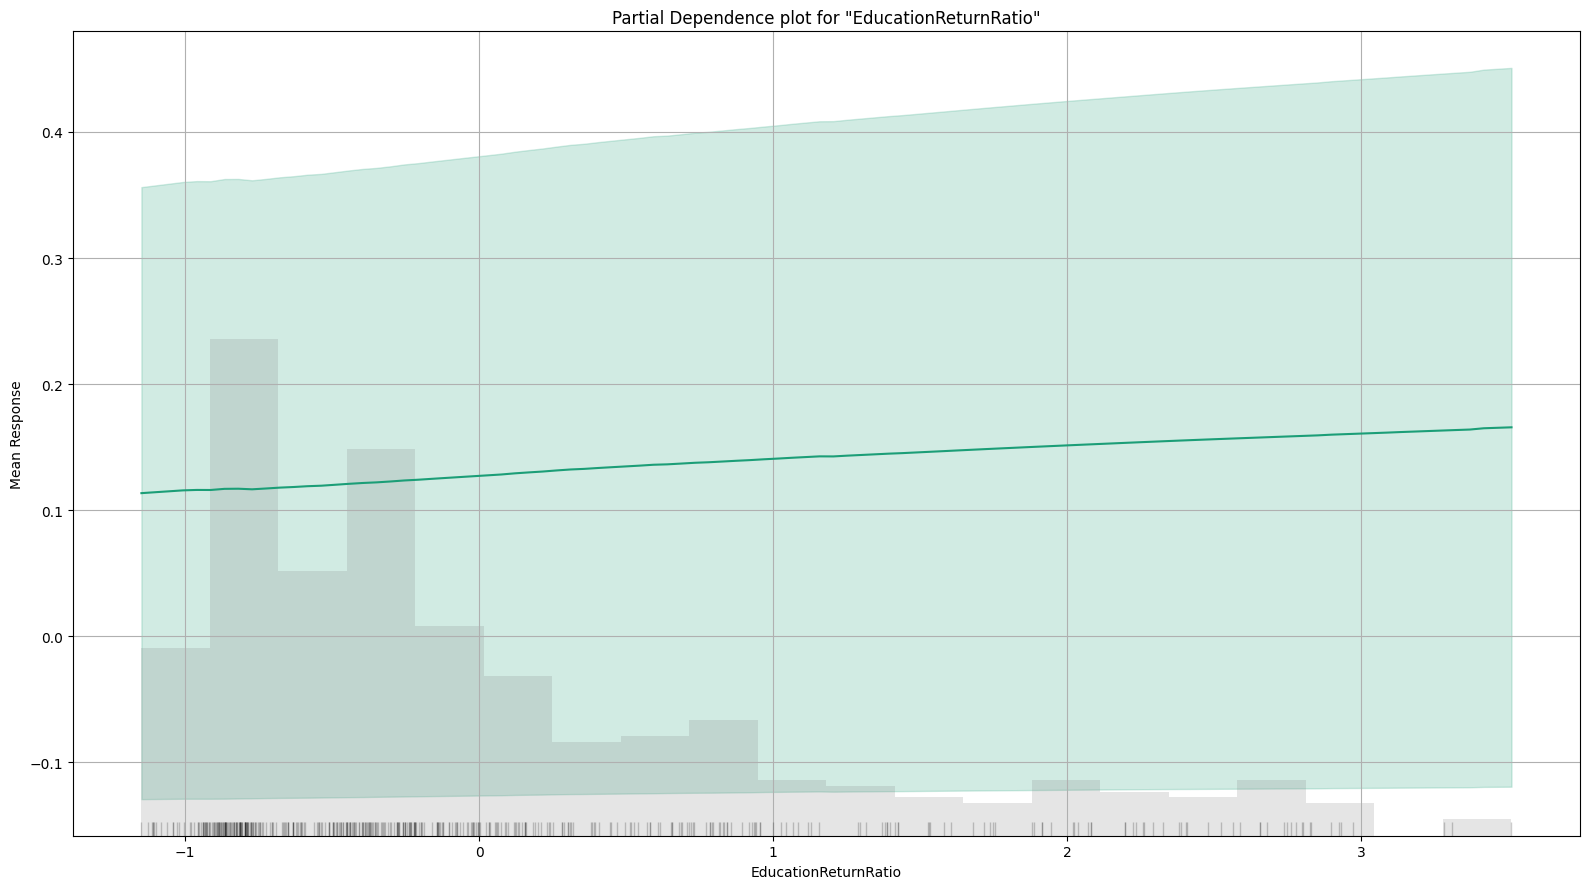

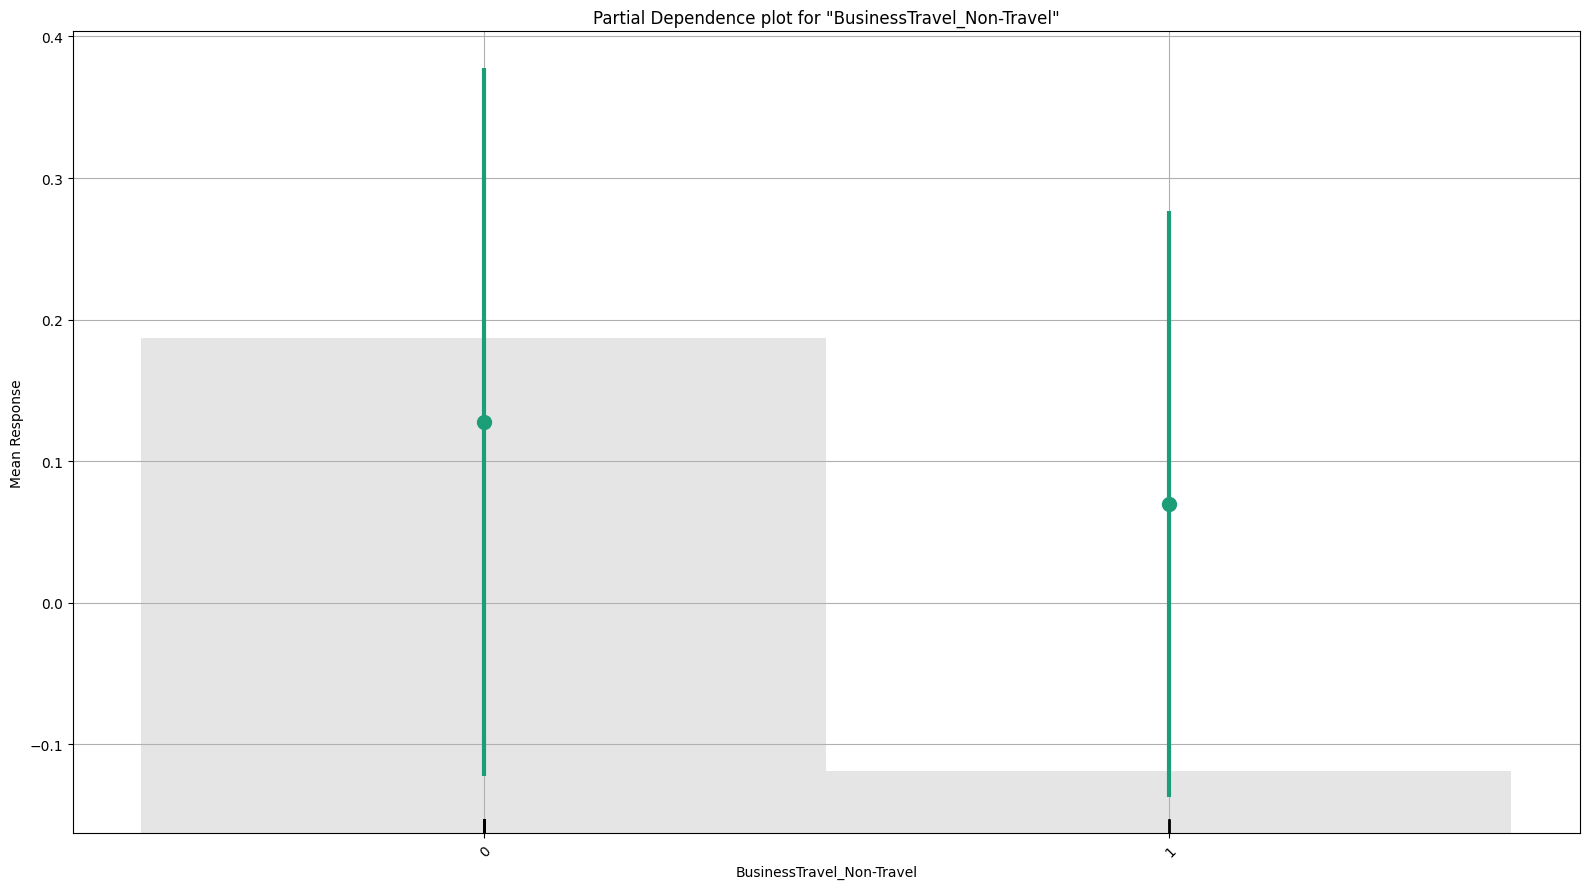

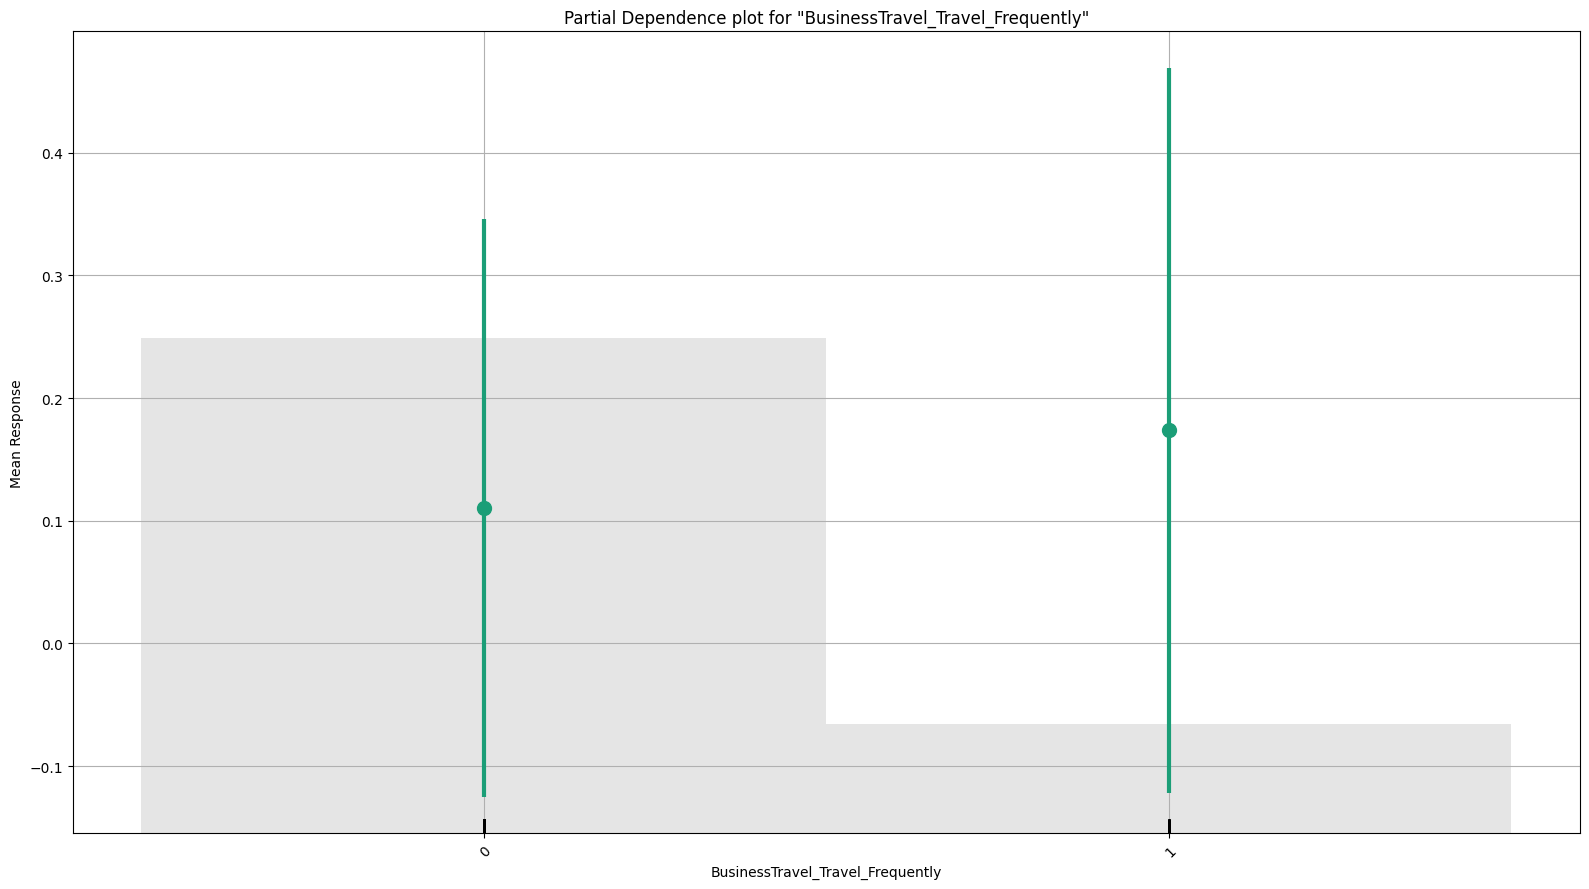

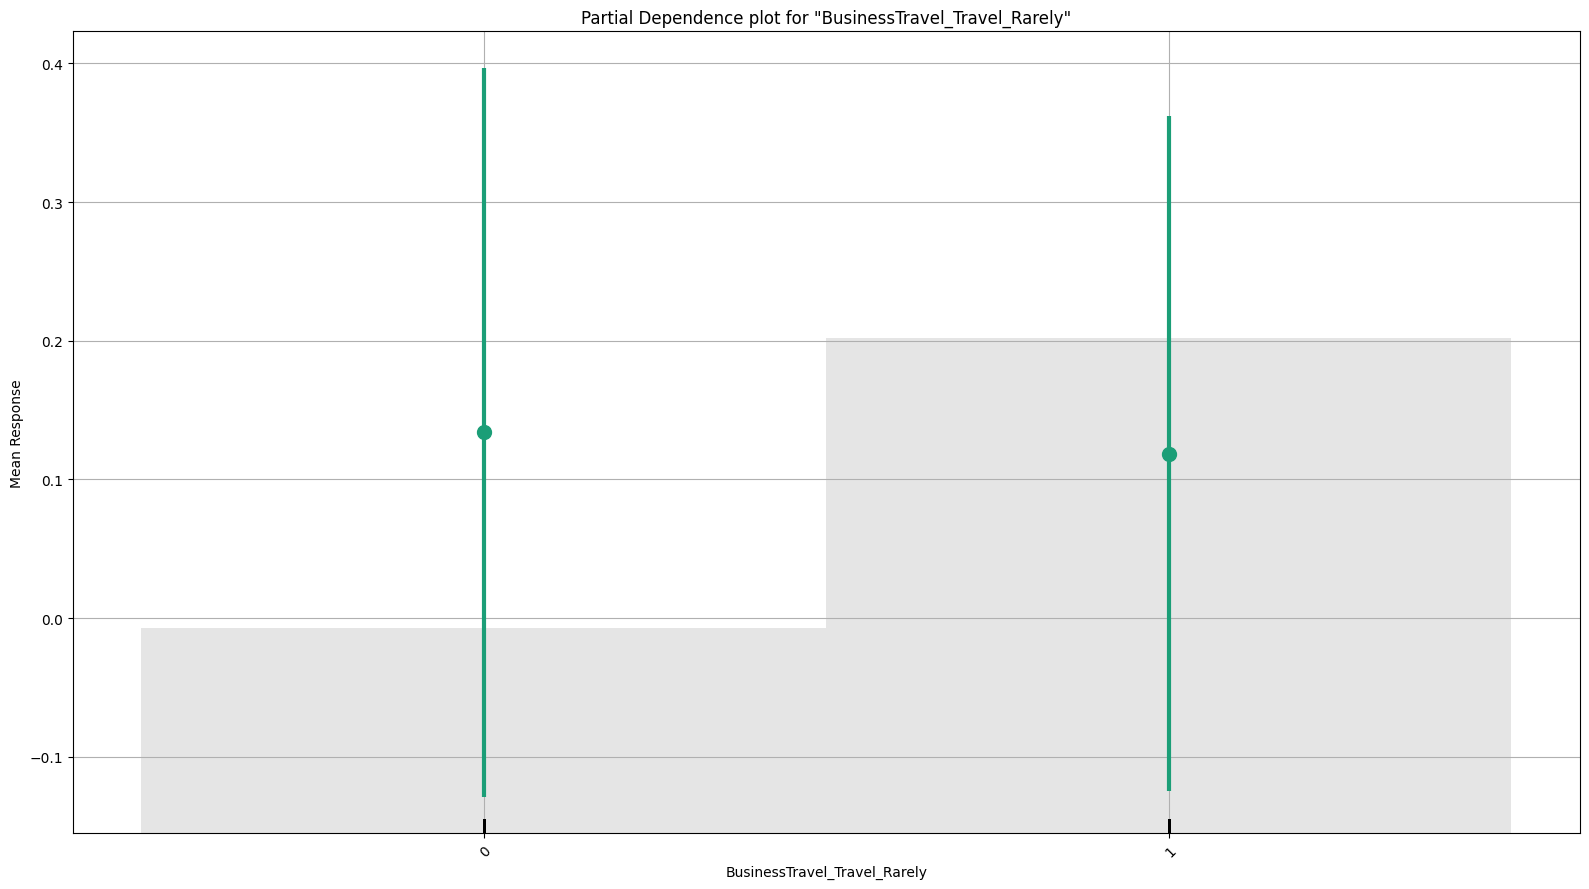

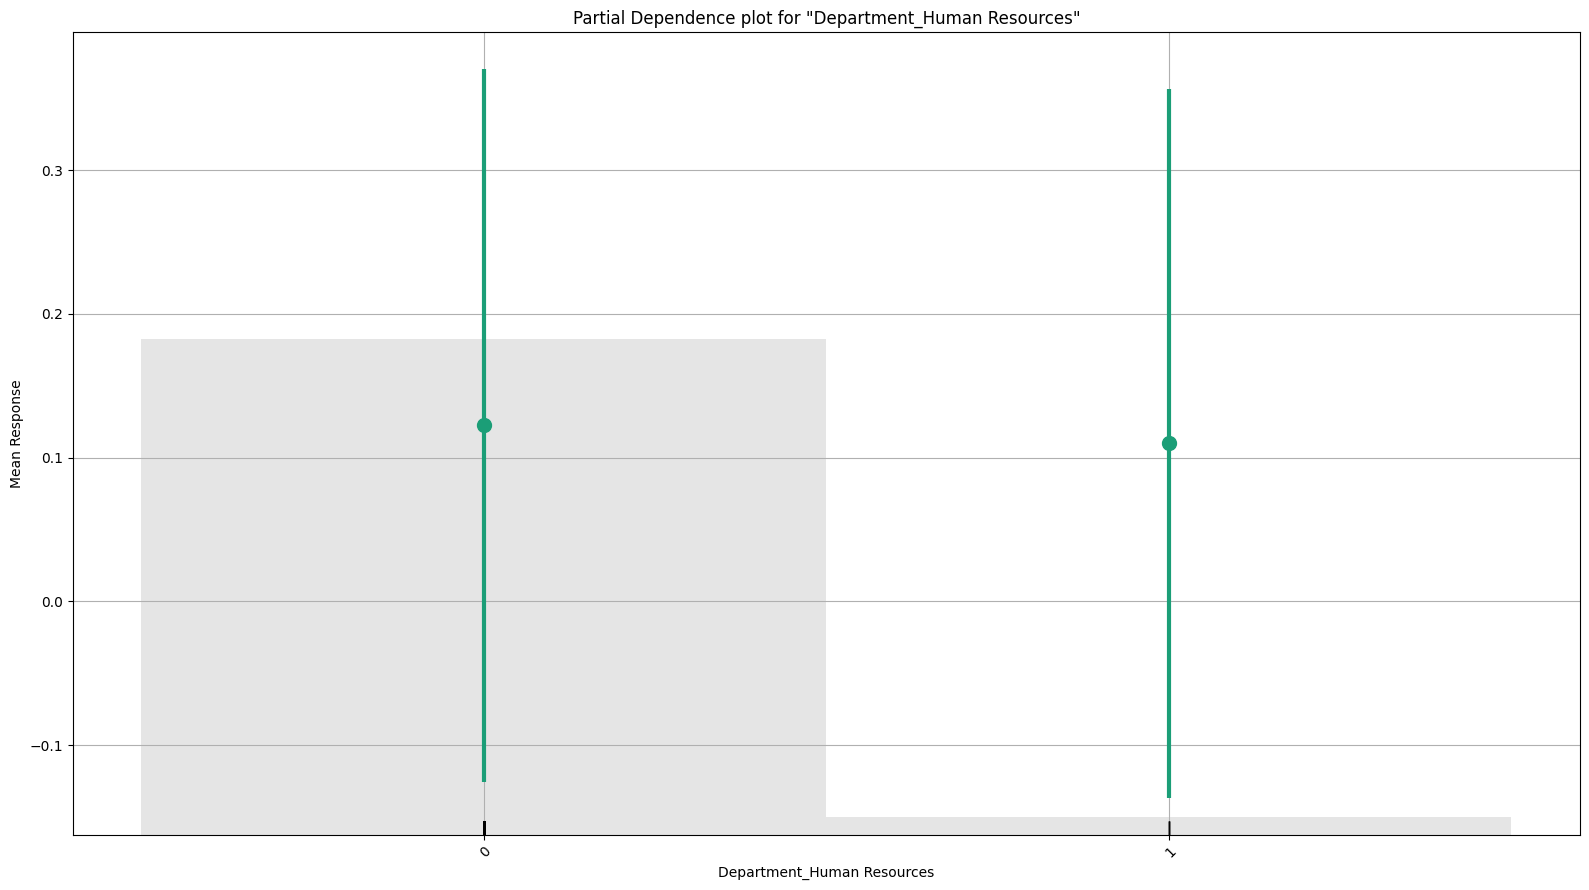

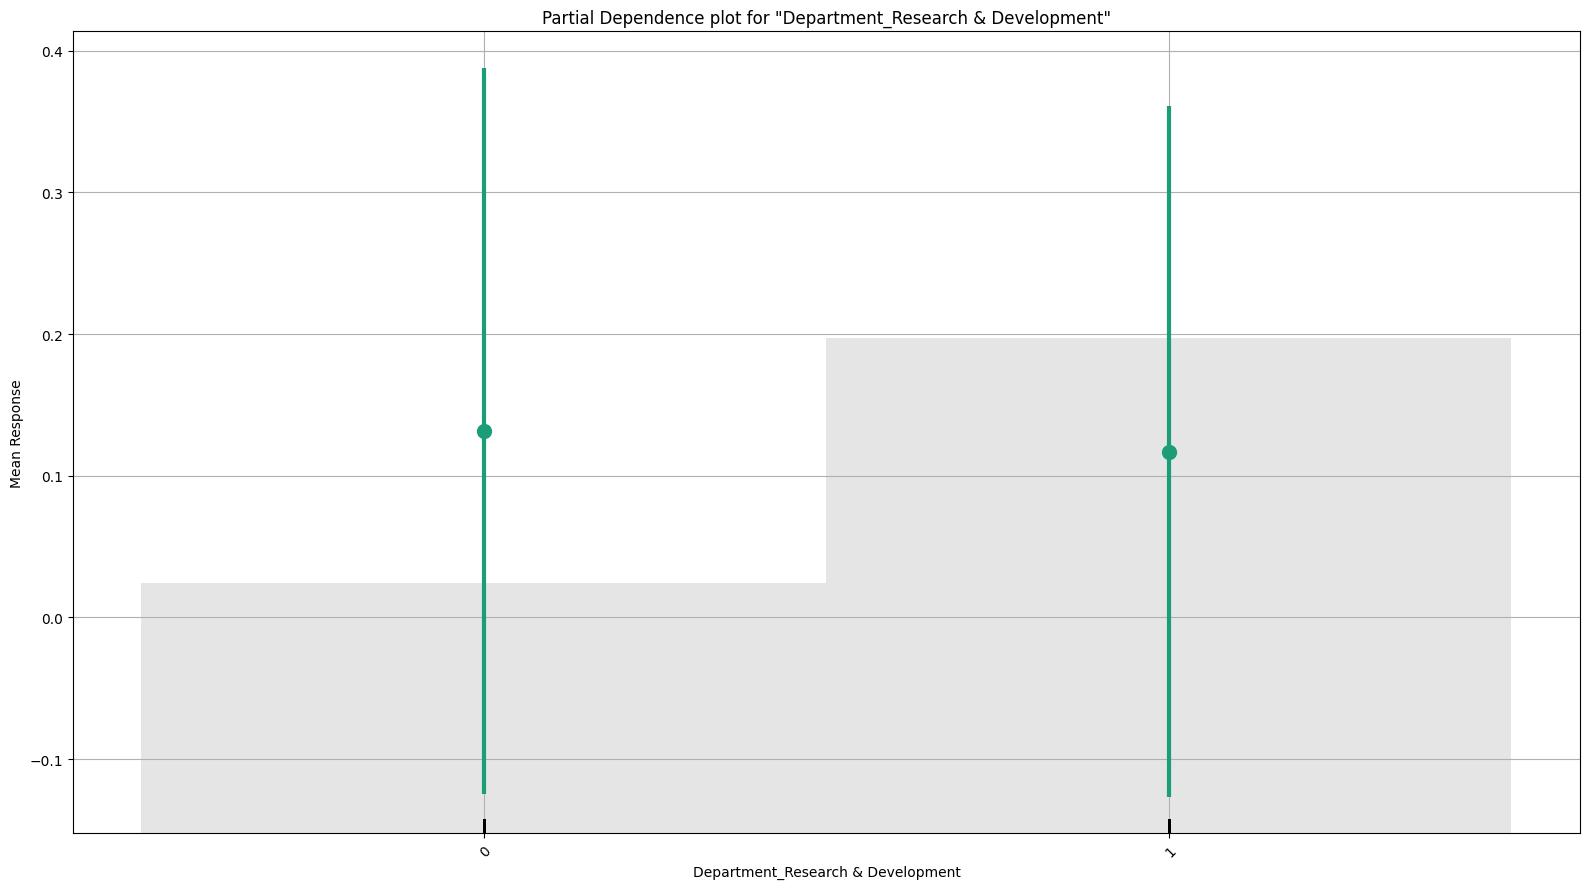

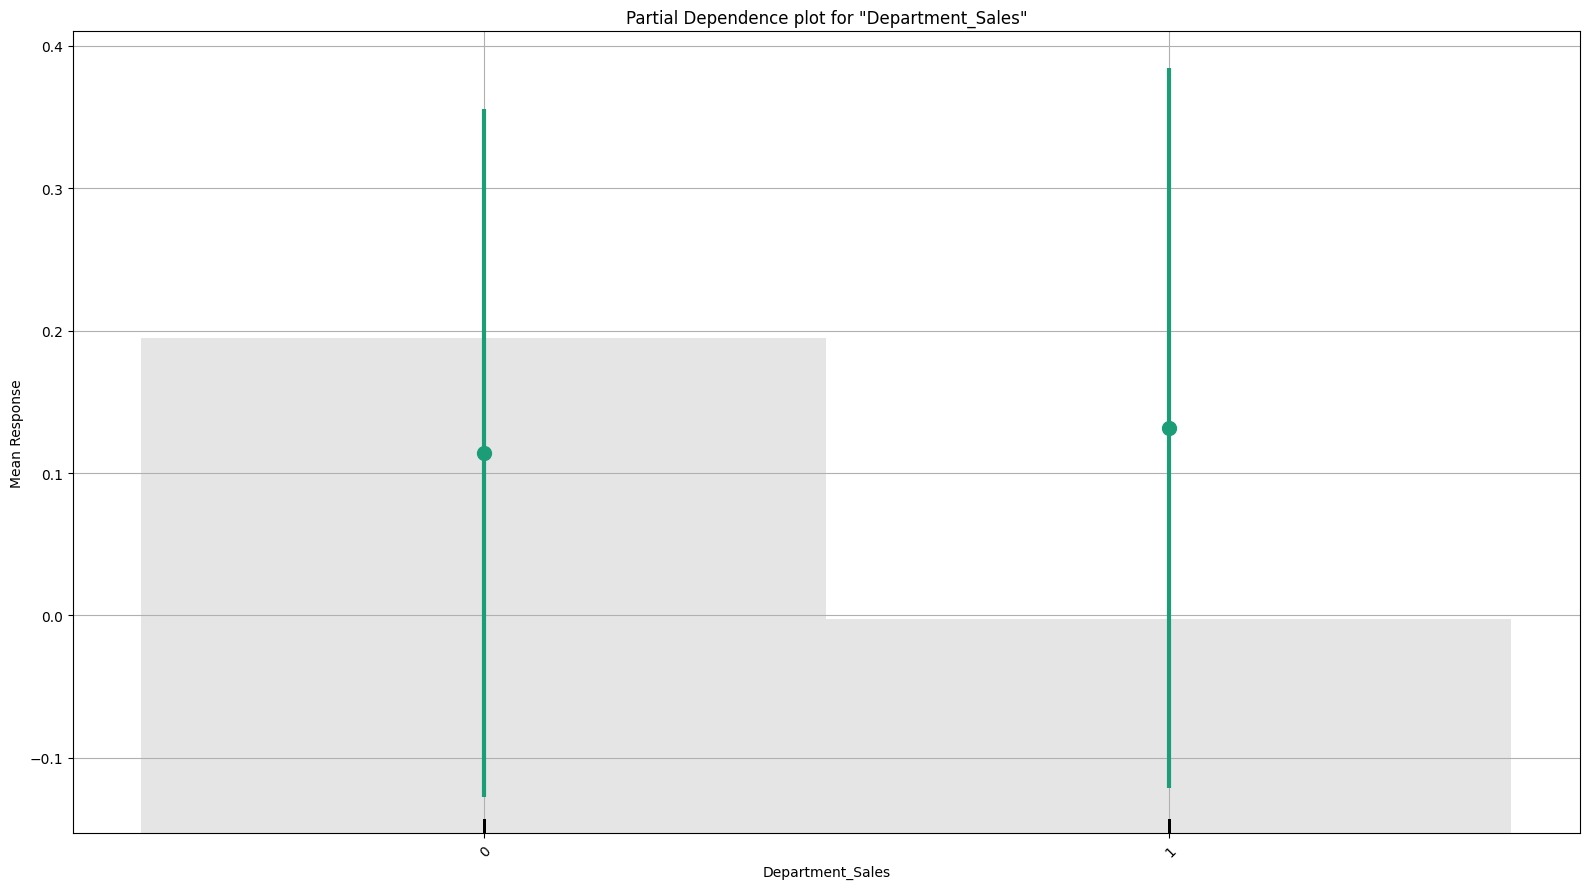

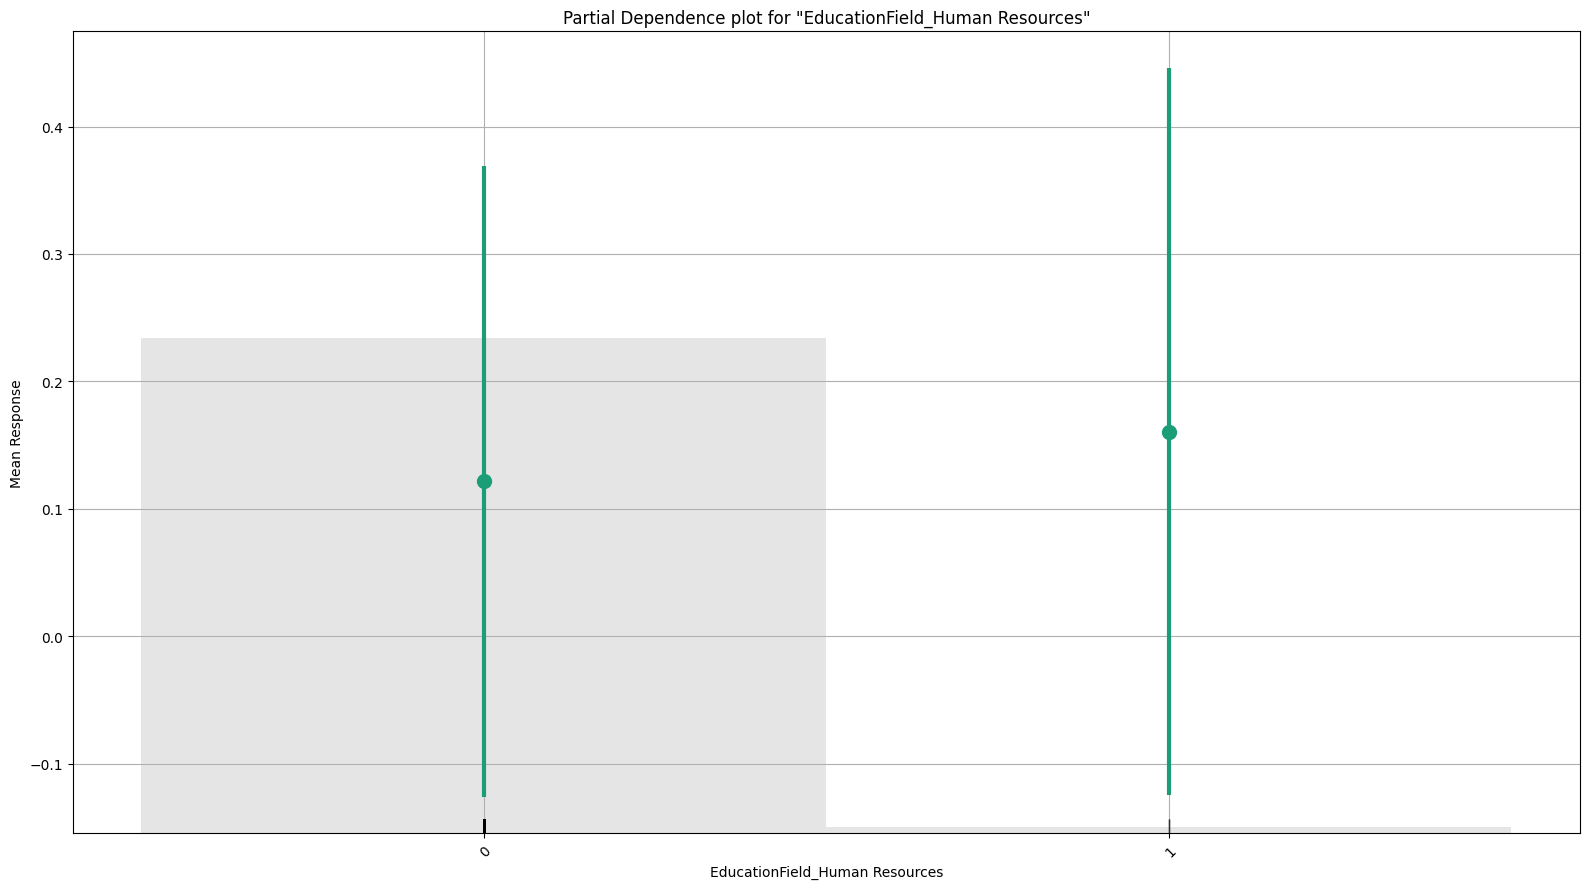

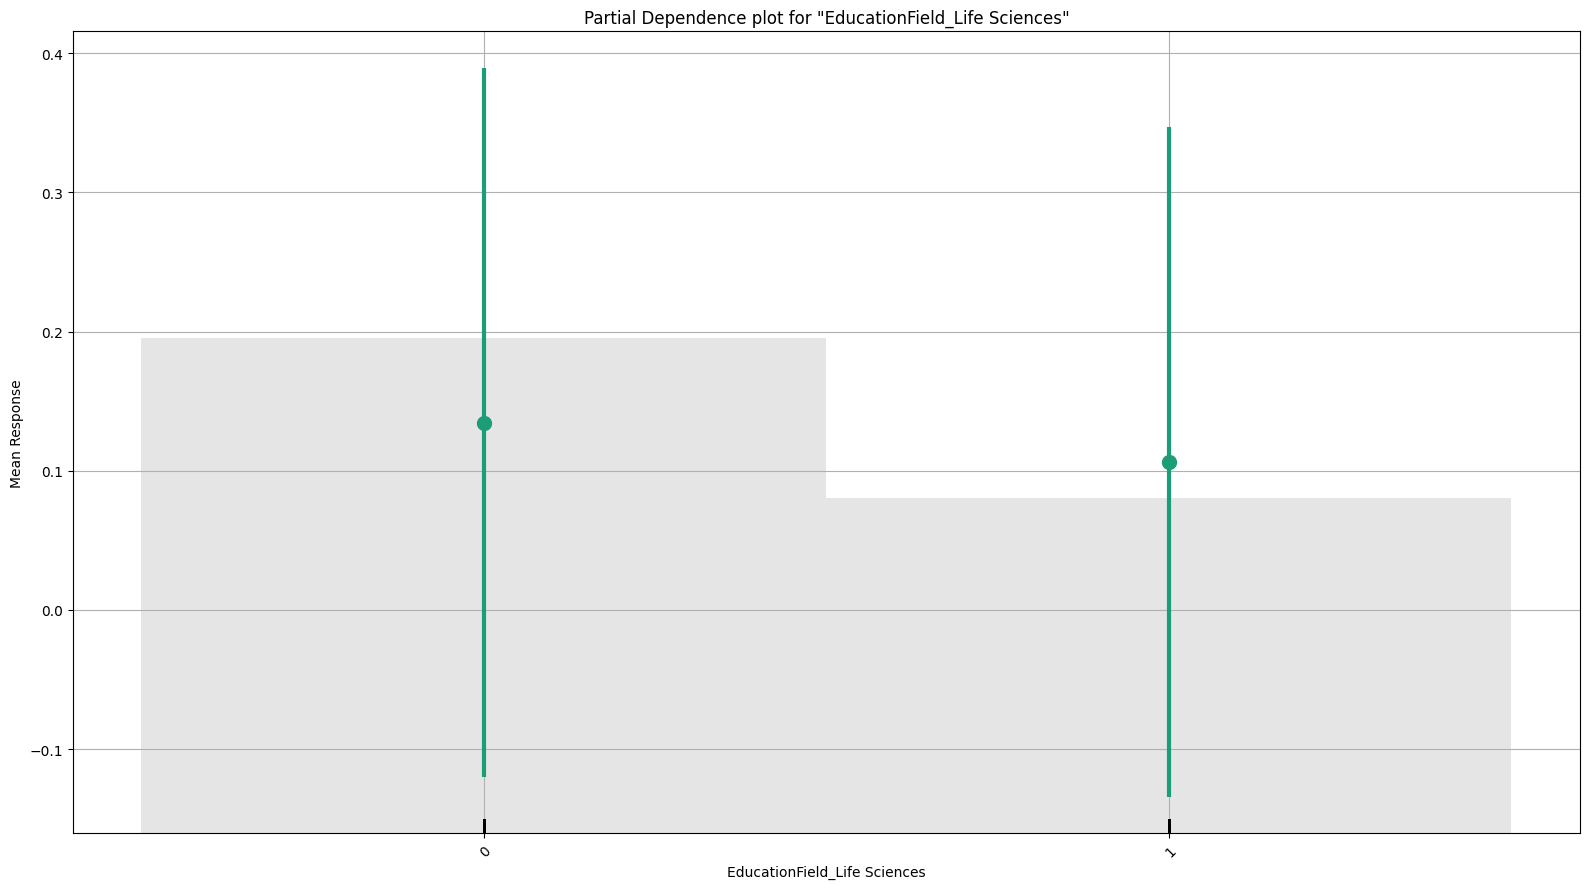

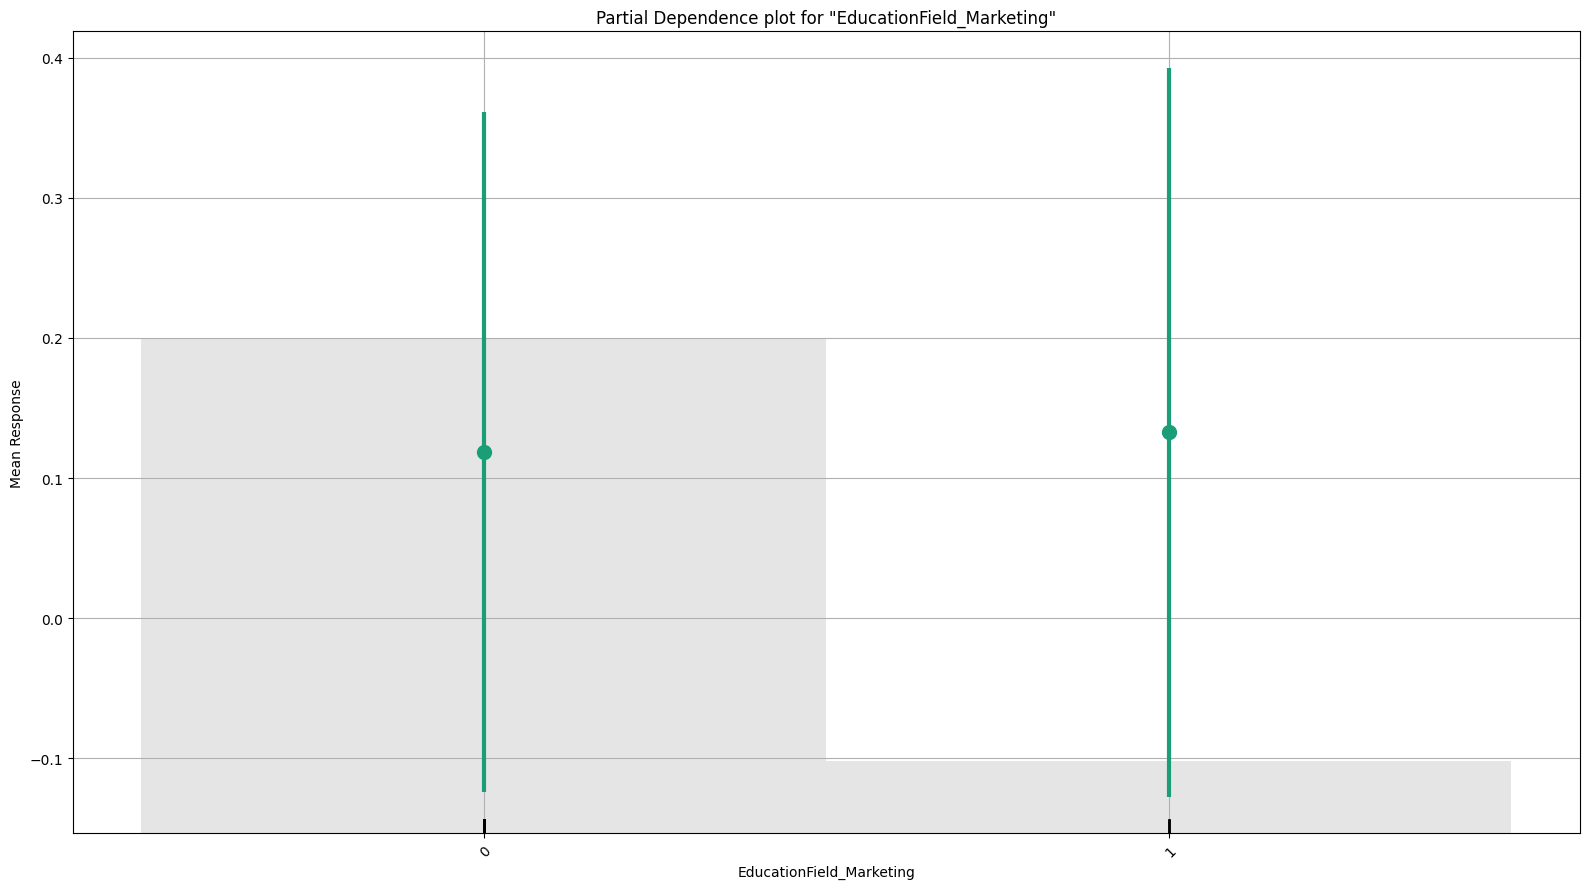

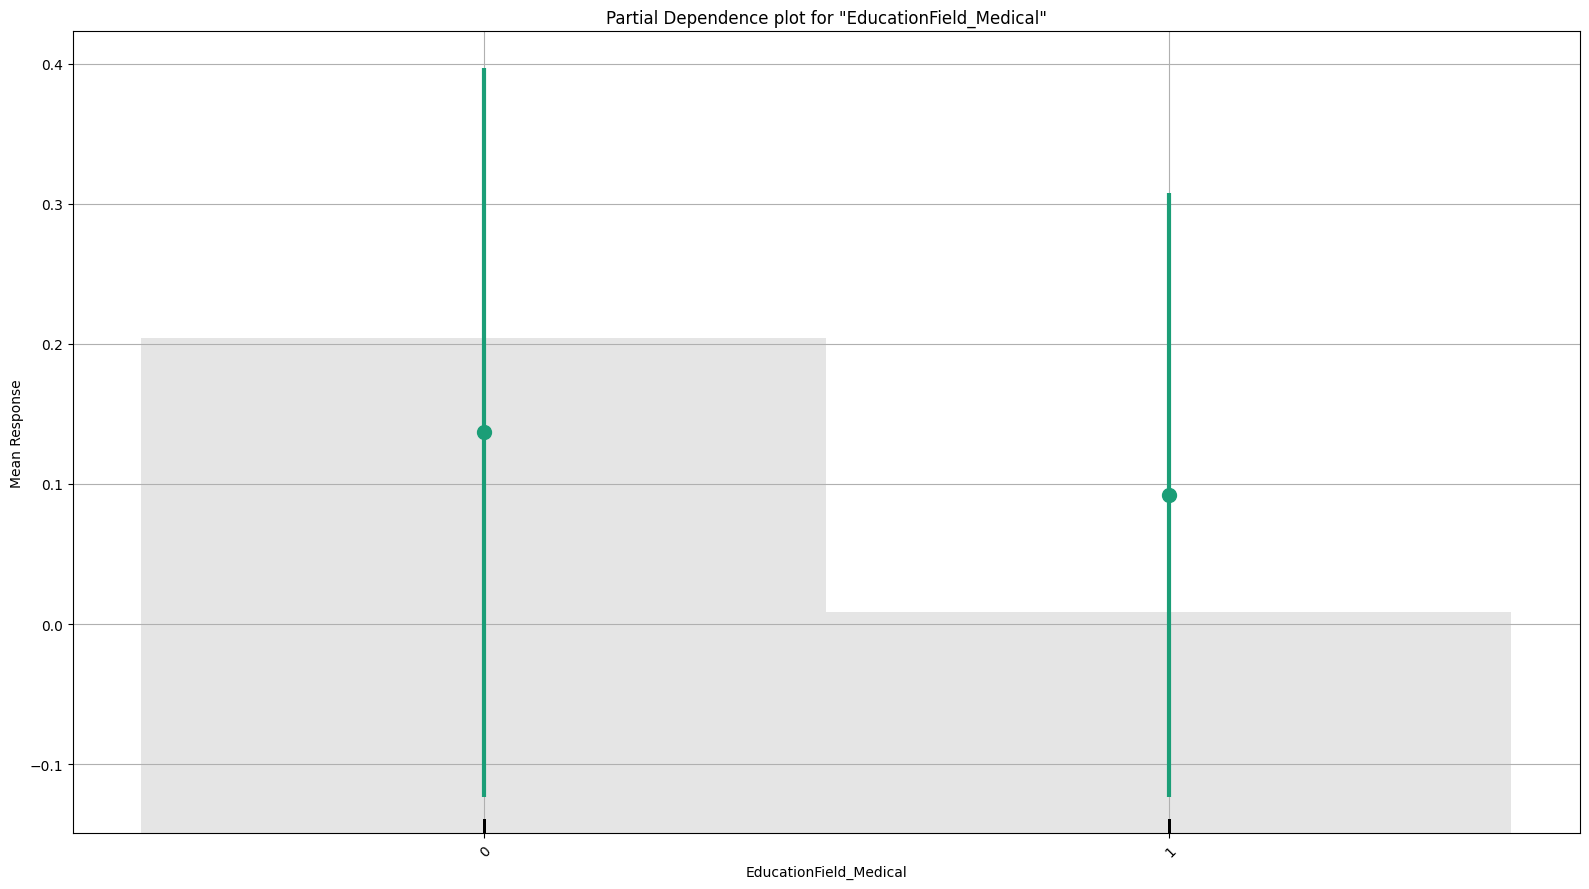

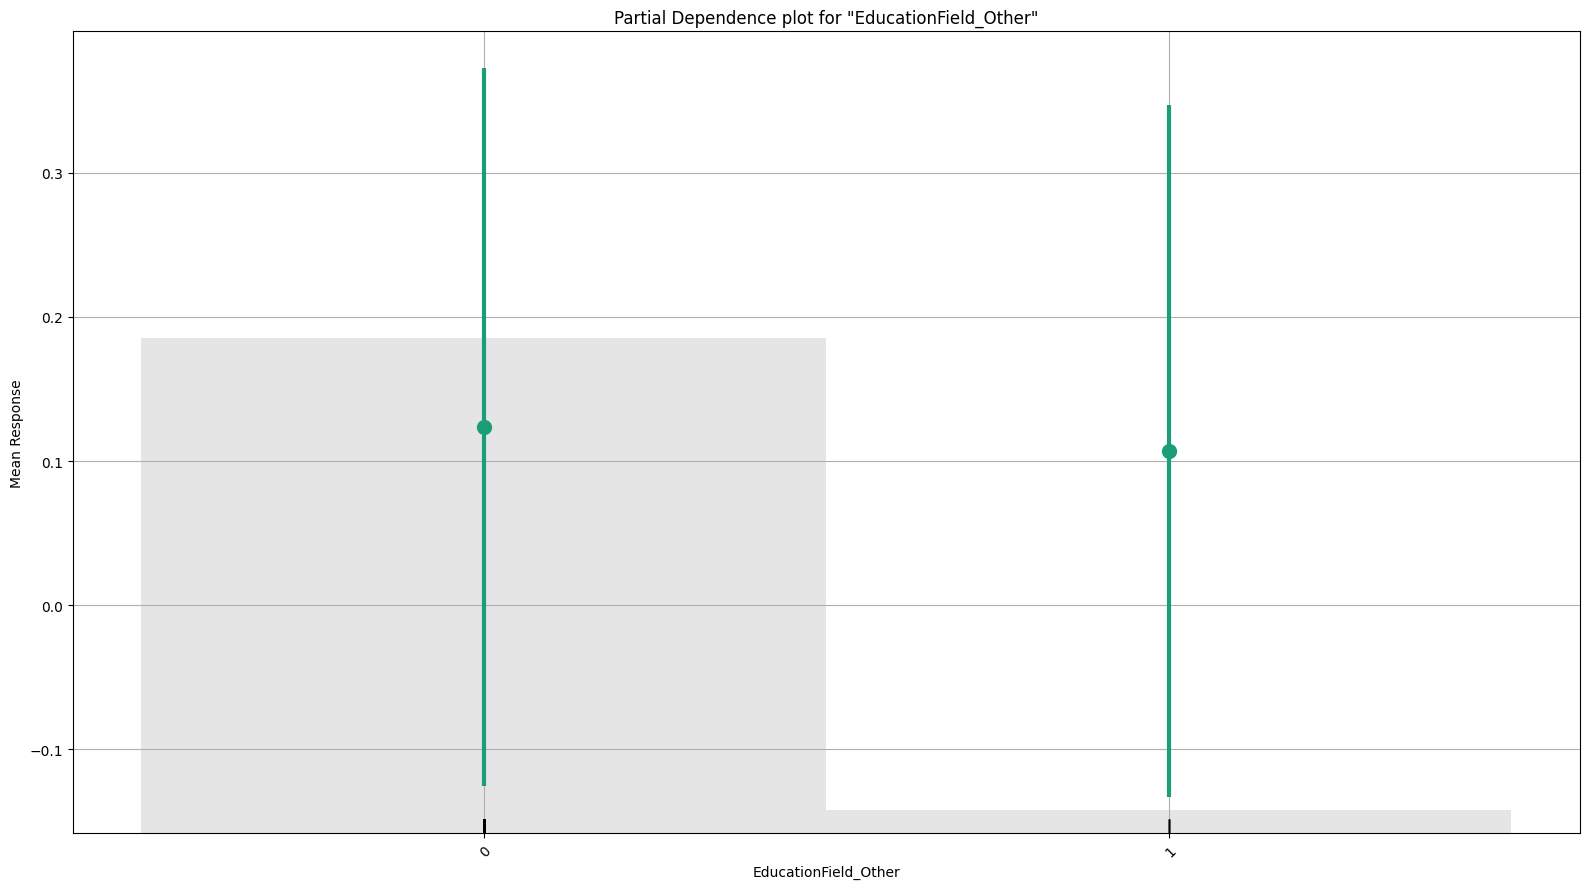

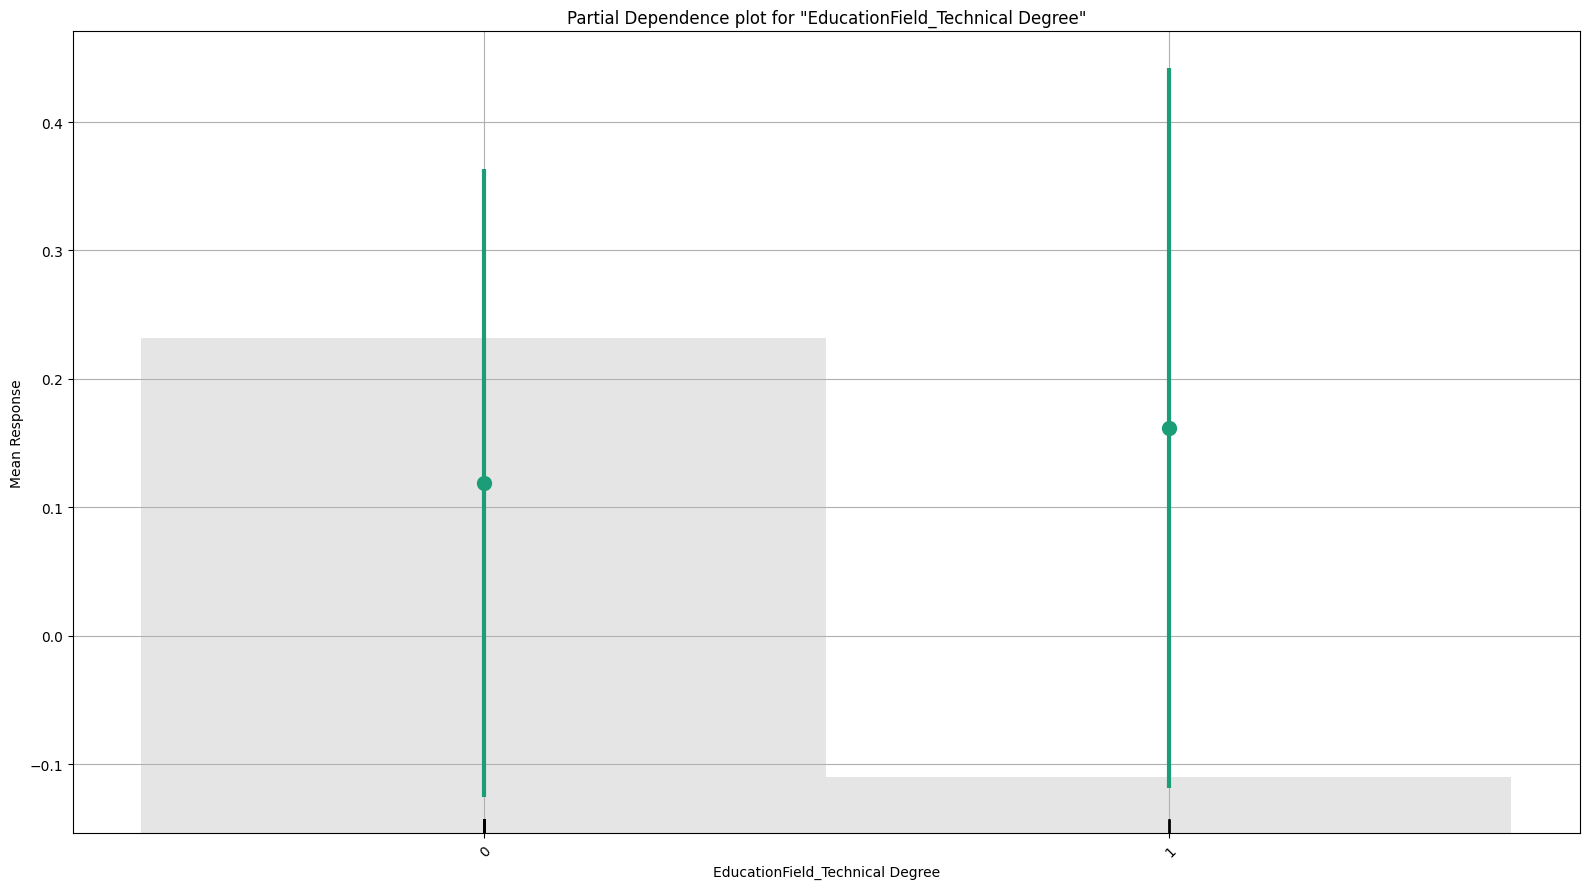

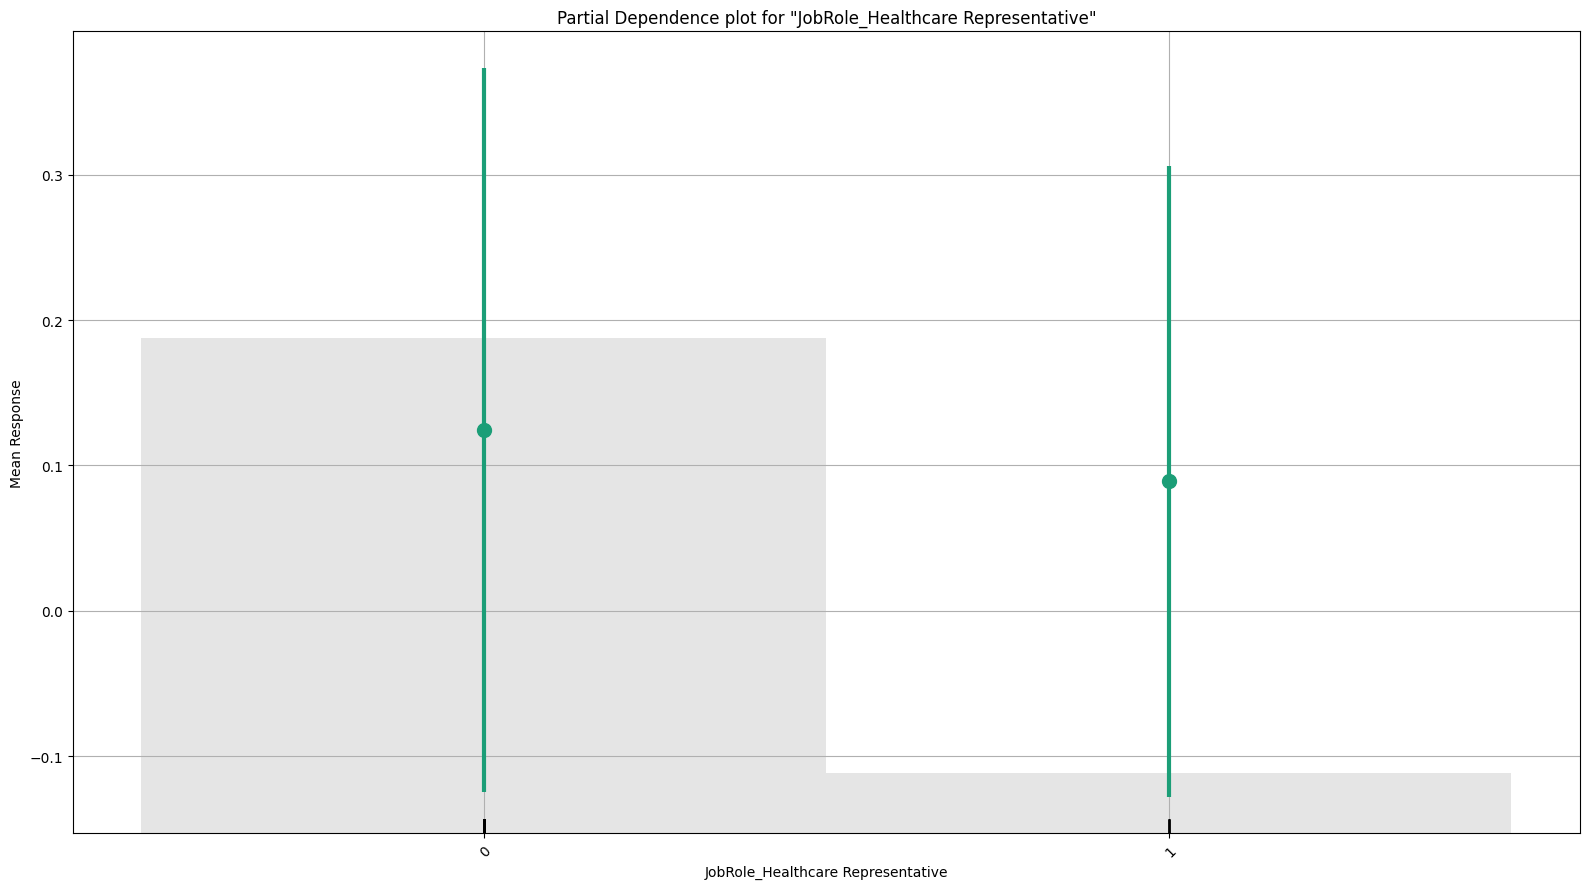

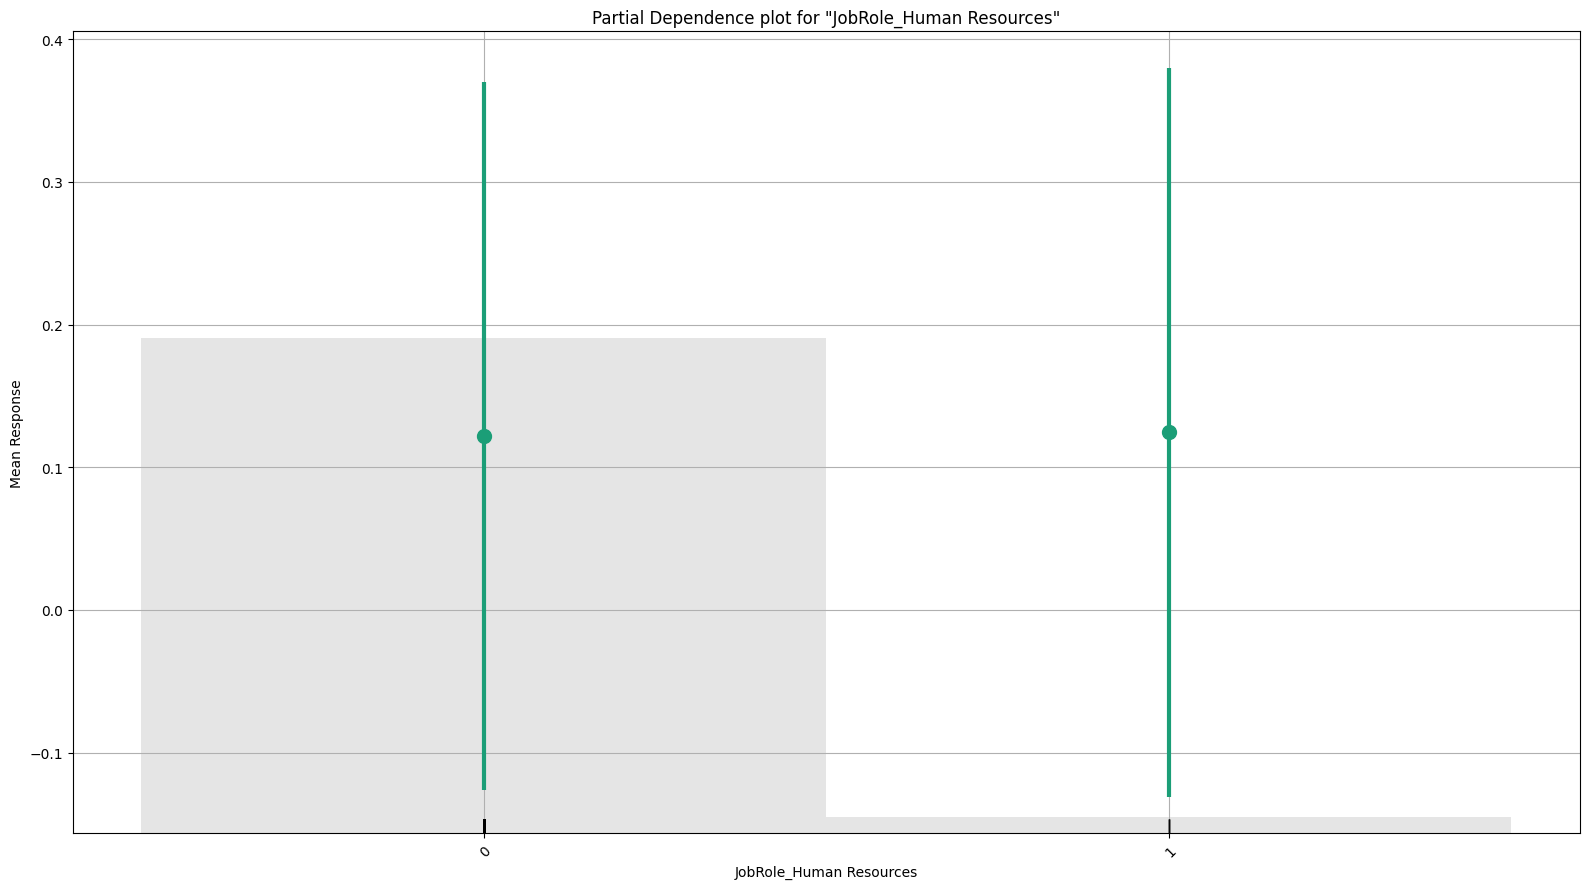

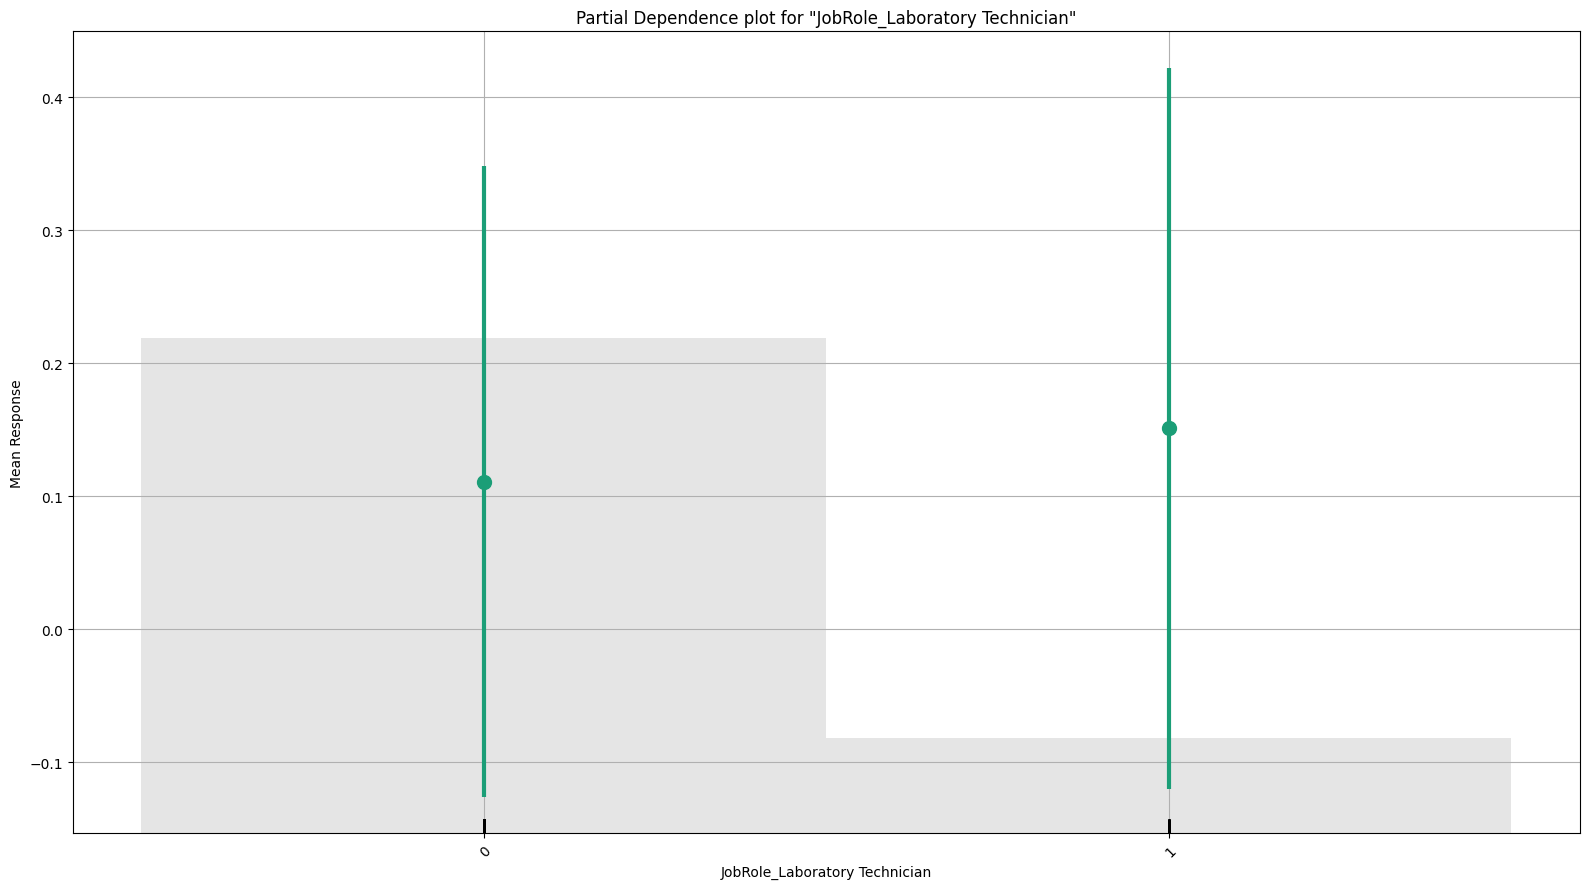

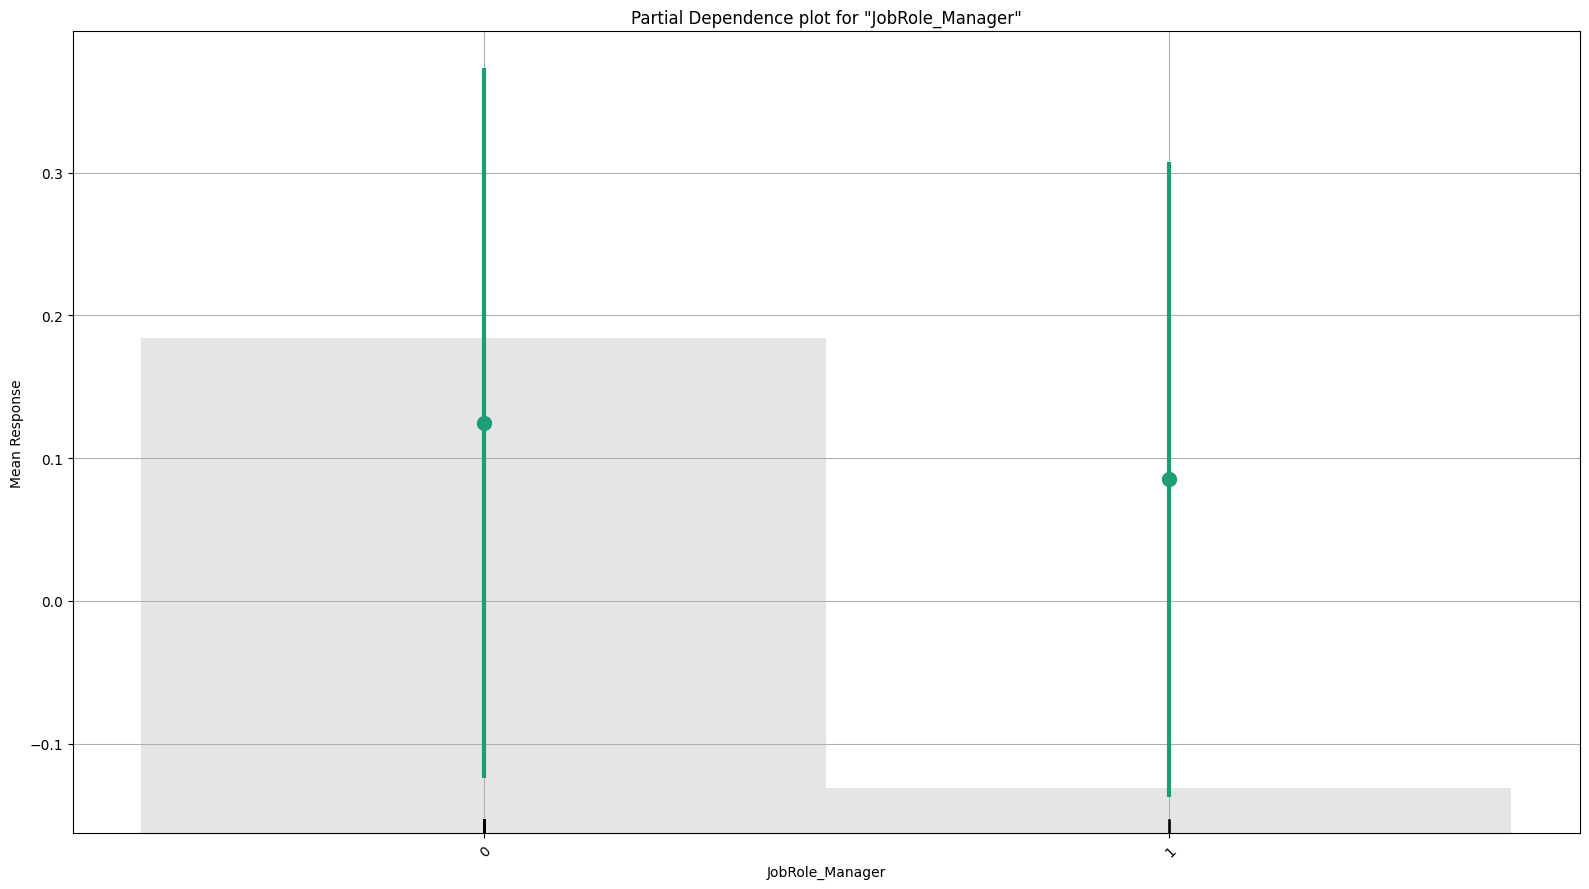

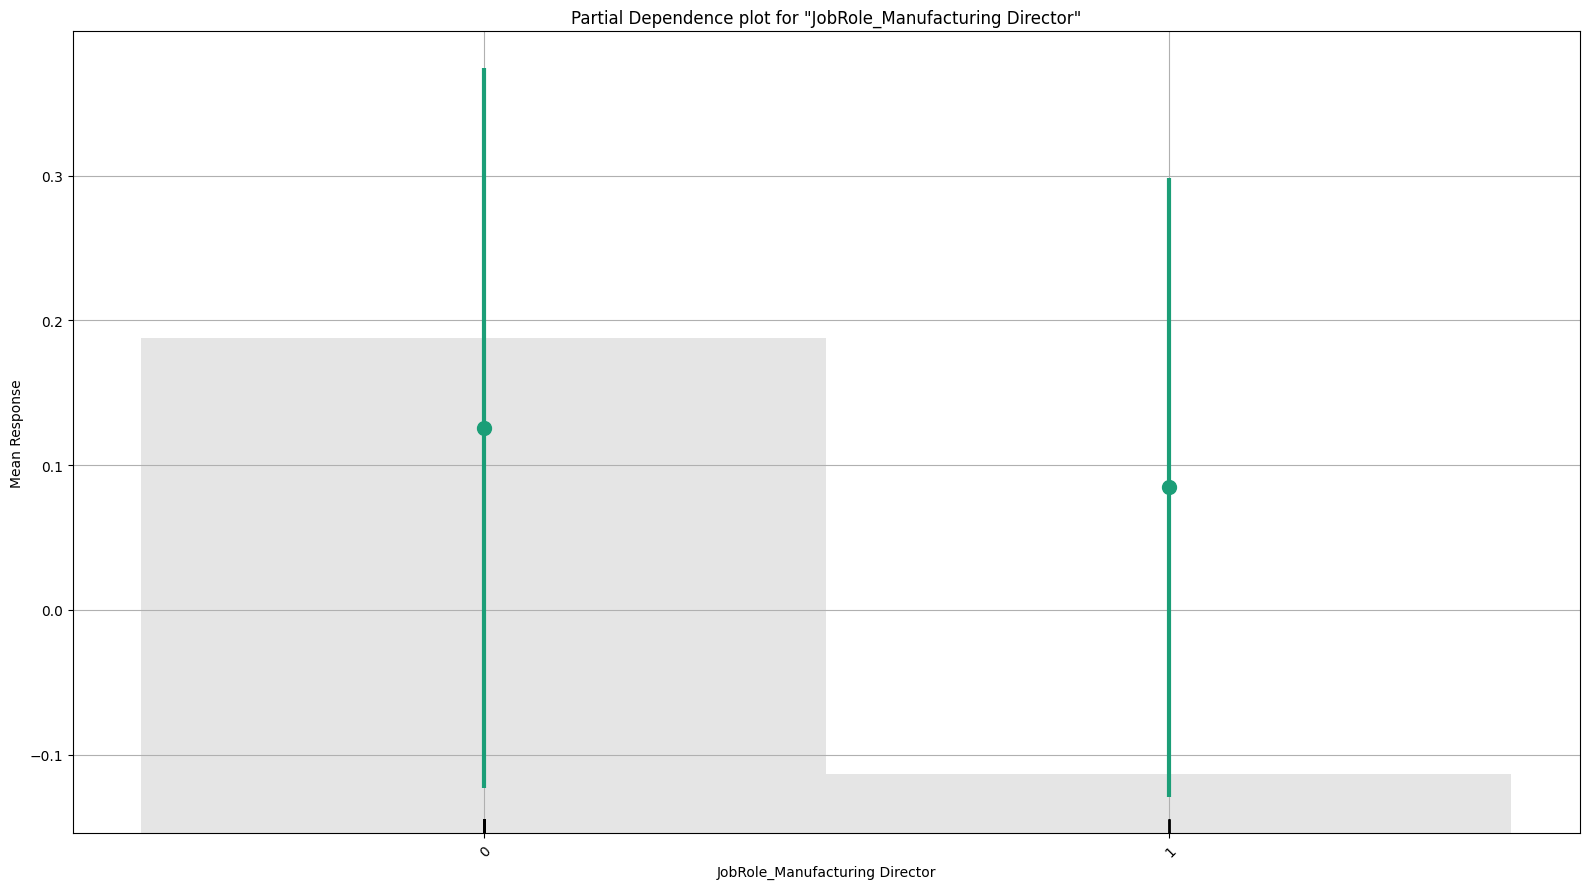

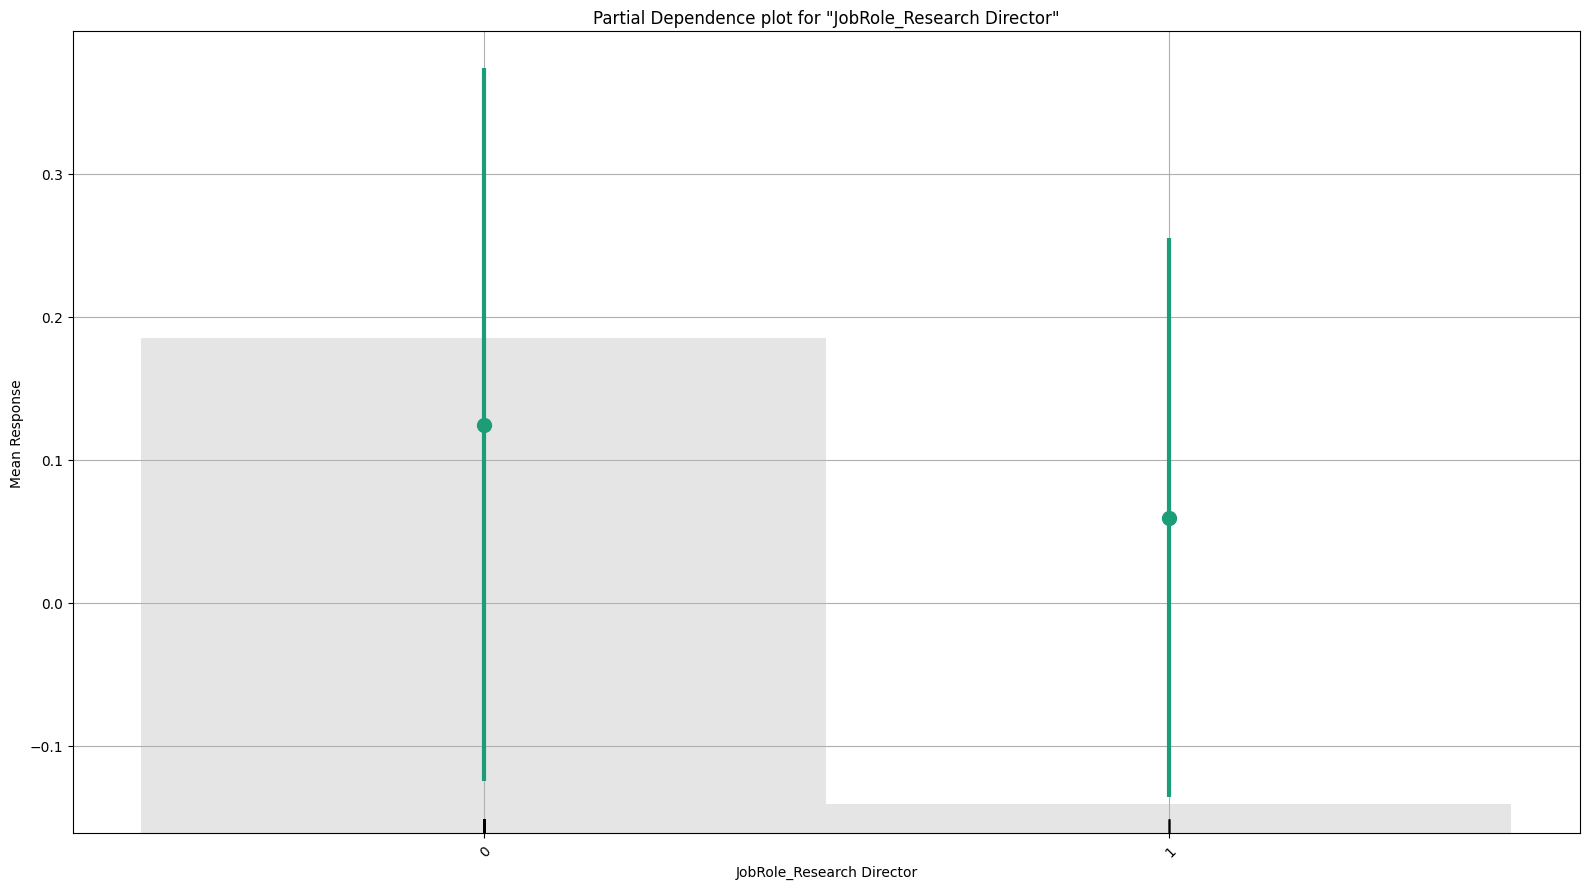

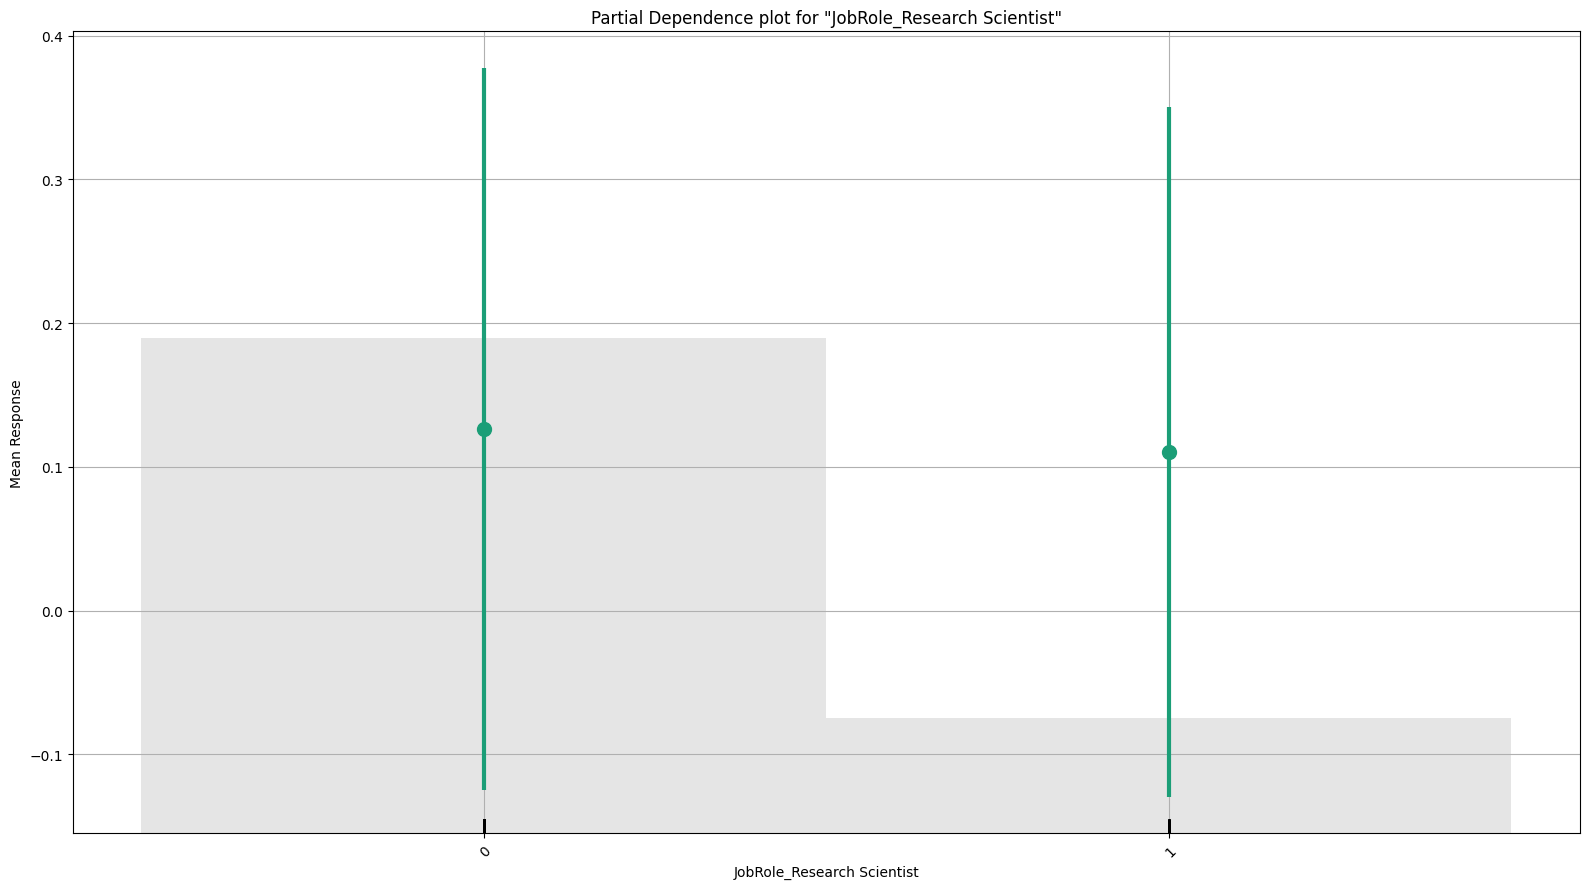

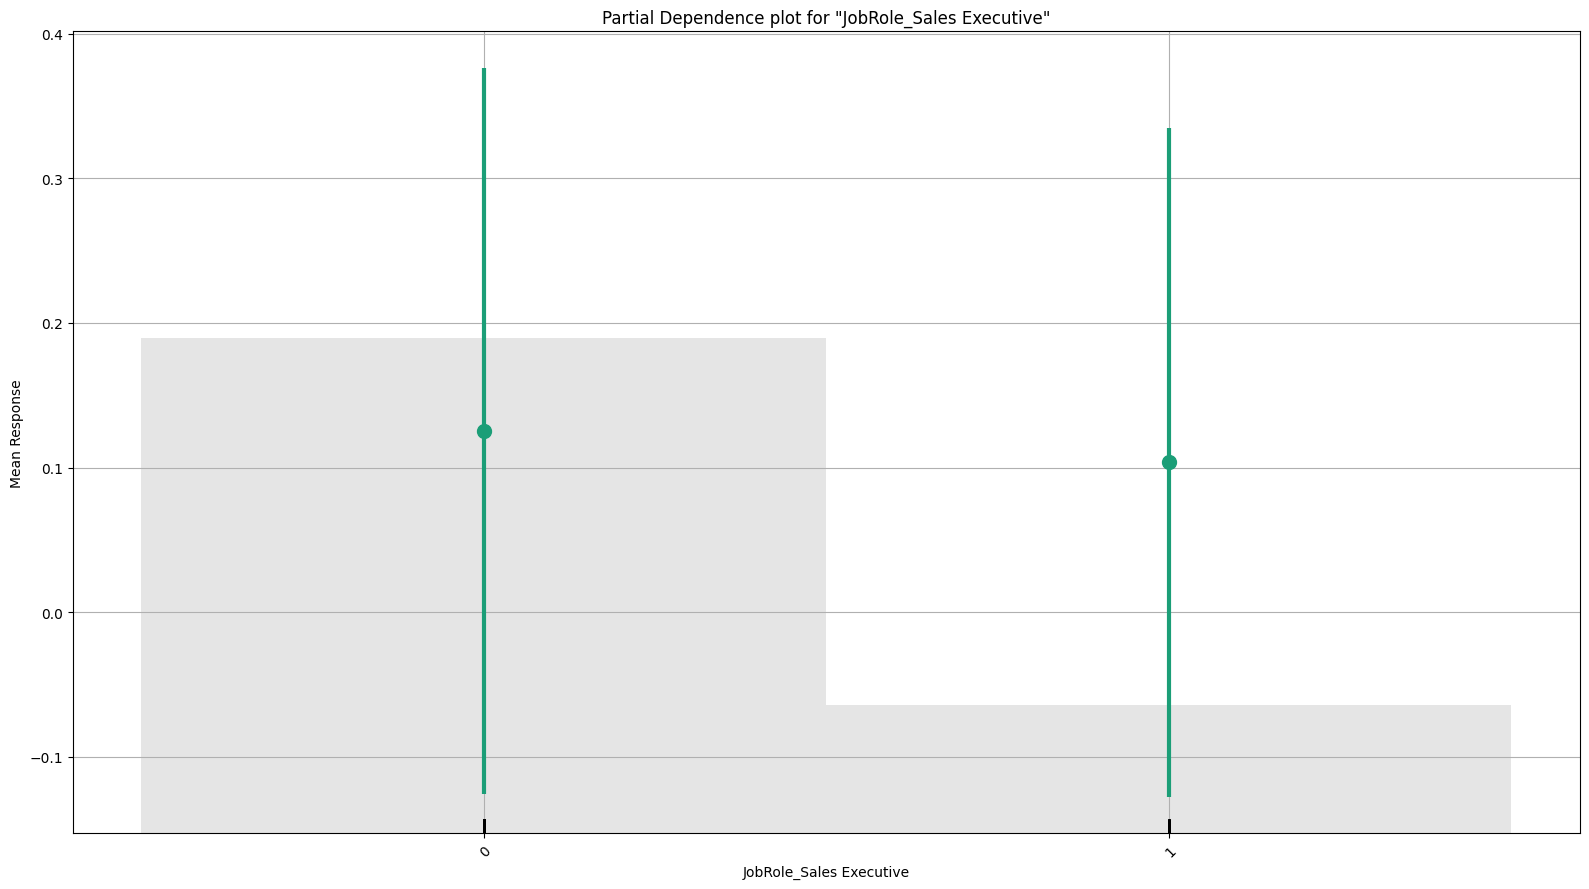

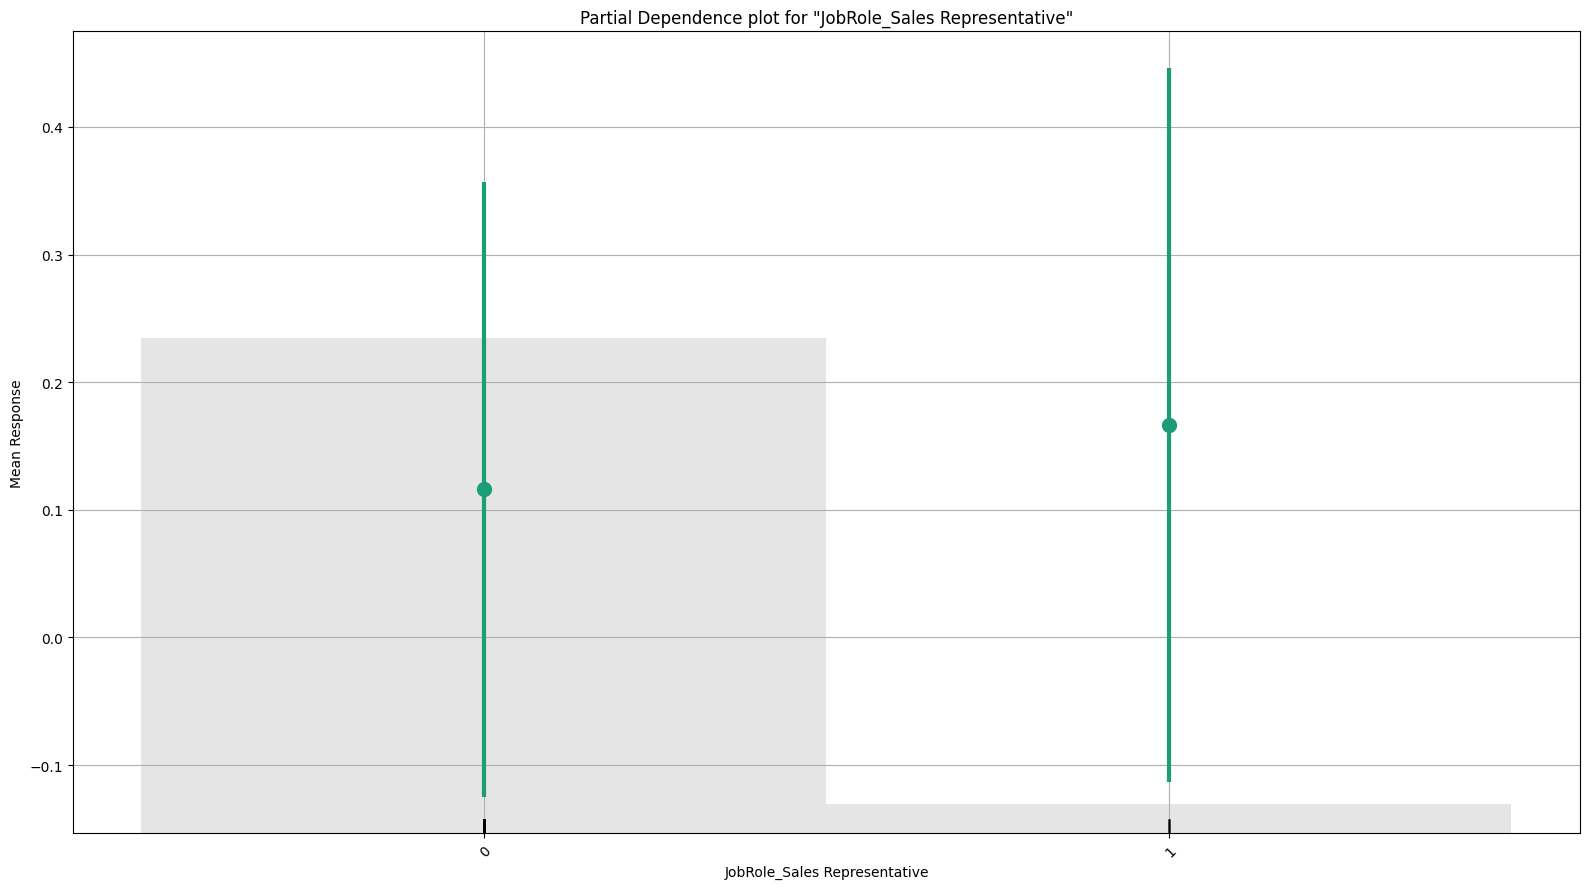

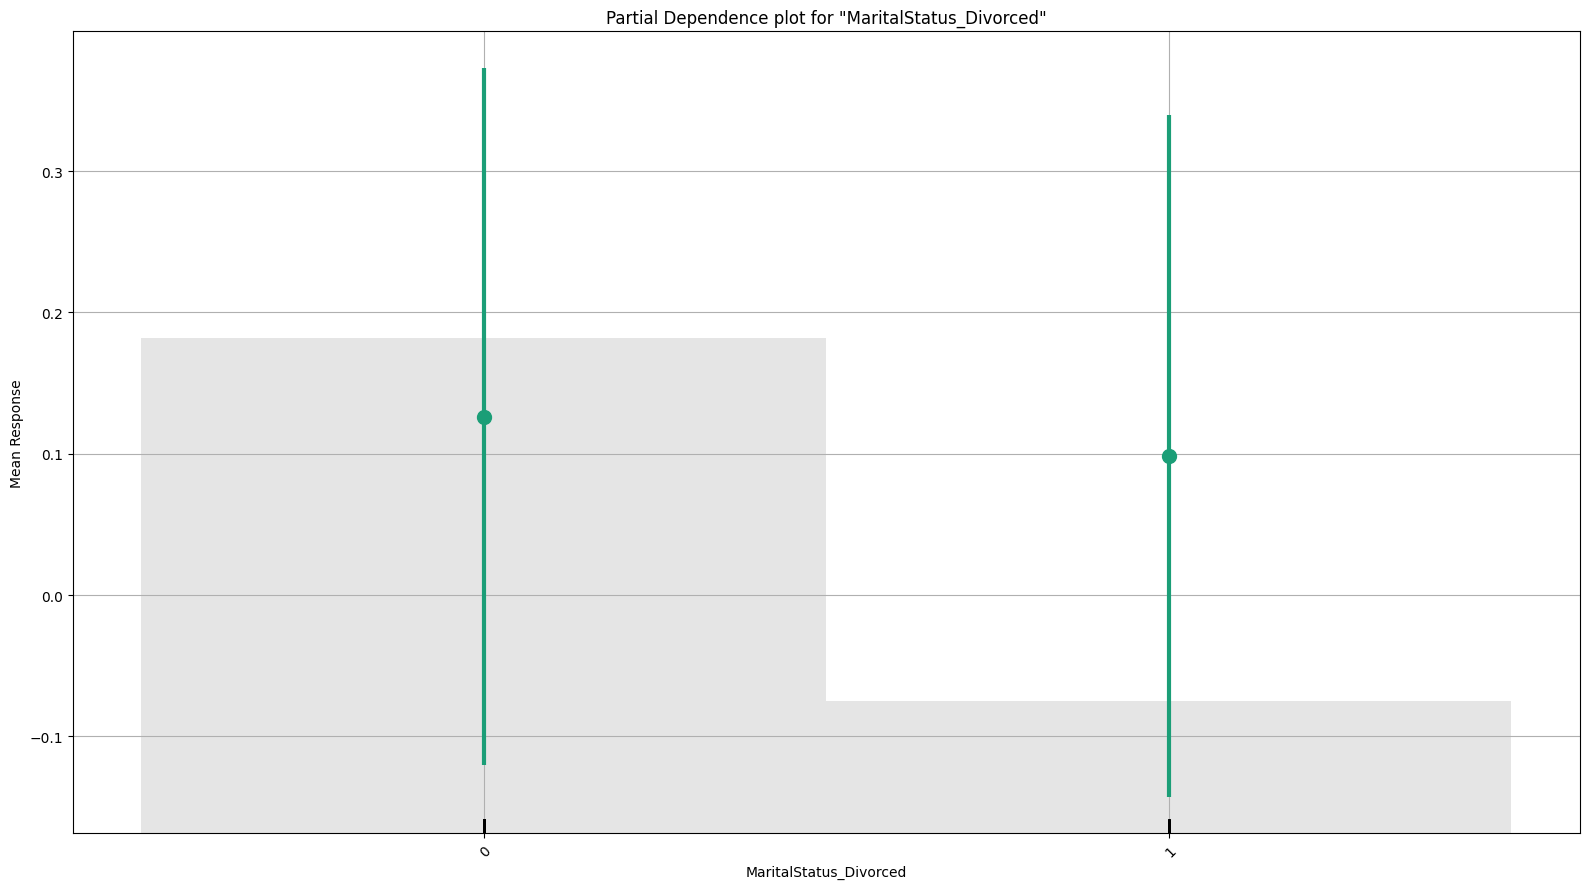

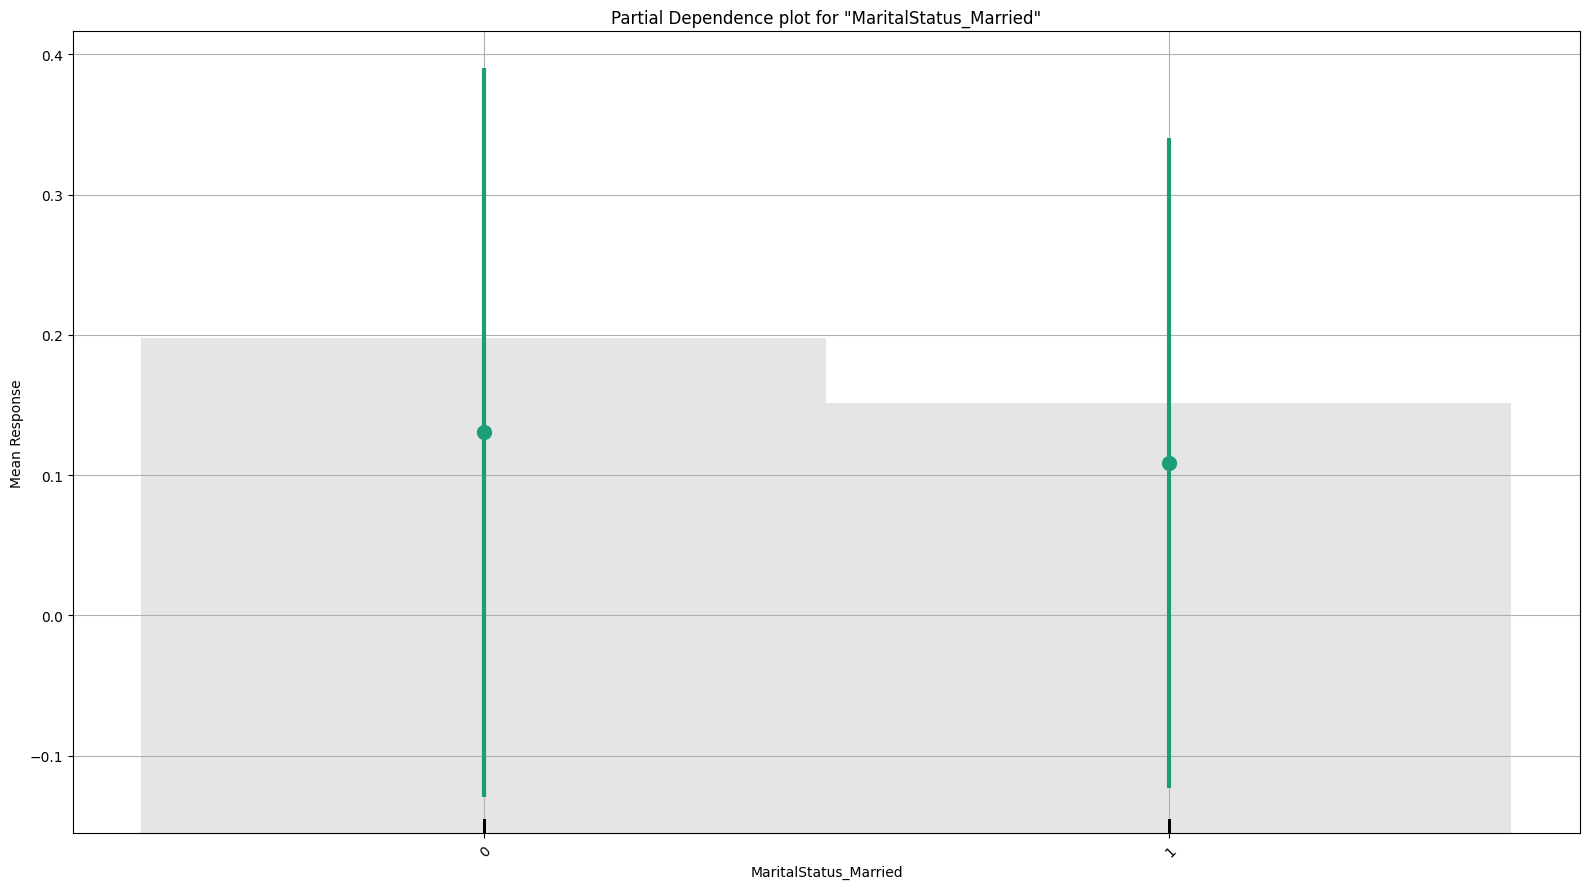

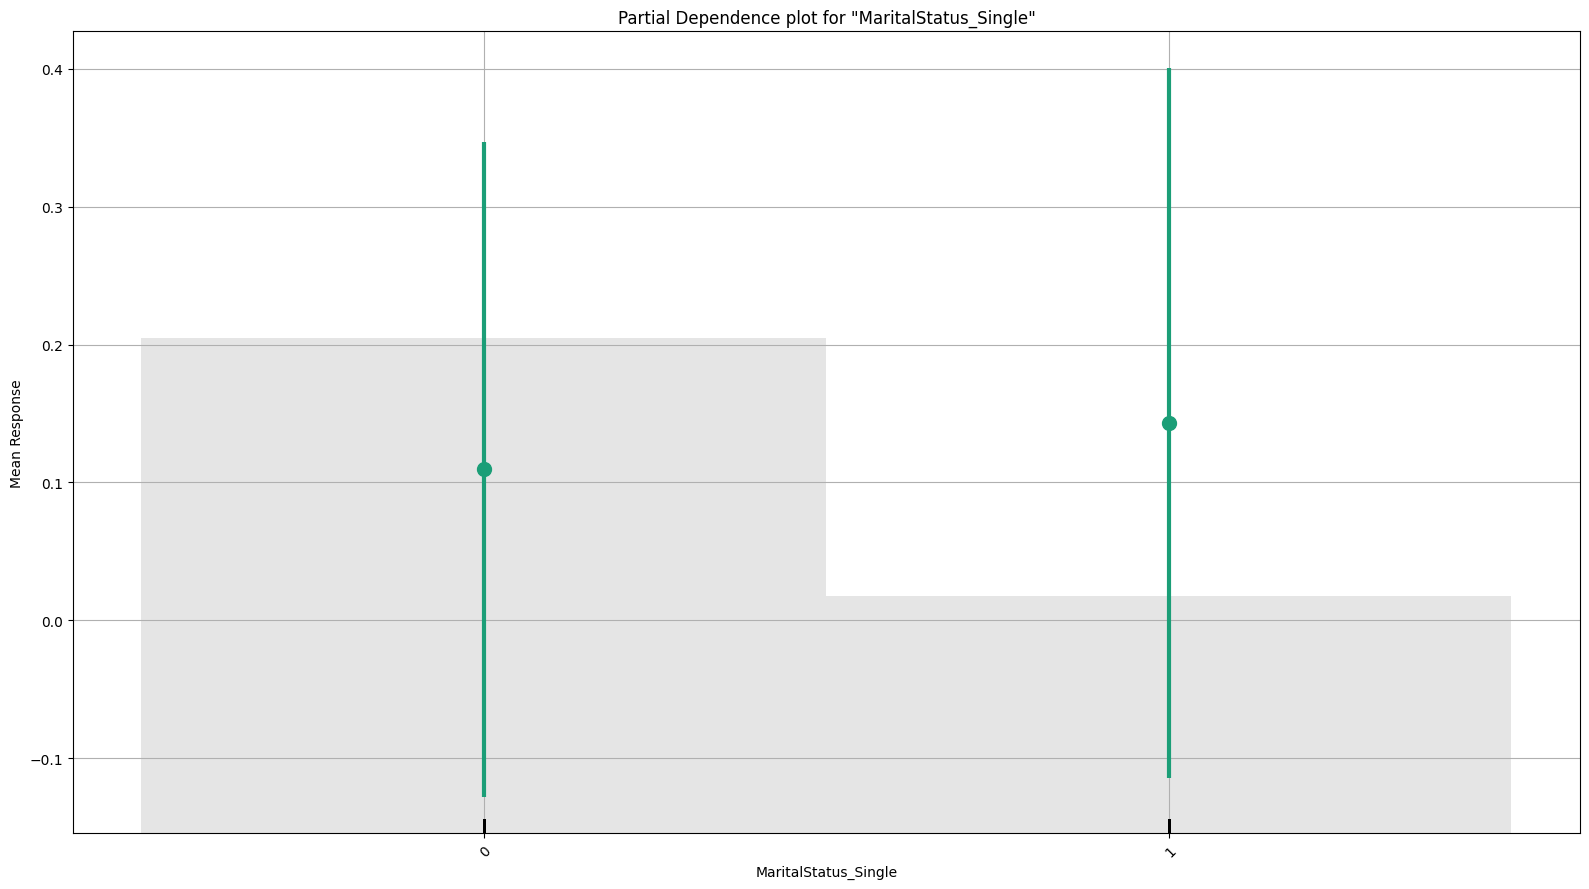

In [14]:
# Display test performance
cv_best_model.explain(test)

# Test Performance of other Models

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
GBM_1_AutoML_1_20250318_160526                           0.883543   0.284598  0.64606                 0.257333  0.283591  0.0804236                 532                   0.011943  GBM
GBM_grid_1_AutoML_1_20250318_160526_model_6              0.881122   0.288715  0.644326                0.167078  0.286263  0.0819468                 334                   0.010698  GBM
GBM_2_AutoML_1_20250318_160526                           0.875114   0.264648  0.617557                0.224232  0.275442  0.0758683                 409                   0.011274  GBM
GBM_grid_1_AutoML_1_20250318_160526_model_11             0.86705    0.282116  0.631931                0.241434  0.281673  0.0793398                 247                   0.011647  GBM
GLM_1_AutoML_1_20250318_160526                           0.866845   0.261269  0.699372                0.232319  0.268673  0.0721853                 297                   0.013904  GLM
DeepLearning_1_AutoML_1_20250318_160526                  0.863601   0.258815  0.613491                0.211554  0.274586  0.0753977                 361                   0.011318  DeepLearning
GBM_grid_1_AutoML_1_20250318_160526_model_2              0.860426   0.283408  0.599084                0.246642  0.283165  0.0801823                 262                   0.01273   GBM
GBM_grid_1_AutoML_1_20250318_160526_model_7              0.859992   0.287846  0.584057                0.215529  0.285721  0.0816366                 235                   0.01159   GBM
GBM_3_AutoML_1_20250318_160526                           0.859284   0.26854   0.599176                0.232388  0.278545  0.0775871                 377                   0.012799  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20250318_160526  0.858575   0.260379  0.65944                 0.221628  0.269664  0.0727189                1757                   0.031092  StackedEnsemble
GBM_grid_1_AutoML_1_20250318_160526_model_3              0.857045   0.274452  0.605301                0.221971  0.279016  0.0778499                 280                   0.013254  GBM
GBM_grid_1_AutoML_1_20250318_160526_model_5              0.856017   0.268177  0.590832                0.236568  0.277531  0.0770233                 561                   0.014309  GBM
GBM_grid_1_AutoML_1_20250318_160526_model_4              0.854144   0.281472  0.585729                0.224918  0.283488  0.0803655                 381                   0.012484  GBM
GBM_grid_1_AutoML_1_20250318_160526_model_10             0.852088   0.27575   0.589303                0.288857  0.282253  0.0796667                 404                   0.01192   GBM
GBM_grid_1_AutoML_1_20250318_160526_model_9              0.851654   0.284846  0.572695                0.250891  0.285469  0.0814928                 237                   0.01396   GBM
DRF_1_AutoML_1_20250318_160526                           0.847062   0.301414  0.565204                0.258361  0.293701  0.0862605                1337                   0.012058  DRF
GBM_4_AutoML_1_20250318_160526                           0.8456     0.280666  0.559599                0.246985  0.284464  0.0809195                 470                   0.014185  GBM
StackedEnsemble_AllModels_1_AutoML_1_20250318_160526     0.842334   0.318486  0.638179                0.209293  0.278108  0.0773442                4319                   0.095606  StackedEnsemble
DeepLearning_grid_2_AutoML_1_20250318_160526_model_15    0.834361   0.592155  0.560706                0.219709  0.31734   0.100705                 5160                   0.017463  DeepLearning
GBM_grid_1_AutoML_1_20250318_160526_model_13             0.833607   0.288438  0.5

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20250318_160526

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2876534730907089
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      358  26   0.0677   (26.0/384.0)
1      20   37   0.3509   (20.0/57.0)
Total  378  63   0.1043   (46.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

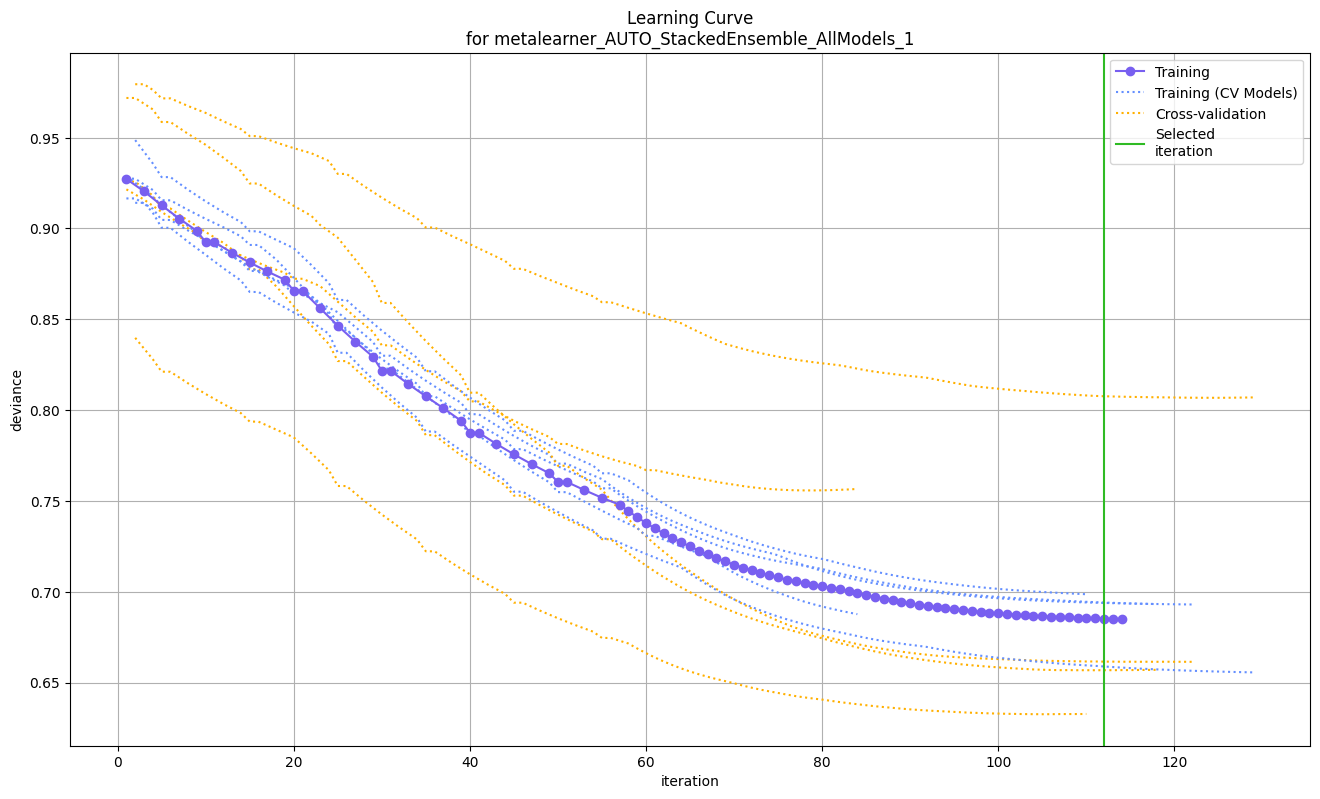

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

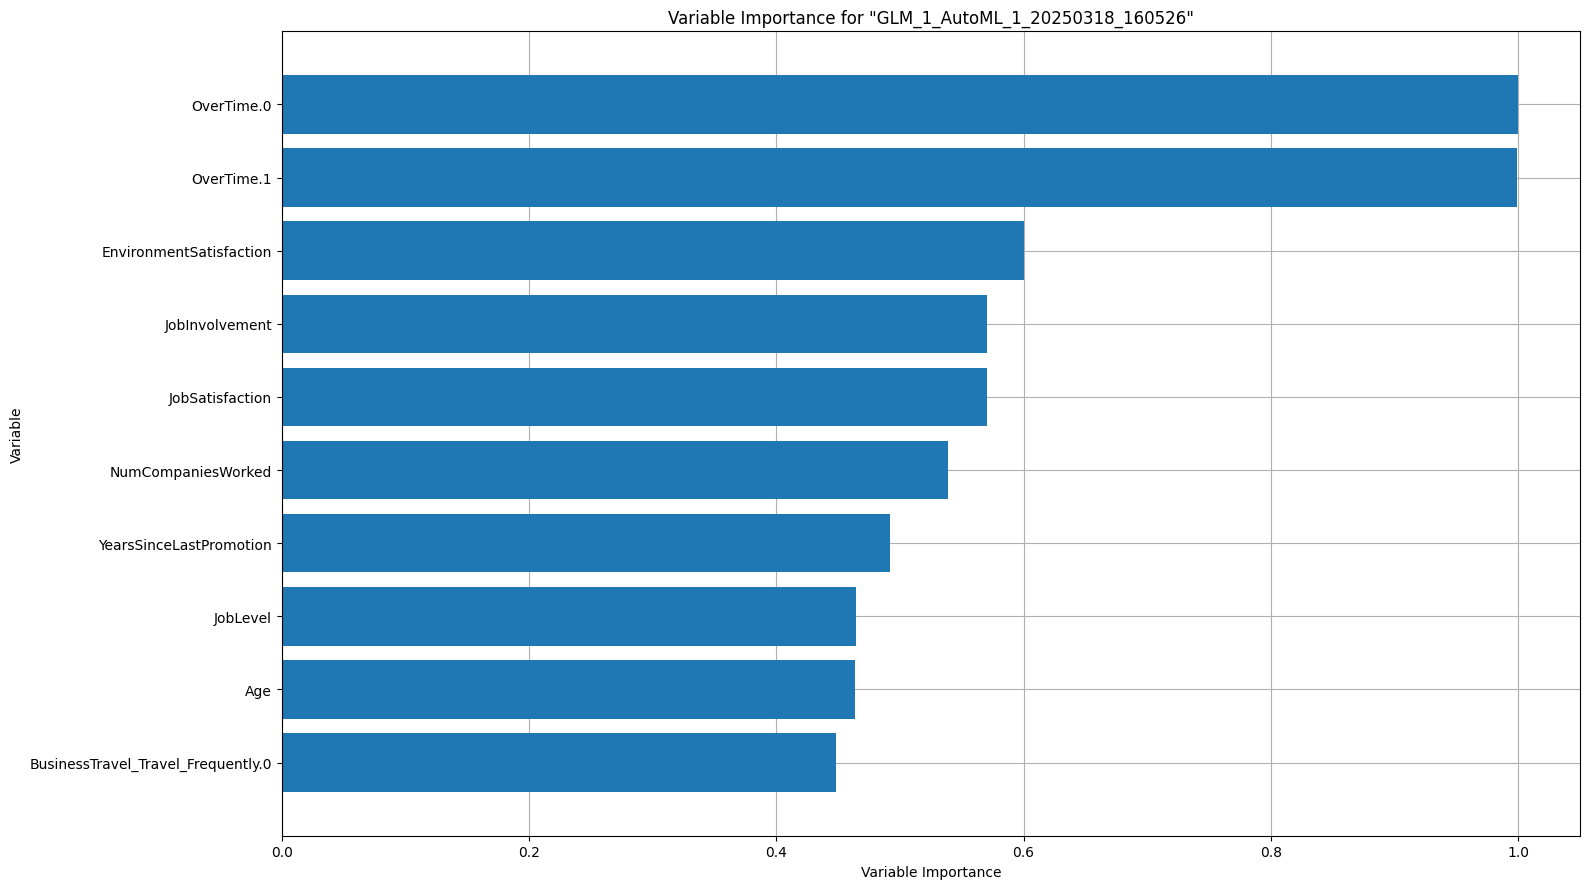

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

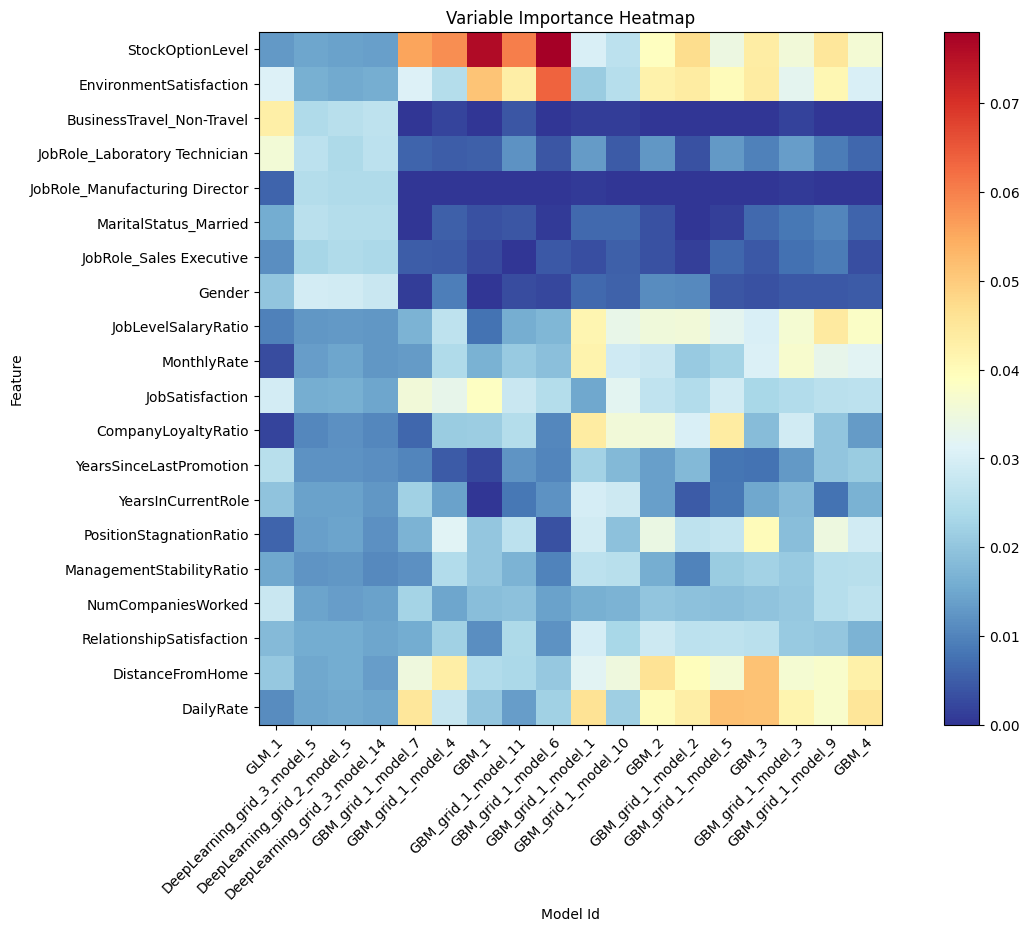

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

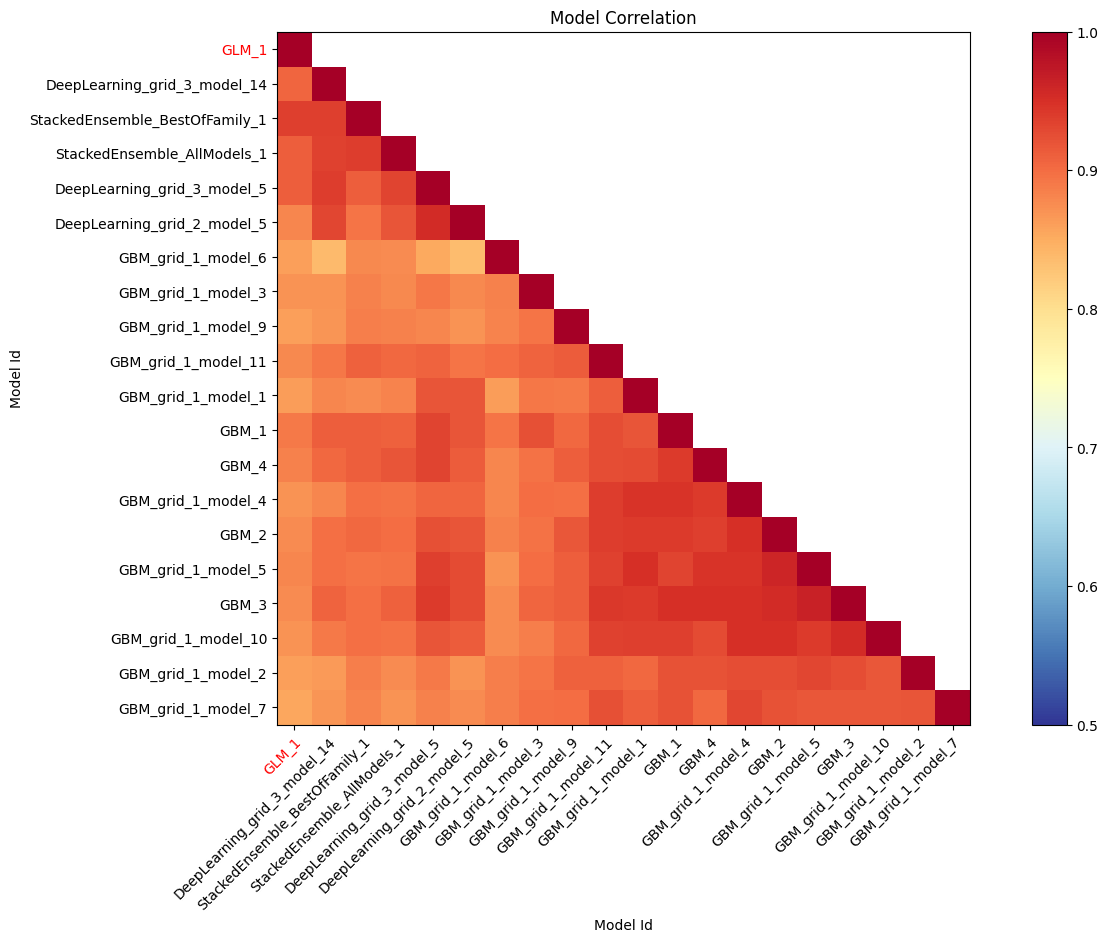

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

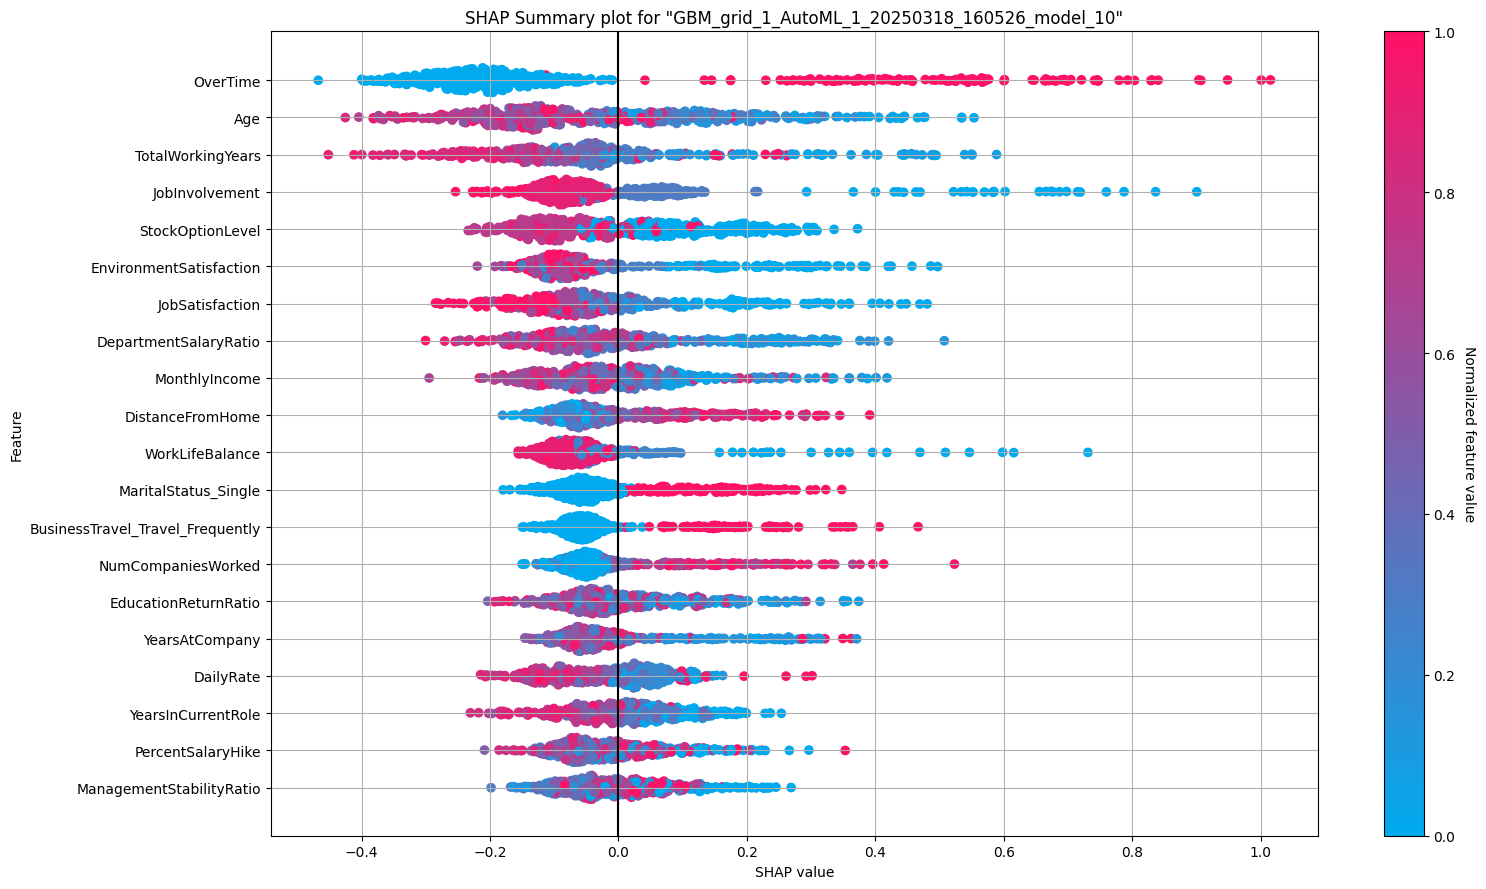

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

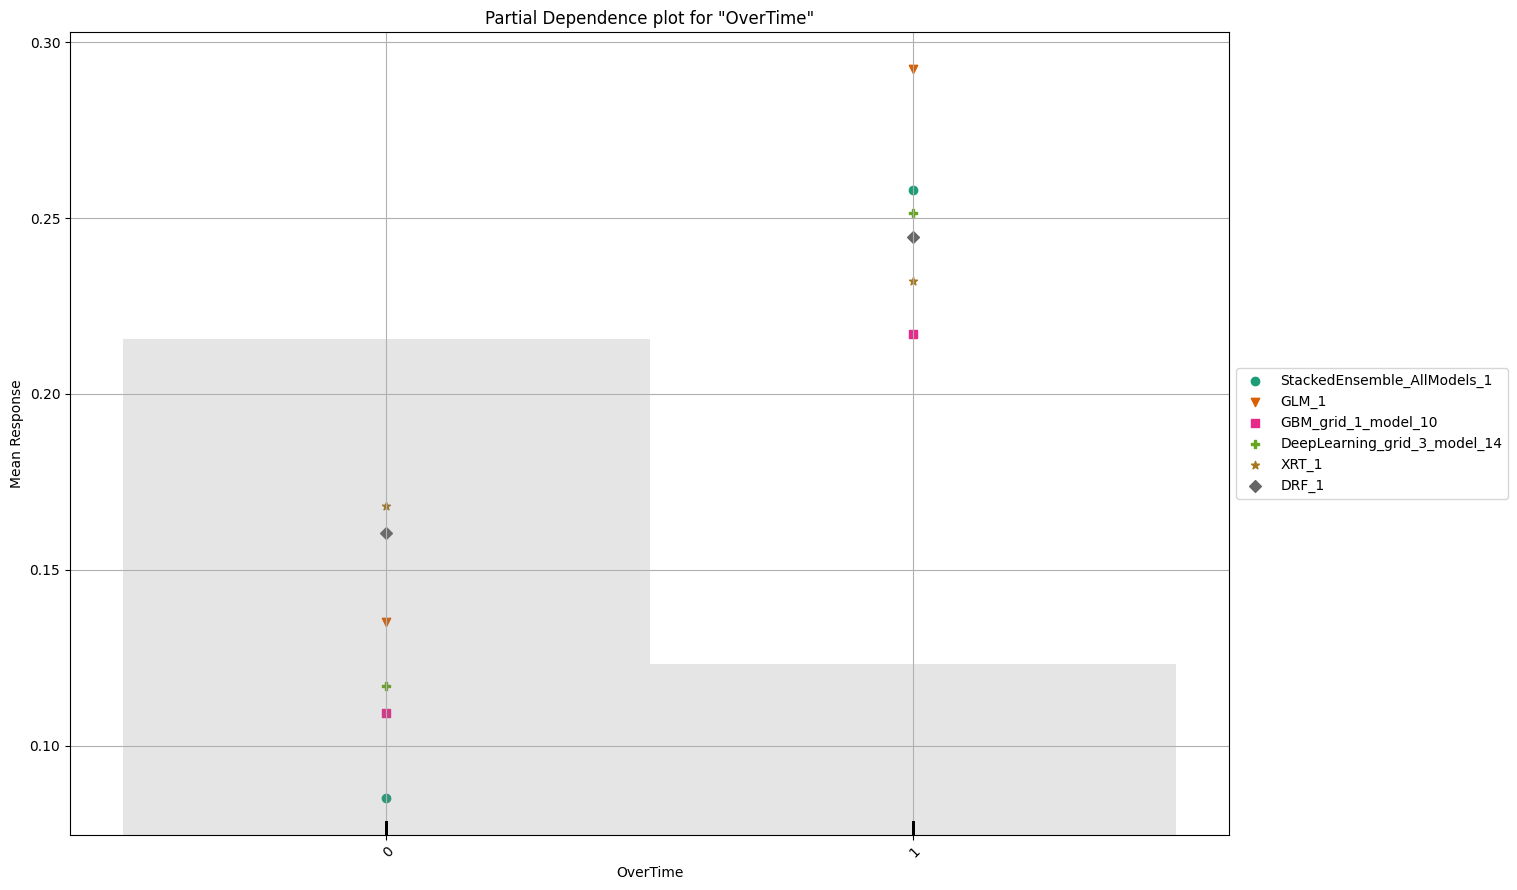

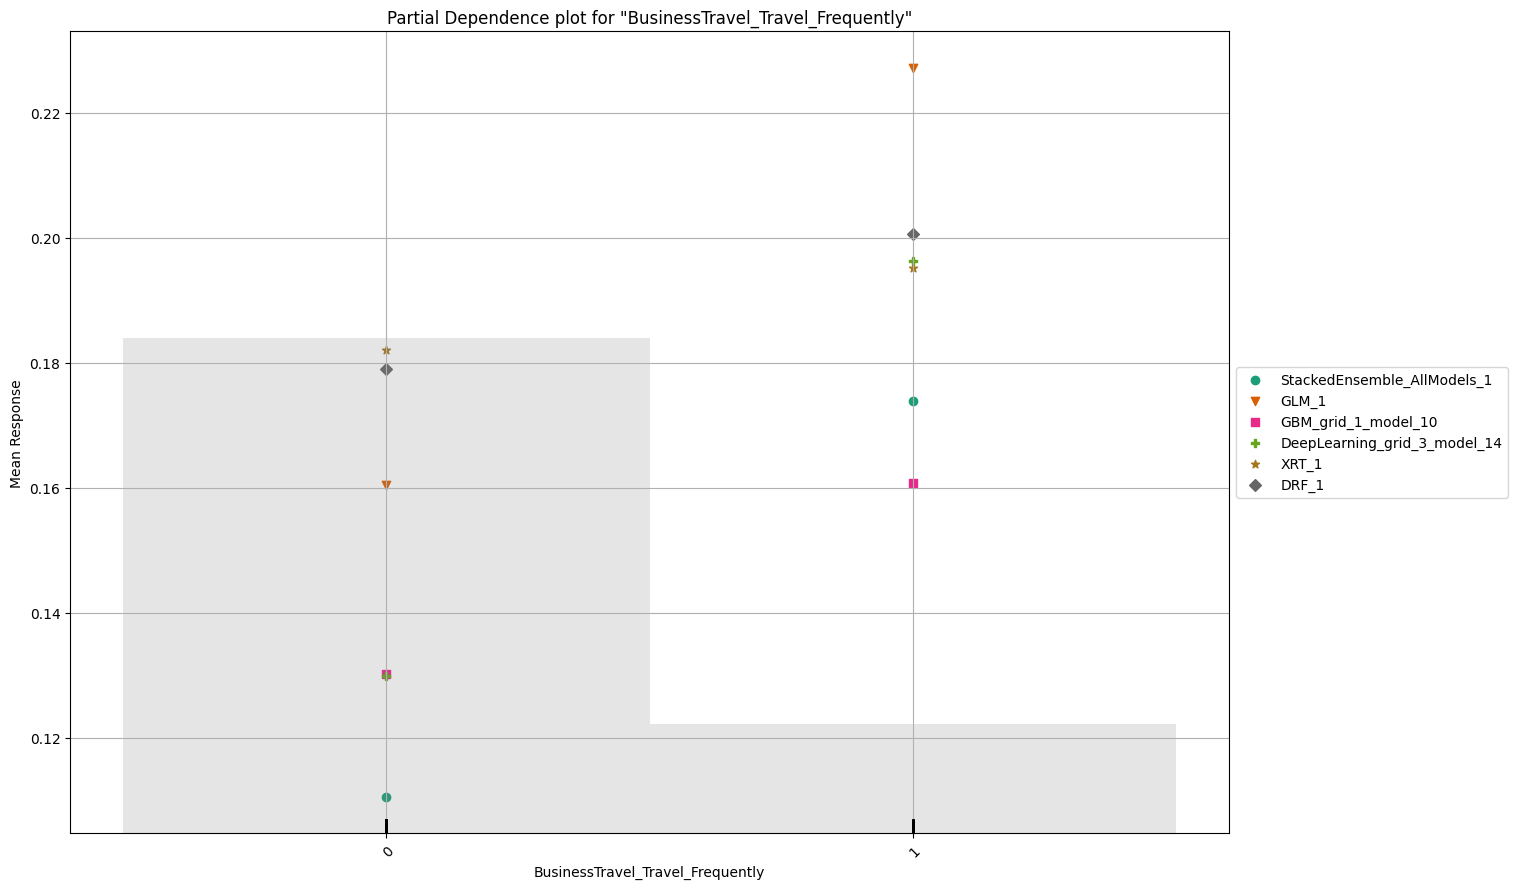

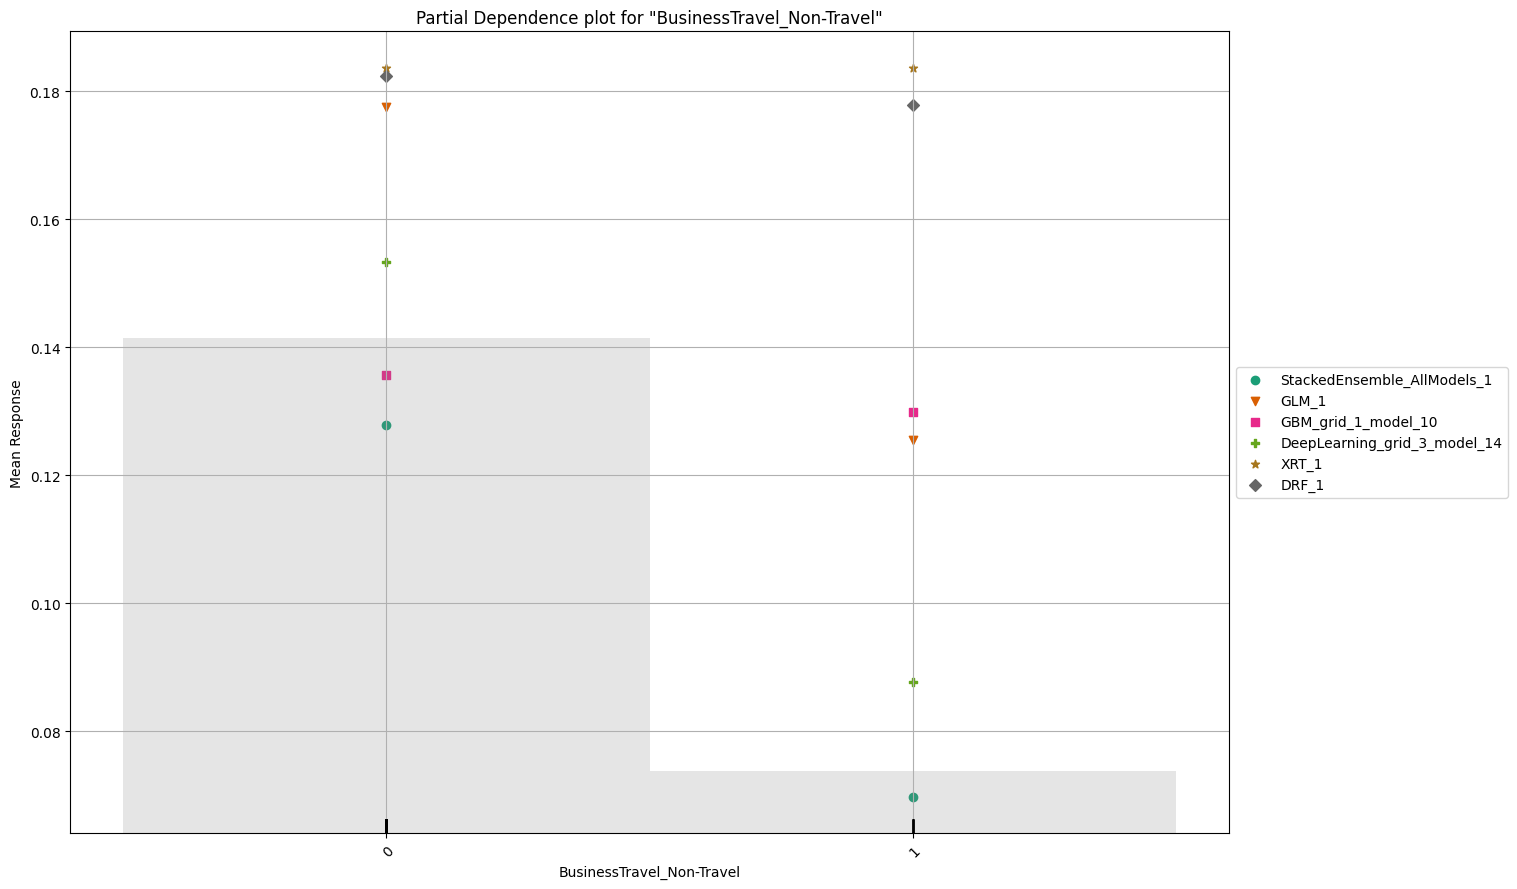

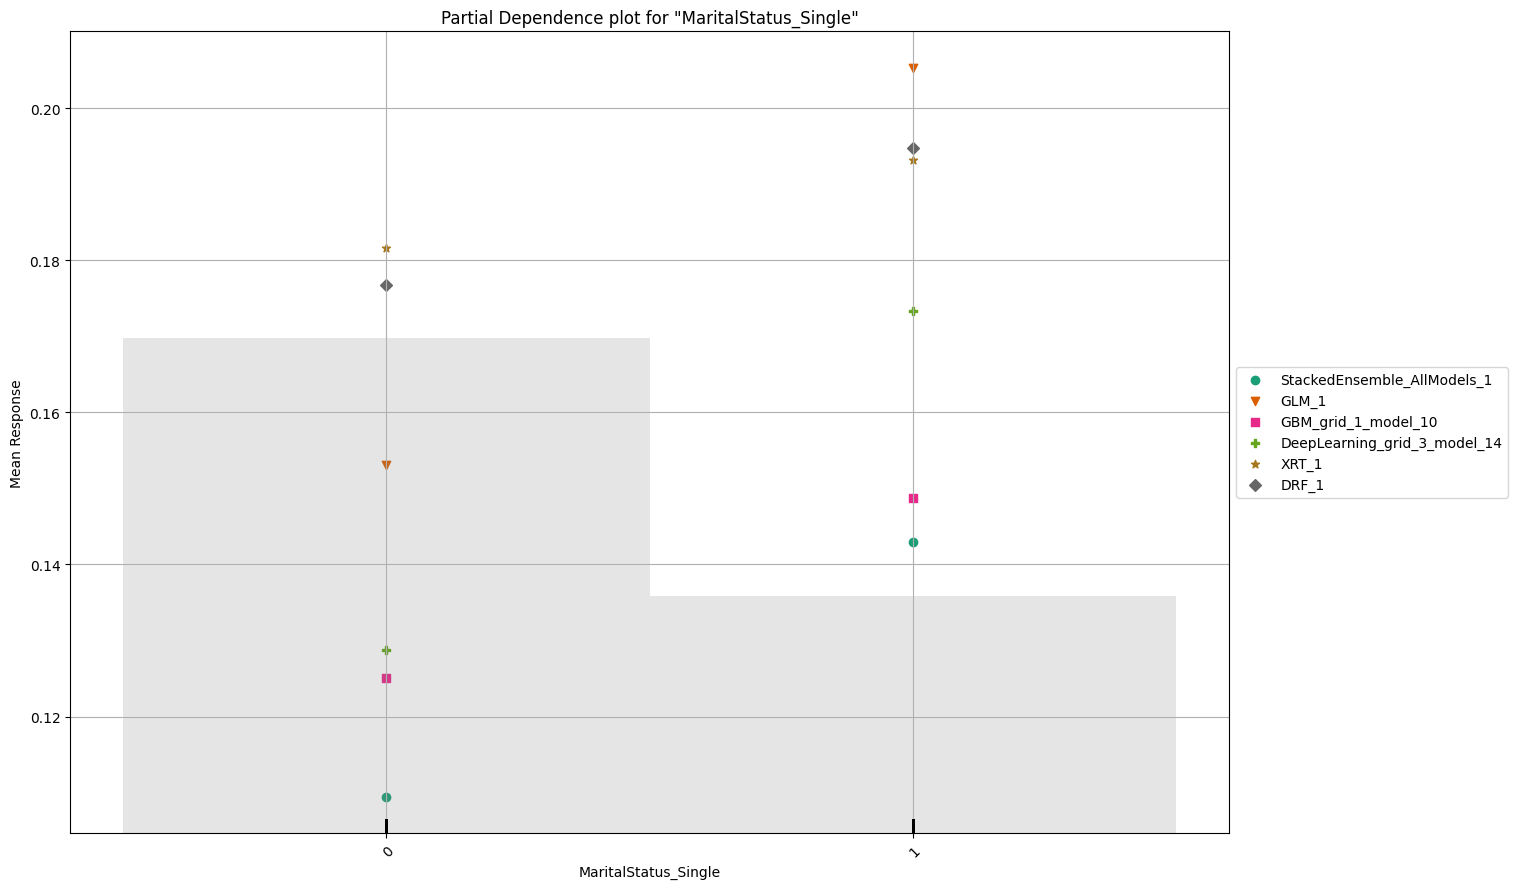

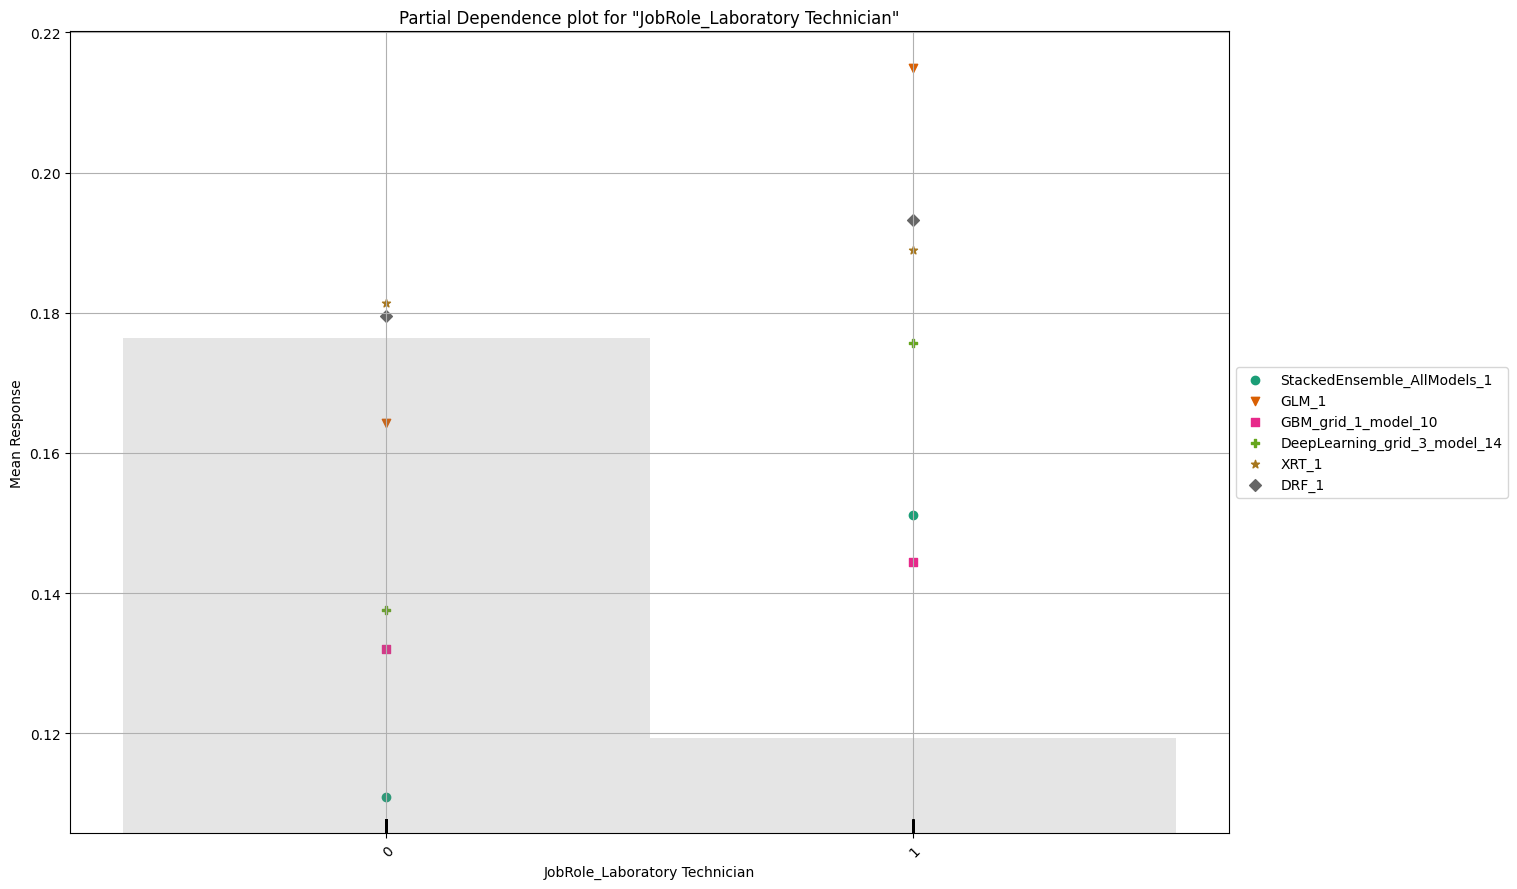

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
GBM_1_AutoML_1_20250318_160526                           0.883543   0.284598  0.64606                 0.257333  0.283591  0.0804236                 532                   0.011943  GBM
GBM_grid_1_AutoML_1_20250318_160526_model_6              0.881122   0.288715  0.644326                0.167078  0.286263  0.0819468                 334                   0.010698  GBM
GBM_2_AutoML_1_20250318_160526                           0.875114   0.264648  0.617557                0.224232  0.275442  0.0758683                 409                   0.011274  GBM
GBM_grid_1_AutoML_1_20250318_160526_model_11             0.86705    0.282116  0.631931                0.241434  0.281673  0.0793398                 247                   0.011647  GBM
GLM_1_AutoML_1_20250318_160526                           0.866845   0.261269  0.699372                0.232319  0.268673  0.0721853                 297                   0.013904  GLM
DeepLearning_1_AutoML_1_20250318_160526                  0.863601   0.258815  0.613491                0.211554  0.274586  0.0753977                 361                   0.011318  DeepLearning
GBM_grid_1_AutoML_1_20250318_160526_model_2              0.860426   0.283408  0.599084                0.246642  0.283165  0.0801823                 262                   0.01273   GBM
GBM_grid_1_AutoML_1_20250318_160526_model_7              0.859992   0.287846  0.584057                0.215529  0.285721  0.0816366                 235                   0.01159   GBM
GBM_3_AutoML_1_20250318_160526                           0.859284   0.26854   0.599176                0.232388  0.278545  0.0775871                 377                   0.012799  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20250318_160526  0.858575   0.260379  0.65944                 0.221628  0.269664  0.0727189                1757                   0.031092  StackedEnsemble
GBM_grid_1_AutoML_1_20250318_160526_model_3              0.857045   0.274452  0.605301                0.221971  0.279016  0.0778499                 280                   0.013254  GBM
GBM_grid_1_AutoML_1_20250318_160526_model_5              0.856017   0.268177  0.590832                0.236568  0.277531  0.0770233                 561                   0.014309  GBM
GBM_grid_1_AutoML_1_20250318_160526_model_4              0.854144   0.281472  0.585729                0.224918  0.283488  0.0803655                 381                   0.012484  GBM
GBM_grid_1_AutoML_1_20250318_160526_model_10             0.852088   0.27575   0.589303                0.288857  0.282253  0.0796667                 404                   0.01192   GBM
GBM_grid_1_AutoML_1_20250318_160526_model_9              0.851654   0.284846  0.572695                0.250891  0.285469  0.0814928                 237                   0.01396   GBM
DRF_1_AutoML_1_20250318_160526                           0.847062   0.301414  0.565204                0.258361  0.293701  0.0862605                1337                   0.012058  DRF
GBM_4_AutoML_1_20250318_160526                           0.8456     0.280666  0.559599                0.246985  0.284464  0.0809195                 470                   0.014185  GBM
StackedEnsemble_AllModels_1_AutoML_1_20250318_160526     0.842334   0.318486  0.638179                0.209293  0.278108  0.0773442                4319                   0.095606  StackedEnsemble
DeepLearning_grid_2_AutoML_1_20250318_160526_model_15    0.834361   0.592155  0.560706                0.219709  0.31734   0.100705                 5160                   0.017463  DeepLearning
GBM_grid_1_AutoML_1_20250318_160526_model_13             0.833607   0.288438  0.5

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20250318_160526

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2876534730907089
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      358  26   0.0677   (26.0/384.0)
1      20   37   0.3509   (20.0/57.0)
Total  378  63   0.1043   (46.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

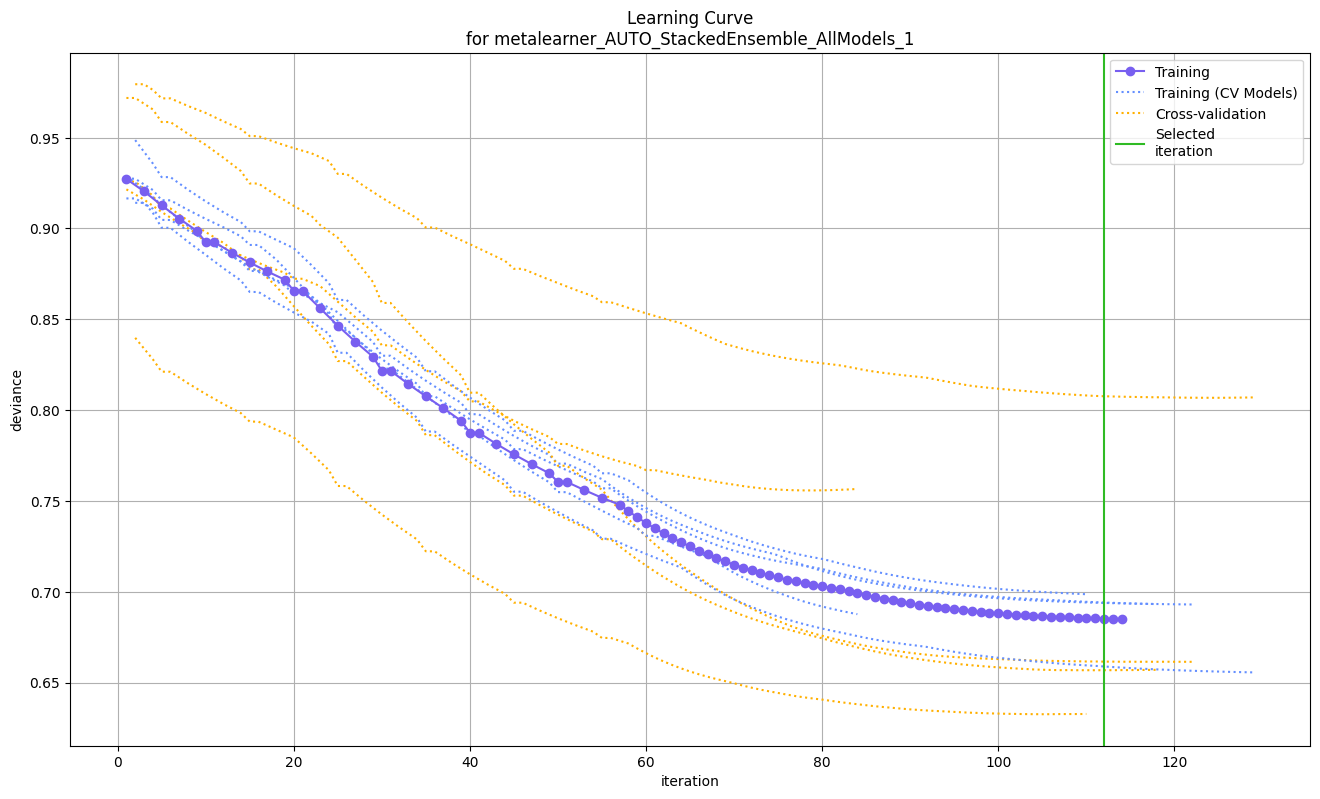

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

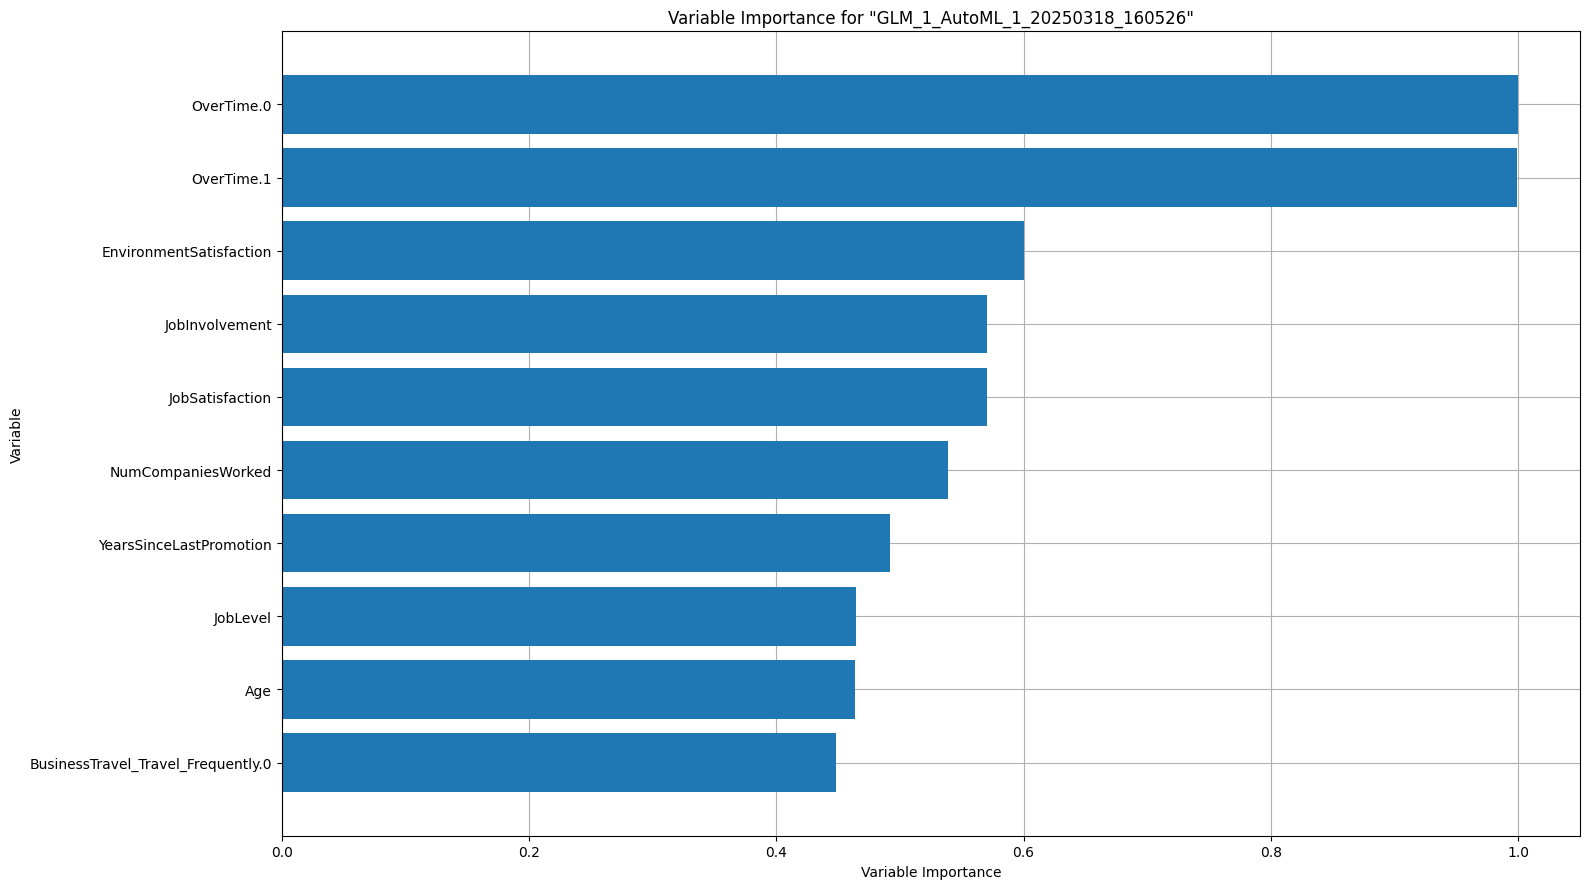

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

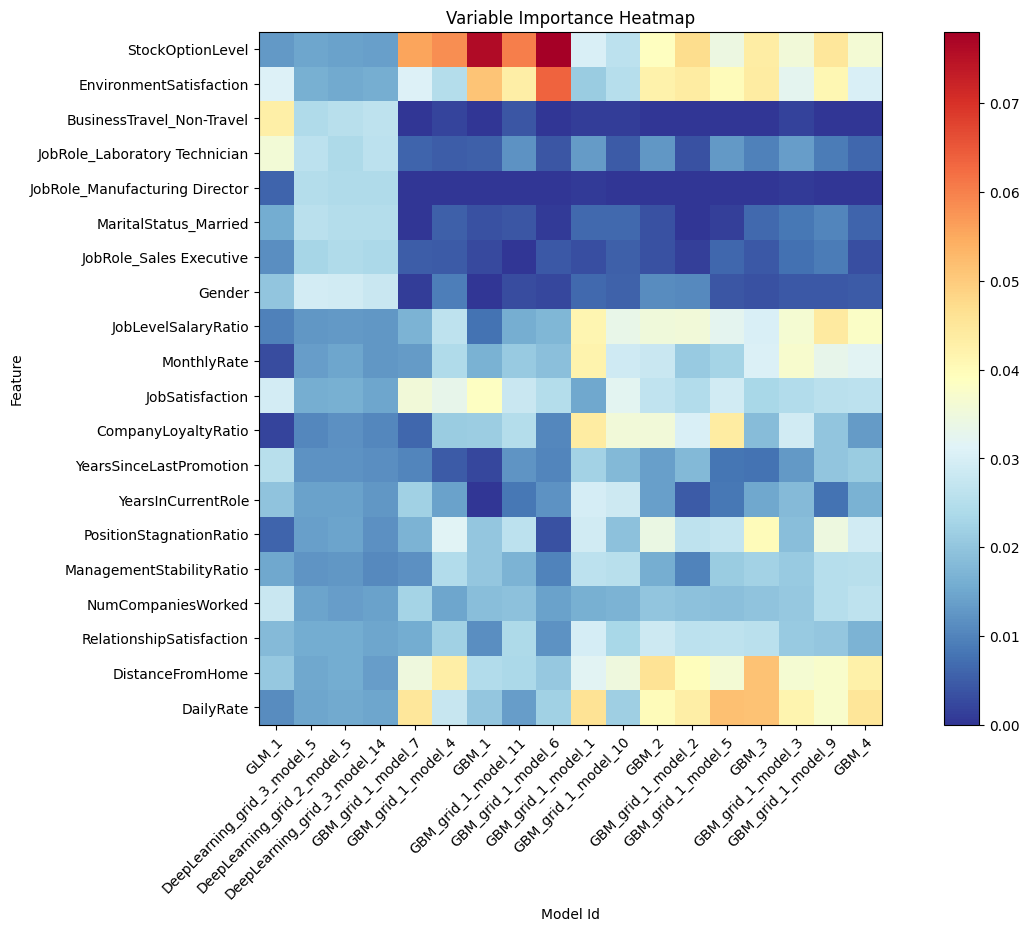

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

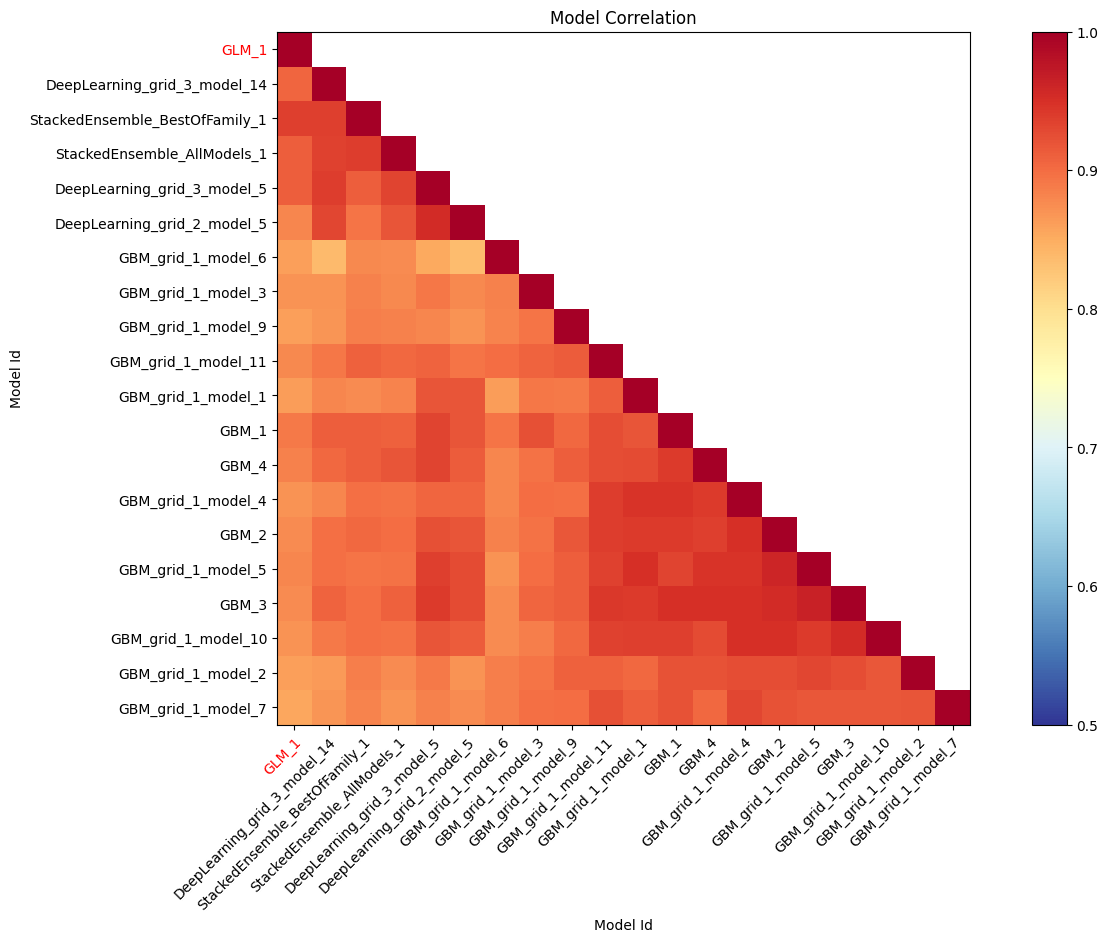

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

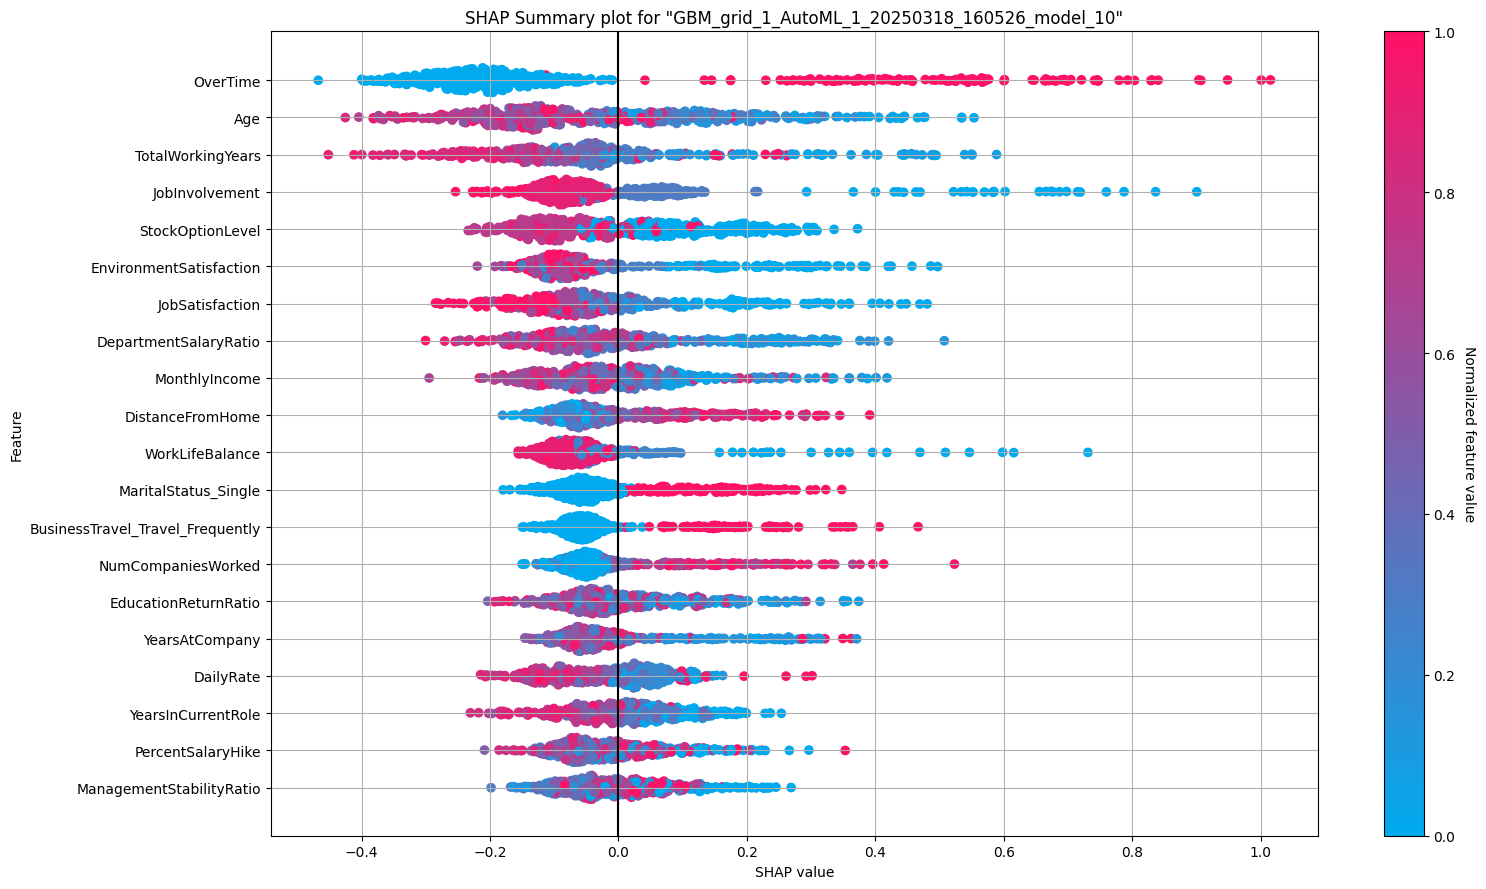

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

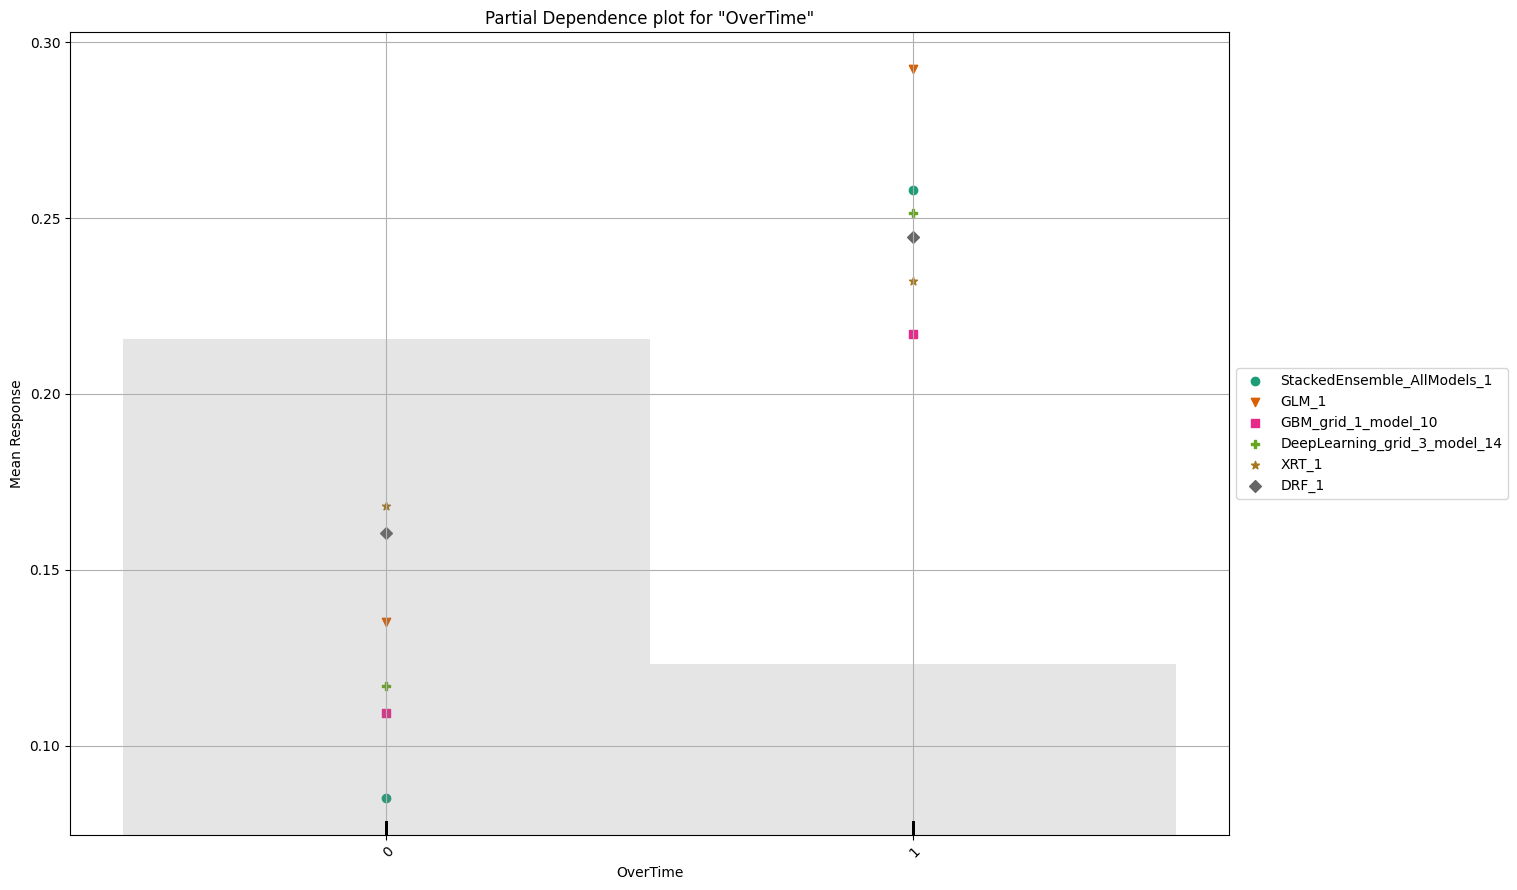

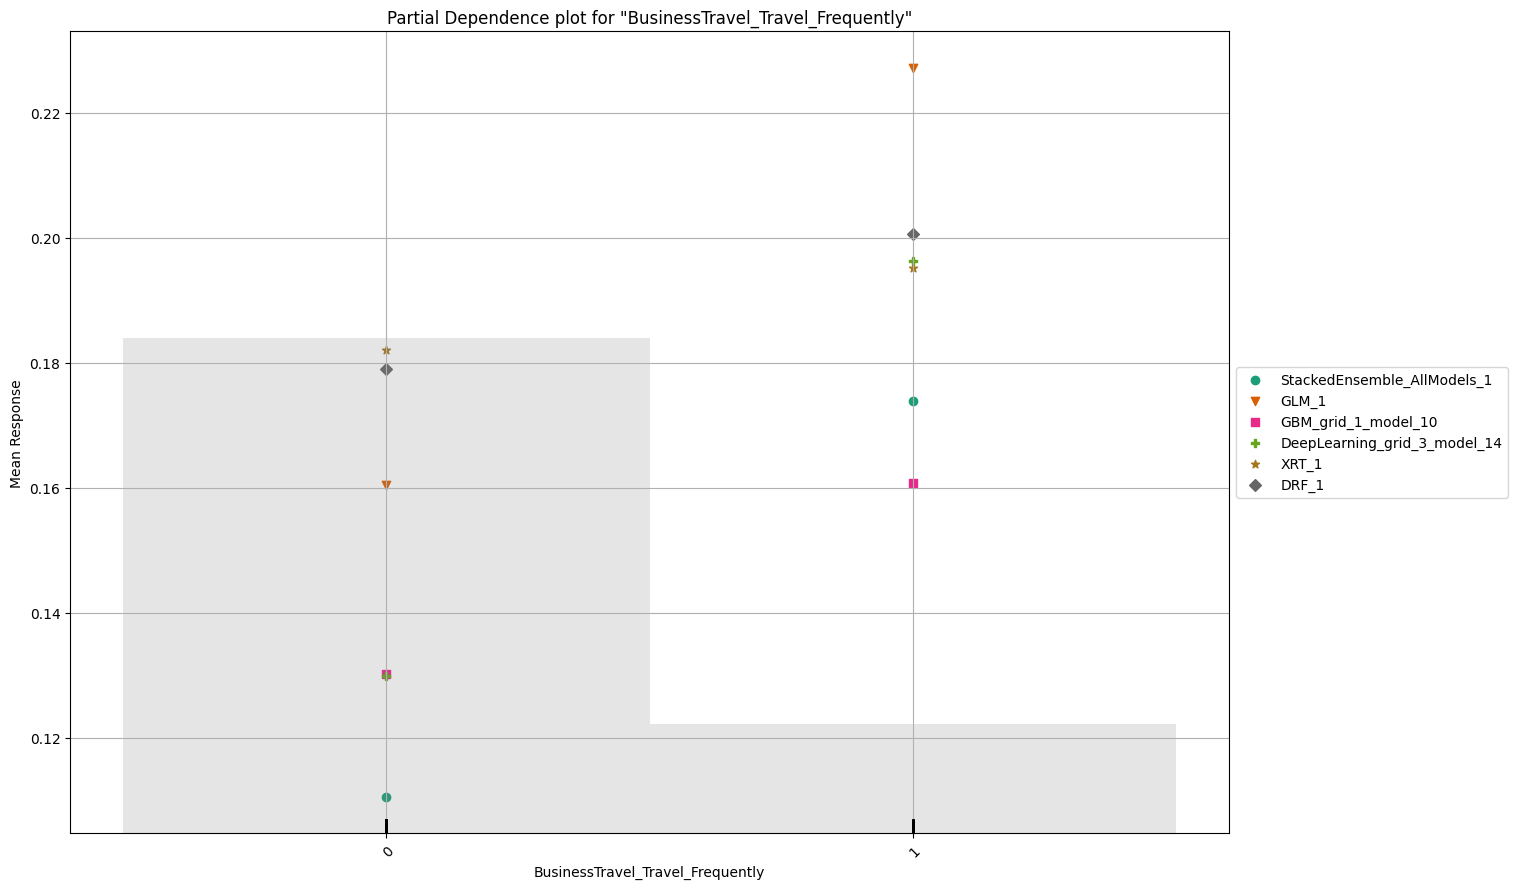

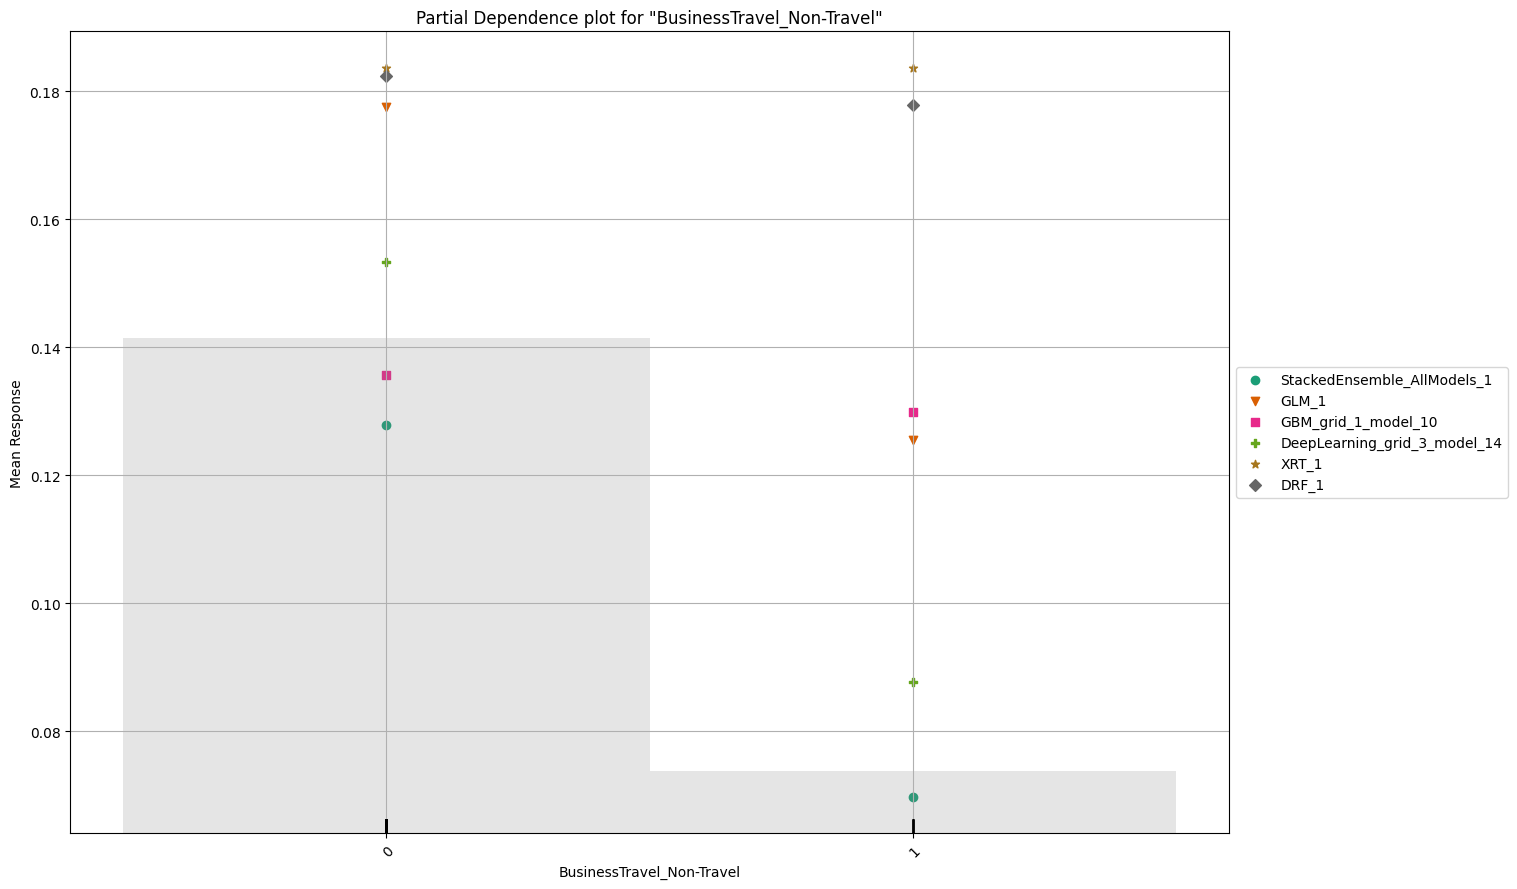

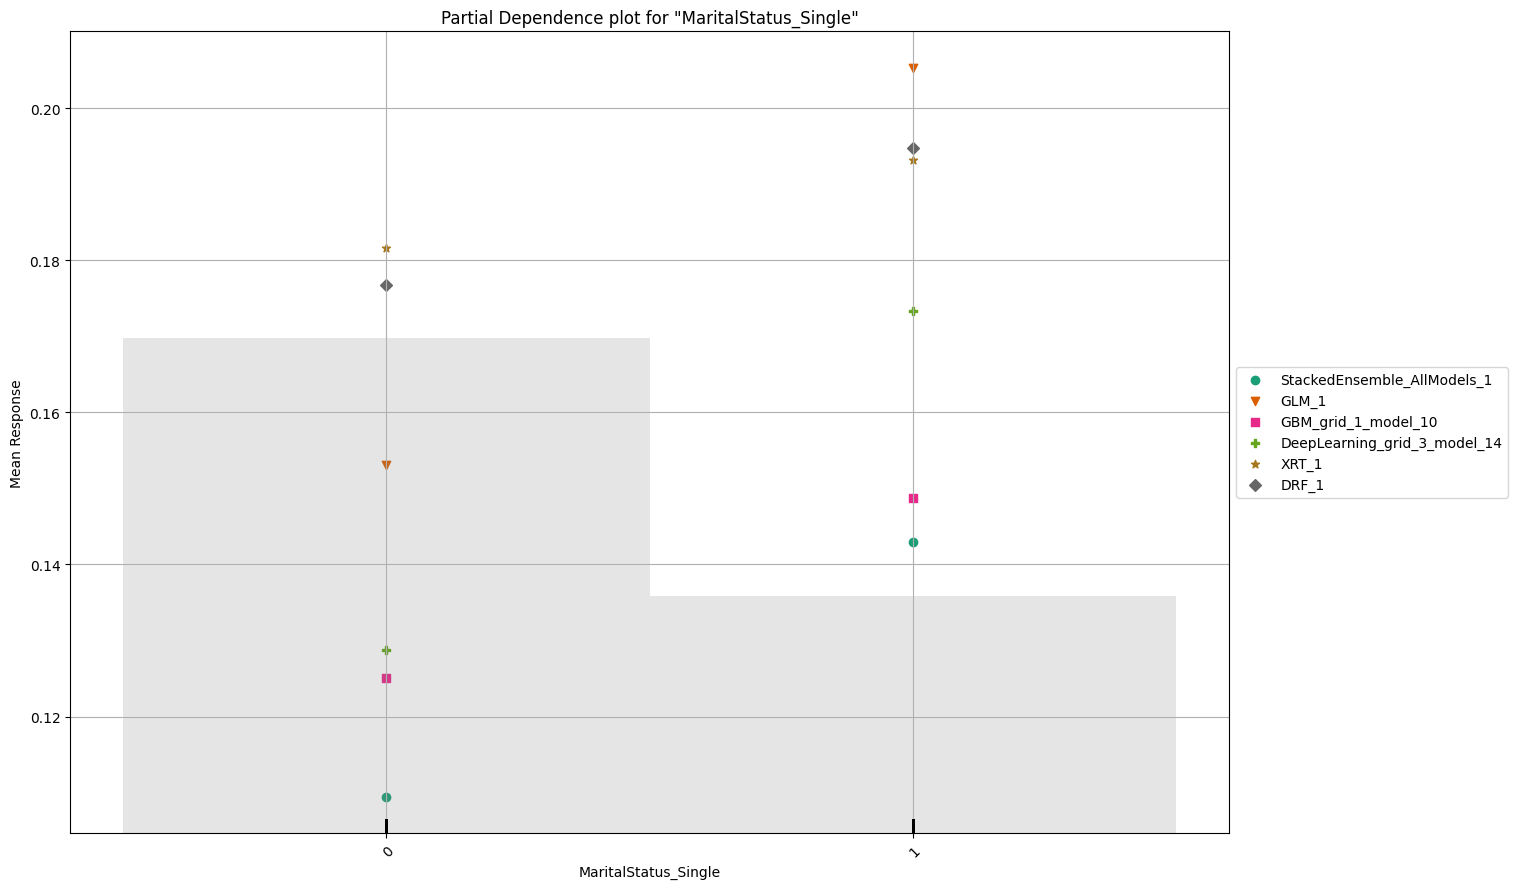

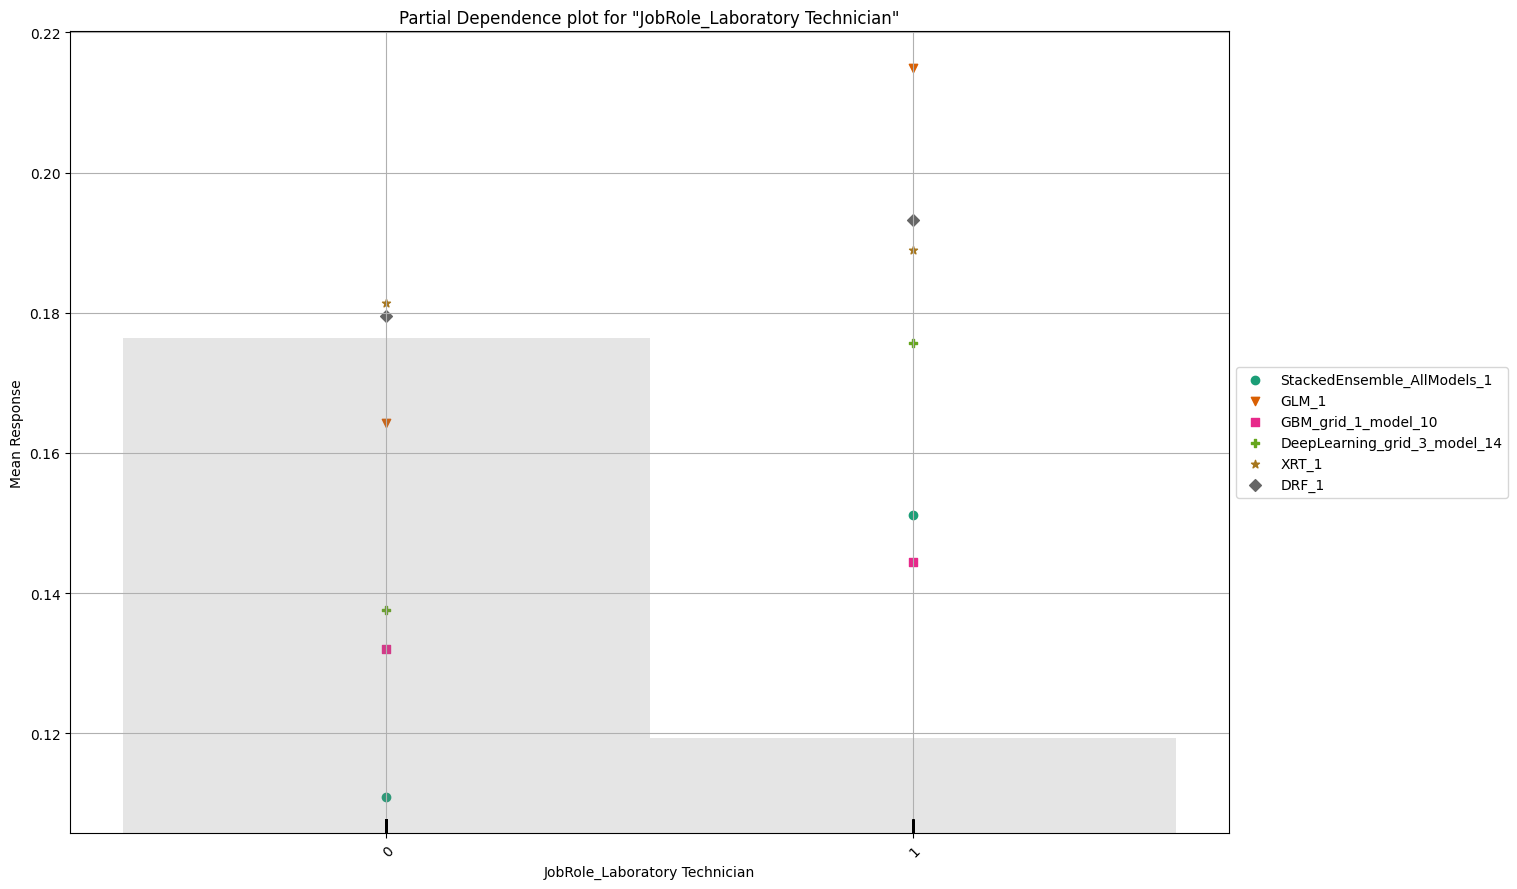

In [15]:
# Leaderboard based on Test results & comparison of models
aml.explain(test)

In [16]:
# Leaderboard for test performance
test_lb = h2o.make_leaderboard(aml, test, sort_metric="logloss")
test_lb.head(rows=test_lb.nrows)  # Print all rows instead of default (10 rows)

model_id                                                   logloss       auc     aucpr    mean_per_class_error      rmse        mse
-------------------------------------------------------  ---------  --------  --------  ----------------------  --------  ---------
DeepLearning_1_AutoML_1_20250318_160526                   0.258815  0.863601  0.613491                0.211554  0.274586  0.0753977
StackedEnsemble_BestOfFamily_1_AutoML_1_20250318_160526   0.260379  0.858575  0.65944                 0.221628  0.269664  0.0727189
GLM_1_AutoML_1_20250318_160526                            0.261269  0.866845  0.699372                0.232319  0.268673  0.0721853
GBM_2_AutoML_1_20250318_160526                            0.264648  0.875114  0.617557                0.224232  0.275442  0.0758683
GBM_grid_1_AutoML_1_20250318_160526_model_5               0.268177  0.856017  0.590832                0.236568  0.277531  0.0770233
GBM_3_AutoML_1_20250318_160526                            0.26854   0.859284  0.599176                0.232388  0.278545  0.0775871
GBM_grid_1_AutoML_1_20250318_160526_model_3               0.274452  0.857045  0.605301                0.221971  0.279016  0.0778499
GBM_grid_1_AutoML_1_20250318_160526_model_12              0.275097  0.830181  0.595355                0.22293   0.278381  0.0774961
GBM_grid_1_AutoML_1_20250318_160526_model_10              0.27575   0.852088  0.589303                0.288857  0.282253  0.0796667
GBM_4_AutoML_1_20250318_160526                            0.280666  0.8456    0.559599                0.246985  0.284464  0.0809195
GBM_grid_1_AutoML_1_20250318_160526_model_4               0.281472  0.854144  0.585729                0.224918  0.283488  0.0803655
GBM_grid_1_AutoML_1_20250318_160526_model_11              0.282116  0.86705   0.631931                0.241434  0.281673  0.0793398
GBM_grid_1_AutoML_1_20250318_160526_model_2               0.283408  0.860426  0.599084                0.246642  0.283165  0.0801823
GBM_1_AutoML_1_20250318_160526                            0.284598  0.883543  0.64606                 0.257333  0.283591  0.0804236
GBM_grid_1_AutoML_1_20250318_160526_model_9               0.284846  0.851654  0.572695                0.250891  0.285469  0.0814928
GBM_5_AutoML_1_20250318_160526                            0.287732  0.832077  0.556743                0.229167  0.288227  0.0830747
GBM_grid_1_AutoML_1_20250318_160526_model_7               0.287846  0.859992  0.584057                0.215529  0.285721  0.0816366
GBM_grid_1_AutoML_1_20250318_160526_model_13              0.288438  0.833607  0.521832                0.316132  0.290789  0.0845581
GBM_grid_1_AutoML_1_20250318_160526_model_6               0.288715  0.881122  0.644326                0.167078  0.286263  0.0819468
GBM_grid_1_AutoML_1_20250318_160526_model_1               0.289236  0.82945   0.516243                0.253152  0.289451  0.0837818
DRF_1_AutoML_1_20250318_160526                            0.301414  0.847062  0.565204                0.258361  0.293701  0.0862605
GBM_grid_1_AutoML_1_20250318_160526_model_8               0.316753  0.773392  0.490881                0.29571   0.299775  0.0898653
StackedEnsemble_AllModels_1_AutoML_1_20250318_160526      0.318486  0.842334  0.638179                0.209293  0.278108  0.0773442
XRT_1_AutoML_1_20250318_160526                            0.319762  0.816064  0.48833                 0.270696  0.303341  0.0920155
DeepLearning_grid_1_AutoML_1_20250318_160526_model_14     0.38548   0.815264  0.542868                0.261993  0.313961  0.0985712
DeepLearning_grid_2_AutoML_1_20250318_160526_model_12     0.428176  0.801489  0.541522                0.307703  0.325916  0.106221
DeepLearning_grid_1_AutoML_1_20250318_160526_model_7      0.428697  0.811129  0.518288                0.270696  0.332186  0.110347
DeepLearning_grid_2_AutoML_1_20250318_160526_model_14     0.451243  0.82431   0.569286                0.219435  0.326405  0.10654
DeepLearning_grid_1_AutoML_1_20250318_160526

In [17]:
# Getting best model for test
test_best_model_ID = test_lb[0, 0]
test_best_model = h2o.get_model(test_best_model_ID)

# Display Training and CV performance
test_best_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_1_AutoML_1_20250318_160526


Status of Neuron Layers: predicting Attrition, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,322 weights/biases, 34.4 KB, 10,887 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms           mean_bias              bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  ---------------------  ----------  ----------------------  -------------------  ---------------------  --------------------
    1        107      Input      0.0
    2        10       Rectifier  0.0        0.0   0.0   0.24495104325132305    0.4278002977371216     0.0         0.006557646163991678    0.13147294521331787  0.5176799070476099     0.049875035881996155
    3        10       Rectifier  0.0        0.0   0.0   0.0009075579006457701  0.0007389176171272993  0.0         -0.0031236468796851115  0.2962132692337036   0.9789939476139657     0.05183611810207367
    4        10       Rectifier  0.0        0.0   0.0   0.0012031785389990547  0.0013737473636865616  0.0         -0.021717676990665496   0.32275664806365967  0.9906884799462183     0.031133495271205902
    5        2        Softmax               0.0   0.0   0.002480202945298515   0.002170419320464134   0.0         -0.2476728565932717     1.446518898010254    0.0009742195254678274  0.03515465557575226

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.07951337213461604
RMSE: 0.28198115563742204
LogLoss: 0.2782315071559253
Mean Per-Class Error: 0.19965645857872008
AUC: 0.8884929982986519
AUCPR: 0.7734827330092027
Gini: 0.7769859965973038

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2795690930188643
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      826  23   0.0271   (23.0/849.0)
1      67   113  0.3722   (67.0/180.0)
Total  893  136  0.0875   (90.0/1029.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.279569     0.71519   114
max f2                       0.129305     0.728848  197
max f0point5                 0.331461     0.800305  102
max accuracy                 0.331461     0.913508  102
max precision                0.999465     1         0
max recall                   0.0105418    1         378
max specificity              0.999465     1         0
max absolute_mcc             0.279569     0.673819  114
max min_per_class_accuracy   0.108449     0.805556  221
max mean_per_class_accuracy  0.129305     0.827729  197
max tns                      0.999465     849       0
max fns                      0.999465     179       0
max fps                      0.0010323    849       399
max tps                      0.0105418    180       378
max tnr                      0.999465     1         0
max fnr                      0.999465     0.994444  0
max fpr                      0.0010323    1         399
max tpr                      0.0105418    1         378

Gains/Lift Table: Avg response rate: 17.49 %, avg score: 13.64 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01069                     0.948148           5.71667   5.71667            1                0.973646    1                           0.973646            0.0611111    

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_1_AutoML_1_20250318_160526

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2904532178500557
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      363  21   0.0547   (21.0/384.0)
1      21   36   0.3684   (21.0/57.0)
Total  384  57   0.0952   (42.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

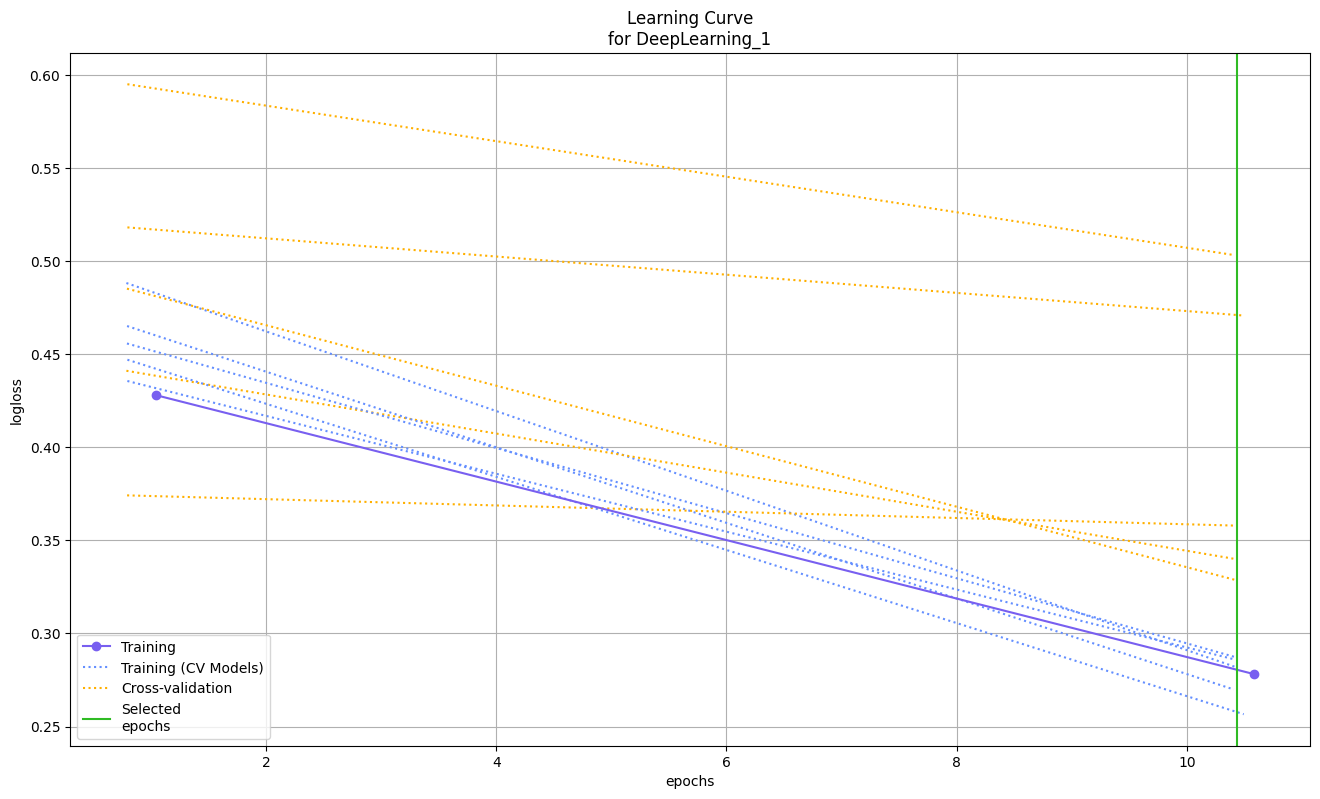

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

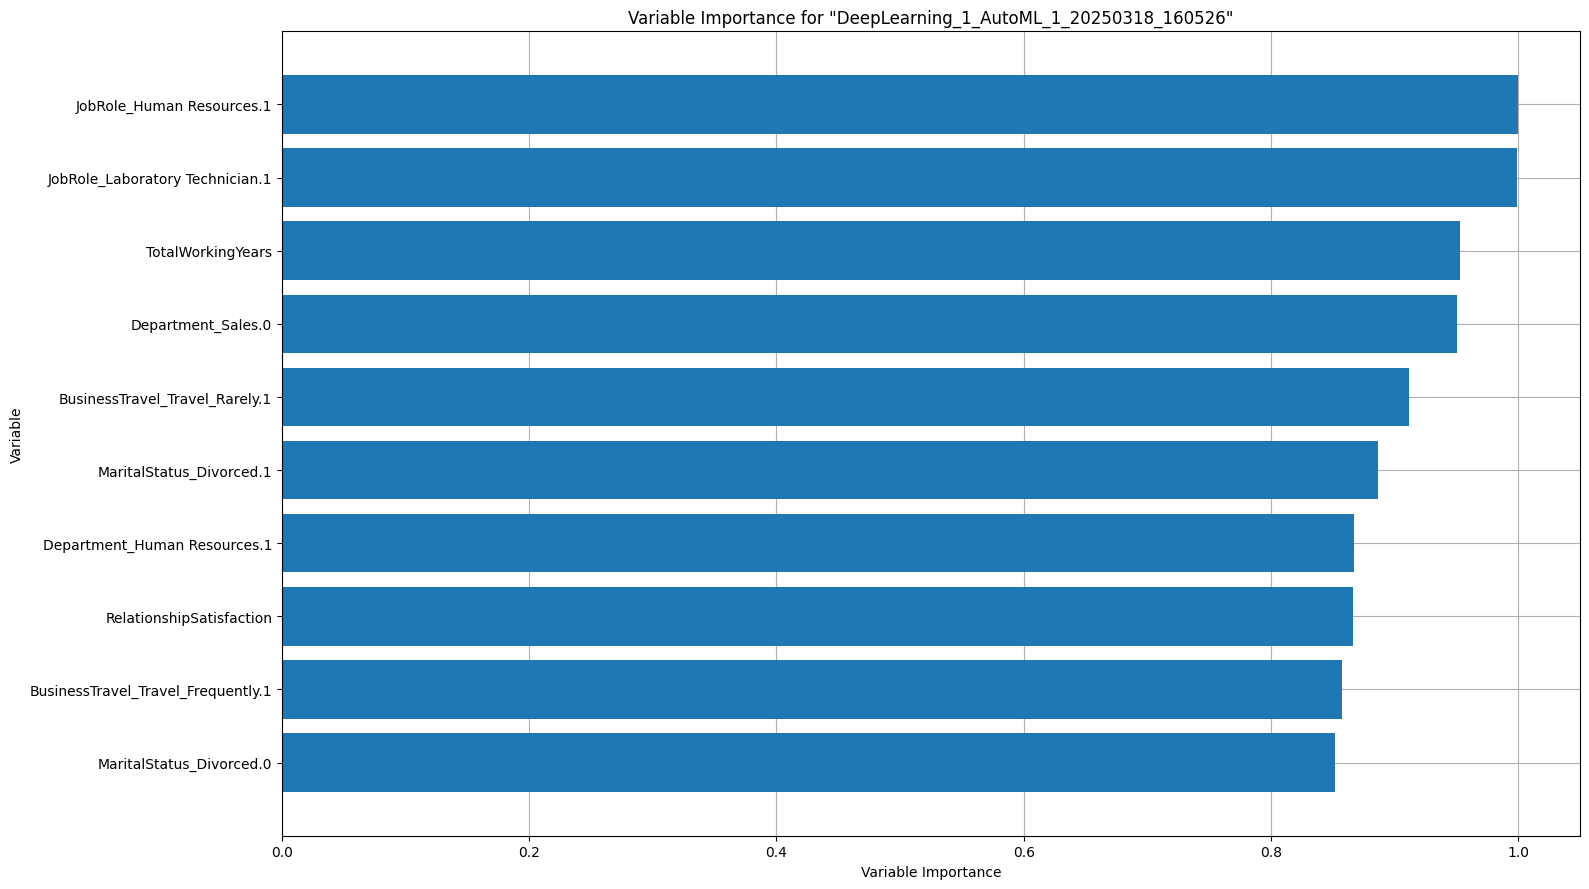

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

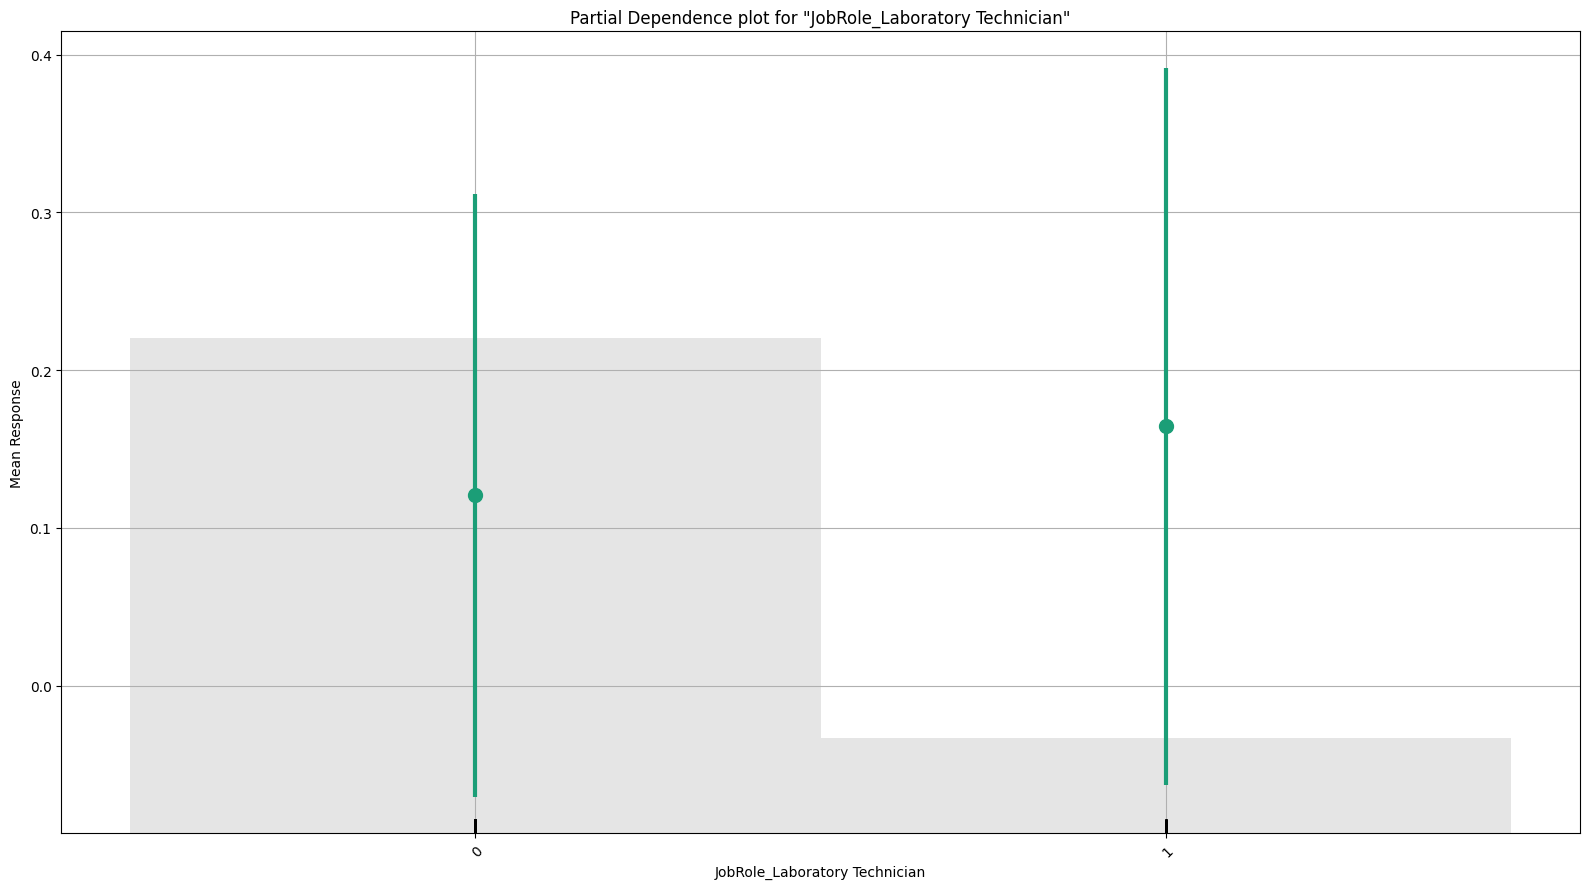

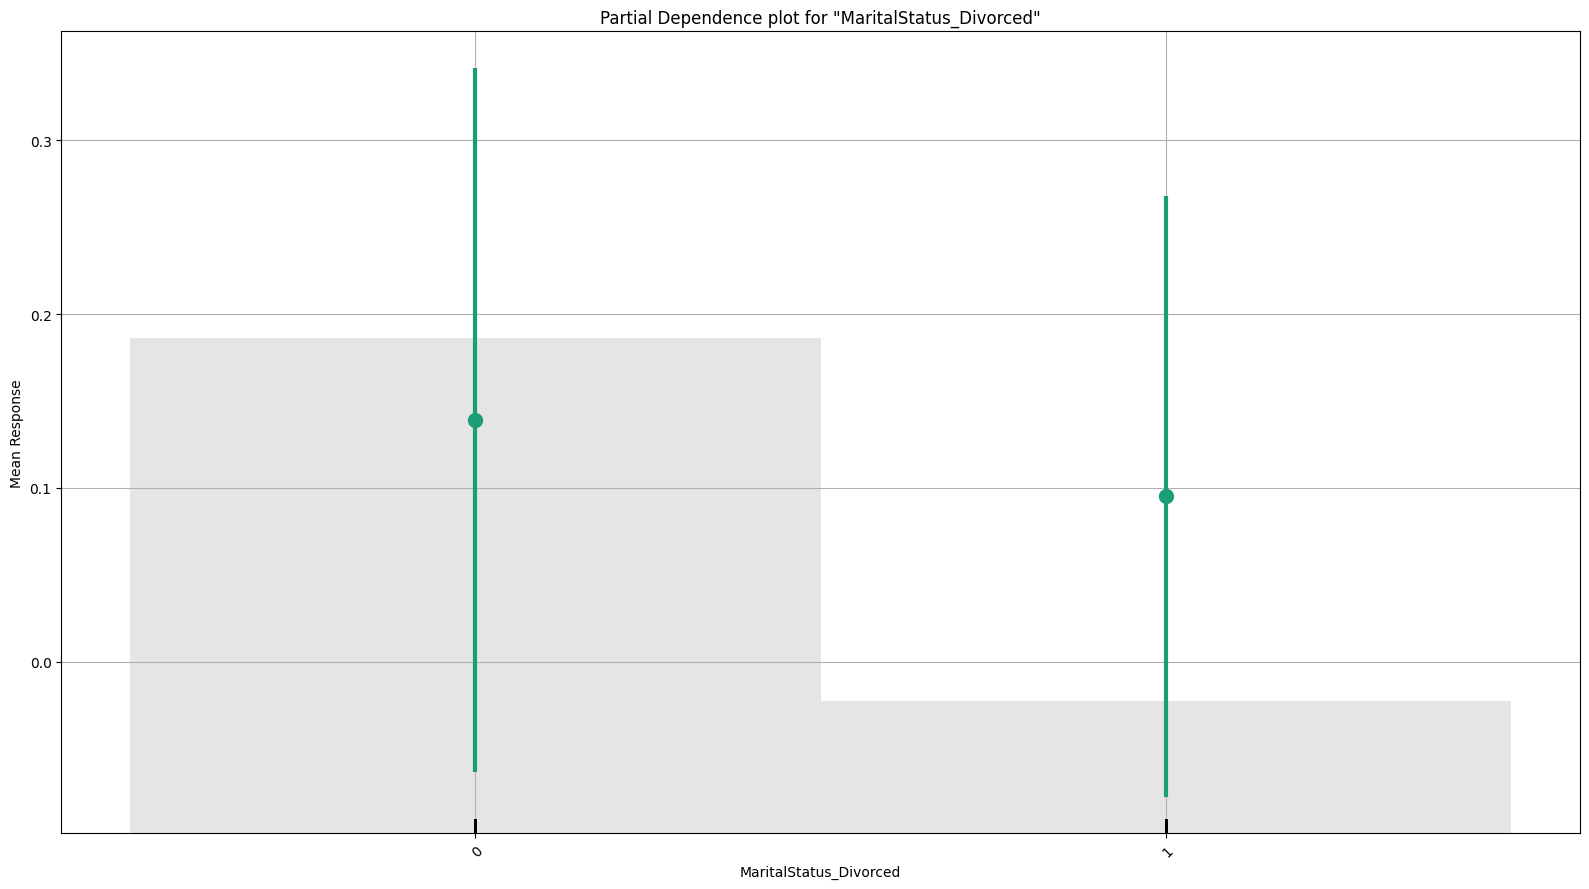

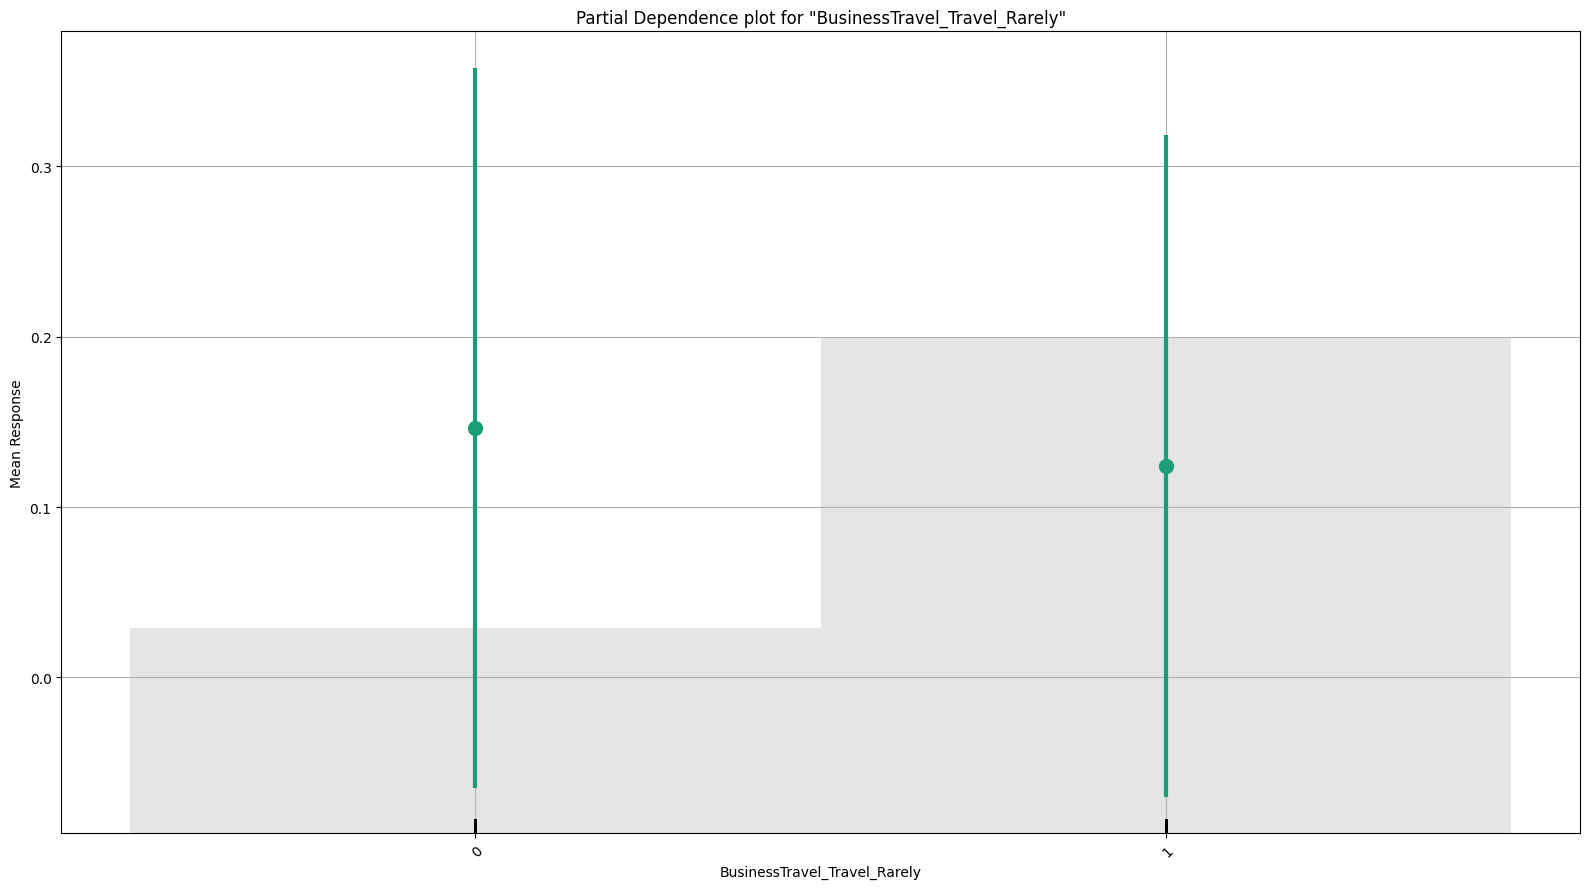

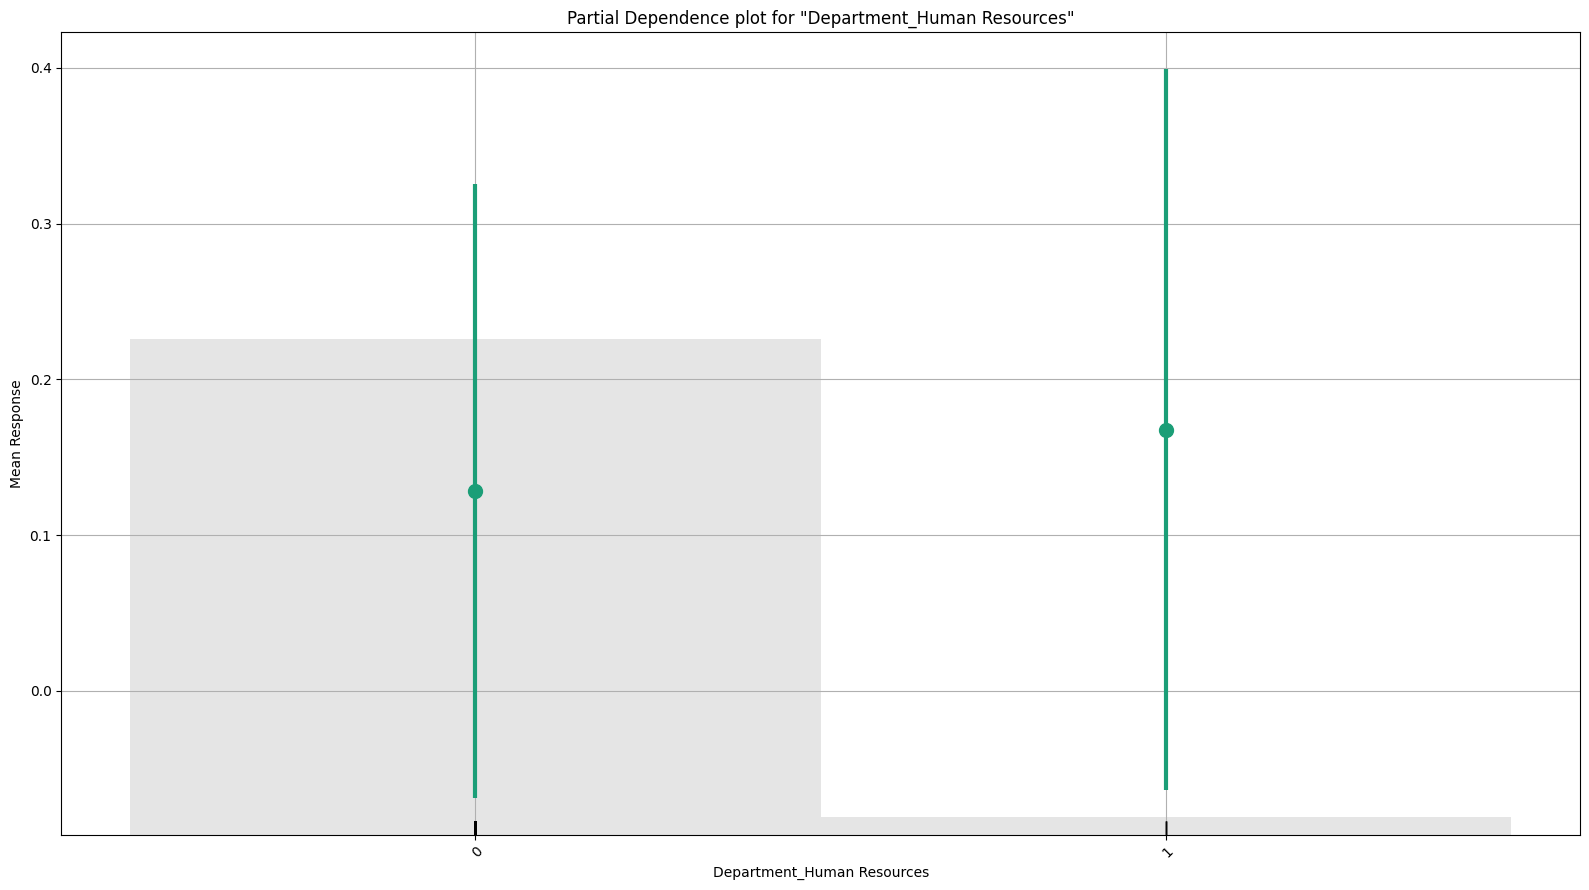

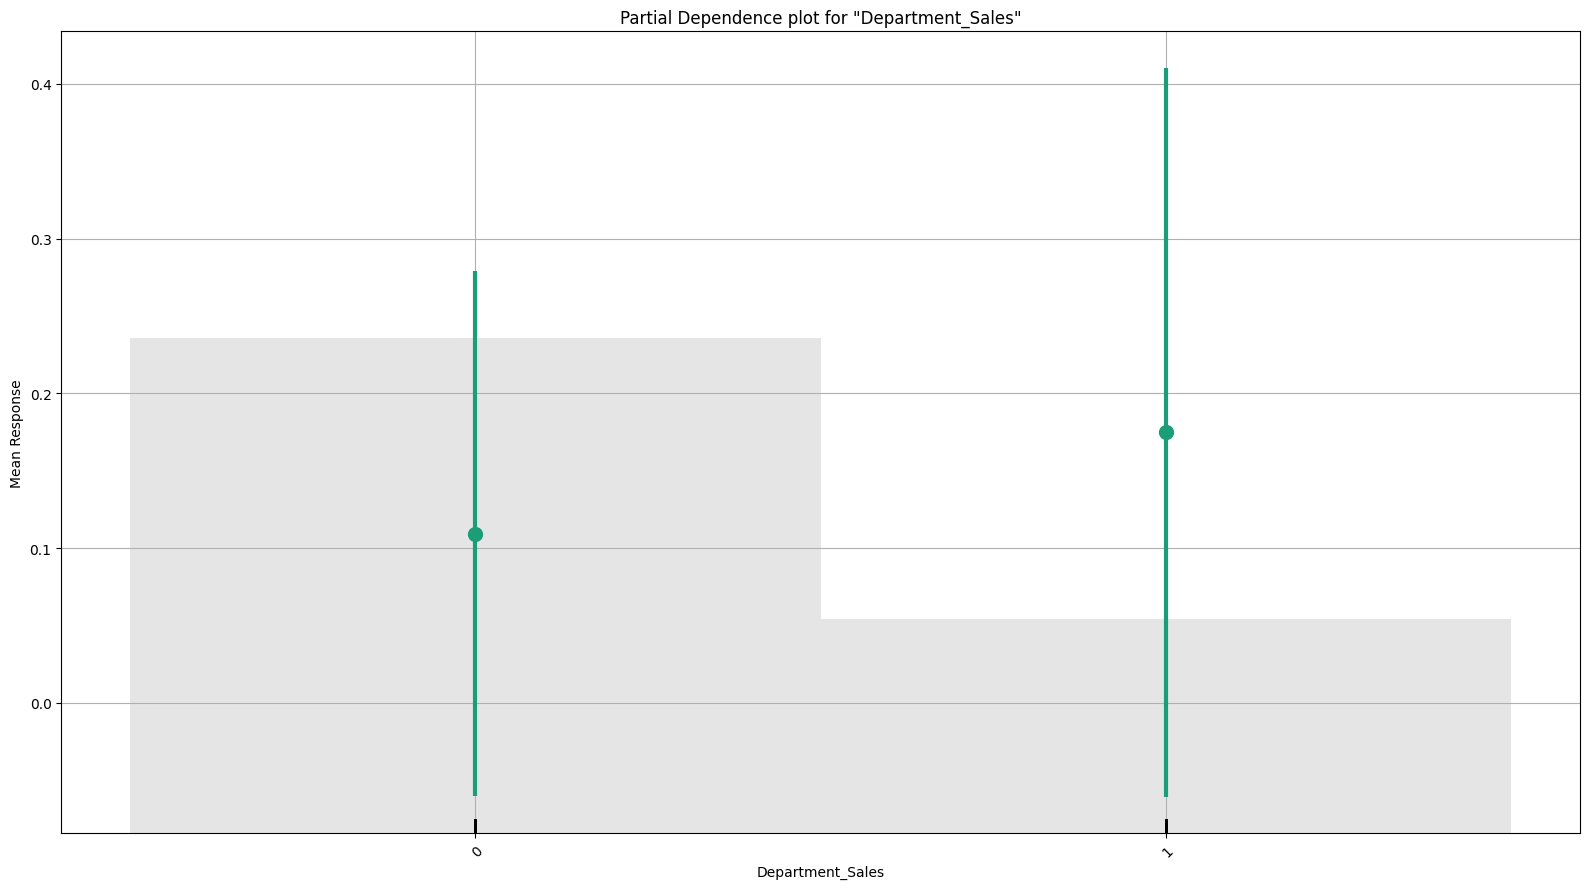

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_1_AutoML_1_20250318_160526

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2904532178500557
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      363  21   0.0547   (21.0/384.0)
1      21   36   0.3684   (21.0/57.0)
Total  384  57   0.0952   (42.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

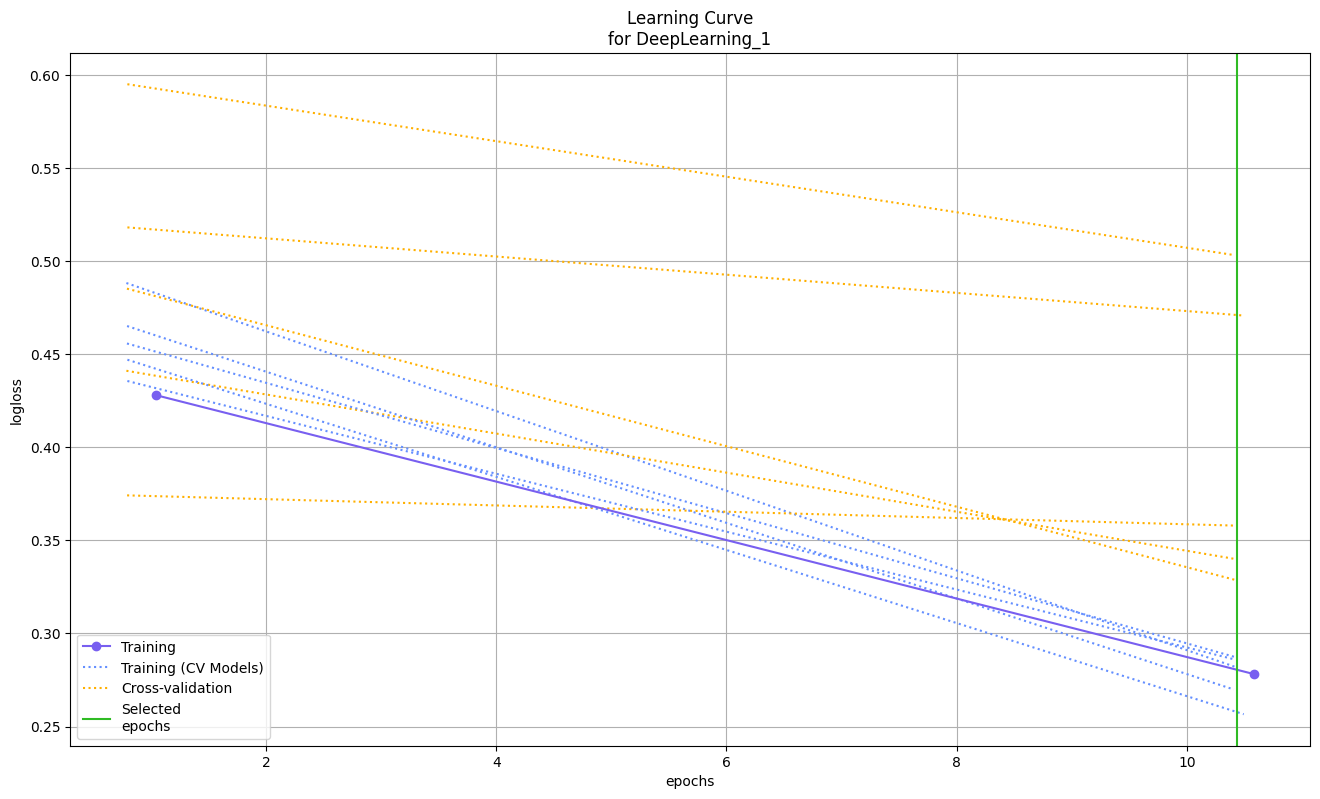

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

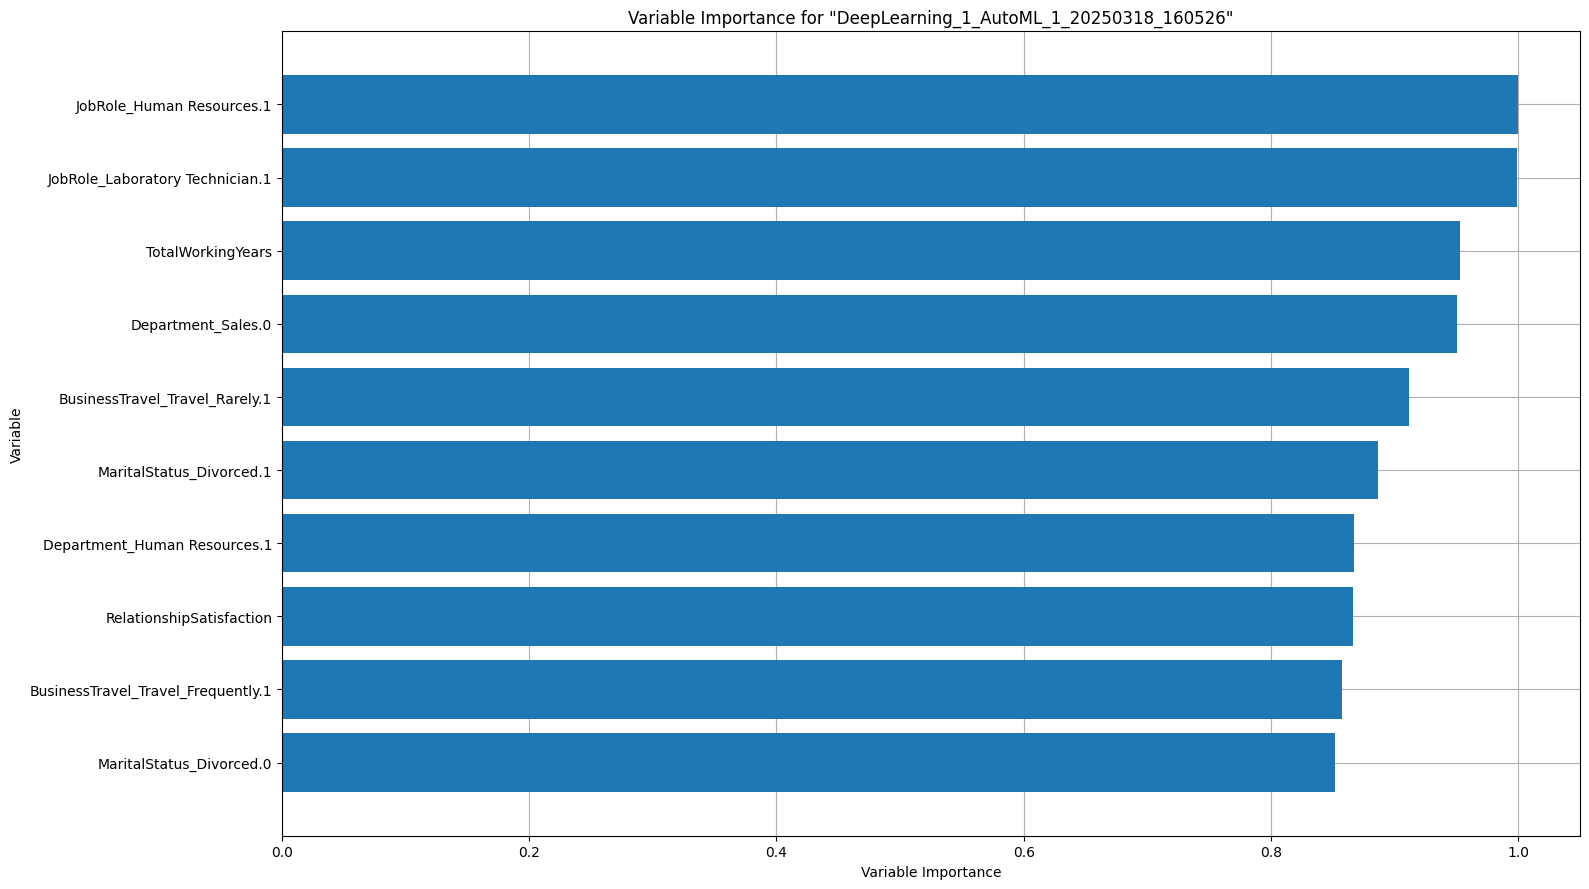

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

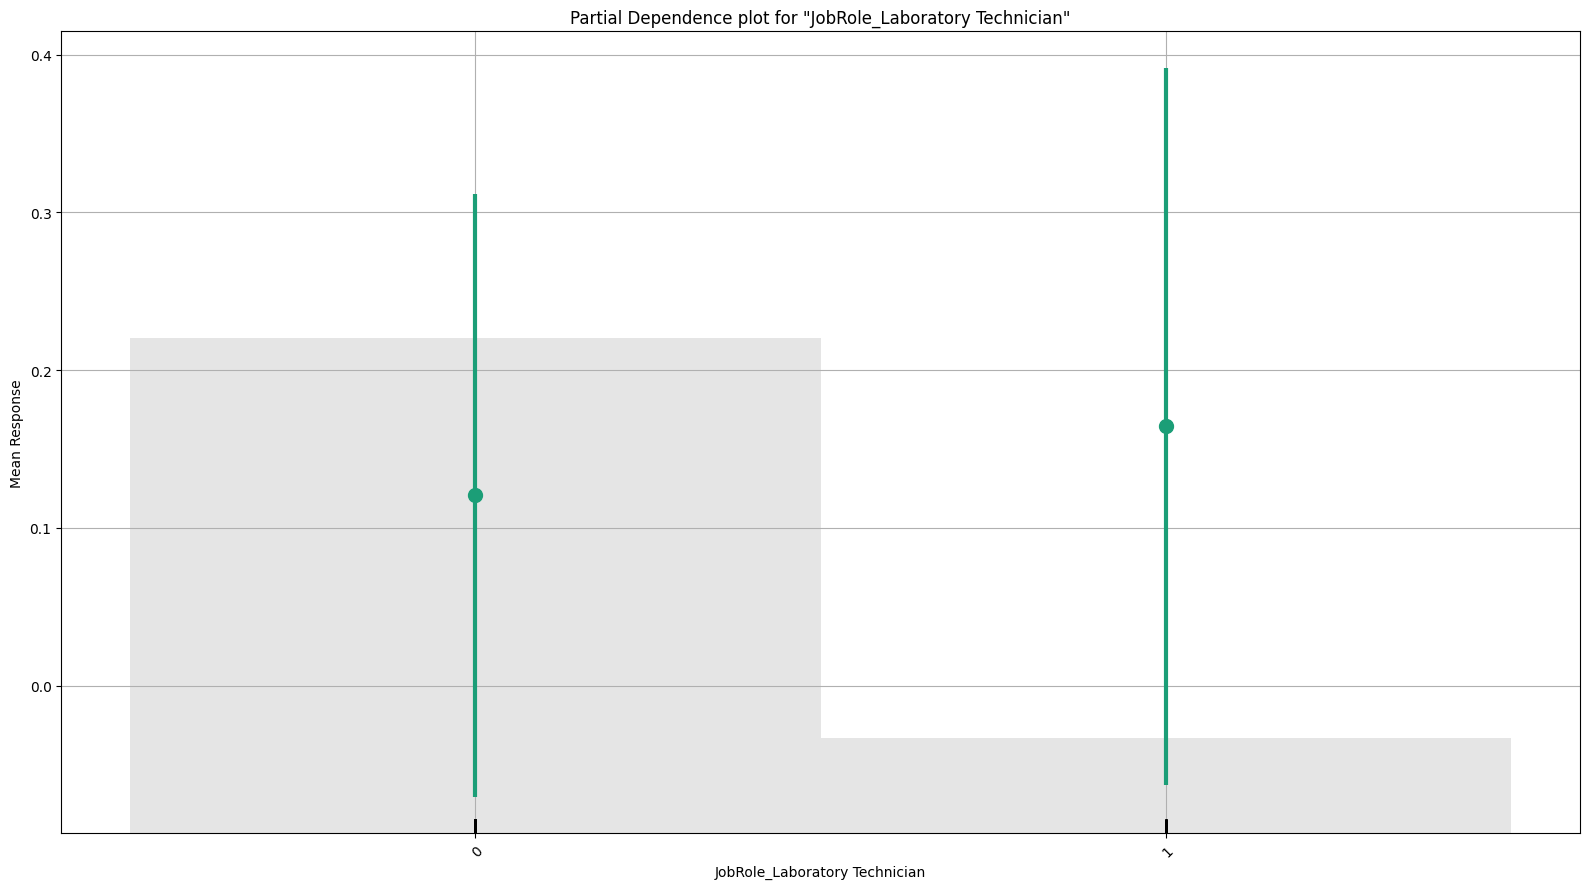

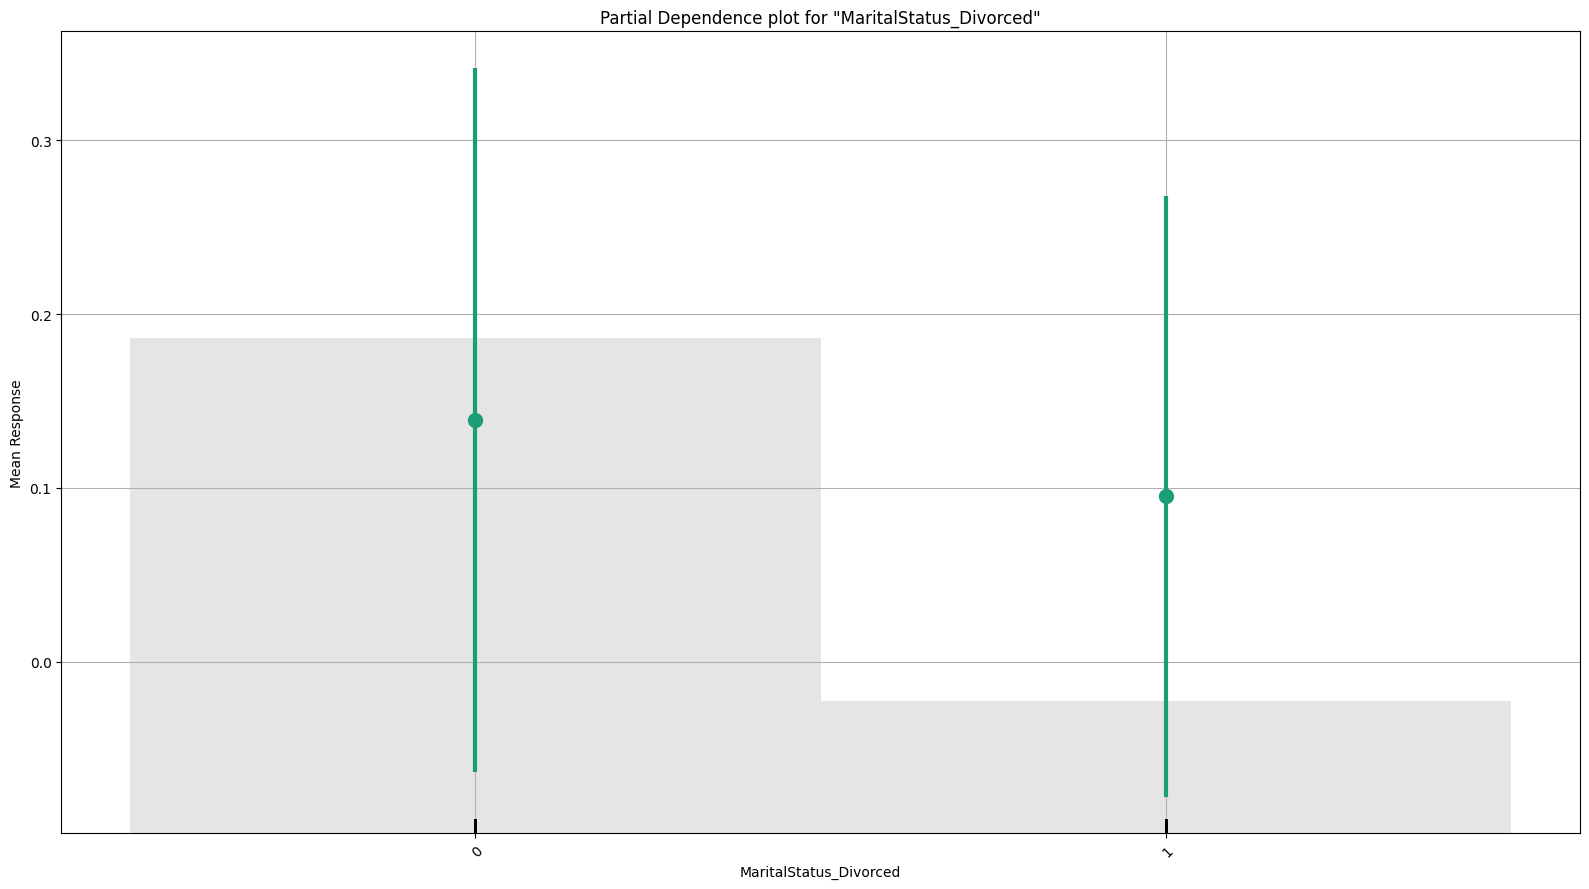

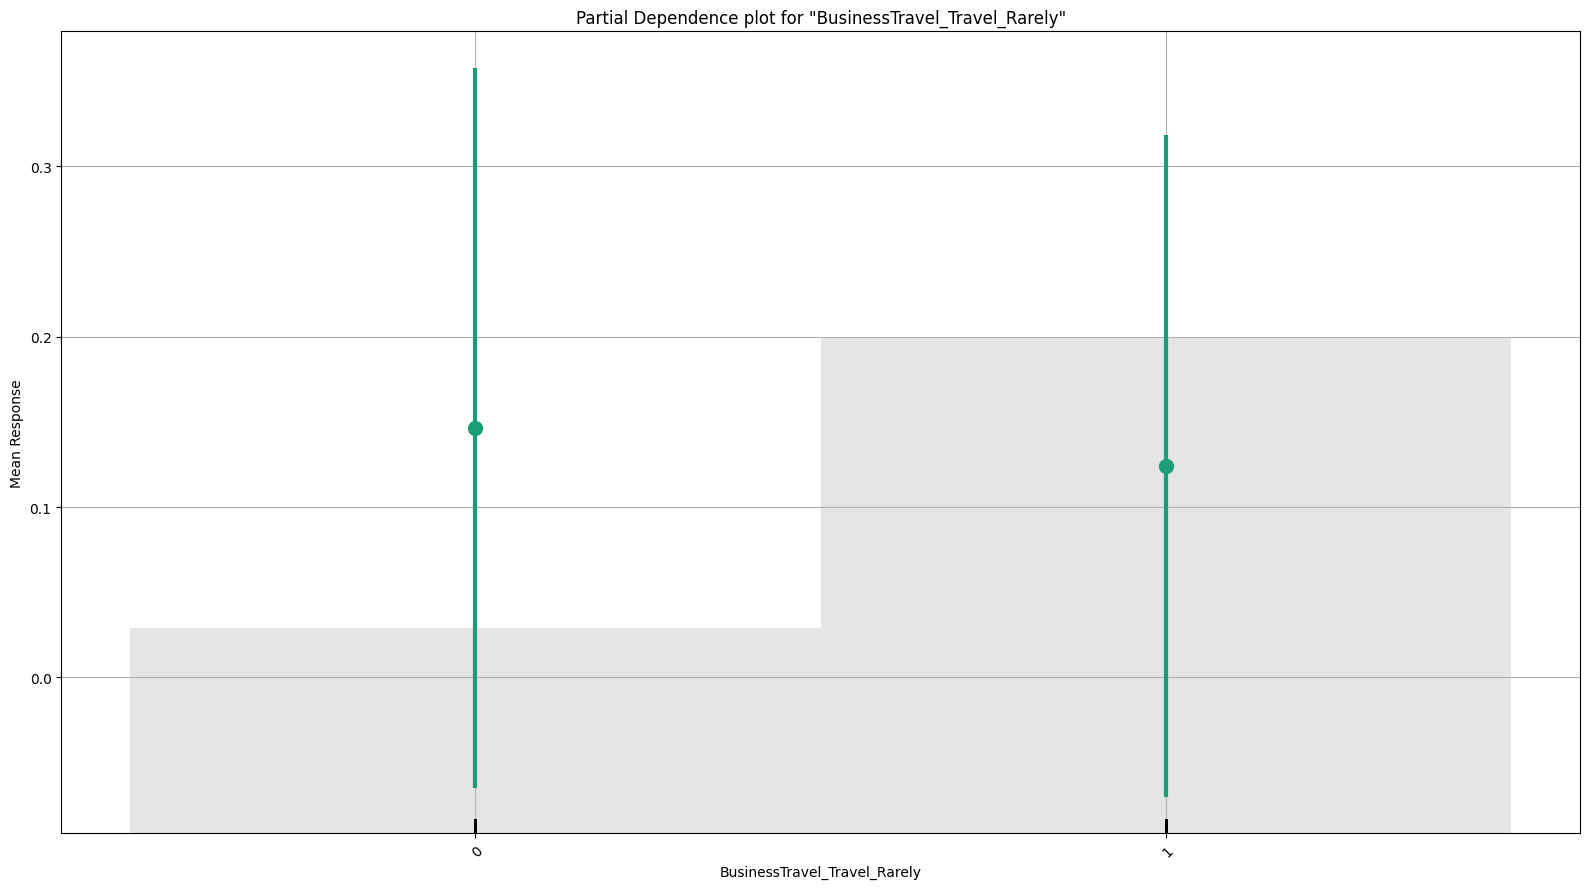

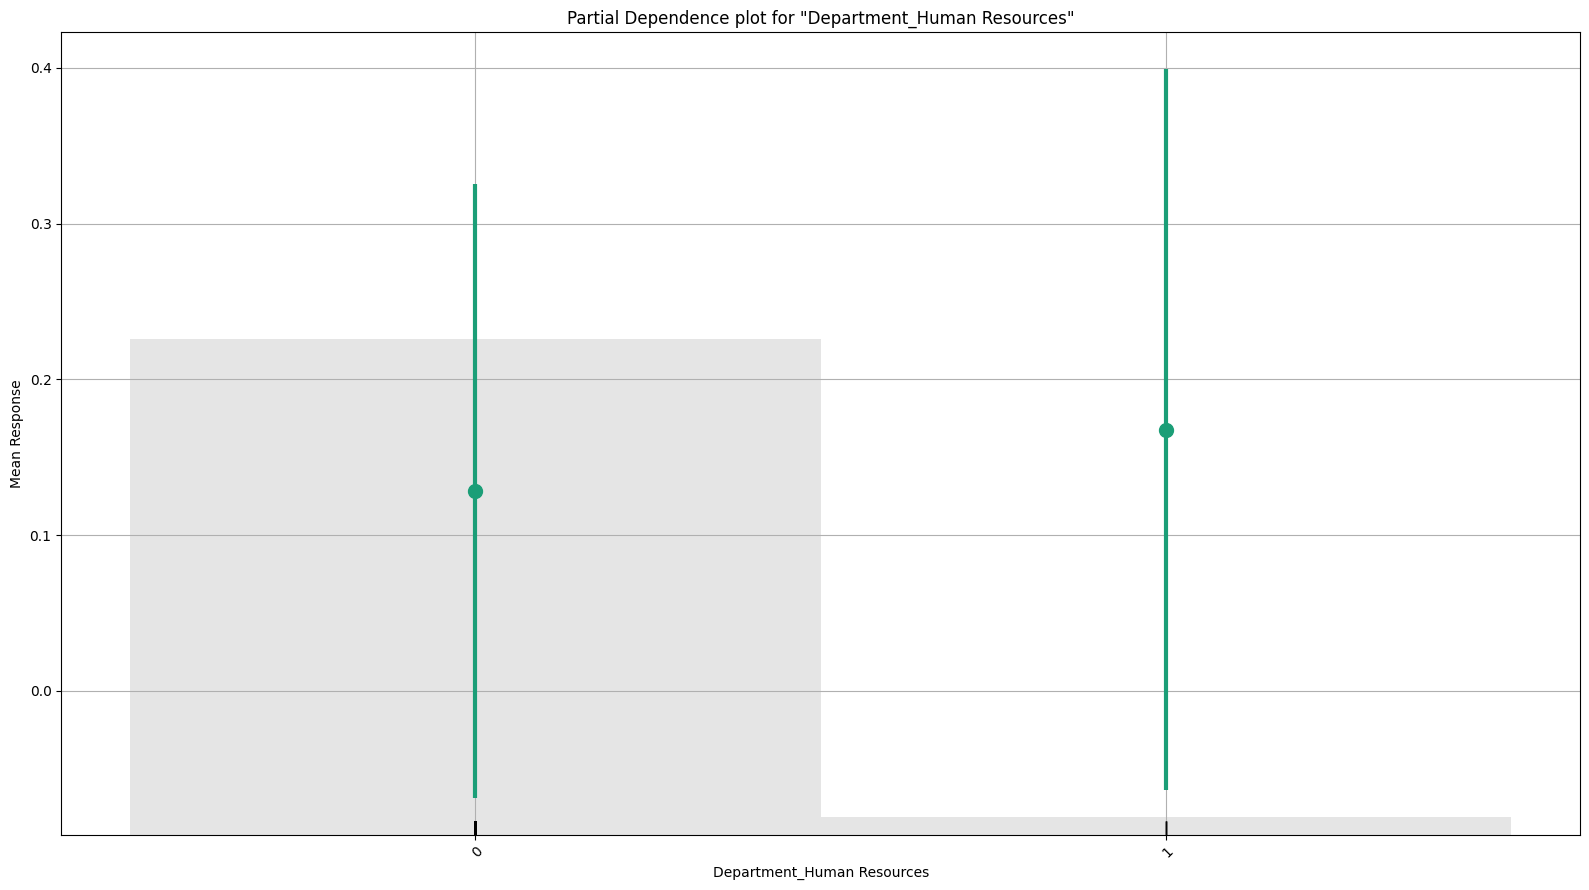

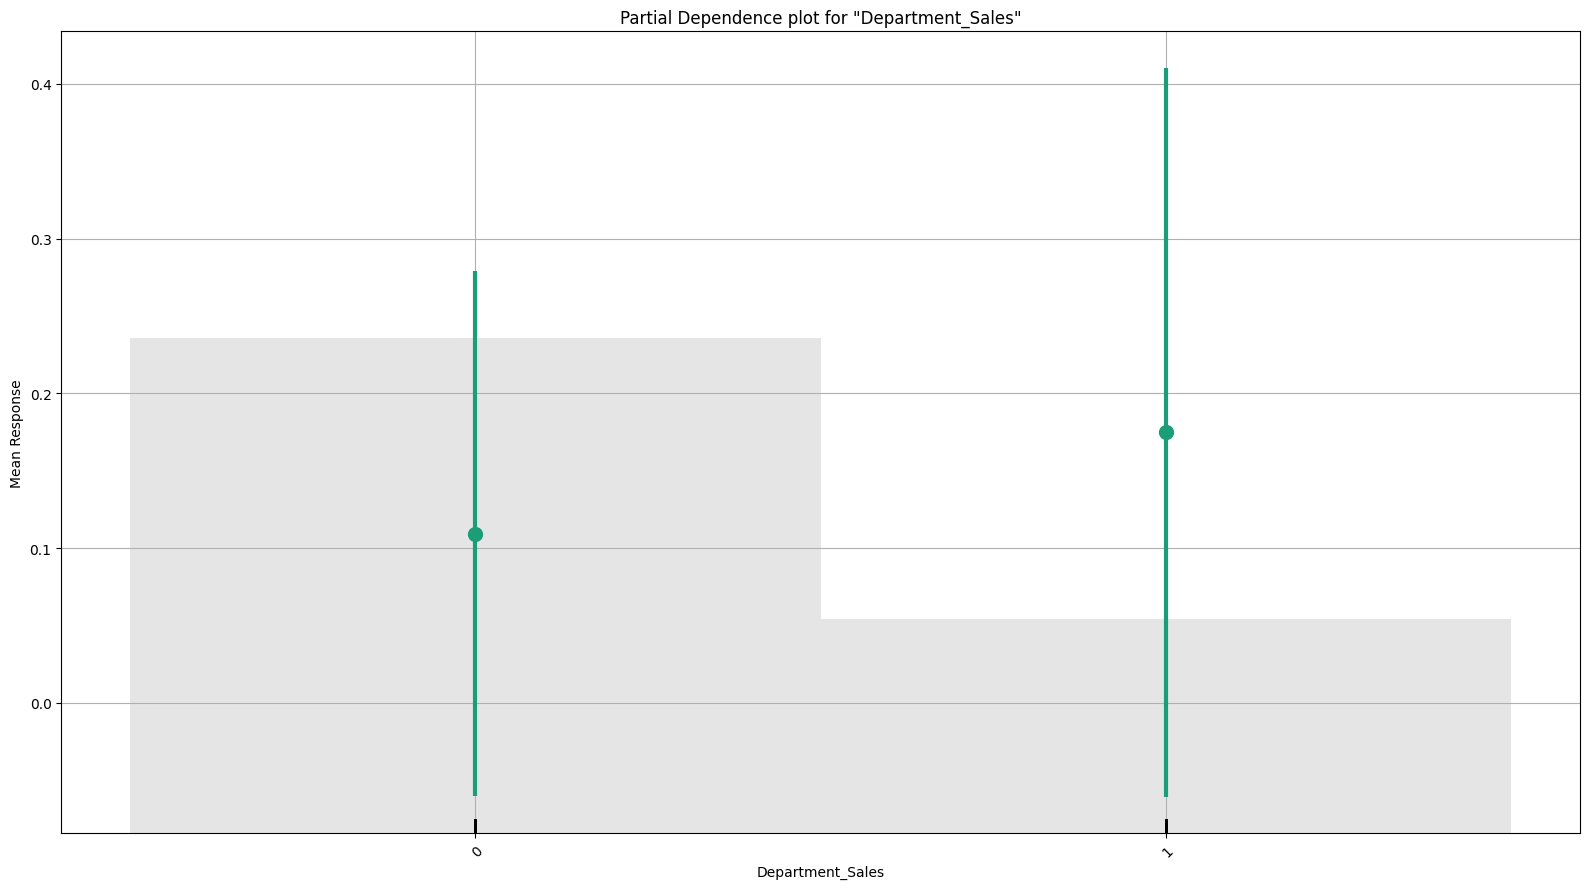

In [18]:
# Display test performance
test_best_model.explain(test)

# Saving Models

In [19]:
# Save models into folder

# Create a folder in the root directory
!mkdir -p "../models/wosampling"

# Get current time
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

cv_model_path = "../models/wosampling/"+current_time+"/cv"
test_model_path = "../models/wosampling/"+current_time+"/test"
cv_lb_path = "../models/wosampling/"+current_time+"/cv_lb.csv"
test_lb_path = "../models/wosampling/"+current_time+"/test_lb.csv"

cv_leader_model_path = h2o.save_model(model=cv_best_model, path=cv_model_path, force=True)
test_leader_model_path = h2o.save_model(model=test_best_model, path=test_model_path, force=True)
h2o.export_file(lb, path=cv_lb_path, force = True)
h2o.export_file(test_lb, path=test_lb_path, force = True)

print(current_time)
print(cv_leader_model_path)

# Documentation: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/save-and-load-model.html

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file ../models/wosampling already exists.
Error occurred while processing: ../models/wosampling.


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
2025-03-18_17-21-46
D:\OneDrive\Repos\demo-project\models\wosampling\2025-03-18_17-21-46\cv\StackedEnsemble_AllModels_1_AutoML_1_20250318_160526
